<a href="https://colab.research.google.com/github/SungchulLee/colab/blob/main/statistics.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

###**Chapter 0 Installment Extra Packages**

#####**Install Some Packages**

In [37]:
!pip install pandas-datareader
!pip install yfinance

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


#####**Import Basic Modules**

In [38]:
import matplotlib.pyplot as plt
import numpy as np; np.random.seed(0)
import pandas as pd
import yfinance as yf
from scipy import stats

#####**import draw_line, compute_regression_line_prediction, annotate_text**

In [39]:
def draw_line(ax,start,end,linestyle,color='k',label=None):
    ax.plot(
        [start[0],end[0]],
        [start[1],end[1]],
        linestyle=linestyle,
        color=color,
        label=label
        )

def compute_regression_line_prediction(x,mean_x,mean_y,std_x,std_y,r):
    x_standardized = ( x - mean_x ) / std_x
    y_pred_standardized = r * x_standardized
    y_pred = y_pred_standardized * std_y + mean_y
    return y_pred 

def annotate_text(ax,text,xy):
    ax.annotate(text,xy,**{"fontsize":35,"color":"red"})

#####**import train_test_split**

In [40]:
def train_test_split(df, test_size_ratio=0.3):
    num_data = df.shape[0]
    num_data_train = int(num_data * (1-test_size_ratio)) 
    xy_train = df.iloc[:num_data_train].values
    xy_test = df.iloc[num_data_train:].values
    x_train = xy_train[:,:-1].astype(np.float32)
    y_train = xy_train[:,-1].astype(np.float32).reshape((-1,1))
    x_test = xy_test[:,:-1].astype(np.float32)
    y_test = xy_test[:,-1].astype(np.float32).reshape((-1,1))
    return x_train, y_train, x_test, y_test

#####**import download_and_compute_daily_return, download_and_compute_daily_returns**

In [41]:
def download_and_compute_daily_return(ticker):
    """
    주어진 티커의 일일수익률을 데이타프레임 형태로 리턴한다.
    
    Input : str : ticker
    Output : pd.DataFrame : daily return of stock (given by ticker) close 
    """
    df = yf.Ticker(ticker).history(period='max')
    df[ticker] = df.Close.pct_change()
    return df[[ticker]].iloc[1:] 

def download_and_compute_daily_returns(tickers, how='inner'):
    for i, ticker in enumerate(tickers):
        dg = download_and_compute_daily_return(ticker)
        if i == 0:
            df = dg
        else:
            df = df.join(dg , how=how)
    return df

#####**import compute_z_confidence_interval**

In [42]:
def compute_z_confidence_interval(data, confidence_level=None, alpha=None):
    """
    input : data : 2d numpy array of shape (n_simulations, n_samples)
                   for each row we have data to handle
    """
    # confidence level
    if (confidence_level is None) and (alpha is None):
        confidence_level = 0.95
        alpha = 1 - confidence_level 
    elif (confidence_level is None) and (alpha is not None):
        confidence_level = 1 - alpha
    elif (confidence_level is not None) and (alpha is None):
        alpha = 1 - confidence_level 

    # number of samples
    # data = np.array( data ) # (30, 5)
    n = data.shape[1]

    # compute basic statistics
    x_bar = data.mean(axis=1) # (30,)
    s_square = np.sum((data - x_bar.reshape((-1,1)))**2, axis=1) / (n-1) # (30,)
    s = np.sqrt(s_square) # (30,)

    # compute margin of error
    z_star = stats.norm().ppf( 1 - (alpha/2) )
    margin_of_error = z_star * s / np.sqrt(n) # (30,) 

    return x_bar, margin_of_error  

#####**import compute_t_confidence_interval**

In [43]:
def compute_t_confidence_interval(data, confidence_level=None, alpha=None):
    """
    input : data : 2d numpy array of shape (n_simulations, n_samples)
                   for each row we have data to handle
    """
    # confidence level
    if (confidence_level is None) and (alpha is None):
        confidence_level = 0.95
        alpha = 1 - confidence_level 
    elif (confidence_level is None) and (alpha is not None):
        confidence_level = 1 - alpha
    elif (confidence_level is not None) and (alpha is None):
        alpha = 1 - confidence_level 

    # number of samples
    # data = np.array( data ) # (30, 5)
    n = data.shape[1]

    # compute basic statistics
    x_bar = data.mean(axis=1) # (30,)
    s_square = np.sum((data - x_bar.reshape((-1,1)))**2, axis=1) / (n-1) # (30,)
    s = np.sqrt(s_square) # (30,)

    # compute margin of error
    t_star = stats.t(df=n-1).ppf( 1 - (alpha/2) )
    margin_of_error = t_star * s / np.sqrt(n) # (30,) 

    return x_bar, margin_of_error  

#####**import compute_proportion_confidence_interval**

In [44]:
def compute_proportion_confidence_interval(data, confidence_level=None, alpha=None):
    """
    input : data : 2d numpy array of shape (n_simulations, n_samples)
                   for each row we have data to handle
                   data items are either 0 or 1
    """
    # confidence level
    if (confidence_level is None) and (alpha is None):
        confidence_level = 0.95
        alpha = 1 - confidence_level 
    elif (confidence_level is None) and (alpha is not None):
        confidence_level = 1 - alpha
    elif (confidence_level is not None) and (alpha is None):
        alpha = 1 - confidence_level 

    # number of samples
    # data = np.array( data ) # (30, 5)
    n = data.shape[1]

    # compute basic statistics
    p_hat = data.mean(axis=1) # (30,)

    # compute margin of error
    z_star = stats.norm().ppf( 1 - (alpha/2) )
    margin_of_error = z_star * np.sqrt( p_hat * ( 1 - p_hat ) / n ) # (30,) 

    return p_hat, margin_of_error  

#####**import compute_z_score**

In [45]:
def compute_z_score(x, mu, sigma):
    return ( x - mu ) / sigma

#####**import plot_z_statisitc**

In [46]:
def plot_z_statisitc(statistic, ax, alternative='two-sided'):
    x = np.linspace(-4,4,100)
    y = stats.norm().pdf(x)
    ax.plot(x,y,'-k')
    if (alternative=='less'):
        x = np.linspace(-4,statistic,100)
        y = stats.norm().pdf(x)
        ax.fill_between(x,y,color='r',alpha=0.2)
    if (alternative=='greater'):
        x = np.linspace(statistic,4,100)
        y = stats.norm().pdf(x)
        ax.fill_between(x,y,color='r',alpha=0.2)
    if (alternative=='two-sided'):
        x = np.linspace(-4,-abs(statistic),100)
        y = stats.norm().pdf(x)
        ax.fill_between(x,y,color='r',alpha=0.2)
        x = np.linspace(abs(statistic),4,100)
        y = stats.norm().pdf(x)
        ax.fill_between(x,y,color='r',alpha=0.2)
    ax.spines['left'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.spines['top'].set_visible(False)
    ax.spines['bottom'].set_position("zero")
    ax.set_yticks(())

#####**import plot_t_statisitc**

In [47]:
def plot_t_statisitc(statistic, df, ax, alternative='two-sided'):
    x = np.linspace(-4,4,100)
    y = stats.t(df).pdf(x)
    ax.plot(x,y,'-k')
    if (alternative=='less'):
        x = np.linspace(-4,statistic,100)
        y = stats.t(df).pdf(x)
        ax.fill_between(x,y,color='k',alpha=0.2)
    if (alternative=='greater'):
        x = np.linspace(statistic,4,100)
        y = stats.t(df).pdf(x)
        ax.fill_between(x,y,color='k',alpha=0.2)
    if (alternative=='two-sided'):
        x = np.linspace(-4,-abs(statistic),100)
        y = stats.t(df).pdf(x)
        ax.fill_between(x,y,color='k',alpha=0.2)
        x = np.linspace(abs(statistic),4,100)
        y = stats.t(df).pdf(x)
        ax.fill_between(x,y,color='k',alpha=0.2)
    ax.spines['left'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.spines['top'].set_visible(False)
    ax.spines['bottom'].set_position("zero")
    ax.set_yticks(())

#**PART I INTRO**

###**Chapter 1 Intro**

####**Section 1 Two Different Tasks of Statistics [eng](https://www.youtube.com/watch?v=MXaJ7sa7q-8&list=PL0KQuRyPJoe6KjlUM6iNYgt8d0DwI-IGR&index=2)**



$$
\begin{array}{lll}
\text{Descriptive Statistics}\\
\\
\text{Inferential Statistics}\\
\end{array}
$$

####**Section 2 Population and Sample [eng](https://www.youtube.com/watch?v=MXaJ7sa7q-8&list=PL0KQuRyPJoe6KjlUM6iNYgt8d0DwI-IGR&index=2&t=1m11s)**



$$
\begin{array}{lll}
\text{Population}&\text{the whole things of interest}\\
\\
\text{Sample}&\text{smal part of population that is used for study}\\
\end{array}
$$

####**Section 3 Types of Data**

#####**Types of Data [eng](https://www.youtube.com/watch?v=MXaJ7sa7q-8&list=PL0KQuRyPJoe6KjlUM6iNYgt8d0DwI-IGR&index=2&t=1m33s)**



$$
\text{Data}\left\{\begin{array}{l}
\text{Quantitative Data}\left\{\begin{array}{lll}
\text{Continuous Data}\\
\text{Discrete Data}\\
\end{array}\right.\\
\text{Categorical Data}\left\{\begin{array}{lll}
\text{Ordinal Data}&:&\text{Natural Rank Order, e.g., Hotel Rating}\\
\text{Nominal Data}&:&\text{No Natural Rank Order}\\
\end{array}\right.\\
\end{array}\right.
$$

#####**Example - Ben's Beans Coeffee Shop [eng](https://www.khanacademy.org/math/ap-statistics/analyzing-categorical-ap/xfb5d8e68:language-variation-variables/v/identifying-individuals-variables-and-categorical-variables-in-a-data-set?modal=1)**

Millions of Americans rely on caffeine to get them up in the morning. Here's nutritional data on some popular drinks at Ben's Beans coffee shop. 

|Drink|Type|Calories|Sugars (g)|Caffein (mg)|
|:---|:---|:---|:---|:---|
|Brewed Coffee|Hot|4|0|260|
|Caffe Latte|Hot|100|14|75|
|Caffe Mocha|Hot|170|27|95|
|Cappuccino|Hot|60|8|75|
|Iced Brewed Coffee|Cold|60|15|120|
|Chai Latte|Hot|120|25|60|

(a) What are the individuals in this data set?

(b) How many variables?

(c) How many categorical variables?

######**Solution**

(a) Ben's Beans Drinks

(b) 4

(c) 1

#**PART II STATISTICAL STUDY**

### ***Chapter 2 Statistical Studies***

#####***Types Statistical Studies [eng](https://www.khanacademy.org/math/statistics-probability/designing-studies/types-studies-experimental-observational/v/types-of-statistical-studies?modal=1)***

$$
\text{Statistical Studies}\left\{\begin{array}{lll}
\text{Obsevational Study}\\
\text{Experimental Design}\\
\text{Sample Surveys}\\
\end{array}
\right.
$$

### **Chapter 2 Obsevational Study**

####**Section 1 Confounding**

#####**Confounding (Mixed Up)**

<img src="https://ars.els-cdn.com/content/image/3-s2.0-B9780128142769000143-f14-02-9780128142769.jpg">

Image Source : [Confounder](https://www.sciencedirect.com/topics/pharmacology-toxicology-and-pharmaceutical-science/confounder)

####**Section 2 Observational Studies**

#####**Controlled Experiments vs Observational Studies**

$$\begin{array}{ccc}
&\text{controlled experiments}&\text{observational studies}\\\hline
\text{who choose group}&\text{investigators}&\text{subjects}\\
\text{confounding}&\text{no confounding}&\text{many confounding}\\
\text{how to reduce confounding}&\text{no need}&\text{divide into smaller and more homogeneous groups}\\
\end{array}$$

#####**UC Berkeley Graduate Program Gender Bias**

$$\begin{array}{ccc}
&\text{Men}&\text{Women}\\
% first column (start)
\begin{array}{c}
\\
\text{Major}\\\hline
\text{A}\\
\text{B}\\
\text{C}\\
\text{D}\\
\text{E}\\
\text{F}\\
\end{array}&
% first column (end)
% second column (start)
\begin{array}{rr}
\text{Number of}&\text{Percent}\\
\text{applicants}&\text{admitted}\\\hline
825&62\\
560&63\\
325&\bf{37}\\
417&33\\
191&\bf{28}\\
373&6\\
\end{array}&
% second column (end)
% third column (start)
\begin{array}{rr}
\text{Number of}&\text{Percent}\\
\text{applicants}&\text{admitted}\\\hline
108&\bf{82}\\
25&\bf{68}\\
593&34\\
375&\bf{35}\\
393&24\\
341&\bf{7}\\
\end{array}
% third column (end)
\end{array}$$

In [ ]:
def main():
    major = ["A","B","C","D","E","F"]
    n_male = [825,560,325,417,191,373]
    p_male = [0.62,0.63,0.37,0.33,0.28,0.06]
    n_female = [108,25,593,375,393,341]
    p_female = [0.82,0.68,0.34,0.35,0.24,0.07]
    data = {"major":major,"n_male":n_male,"p_male":p_male,"n_female":n_female,"p_female":p_female}
    df = pd.DataFrame(data).set_index("major")
    #print(df)

    prob_male_admitted = (df.n_male * df.p_male).sum() / df.n_male.sum() 
    print(prob_male_admitted) # 44%

    prob_female_admitted = (df.n_female * df.p_female).sum() / df.n_female.sum() 
    print(prob_female_admitted) # 30%

if __name__ == "__main__":
    main()

0.44519509476031216
0.3033351498637602


#####**Example - Cows' Milk Yield [eng](https://www.khanacademy.org/math/ap-statistics/gathering-data-ap/sampling-observational-studies/v/worked-example-identifying-observational-study?modal=1)**

British researchers were interested in the relationship between farmers' approach to their cows and cows' milk yield. They prepared a survey questionnaire regarding the farmers' perception of the cows' mental capacity, the treatment they give to the cows, and the cows' yield. The survey was filled by all the farms in Great Britain. After analyzing their results, they found that on farms where cows were called by name, milk yield was 258 liters higher on average than on farms where this was not the case. 

Based on the description above answer the below questions.
$$\begin{array}{ll}
(a)&\text{Who choose group?}\\
(b)&\text{Can they avoid confounding?}\\
(c)&\text{Is this an observational study?}\\
\end{array}$$

####**Section 3 Simpson's Paradox [eng](https://www.youtube.com/watch?v=zeuW1Z2EtLs&list=PLoazKTcS0Rzb6bb9L508cyJ1z-U9iWkA0&index=2)**

#####**Derek Jeter vs David Justice**

$$\begin{array}{cccc}
&1995&1996&\text{combined}\\\hline
% first column (start)
\begin{array}{l}
\\
\text{Derek Jeter}\\
\text{David Justice}
\end{array}
% first column (end)
&
% second column (start)
\begin{array}{cc}
\text{hit}/\text{at-bats}&\text{average}\\
12/48&.250\\
104/411&\bf{.253}\\
\end{array}
% second column (end)
&
% third column (start)
\begin{array}{cc}
\text{hit}/\text{at-bats}&\text{average}\\
183/582&.314\\
45/140&\bf{.321}\\
\end{array}
% third column (end)
&
% fourth column (start)
\begin{array}{cc}
\text{hit}/\text{at-bats}&\text{average}\\
195/630&\bf{.310}\\
149/551&.270\\
\end{array}
% fourth column (end)
\end{array}$$

#####**Kidney Stone Treatment**

$$\begin{array}{cccc}
&\text{small stones}&\text{large stones}&\text{combined}\\\hline
% first column (start)
\begin{array}{l}
\\
\text{treatment A}\\
\text{treatment B}
\end{array}
% first column (end)
&
% second column (start)
\begin{array}{cc}
\text{success}/\text{try}&\text{average}\\
81/87&\bf{.93}\\
234/270&.87\\
\end{array}
% second column (end)
&
% third column (start)
\begin{array}{cc}
\text{success}/\text{try}&\text{average}\\
192/263&\bf{.73}\\
55/80&.69\\
\end{array}
% third column (end)
&
% fourth column (start)
\begin{array}{cc}
\text{success}/\text{try}&\text{average}\\
273/350&.78\\
289/350&\bf{.83}\\
\end{array}
% fourth column (end)
\end{array}$$

#####**Correlation (or Association) does not imply Causation [eng](https://www.youtube.com/watch?v=DFPm_a-_uJM&list=PLoazKTcS0Rzb6bb9L508cyJ1z-U9iWkA0&index=4)**

<img src="https://miro.medium.com/max/1000/0*1TFsNtDIUqwWaian">

Source [Correlation vs Causation in Data Science](https://sundaskhalid.medium.com/correlation-vs-causation-in-data-science-66b6cfa702f0)

###**Chapter 3 Experimental Design**

####**Section 1 Controlled Experiments**

#####**Controlled Experiments**


<img src="https://cdn.kastatic.org/ka-perseus-images/e604b30b69e2a0ca4b771622cbf94234b97358f9.png">

Source : [Controlled experiments](https://www.khanacademy.org/science/biology/intro-to-biology/science-of-biology/a/experiments-and-observations)

UC버클리 심리학과 연구팀은 쥐를 두 집단으로 나누어 실험을 했다. 풍요로운 환경에서 다채로운 경험을 한 쥐는 결핍된 환경에서 생활한 쥐보다 뇌 피질이 무겁고 빽빽해 고차원적 활동에 적합하고 복원력도 강했다. 이렇게 보면 이색 경험과 재미를 추구하는 ‘펀(fun)슈머’ 트렌드가 강조되는 건 단순히 기업의 상술 때문만이 아니라 생활 수준 향상에 따른 자연스러운 현상이다.

Sorce [코스트코 핫도그 판매대, 출구 근처에 있는 이유](https://www.chosun.com/economy/mint/2023/01/12/QWDCEMUVX5HTLBEAVZNOLZTDFE/)

####**Section 2 Randomised Controlled Experiments**

#####**Randomised Controlled Experiments**

Control what you can and randomize the rest.

<img src="https://emj.bmj.com/content/emermed/20/2/164/F1.medium.gif">

Image Source : [Designing a research project: randomised controlled trials and their principles](https://emj.bmj.com/content/20/2/164)

####**Section 3 Double-Blind Randomized Controlled Experiment (Best Practice)**

#####**Double-Blind Randomized Controlled Experiment (Best Practice) [eng](https://www.youtube.com/watch?v=GMqrOdCx4Yg&list=PL0KQuRyPJoe6KjlUM6iNYgt8d0DwI-IGR&index=15)**

<img src="https://bodymindandbrain.com.au/wp-content/uploads/DoubleBlind-e1573673971469.jpg">

Image Source : [Is it proven by randomised, double-blind, placebo-controlled clinical trials?](https://bodymindandbrain.com.au/is-it-proven-by-randomised-double-blind-placebo-controlled-clinical-trials/)

#####**Example - Salk Vaccine Field Trival**

$$\begin{array}{cc}
\text{best practice}&\text{NFIP}\\
% best practice result (start)
\begin{array}{lcc}\hline
&\text{Size}&\text{Rate}\\
\text{Treatment}&200,000&28\\
\text{Control}&200,000&71\\
\text{No Consent}&350,000&46\\
\end{array}
% best practice result (end)
&
% NFIP result (start)
\begin{array}{lcc}\hline
&\text{Size}&\text{Rate}\\
\text{Grade 2 (Vaccine)}&225,000&25\\
\text{Grades 1 and 3 (Control)}&725,000&54\\
\text{Grade 2 (No Consent)}&125,000&44\\
\end{array}
% NFIP result (end)
\end{array}$$

#####**Example - Three-year Survival Rates in Studies of the Portacaval Shunt**

$$\begin{array}{lcc}
&\text{randomized}&\text{not randomized}\\\hline
\text{Surgery}&60\%&60\%\\
\text{Control}&60\%&45\%\\
\end{array}$$

#####**Example - Randomized Controlled vs Historically Controlled**

$$\begin{array}{ccc}
&\text{randomized controlled}&\text{historically controlled}\\\hline
% first column (start)
\begin{array}{l}
\\
\text{Coronary bypass surgery}\\
\text{5-FU}\\
\text{BCG}\\
\text{DES}\\
\end{array}
% first column (end)
&
% second column (start)
\begin{array}{cc}
+&-\\
1&7\\
0&5\\
2&2\\
0&3
\end{array}
% second column (end)
&
% third column (start)
\begin{array}{rc}
+&-\\
16&5\\
2&0\\
4&0\\
5&0
\end{array}
% third column (end)
\end{array}$$

####**Section 4 Related Concepts**

#####**Placebo [eng](https://www.youtube.com/watch?v=GMqrOdCx4Yg&list=PL0KQuRyPJoe6KjlUM6iNYgt8d0DwI-IGR&index=15)**

<img src="https://cdn.vox-cdn.com/thumbor/NXgQS5QN8cANG49icetyexyAl5g=/0x0:2962x1566/1520x0/filters:focal(0x0:2962x1566):format(webp):no_upscale()/cdn.vox-cdn.com/uploads/chorus_asset/file/8803615/500PX_500PX.jpg">

Image Source : [The weird power of the placebo effect, explained](https://www.vox.com/science-and-health/2017/7/7/15792188/placebo-effect-explained)

#####**Placebo Effect [eng](https://www.youtube.com/watch?v=GMqrOdCx4Yg&list=PL0KQuRyPJoe6KjlUM6iNYgt8d0DwI-IGR&index=15&t=22s)**

<img src="https://sciencenotes.org/wp-content/uploads/2023/02/Placebo-Effect-1024x683.png">

Image Source : [Placebo Effect – What It Is and How It Works](https://sciencenotes.org/placebo-effect-what-it-is-and-how-it-works/)

#####**Control Group vs Experimental Group [eng](https://www.youtube.com/watch?v=GMqrOdCx4Yg&list=PL0KQuRyPJoe6KjlUM6iNYgt8d0DwI-IGR&index=15&t=50s)**

<img src="https://assets.ltkcontent.com/images/7149/example-of-control-group_4b06abff66.webp">

Image Source : [Examples of Control Groups in Experiments and Research](https://examples.yourdictionary.com/examples-of-control-groups.html)

### **Chapter 4 Sample Surveys**

####**Section 1 from Statistics to Probability**

#####**Not Google Translation from Statistics to Probability**

$$\begin{array}{cc}
\text{Statistics}&\text{Probability}\\\hline
\text{population}&\Omega\\
\text{sample}&X\\
\text{samples}&X_1,\cdots,X_n\\
\text{parameter}&\theta=\text{parameter of distribution of }X\\
\text{statistic}&f(X_1,\cdots,X_n)\\
\text{estimator}&\hat\theta=\text{statistic to estimate }\theta\\
\text{unbiased estimator}&\hat\theta \text{ with }E(\hat\theta)=\theta\\
\text{sampling distribution}&\text{distribution of }f(X_1,\cdots,X_n)\\
\text{population mean}&\mu=E(X)\\
\text{SD}&\sigma=\sqrt{Var(X)}\\
\text{SE}&\sqrt{Var(f(X_1,\cdots,X_n))}\\
\end{array}$$

####**Section 2 Lessons from History**

#####**FDR vs Landon (1936)**

$$\begin{array}{lcr}
&\text{FDR Percentage}&\text{Sample Size}\\\hline
\text{Election Outcome}&62\\
\text{Digest's Prediction}&43&2,400,000\\
\text{Gallup's Prediction of Digest's Prediction}&44&3,000\\
\text{Gallup's Prediction}&56&50,000\\
\end{array}$$





#####**Truman vs Dewey (1948)**

<img src="https://www.chicagotribune.com/resizer/LJ7iVKp1nvFWGs5pDnYBekQpdQM=/800x0/filters:format(jpg):quality(70)/cloudfront-us-east-1.images.arcpublishing.com/tronc/ZC6FYT4FWNEVNMYQJFQWT4ZZX4.jpg">

Sorce [‘Dewey Defeats Truman’: Tribune’s most famous headline, and the man who was once ‘chief molder’ of Chicago](https://www.chicagotribune.com/175/ct-175-anniversary-chicago-tribune-history-1933-1955-20220605-gwj73yl6bvh2jgxz3ur66waesi-story.html)

$$\begin{array}{lcr}
&\text{Truman Percentage}&\text{Dewey Percentage}\\\hline
\text{Election Outcome}&50&45\\
\text{Crossley's Prediction}&45&50\\
\text{Gallup's Prediction}&44&50\\
\text{Roper's Prediction}&38&53\\
\end{array}$$



####**Section 3 Census**

#####**Population, Sample, and Census [eng](https://www.youtube.com/watch?v=EZrP_av3cmA&list=PL0KQuRyPJoe6KjlUM6iNYgt8d0DwI-IGR&index=18)**

- Population 
- Sample
- Census

#####**Three Possible Cases when You call [eng](https://www.youtube.com/watch?v=EZrP_av3cmA&list=PL0KQuRyPJoe6KjlUM6iNYgt8d0DwI-IGR&index=18&t=1m4s)**

- Part of Sample
- Non Respose
- Under Coverage

#####**Various Ways of Sampling [eng](https://www.youtube.com/watch?v=pTuj57uXWlk&list=PL0KQuRyPJoe6KjlUM6iNYgt8d0DwI-IGR&index=17)**

- Simple Random Sampling

- Stratified Random Sample

- Multistage (Cluster) Sampling

- Random Digit Dialing (RDD)

#####**Multistage Cluster Sampling**

<img src="http://ccnmtl.columbia.edu/projects/qmss/images/surveydiagram.gif">

Sorce [QMSS e-Lessons](https://ccnmtl.columbia.edu/projects/qmss/samples_and_sampling/types_of_sampling.html)

####**Section 4 Bias**

#####**Under Coverage Bias - FDR vs Landon (1936)**

$$\begin{array}{lcr}
&\text{FDR Percentage}&\text{Sample Size}\\\hline
\text{Election Outcome}&62\\
\text{Digest's Prediction}&43&2,400,000\\
\text{Gallup's Prediction of Digest's Prediction}&44&3,000\\
\text{Gallup's Prediction}&56&50,000\\
\end{array}$$



#####**Selection Bias - Truman vs Dewey (1948)**

<img src="https://www.chicagotribune.com/resizer/LJ7iVKp1nvFWGs5pDnYBekQpdQM=/800x0/filters:format(jpg):quality(70)/cloudfront-us-east-1.images.arcpublishing.com/tronc/ZC6FYT4FWNEVNMYQJFQWT4ZZX4.jpg">

Sorce [‘Dewey Defeats Truman’: Tribune’s most famous headline, and the man who was once ‘chief molder’ of Chicago](https://www.chicagotribune.com/175/ct-175-anniversary-chicago-tribune-history-1933-1955-20220605-gwj73yl6bvh2jgxz3ur66waesi-story.html)

$$\begin{array}{lcr}
&\text{Truman Percentage}&\text{Dewey Percentage}\\\hline
\text{Election Outcome}&50&45\\
\text{Crossley's Prediction}&45&50\\
\text{Gallup's Prediction}&44&50\\
\text{Roper's Prediction}&38&53\\
\end{array}$$



######**Quota Sampling (Human Choice) in favor of Republicans**



$$\begin{array}{cccc}
&\text{Gallup's prediction of}&\text{Actual}&\text{Bias in favor of}\\
\text{Year}&\text{Republican vote}&\text{Republican vote}&\text{Republicans}\\\hline
1936&44&38&6\\
1940&48&45&3\\
1944&48&46&2\\
1948&50&45&5\\
\end{array}$$

#####**Survivorship Bias**

<img src="https://upload.wikimedia.org/wikipedia/commons/thumb/b/b2/Survivorship-bias.svg/600px-Survivorship-bias.svg.png">

Sorce [Survivorship bias](https://en.wikipedia.org/wiki/Survivorship_bias)

#**PART IV DESCRIPTIVE STATISTICS**

### **Chapter 5 Data Vizualization**

####**Section 1 Data Vizualization [eng](https://www.youtube.com/watch?v=uHRqkGXX55I&list=PL0KQuRyPJoe6KjlUM6iNYgt8d0DwI-IGR&index=3)**



$$
\text{Data}\left\{\begin{array}{l}
\text{Categorical Data : Pie Chart, Bar Chart, ...}\\
\text{Quantitative Data : Histogram, Box Plot, Stem Plot, Time Plot, ...}\\
\end{array}\right.
$$

####***Section 2 Pie Chart [eng](https://www.youtube.com/watch?v=uHRqkGXX55I&list=PL0KQuRyPJoe6KjlUM6iNYgt8d0DwI-IGR&index=3&t=25s) [doc](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.pie.html)***

#####***Axes Method - pie***

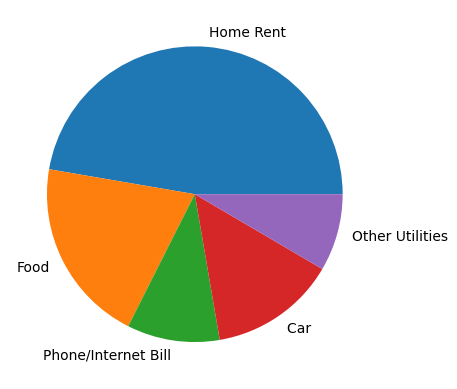

In [ ]:
def main():
    vals = [1400,600,300,410,250]
    labels = ["Home Rent","Food","Phone/Internet Bill","Car ","Other Utilities"]

    fig, ax = plt.subplots()
    ax.pie(vals, labels=labels)
    plt.show()

if __name__ == "__main__":
    main()

#####***Keyword - shadow***

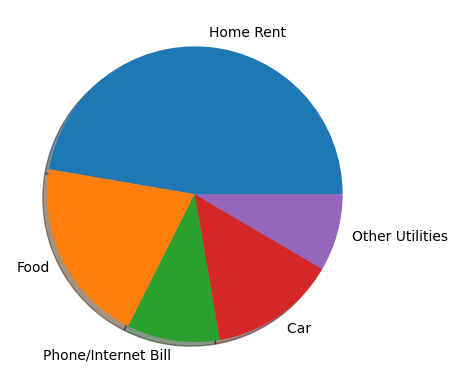

In [ ]:
def main():
    vals = [1400,600,300,410,250]
    labels = ["Home Rent","Food","Phone/Internet Bill","Car ","Other Utilities"]

    fig, ax = plt.subplots()
    ax.pie(vals, labels=labels, shadow=True)
    plt.show()

if __name__ == "__main__":
    main()

#####***Keyword - autopct***

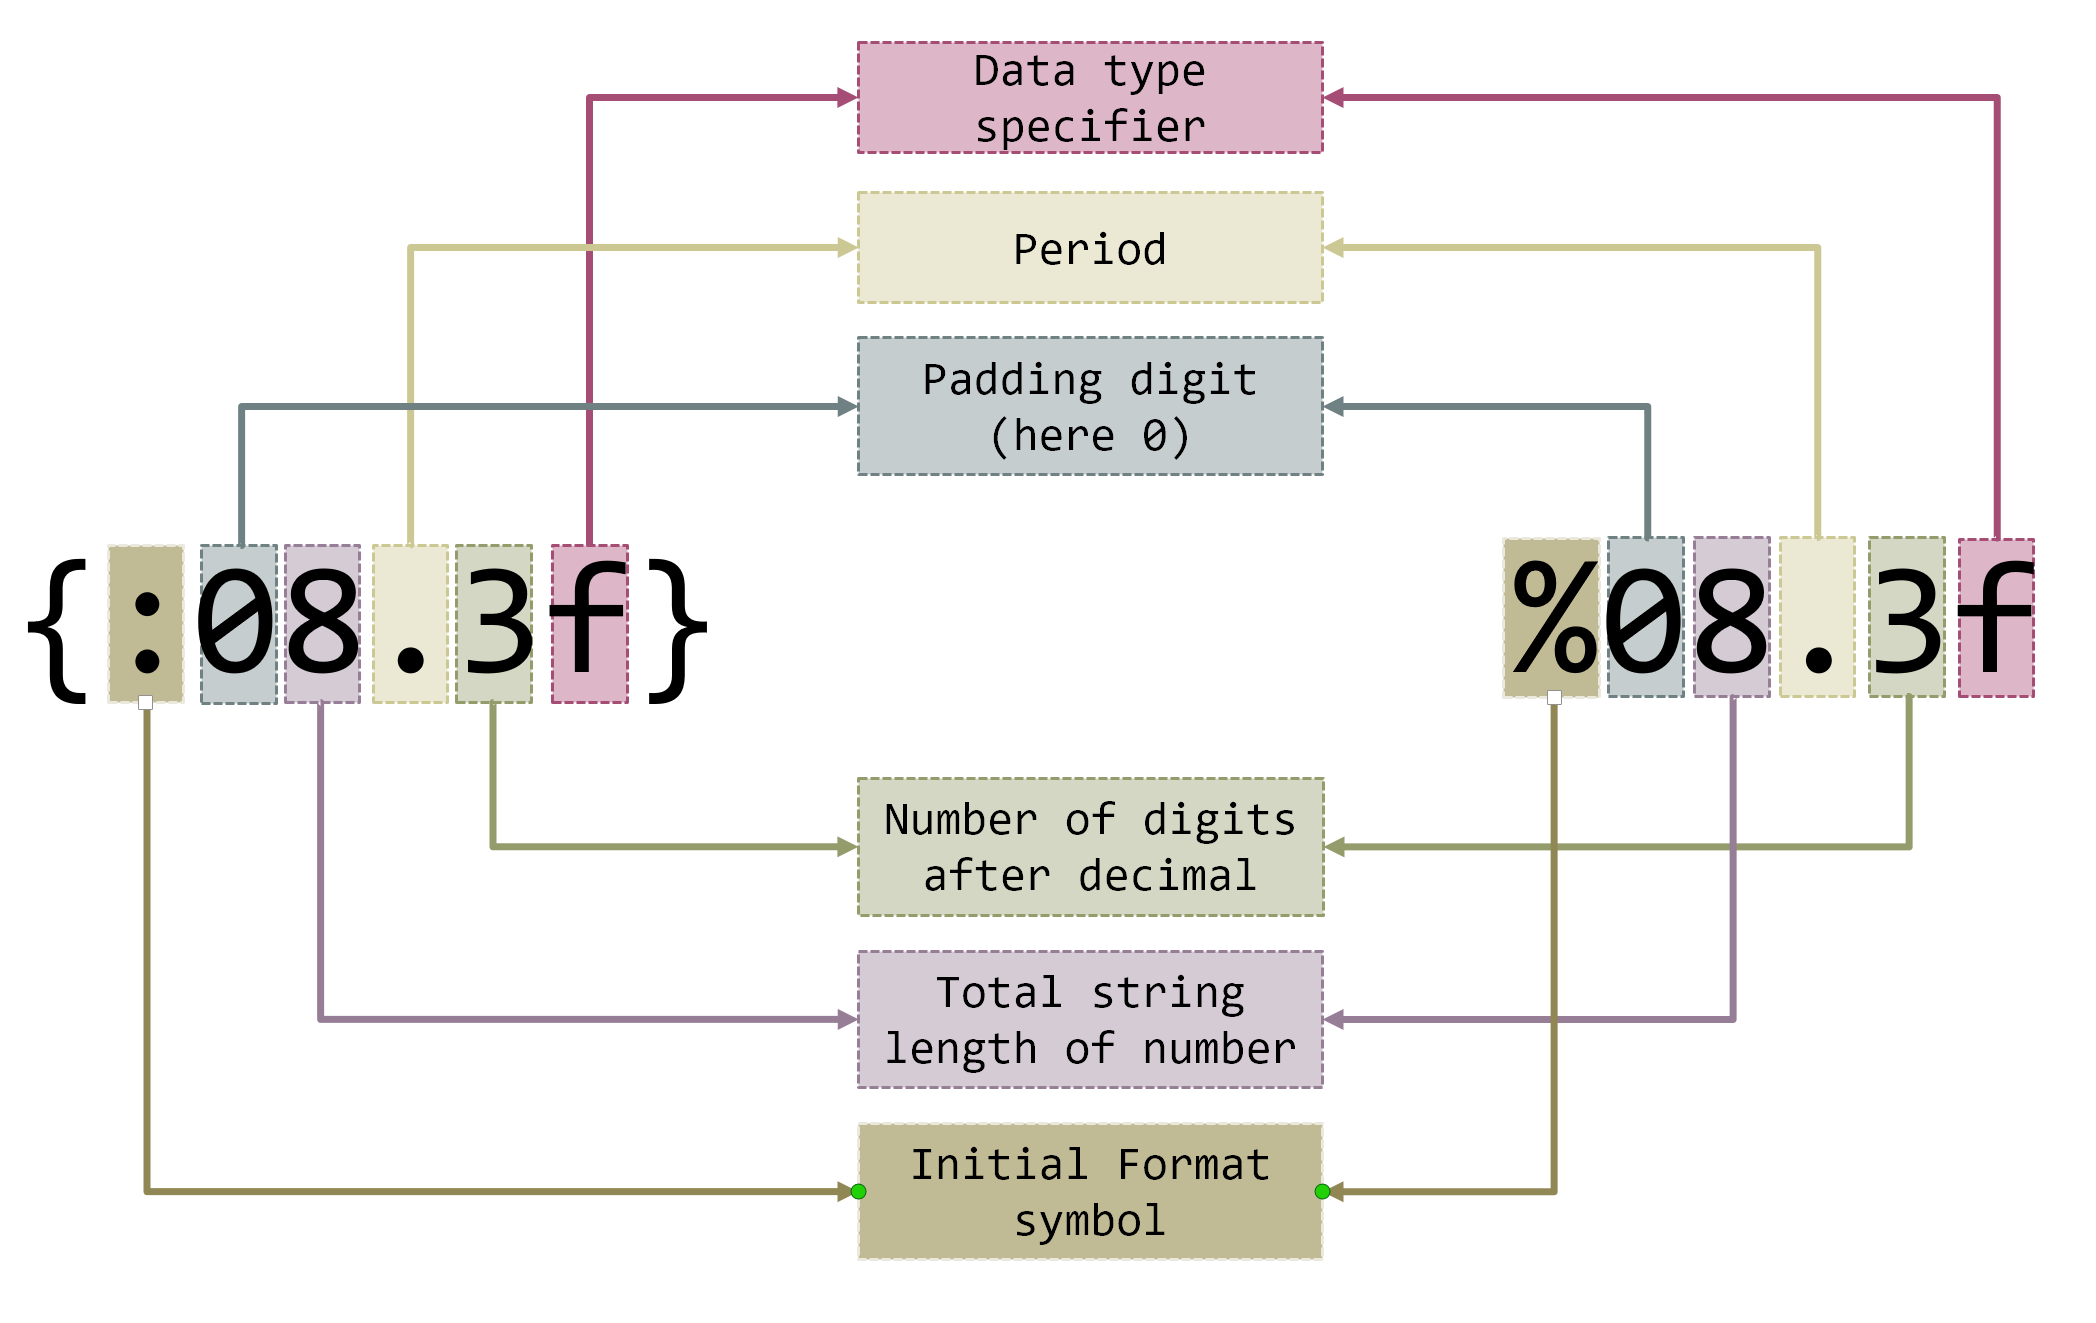

Sorce [Data Structures in Python](https://refactored.ai/microcourse/notebook?path=content%2F02-Python_for_Data_Scientists%2F03-Data_Structures_in_python%2F01-Basic_data_types_and_operators.ipynb)

$$\begin{array}{cccccccccccccccccc}
\text{autopct}&=&\text{'}&\text{%}&4&.&1&\text{f}&\text{%%}&\text{'}\\
&&&\uparrow&\uparrow&&\uparrow&\uparrow&\uparrow&\\
&&&\text{Initial Format}&\text{Total String}&&\text{Number of Digits}&\text{Data Type}&\text{First % - Escape Character (Old Style)}&\\
&&&\text{Symbol}&\text{Length of Number}&&\text{after Decimal}&\text{Specifier}&\text{Second % - Percentage Symbol}&\\
\end{array}$$

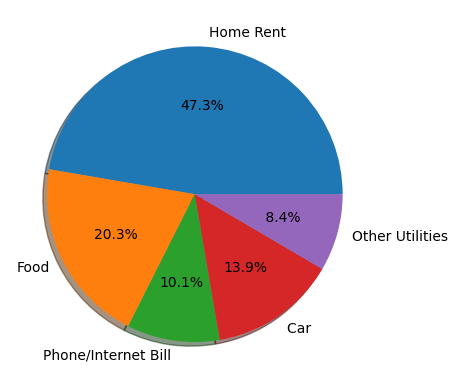

In [ ]:
def main():
    vals = [1400,600,300,410,250]
    labels = ["Home Rent","Food","Phone/Internet Bill","Car ","Other Utilities"]

    fig, ax = plt.subplots()
    ax.pie(vals, labels=labels, shadow=True, autopct='%4.1f%%')
    plt.show()

if __name__ == "__main__":
    main()

#####***Keyword - radius***

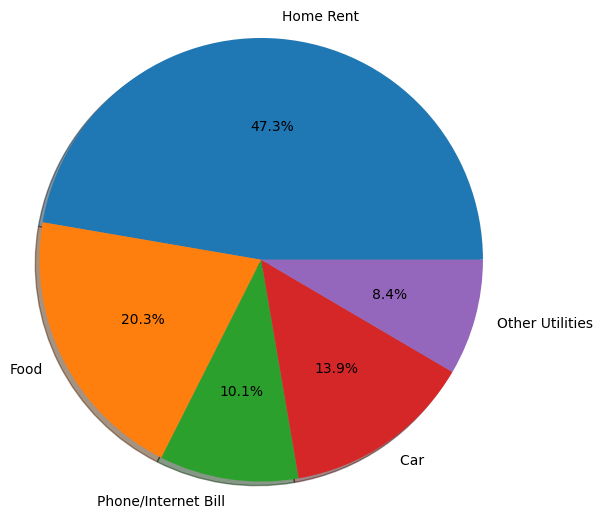

In [ ]:
def main():
    vals = [1400,600,300,410,250]
    labels = ["Home Rent","Food","Phone/Internet Bill","Car ","Other Utilities"]

    fig, ax = plt.subplots()
    ax.pie(vals, labels=labels, shadow=True, autopct='%1.1f%%', radius=1.5)
    plt.show()

if __name__ == "__main__":
    main()

#####***Keyword - explode***

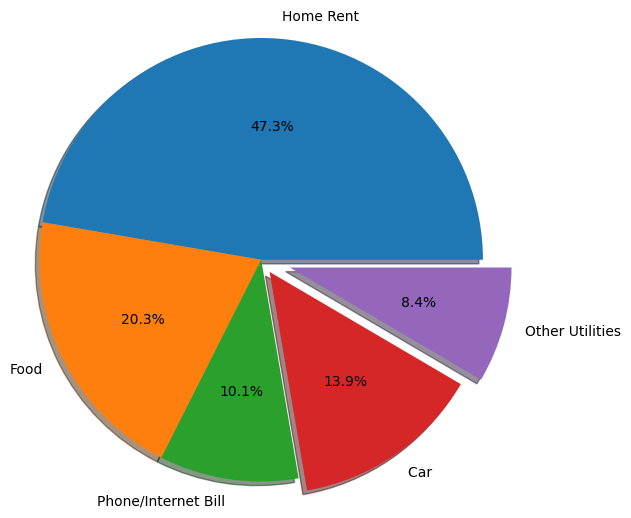

In [ ]:
def main():
    vals = [1400,600,300,410,250]
    labels = ["Home Rent","Food","Phone/Internet Bill","Car ","Other Utilities"]

    fig, ax = plt.subplots()
    ax.pie(
        vals, 
        labels=labels, 
        shadow=True, 
        autopct='%1.1f%%', 
        radius=1.5, 
        explode=[0,0,0,0.1,0.2]
        )
    plt.show()

if __name__ == "__main__":
    main()

#####***Keyword - counterclock***

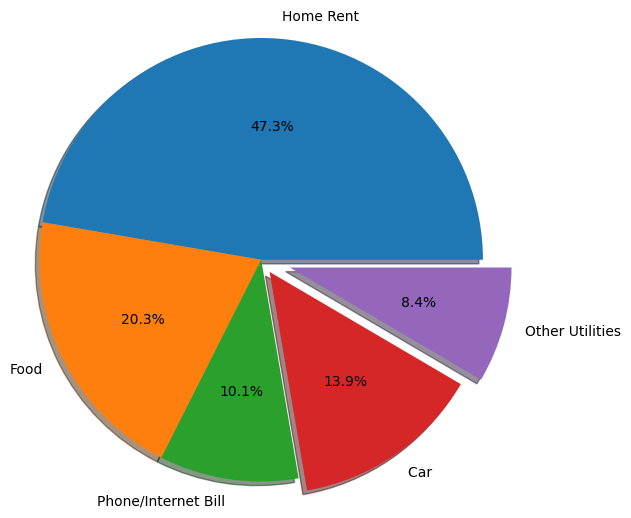

In [ ]:
def main():
    vals = [1400,600,300,410,250]
    labels = ["Home Rent","Food","Phone/Internet Bill","Car ","Other Utilities"]

    fig, ax = plt.subplots()
    ax.pie(
        vals, 
        labels=labels, 
        shadow=True, 
        autopct='%1.1f%%', 
        radius=1.5, 
        explode=[0,0,0,0.1,0.2], 
        counterclock=True
        )
    plt.show()

if __name__ == "__main__":
    main()

#####***Keyword - startangle***




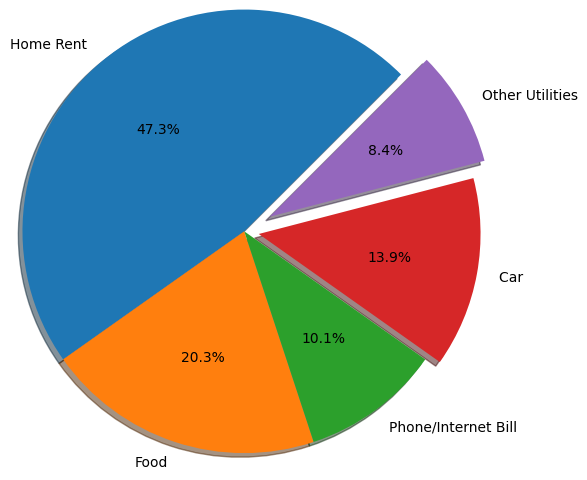

In [ ]:
def main():
    vals = [1400,600,300,410,250]
    labels = ["Home Rent","Food","Phone/Internet Bill","Car ","Other Utilities"]

    fig, ax = plt.subplots()
    ax.pie(
        vals, 
        labels=labels, 
        shadow=True, 
        autopct='%1.1f%%', 
        radius=1.5, 
        explode=[0,0,0,0.1,0.2], 
        counterclock=True,
        startangle=45
        )
    plt.show()

if __name__ == "__main__":
    main()

####***Section 3 Bar Chart [eng](https://www.youtube.com/watch?v=uHRqkGXX55I&list=PL0KQuRyPJoe6KjlUM6iNYgt8d0DwI-IGR&index=3&t=29s) [doc](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.bar.html)***

#####***Code - Bar Chart : Pandas DataFrame Plot Method***

df
           Number of Teachers
Courses                      
Language                    7
History                     3
Math                        9
Chemistry                   3
Physics                     4



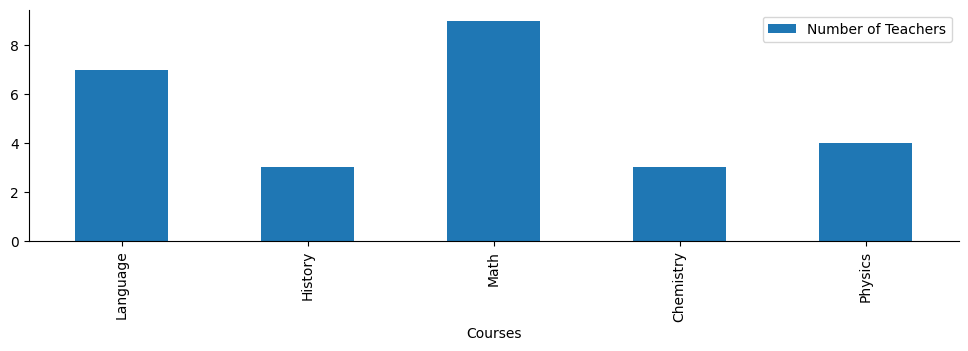

In [ ]:
def main():
    data = {'Courses': ['Language', 'History', 'Math', 'Chemistry', 'Physics'],
            'Number of Teachers': [7, 3, 9, 3, 4]}
    df = pd.DataFrame(data).set_index('Courses')
    print("df")
    print(df, end="\n\n")
    
    fig, ax = plt.subplots(figsize=(12,3))
    df.plot(kind='bar', ax=ax)
    ax.spines['right'].set_visible(False)
    ax.spines['top'].set_visible(False)
    plt.show()
       
if __name__ == "__main__":
    main()

#####***Code - Bar Chart : Matplotlib Axes Bar Method***

df
           Number of Teachers
Courses                      
Language                    7
History                     3
Math                        9
Chemistry                   3
Physics                     4

<class 'matplotlib.axes._axes.Axes'>


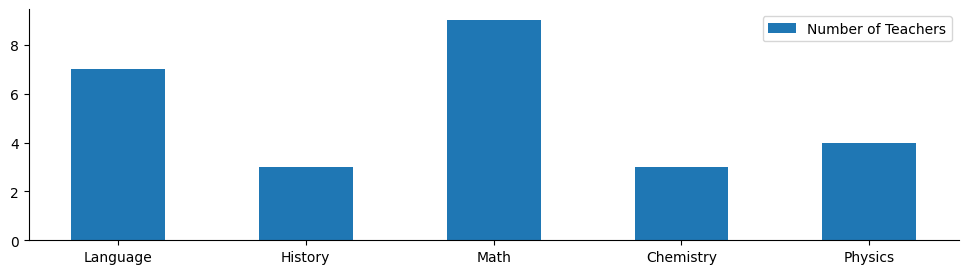

In [ ]:
def main():
    data = {'Courses': ['Language', 'History', 'Math', 'Chemistry', 'Physics'],
            'Number of Teachers': [7, 3, 9, 3, 4]}
    df = pd.DataFrame(data).set_index('Courses')
    print("df")
    print(df, end="\n\n")
    
    fig, ax = plt.subplots(figsize=(12,3))
    data = df["Number of Teachers"]
    ax.bar(
        x=range(data.shape[0]), 
        height=data, 
        tick_label=df.index, 
        label="Number of Teachers",
        width=0.5,
        )
    ax.legend()
    ax.spines['right'].set_visible(False)
    ax.spines['top'].set_visible(False)
    plt.show()
       
if __name__ == "__main__":
    main()

#####***Code - Bar Chart with Two Bars : Pandas DataFrame Plot Method***

df
         Midterm  Final
Student                
Brandon       85     90
Vanessa       60     90
Daniel        60     65
Kevin         65     80
Wiliam       100     95



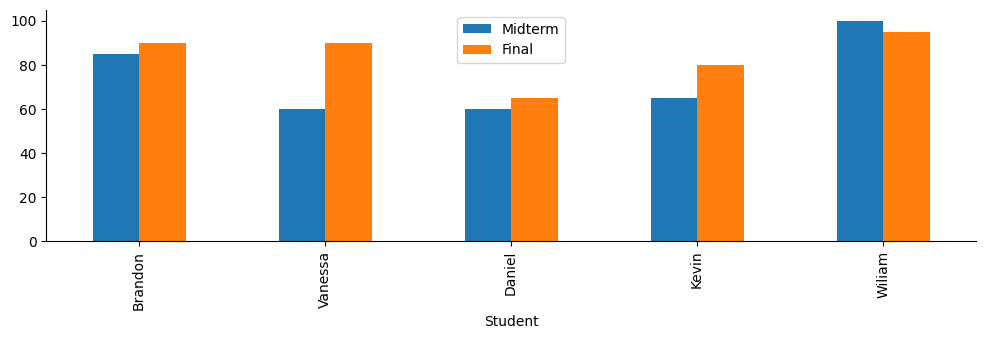

In [ ]:
def main():
    data = {'Student': ['Brandon', 'Vanessa', 'Daniel', 'Kevin', 'Wiliam'],
            'Midterm': [85,60,60,65,100],
            'Final': [90,90,65,80,95]}
    df = pd.DataFrame(data).set_index('Student')
    print("df")
    print(df, end="\n\n")
    
    fig, ax = plt.subplots(figsize=(12,3))
    df.plot(kind='bar', ax=ax)
    ax.spines['right'].set_visible(False)
    ax.spines['top'].set_visible(False)
    plt.show()
       
if __name__ == "__main__":
    main()

#####***Code - Bar Chart with Two Bars : Matplotlib Axes Bar Method***

df
         Midterm  Final
Student                
Brandon       85     90
Vanessa       60     90
Daniel        60     65
Kevin         65     80
Wiliam       100     95



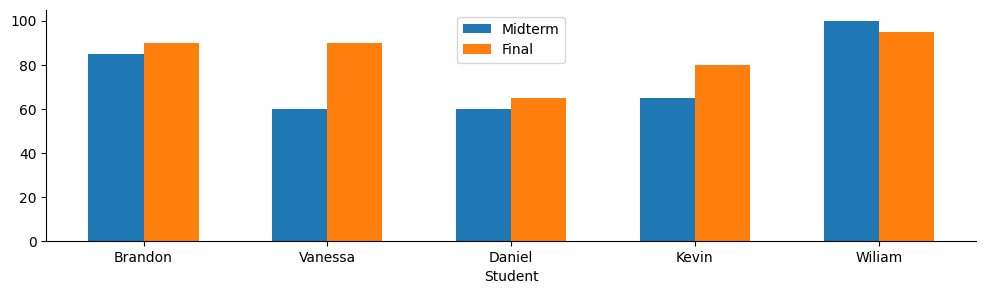

In [ ]:
def main():
    data = {'Student': ['Brandon', 'Vanessa', 'Daniel', 'Kevin', 'Wiliam'],
            'Midterm': [85,60,60,65,100],
            'Final': [90,90,65,80,95]}
    df = pd.DataFrame(data).set_index('Student')
    print("df")
    print(df, end="\n\n")

    position = np.arange(df.shape[0])
    student = df.index
    midterm = df.Midterm
    final = df.Final
    
    fig, ax = plt.subplots(figsize=(12,3))
    width = 0.3
    ax.bar(position-width/2, midterm, width=width, label="Midterm")
    ax.bar(position+width/2, final, width=width, label="Final")
    ax.set_xticks(position, student)
    ax.set_xlabel("Student")
    ax.legend()
    ax.spines['right'].set_visible(False)
    ax.spines['top'].set_visible(False)
    plt.show()
       
if __name__ == "__main__":
    main()

####**Section 4 Histogram**

#####**Code - Income**

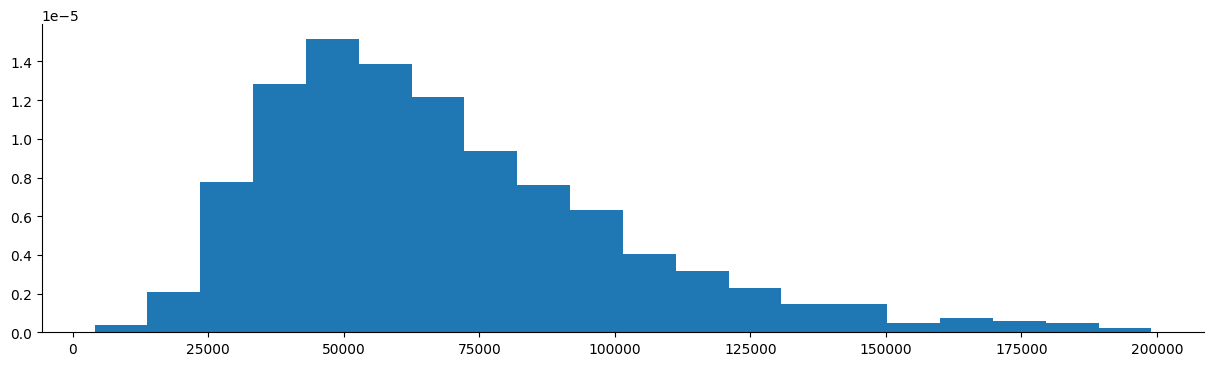

In [ ]:
def main():
    url = 'https://raw.githubusercontent.com/gedeck/practical-statistics-for-data-scientists/master/data/loans_income.csv'
    df = pd.read_csv(url)

    fig, ax = plt.subplots(figsize=(15,4))
    ax.hist(df.x, bins=20, density=True)
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    plt.show()

if __name__ == "__main__":
    main()

#####**Code - Titanic**

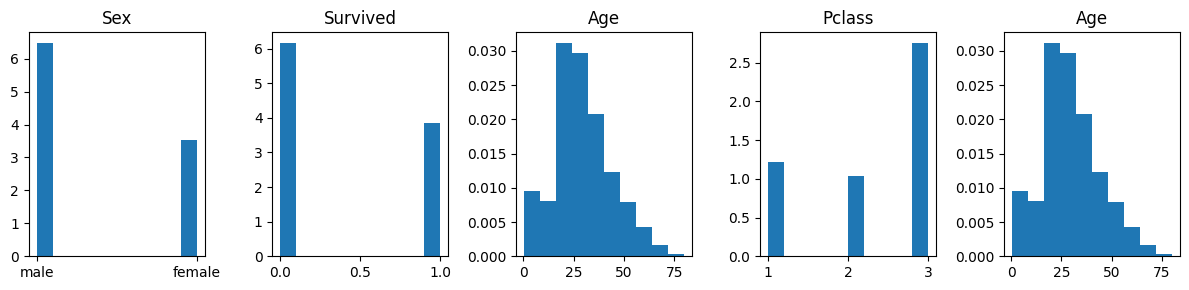

In [ ]:
def main():
    url = "https://raw.githubusercontent.com/datasciencedojo/datasets/master/titanic.csv"
    df = pd.read_csv(url, index_col='PassengerId') 

    fig, axes = plt.subplots(1,5,figsize=(12,3))
    titles = ("Sex","Survived","Age","Pclass","Age")
    for ax, title in zip(axes,titles):
        ax.hist(df[title],density=True)
        ax.set_title(title)
    plt.tight_layout()
    plt.show()

if __name__ == "__main__":
    main()

#####**Code - Housing**

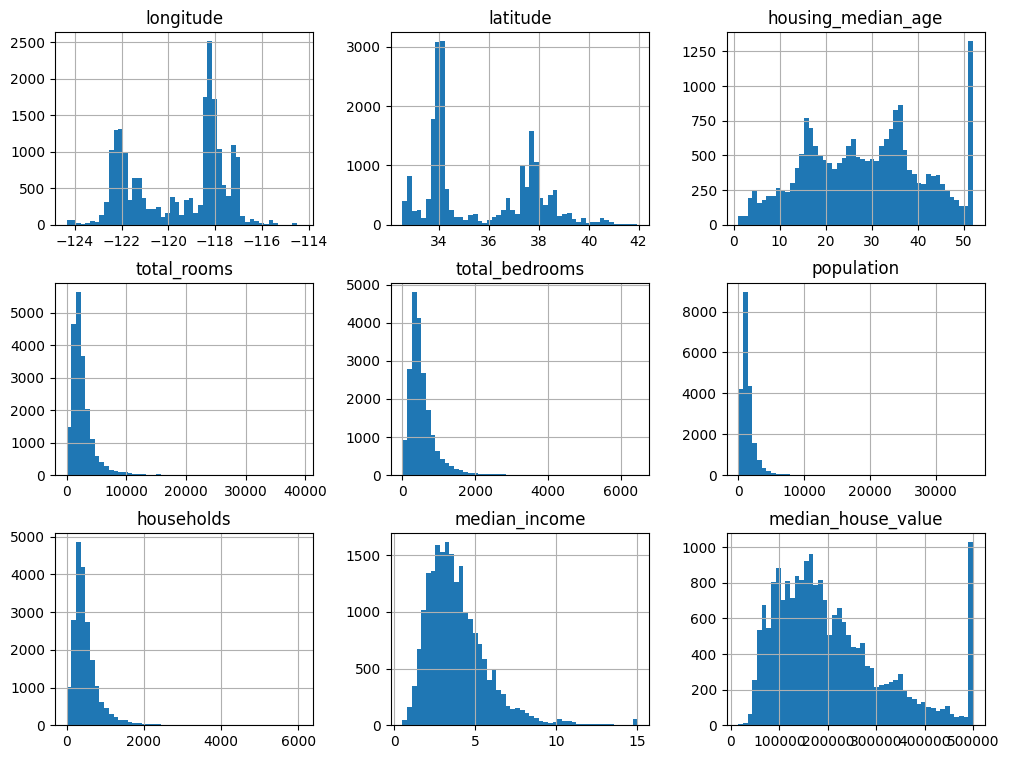

In [ ]:
import os
import tarfile
import urllib.request

DOWNLOAD_ROOT = "https://raw.githubusercontent.com/ageron/handson-ml2/master/"
HOUSING_PATH = os.path.join("datasets", "housing")
HOUSING_URL = DOWNLOAD_ROOT + "datasets/housing/housing.tgz"

def fetch_housing_data(housing_url=HOUSING_URL, housing_path=HOUSING_PATH):
    if not os.path.isdir(housing_path):
        os.makedirs(housing_path)
    tgz_path = os.path.join(housing_path, "housing.tgz")
    urllib.request.urlretrieve(housing_url, tgz_path)
    housing_tgz = tarfile.open(tgz_path)
    housing_tgz.extractall(path=housing_path)
    housing_tgz.close()

def load_housing_data(housing_path=HOUSING_PATH):
    csv_path = os.path.join(housing_path, "housing.csv")
    return pd.read_csv(csv_path)

def main():
    fetch_housing_data()
    df = load_housing_data()

    fig, axes = plt.subplots(3,3,figsize=(12,9))
    df.hist(bins=50, figsize=(20,10), ax=axes)
    plt.show()

if __name__ == "__main__":
    main()

#####**Distribution Table to Histogram**

$$\begin{array}{rr}
\text{income level (\$)}&\text{percent}\\\hline
0-\ \ 1,000&1\\
1,000-\ \ 2,000&2\\
2,000-\ \ 3,000&3\\
3,000-\ \ 4,000&4\\
4,000-\ \ 5,000&5\\
5,000-\ \ 6,000&5\\
6,000-\ \ 7,000&5\\
7,000-10,000&15\\
10,000-15,000&26\\
15,000-25,000&26\\
25,000-50,000&8\\
\end{array}$$

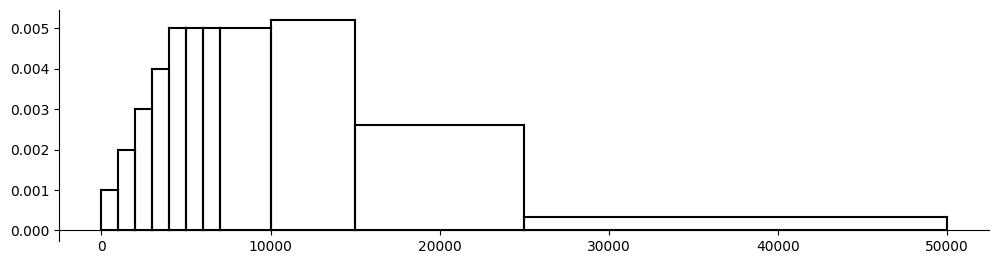

In [ ]:
def compute_bins_widths_heights():
    bins = [0,1_000,2_000,3_000,4_000,5_000,6_000,7_000,10_000,15_000,25_000,50_000]

    widths = []
    for left, right in zip(bins[:-1],bins[1:]):
        widths.append( right - left )

    percents = [1,2,3,4,5,5,5,15,26,26,8]
    heights = []
    for width, percent in zip(widths,percents):
        heights.append( percent / width )

    return bins, widths, heights

def draw_line(start,end,ax):
    ax.plot([start[0],end[0]],[start[1],end[1]],'-k')

def draw_box(x_left,x_right,height,ax):
    start = [x_left,0]
    end = [x_right,0]
    draw_line(start,end,ax)
    start = [x_right,0]
    end = [x_right,height]
    draw_line(start,end,ax)
    start = [x_right,height]
    end = [x_left,height]
    draw_line(start,end,ax)
    start = [x_left,height]
    end = [x_left,0]
    draw_line(start,end,ax)

def main():
    bins, widths, heights = compute_bins_widths_heights()

    fig, ax = plt.subplots(figsize=(12,3))
    for x_left, x_right, height in zip(bins[:-1],bins[1:],heights):
        draw_box(x_left,x_right,height,ax)
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.spines['bottom'].set_position("zero")
    plt.show()

if __name__ == "__main__":
    main()

#####**Distribution Table to Cumulative Histogram (or Ogive)**

$$\begin{array}{rrr}
\text{income level (\$)}&\text{percent}&\text{cum percent}\\\hline
0-\ \ 1,000&1&1\\
1,000-\ \ 2,000&2&3\\
2,000-\ \ 3,000&3&6\\
3,000-\ \ 4,000&4&10\\
4,000-\ \ 5,000&5&15\\
5,000-\ \ 6,000&5&20\\
6,000-\ \ 7,000&5&25\\
7,000-10,000&15&40\\
10,000-15,000&26&66\\
15,000-25,000&26&92\\
25,000-50,000&8&100\\
\end{array}$$

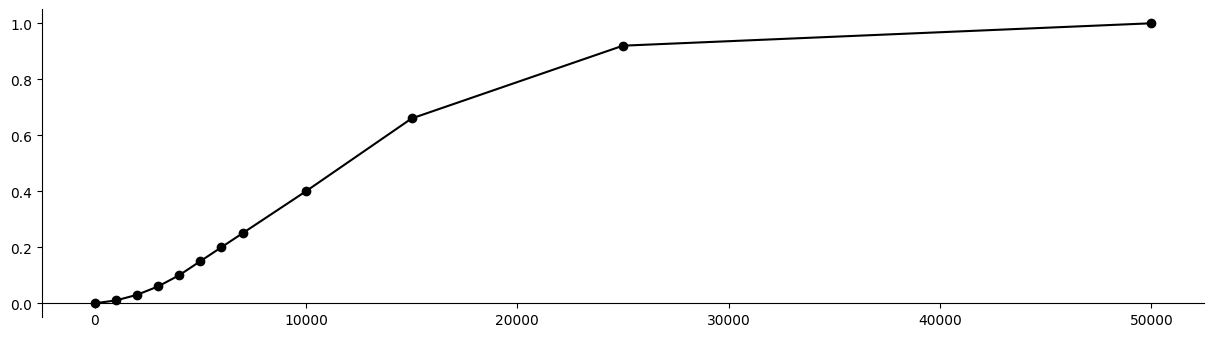

In [ ]:
def main():
    # compute widths
    bins = [0,1_000,2_000,3_000,4_000,5_000,6_000,7_000,10_000,15_000,25_000,50_000]

    # compute cdf
    probs = np.array([0,1,2,3,4,5,5,5,15,26,26,8]) / 100
    cum_probs = probs.cumsum()

    # draw ogive
    fig, ax = plt.subplots(figsize=(15,4))
    ax.plot(bins,cum_probs,'-ok')
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.spines['bottom'].set_position("zero")
    plt.show()

if __name__ == "__main__":
    main()

####**Section 5 Box Plot**

#####**Box (and Whisker) Plot**

<img src="https://cdn1.byjus.com/wp-content/uploads/2021/03/Math-imagesArtboard-1-copy-13-8.png">

[Box and Whisker Plot](https://byjus.com/maths/box-and-whisker-plot/)

#####**Code - Titanic**

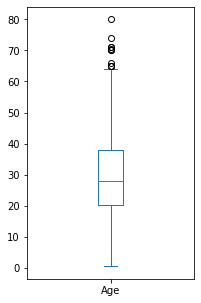

In [ ]:
def main():
    url = "https://raw.githubusercontent.com/datasciencedojo/datasets/master/titanic.csv"
    df = pd.read_csv(url, index_col='PassengerId') 

    fig, ax = plt.subplots(figsize=(3,5))
    df.Age.plot(kind='box', ax=ax)
    plt.show()

if __name__ == "__main__":
    main()

#####**With Outlier and Without Outlier**

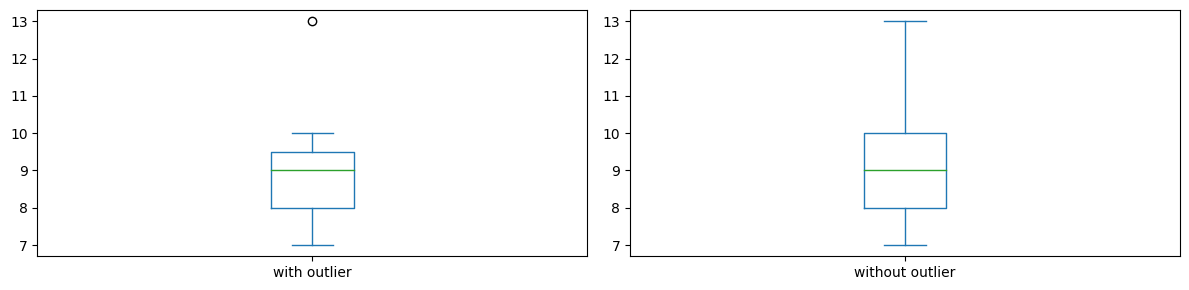

In [ ]:
def main():
    fig, (ax0, ax1) = plt.subplots(1,2,figsize=(12,3))
    
    data0 = pd.Series([13,9,10,8,7,10,9,8,9,8,9], name="with outlier")
    data0.plot(kind='box', ax=ax0)
    
    data1 = pd.Series([13,9,10,8,7,10,9,8,9,8,9]+[12], name="without outlier")
    data1.plot(kind='box', ax=ax1)
    
    plt.tight_layout()
    plt.show()

        
if __name__ == "__main__":
    main()

####**Section 6 Stem Plot [eng](https://www.youtube.com/watch?v=uHRqkGXX55I&list=PL0KQuRyPJoe6KjlUM6iNYgt8d0DwI-IGR&index=2&t=4m03s) [doc](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.stem.html)**

#####**Stem Plot [eng](https://www.youtube.com/watch?v=AH6FSh7-6Bw)**

In [ ]:
!pip install stemgraphic

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


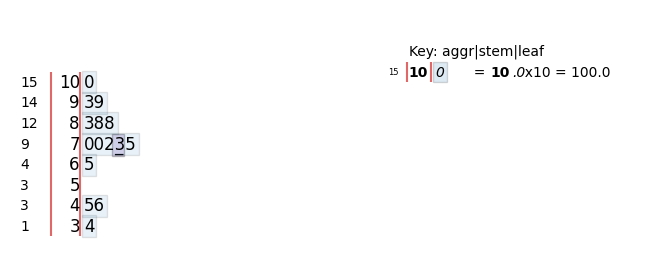

In [ ]:
import stemgraphic

def main():
    data = [65,93,45,73,99,70,88,46,75,34,83,100,88,72,70]
    
    stemgraphic.stem_graphic(data, scale=10)

if __name__ == "__main__":
    main()

####**Section 7 Time Plot [eng](https://www.youtube.com/watch?v=uHRqkGXX55I&list=PL0KQuRyPJoe6KjlUM6iNYgt8d0DwI-IGR&index=2&t=7m16s)**

#####**Time Plot**

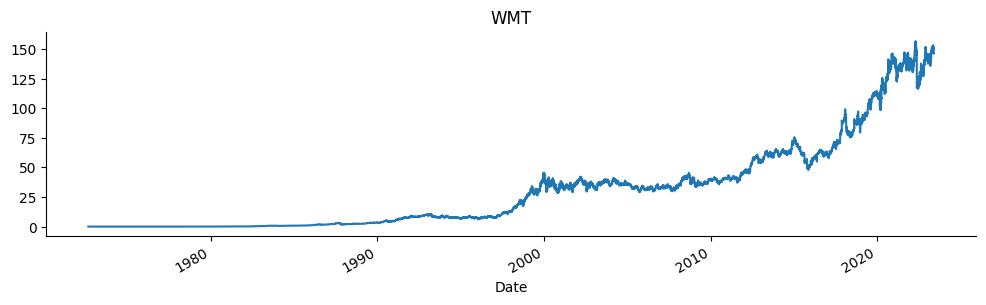

In [ ]:
def download(ticker):
    return yf.Ticker(ticker).history(period='max') 

def main():
    ticker = "WMT"
    df = download(ticker)
    
    fig, ax = plt.subplots(figsize=(12,3))
    df['Close'].plot(ax=ax)
    ax.set_title(ticker)
    ax.spines['right'].set_visible(False)
    ax.spines['top'].set_visible(False)
    plt.show()
       
if __name__ == "__main__":
    main()

####**Section 8 Cross Tabulation**

#####**Cross Tabulation**

In [ ]:
def main():
    data = {'SUV': 28*['yes'] + 35*['no'] + 97*['yes'] + 104*['no'],
            'Accident': 28*['yes'] + 35*['yes'] + 97*['no'] + 104*['no']}
    df = pd.DataFrame(data)
    print('df'+"-"*50)
    print(df, end='\n\n')
    
    dg = pd.crosstab(df.SUV, df.Accident, rownames=['SUV'], colnames=['Accident'])
    dg.loc['TOTAL',:] = dg.sum()
    dg.loc[:,'TOTAL'] = dg.sum(axis=1) 
    dg = dg.astype(int)
    print('dg'+"-"*50)
    print(dg, end='\n\n')
    
    dh = dg.copy()
    dh = dh / dh.loc['TOTAL','TOTAL'] 
    print('dh'+"-"*50)
    print(dh)
        
if __name__ == "__main__":
    main()

df--------------------------------------------------
     SUV Accident
0    yes      yes
1    yes      yes
2    yes      yes
3    yes      yes
4    yes      yes
..   ...      ...
259   no       no
260   no       no
261   no       no
262   no       no
263   no       no

[264 rows x 2 columns]

dg--------------------------------------------------
Accident   no  yes  TOTAL
SUV                      
no        104   35    139
yes        97   28    125
TOTAL     201   63    264

dh--------------------------------------------------
Accident        no       yes     TOTAL
SUV                                   
no        0.393939  0.132576  0.526515
yes       0.367424  0.106061  0.473485
TOTAL     0.761364  0.238636  1.000000


#####***How to get Joint, Marginal, Conditional from Other Two***

$$\begin{array}{llll}
\mbox{Chain rule}&\displaystyle p(x,y)=p(x)p(y|x)\\
\\
\mbox{Marginalization}&\displaystyle p(x)=\sum_yp(x,y)\\
\mbox{Conditioning}&\displaystyle p(y|x)=\frac{p(x,y)}{p(x)}
\end{array}$$

### **Chapter 6 Statistics**

####***Section 1 Distribution***

#####***Random Variable***



$$
X:\Omega\longrightarrow \mathbb{R}
$$

#####***Distribution***



Let $X$ be a random variable.
We move a brick attached to $\omega$,
to $X(\omega)$ in the real line $\mathbb{R}$.
In this way we move all the bricks in $\Omega$ to $\mathbb{R}$.
Then
the total weights of the bricks moved into  $\mathbb{R}$ is 1.
This brick or weight distribution over the real line $\mathbb{R}$ is
the distribution of $X$.
$$\begin{array}{llll}
\mathbb{P}(X=a)&=&\mbox{Weight of the bricks at $a$}\nonumber\\
\\
\mathbb{P}(X\in A)&=&\mbox{Weight of the bricks in $A$}\nonumber\\
\end{array}$$

#####***PMF/PDF***



$$\begin{array}{llll}
\mbox{PMF}&p_{x_i}&=&\mbox{Weight of the bricks attached to $x_i$}\nonumber\\
\\
\mbox{PDF}&f(x)dx&=&\mbox{Weight of the bricks in $[x,x+dx]$}\nonumber
\end{array}$$

#####***CDF***









\begin{eqnarray}
F(x)&=&\mathbb{P}(X\le x)\nonumber\\
\nonumber\\
&=&\left\{\begin{array}{ll}\displaystyle\sum_{x_i\le x}p_{x_i}&\mbox{if $X$ is discrete}\\\displaystyle\int_{-\infty}^x f(s)ds&\mbox{if $X$ is continuous}\end{array}\right.\nonumber\\
\nonumber\\
&=&\mbox{Weight of the bricks cumulatively stacked from $-\infty$ up to $x$}\nonumber
\end{eqnarray}

#####***PMF/PDF and CDF***

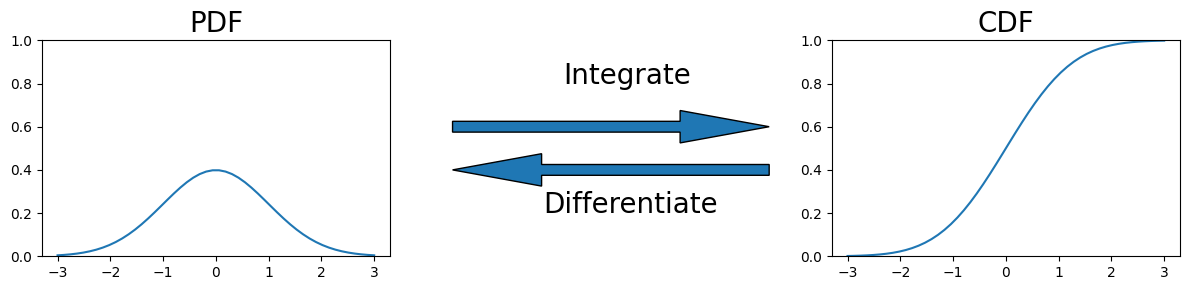

In [ ]:
def main():    
    fig, (ax0,ax1,ax2) = plt.subplots(1,3,figsize=(12,3))
    
    ax0.set_title("PDF", fontsize=20)
    x = np.linspace(-3,3)
    y = stats.norm().pdf(x) 
    ax0.plot(x,y)
    
    x, y = ( 0.1, 0.6 )
    dx, dy = ( 0.8, 0 )
    ax1.arrow(x, y, dx, dy, width=0.05, length_includes_head=True)
    
    x, y = ( 0.9, 0.4 )
    dx, dy = ( -0.8, 0 )
    ax1.arrow(x, y, dx, dy, width=0.05, length_includes_head=True)
    
    ax1.annotate("Integrate", (0.38,0.8), fontsize=20)
    ax1.annotate("Differentiate", (0.33,0.2), fontsize=20)
    
    for position in ("left","right","top","bottom"):
        ax1.spines[position].set_visible(False)
        
    ax1.set_xticks( [] )
    ax1.set_yticks( [] )
    
    ax2.set_title("CDF", fontsize=20)
    x = np.linspace(-3,3)
    y = stats.norm().cdf(x) 
    ax2.plot(x,y)
    
    for ax in (ax0,ax1,ax2):
        ax.set_ylim(0,1)
    
    plt.tight_layout()
    plt.show()
    
if __name__ == "__main__":
    main()

#####***Empirical PMF/PDF and CDF***

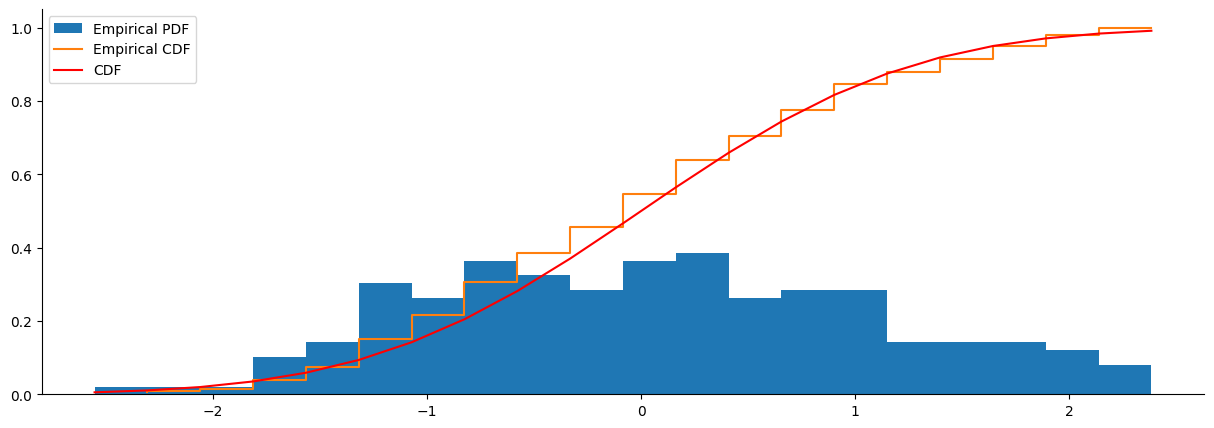

In [ ]:
def main():
    num_simulation = 200
    data = stats.norm.rvs(size=(num_simulation,))

    fig, ax = plt.subplots(figsize=(15,5))
    
    bins = 20
    counts, bin_edges, _ = ax.hist(data, bins=bins, density=True, label="Empirical PDF")
    
    cdf = np.cumsum(counts) 
    cdf /= cdf[-1]
    ax.step(bin_edges[1:], cdf, label="Empirical CDF")
    
    ax.plot(bin_edges, stats.norm.cdf(bin_edges), 'r', label="CDF")
    
    ax.legend()
    
    ax.spines['right'].set_visible(False)
    ax.spines['top'].set_visible(False)

    plt.show()

    
if __name__ == "__main__":
    main()

#####***CDF and PPF***

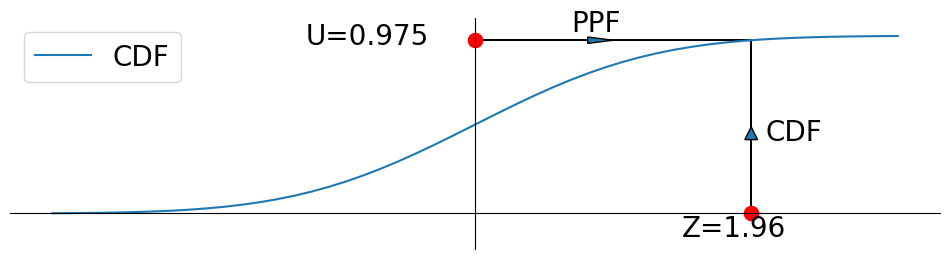

In [ ]:
def main():    
    fig, ax = plt.subplots(figsize=(12,3))
    
    ax.set_ylim(-3,3)
    ax.set_ylim(-0.2,1.1)
    
    delta_x = 6
    delta_y = 1.2
    
    x = np.linspace(-3,3)
    y = stats.norm().cdf(x) 
    ax.plot(x,y,label='CDF')
    ax.legend(fontsize=20)
    
    u = 0.975
    ax.plot([0,0],[u,u],'or',markersize=10)
    ax.plot([stats.norm().ppf(u),stats.norm().ppf(u)],[0,0],'or',markersize=10)
    
    x, y = ( 0, u )
    dx, dy = ( stats.norm().ppf(u), 0 )
    ax.arrow(x, y, dx, dy, length_includes_head=True)
    
    x, y = ( 0, u )
    dx, dy = ( stats.norm().ppf(u) / 2 , 0 )
    ax.arrow(x, y, dx, dy, length_includes_head=True, head_width=0.03*delta_y, head_length=0.03*delta_x)
    
    x, y = ( stats.norm().ppf(u), u )
    dx, dy = ( 0, -u )
    ax.arrow(x, y, dx, dy, length_includes_head=True)
    
    x, y = ( stats.norm().ppf(u), 0 )
    dx, dy = ( 0, u / 2 )
    ax.arrow(x, y, dx, dy, length_includes_head=True, head_width=0.015*delta_x, head_length=0.06*delta_y)
    
    ax.annotate("PPF", ( stats.norm().ppf(u) / 2 - 0.3, u + 0.05 ), fontsize=20)
    ax.annotate("U=0.975", (0-1.2,u-0.022), fontsize=20)
    ax.annotate(f"CDF", (stats.norm().ppf(u)+0.1,0.5-0.09), fontsize=20)
    ax.annotate(f"Z={stats.norm().ppf(u):.3}", (stats.norm().ppf(u)-0.49,0-0.13), fontsize=20)
    
    ax.spines['right'].set_visible(False)
    ax.spines['top'].set_visible(False)
    ax.spines['left'].set_position('zero')
    ax.spines['bottom'].set_position('zero')
        
    ax.set_xticks( [] )
    ax.set_yticks( [] )

    plt.show()
    
if __name__ == "__main__":
    main()

#####***Example - Amelia's Maximum Average Wait Time [eng](http://localhost:8888/notebooks/Dropbox/Git/statistics/01%20Intro%2008%20PDF%2C%20CDF%2C%20and%20PPF/03%20PPF%2002%20Example%20from%20Khan.ipynb)***

The distribution of average wait times in drive-through restaurant lines in one town was approximately normal with mean of 185 seconds and standard deviation of 11 seconds. Amelia only likes to use the drive-through for restaurants where the average wait time is in the bottom 10% for that town. What is the maximum average wait time for restaurants where Amelia likes to use the drive-through? 

######**Solution**

max_average_wait_time = 170.90



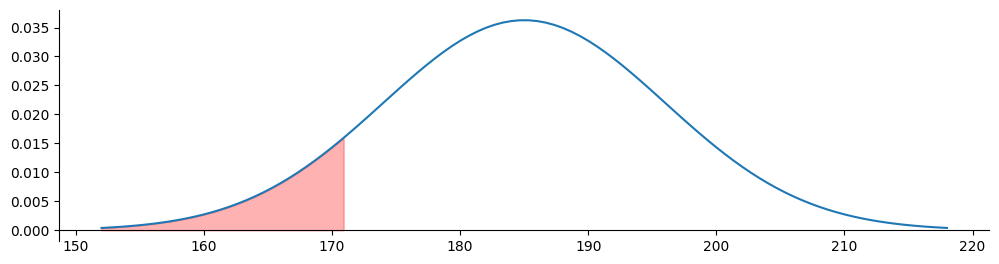

In [ ]:
def main(): 
    mu = 185
    sigma = 11 
    
    x_min = mu - 3 * sigma
    x_max = mu + 3 * sigma
    x = np.linspace(x_min, x_max, 100)
    pdf = stats.norm(loc=mu, scale=sigma).pdf(x) 

    max_average_wait_time = stats.norm(loc=mu, scale=sigma).ppf(0.1) 
    print(f"{max_average_wait_time = :.2f}", end="\n\n")

    x_left = np.linspace(x_min, max_average_wait_time, 100)
    pdf_left = stats.norm(loc=mu, scale=sigma).pdf(x_left) 
    zero_left = np.zeros_like(pdf_left)  

    fig, ax = plt.subplots(figsize=(12,3)) 
    ax.plot(x, pdf)
    ax.fill_between(x_left, zero_left, pdf_left,
                    interpolate=True, color='r', 
                    alpha=0.3)
    ax.spines['right'].set_visible(False)
    ax.spines['top'].set_visible(False)
    ax.spines['bottom'].set_position('zero')
    plt.show()
    
if __name__ == "__main__":
    main()

####**Section 2 Measures of Center [eng](https://www.youtube.com/watch?v=mk8tOD0t8M0&list=PL0KQuRyPJoe6KjlUM6iNYgt8d0DwI-IGR&index=4)**

#####**Mean**

$$\begin{array}{lllllll}
\text{Population Mean}&&\mu&=&\displaystyle\frac{\sum_{i=1}^Nx_i}{N}\\
\text{Sample Mean}&&\bar{x}&=&\displaystyle\frac{\sum_{i=1}^nx_i}{n}\\
\text{Math Mean}&&\mathbb{E}X&=&\displaystyle\sum_{i}x_i\mathbb{P}(X=x_i)\quad\text{if there is a PMF $\mathbb{P}$}\\
&&&=&\displaystyle\int_{-\infty}^\infty xf_X(x)dx\quad\text{if there is a PDF $f_X$}\\
\end{array}$$

In [ ]:
def main():
    # data
    url = 'https://raw.githubusercontent.com/gedeck/practical-statistics-for-data-scientists/master/data/loans_income.csv'
    df = pd.read_csv(url)
    mean = df.x.mean()
    print(f"{mean = }")

if __name__ == "__main__":
    main()

mean = 68760.51844


#####**Median**

In [ ]:
def main():
    # data
    url = 'https://raw.githubusercontent.com/gedeck/practical-statistics-for-data-scientists/master/data/loans_income.csv'
    df = pd.read_csv(url)
    mean = df.x.mean()
    median = df.x.median()
    print(f"{median = }")

if __name__ == "__main__":
    main()

median = 62000.0


#####**Median is Good Measure for Center of Income Dataset**

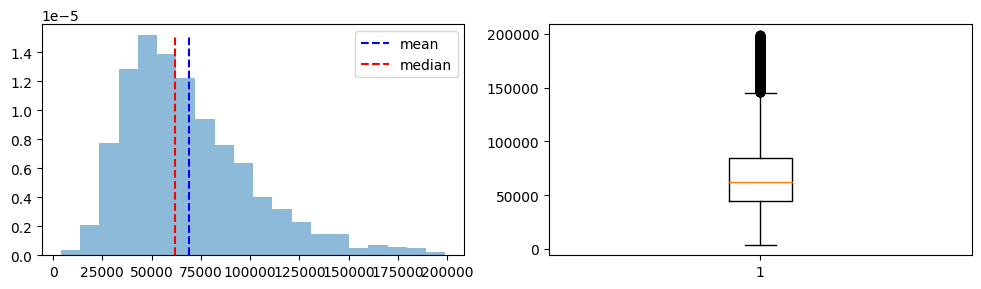

In [ ]:
def main():
    # data
    url = 'https://raw.githubusercontent.com/gedeck/practical-statistics-for-data-scientists/master/data/loans_income.csv'
    df = pd.read_csv(url)
    mean = df.x.mean()
    median = df.x.median()

    # histogram and box plot 
    # long right hand tail
    # meadin < mean
    # if data is not symmetric, meadian is better to locate the center of data
    fig, (ax0, ax1) = plt.subplots(1,2,figsize=(12,3))
    n, *_ = ax0.hist(df.x,bins=20,density=True,alpha=0.5)
    ax0.plot([mean,mean],[0,n.max()],'--b',label='mean') # mean
    ax0.plot([median,median],[0,n.max()],'--r',label='median') # median
    ax0.legend()
    ax1.boxplot(df.x)
    plt.show()

if __name__ == "__main__":
    main()

#####**Mode [eng](https://www.youtube.com/watch?v=mk8tOD0t8M0&list=PL0KQuRyPJoe6KjlUM6iNYgt8d0DwI-IGR&index=4) [blog](https://stackabuse.com/calculating-mean-median-and-mode-in-python/) [doc](https://docs.python.org/3/library/statistics.html)**

In [ ]:
import statistics

def main():
    data = [4, 1, 2, 2, 3, 5]

    mode = statistics.mode(data) 
    print(f"{mode = }")

if __name__ == "__main__":
    main()

mode = 2


In [ ]:
import statistics

def main():
    data = [4, 1, 2, 2, 3, 3, 5]

    mode = statistics.mode(data) 
    print(f"{mode = }")

    modes = statistics.multimode(data) 
    print(f"{modes = }")

if __name__ == "__main__":
    main()

mode = 2
modes = [2, 3]


####**Section 3 Measures of Spread [eng](https://www.youtube.com/watch?v=mk8tOD0t8M0&list=PL0KQuRyPJoe6KjlUM6iNYgt8d0DwI-IGR&index=4&t=3m58s)**

#####**Variance**

$$\begin{array}{lllllll}
\text{Population Variance}&&\sigma^2&=&\displaystyle\frac{\sum_{i=1}^N(x_i-\mu)^2}{N}\\
\text{Sample Variance}&&S^2&=&\displaystyle\frac{\sum_{i=1}^n(x_i-\bar{x})^2}{n-1}\\
\text{Math Variance}&&\text{Var}(X)&=&\displaystyle\sum_{i}\left(x_i-\mathbb{E}X\right)^2\mathbb{P}(X=x_i)\quad\text{if there is a PMF $\mathbb{P}$}\\
&&&=&\displaystyle\int_{-\infty}^\infty \left(x_i-\mathbb{E}X\right)^2f_X(x)dx\quad\text{if there is a PDF $f_X$}\\
\end{array}$$

$$\begin{array}{lllllll}
\text{Population Standard Deviation}&&\sigma&=&\displaystyle\sqrt{\frac{\sum_{i=1}^N(x_i-\mu)^2}{N}}\\
\text{Sample Standard Deviation}&&S&=&\displaystyle\sqrt{\frac{\sum_{i=1}^n(x_i-\bar{x})^2}{n-1}}\\
\text{Math Standard Deviation}&&\text{Std}(X)&=&\displaystyle\sqrt{\sum_{i}\left(x_i-\mathbb{E}X\right)^2\mathbb{P}(X=x_i)}\quad\text{if there is a PMF $\mathbb{P}$}\\
&&&=&\displaystyle\sqrt{\int_{-\infty}^\infty \left(x_i-\mathbb{E}X\right)^2f_X(x)dx}\quad\text{if there is a PDF $f_X$}\\
\end{array}$$

In [ ]:
def main():
    x = np.array([1.5,2.5,4,2,1,1])
    print(f"{x.var() = }")
    print(f"{x.var(ddof=1) = }")
      
if __name__ == "__main__":
    main()

x.var() = 1.0833333333333333
x.var(ddof=1) = 1.3


#####**Standard Deviation**

$$\begin{array}{lllllll}
\text{Population Standard Deviation}&&\sigma&=&\displaystyle\sqrt{\frac{\sum_{i=1}^N(x_i-\mu)^2}{N}}\\
\text{Sample Standard Deviation}&&S&=&\displaystyle\sqrt{\frac{\sum_{i=1}^n(x_i-\bar{x})^2}{n-1}}\\
\text{Math Standard Deviation}&&\text{Std}(X)&=&\displaystyle\sqrt{\sum_{i}\left(x_i-\mathbb{E}X\right)^2\mathbb{P}(X=x_i)}\quad\text{if there is a PMF $\mathbb{P}$}\\
&&&=&\displaystyle\sqrt{\int_{-\infty}^\infty \left(x_i-\mathbb{E}X\right)^2f_X(x)dx}\quad\text{if there is a PDF $f_X$}\\
\end{array}$$

In [ ]:
def main():
    x = np.array([1.5,2.5,4,2,1,1])
    print(f"{x.std() = }")
    print(f"{x.std(ddof=1) = }")
      
if __name__ == "__main__":
    main()

std = 32872.035369850266


#####**Standard Deviation of Stock Return**

df.describe()
               WMT          SPY
count  7636.000000  7636.000000
mean      0.000478     0.000440
std       0.016094     0.011897
min      -0.113757    -0.109424
25%      -0.007435    -0.004478
50%       0.000097     0.000669
75%       0.008026     0.005955
max       0.117085     0.145197

df.mean()
WMT    0.000478
SPY    0.000440
dtype: float64

df.std()
WMT    0.016094
SPY    0.011897
dtype: float64

np.corrcoef(df.SPY, df.WMT)
[[1.         0.49730947]
 [0.49730947 1.        ]]



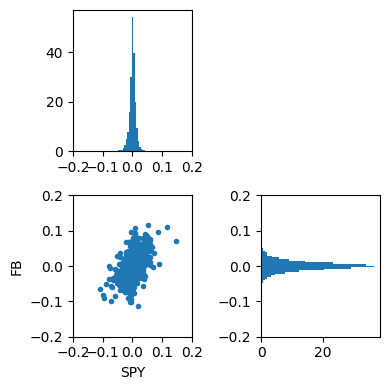

In [ ]:
def compute_daily_return(ticker):
    df = yf.Ticker(ticker).history(period='max')
    df[ticker] = df.Close.pct_change()
    return df[[ticker]].iloc[1:] 
    
def main():
    WMT = compute_daily_return("WMT")
    SPY = compute_daily_return('SPY')
    df = WMT.join(SPY, how='inner')
    
    print("df.describe()")
    print(df.describe(), end="\n\n")
    
    print("df.mean()")
    print(df.mean(), end="\n\n")
    
    print("df.std()")
    print(df.std(), end="\n\n")
    
    print("np.corrcoef(df.SPY, df.WMT)")
    print(np.corrcoef(df.SPY, df.WMT), end="\n\n")
    
    fig, axes = plt.subplots(2,2,figsize=(4,4))
    
    x = df.SPY.to_numpy()
    y = df.WMT.to_numpy()
    
    axes[0,0].hist(x, density=True, bins=50) 
    axes[0,0].set_xlim(-0.2,0.2)
    axes[0,0].set_xticks( (-0.2,-0.1,0,0.1,0.2) )
    
    axes[0,1].axis('off')
    
    axes[1,0].plot(x, y, '.')
    axes[1,0].set_xlabel("SPY")
    axes[1,0].set_ylabel("FB")
    axes[1,0].set_xlim(-0.2,0.2)
    axes[1,0].set_ylim(-0.2,0.2)
    axes[1,0].set_xticks( (-0.2,-0.1,0,0.1,0.2) )
    axes[1,0].set_yticks( (-0.2,-0.1,0,0.1,0.2) )
    
    axes[1,1].hist(y, density=True, bins=50, orientation='horizontal')
    axes[1,1].set_ylim(-0.2,0.2)
    axes[1,1].set_yticks( (-0.2,-0.1,0,0.1,0.2) )
    
    plt.tight_layout()
    plt.show()
    
    
if __name__ == "__main__":
    main()

#####**Divide by n or n-1 [eng](https://www.khanacademy.org/math/ap-statistics/summarizing-quantitative-data-ap/more-standard-deviation/v/review-and-intuition-why-we-divide-by-n-1-for-the-unbiased-sample-variance?modal=1)**

$$
\mathbb{E}S^2=\sigma^2
$$
where
$$\begin{array}{lll}
\bar{X}&=&\displaystyle\frac{\sum_{i=1}^nX_i}{n}\\
S^2&=&\displaystyle\frac{\sum_{i=1}^n\left(X_i-\bar{X}\right)^2}{n-1}\\
\end{array}$$

In [ ]:
def main():
    url = 'https://raw.githubusercontent.com/gedeck/practical-statistics-for-data-scientists/master/data/loans_income.csv'
    df = pd.read_csv(url)
    std0 = df.x.std() # default : ddof=1
    std1 = df.x.std(ddof=1) # divide by n-1
    std2 = df.x.std(ddof=0) # divide by n
    print(f"{std0 = :.2f}")
    print(f"{std1 = :.2f}") 
    print(f"{std2 = :.2f}") 

if __name__ == "__main__":
    main()

std0 = 32872.04
std1 = 32872.04
std2 = 32871.71


#####**Inter Quantile Range (IQR)**

$$
\text{IQR}
=Q_3-Q_1
$$

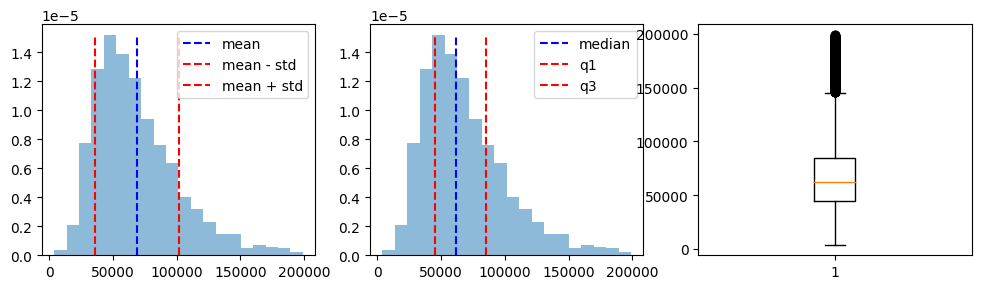

In [ ]:
def main():
    # data
    url = 'https://raw.githubusercontent.com/gedeck/practical-statistics-for-data-scientists/master/data/loans_income.csv'
    df = pd.read_csv(url)
    mean = df.x.mean()
    median = df.x.median()
    std = df.x.std()
    iqr = stats.iqr(df.x)
    print(f"{iqr = }")

if __name__ == "__main__":
    main()

#####**Standard Deviation and Inter Quantile Range (IQR)**

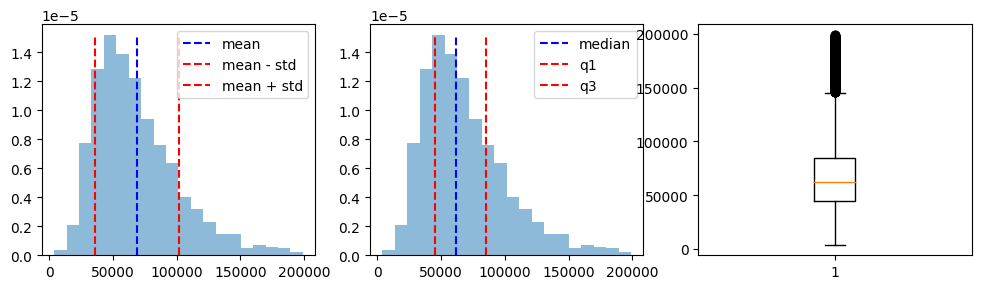

In [ ]:
def main():
    # data
    url = 'https://raw.githubusercontent.com/gedeck/practical-statistics-for-data-scientists/master/data/loans_income.csv'
    df = pd.read_csv(url)
    mean = df.x.mean()
    median = df.x.median()
    std = df.x.std()
    iqr = stats.iqr(df.x)
    q1 = df.describe().loc['25%','x']
    q3 = df.describe().loc['75%','x']

    # histogram and box plot 
    # long right hand tail
    # meadin < mean
    # if data is not symmetric, meadian is better to locate the center of data
    fig, (ax0, ax1, ax2) = plt.subplots(1,3,figsize=(12,3))
    n, *_ = ax0.hist(df.x,bins=20,density=True,alpha=0.5)
    ax0.plot([mean,mean],[0,n.max()],'--b',label='mean') # mean
    ax0.plot([mean-std,mean-std],[0,n.max()],'--r',label='mean - std') # mean - std
    ax0.plot([mean+std,mean+std],[0,n.max()],'--r',label='mean + std') # mean + std
    ax0.legend()
    n, *_ = ax1.hist(df.x,bins=20,density=True,alpha=0.5)
    ax1.plot([median,median],[0,n.max()],'--b',label='median') # median
    ax1.plot([q1,q1],[0,n.max()],'--r',label='q1') # q1
    ax1.plot([q3,q3],[0,n.max()],'--r',label='q3') # q3
    ax1.legend()
    ax2.boxplot(df.x)
    plt.show()

if __name__ == "__main__":
    main()

#####**Q1, Q2, Q3**

In [ ]:
def main():
    url = 'https://raw.githubusercontent.com/gedeck/practical-statistics-for-data-scientists/master/data/loans_income.csv'
    df = pd.read_csv(url)
    q1 = df.describe().loc['25%','x']
    q2 = df.describe().loc['25%','x']
    q3 = df.describe().loc['75%','x'] 
    print(f"{q1 = }")
    print(f"{q2 = }")
    print(f"{q3 = }")

if __name__ == "__main__":
    main()

q1 = 45000.0
q2 = 45000.0
q3 = 85000.0


#####**Range**

$$
\text{Range}
=\text{Max}-\text{Min}
$$

In [ ]:
def main():
    # data
    url = 'https://raw.githubusercontent.com/gedeck/practical-statistics-for-data-scientists/master/data/loans_income.csv'
    df = pd.read_csv(url)
    mean = df.x.mean()
    median = df.x.median()
    std = df.x.std()
    iqr = stats.iqr(df.x)
    range = df.x.max() - df.x.min()
    print(f"{range = }")

if __name__ == "__main__":
    main()

range = 195000


####**Section 4 Percentile [eng](https://www.youtube.com/watch?v=s6cMpDEzq_4&list=PL0KQuRyPJoe6KjlUM6iNYgt8d0DwI-IGR&index=8)**

#####**Percentile**

<img src="https://www.mathsisfun.com/data/images/percentile-80.svg">

[percentiles](https://www.mathsisfun.com/data/percentiles.html)

```
pandas의 quantile함수의 q(백분위수)는 0과 1사이 값을 입력하고

numpy의 percentile함수의 q(백분위수)는 0과 100사이 값을 입력합니다.
```

[[Pandas] 백분위수(quantile) 구하기](https://m.blog.naver.com/PostView.naver?isHttpsRedirect=true&blogId=wideeyed&logNo=221609442389)

In [ ]:
def main():
    data = {'x': [4,4,6,7,10,11,12,14,15]}
    df = pd.DataFrame(data)

    print(f"{df.quantile(0.75) = }")
    #print(f"{df.numpy().percentile(75) = }")
    

    
if __name__ == "__main__":
    main()

df.quantile(0.75) = x    12.0
Name: 0.75, dtype: float64


#####**Percentile and Decile**

$$\begin{array}{llll}
\text{First Decile}&D_1&=&P_{10}\\
\text{Second Decile}&D_2&=&P_{20}\\
\text{Third Decile}&D_3&=&P_{30}\\
...\\
\text{9th Decile}&D_9&=&P_{90}\\
\end{array}$$

#####**Percentile and Quartile**

$$\begin{array}{llll}
\text{First Quartile}&Q_1&=&P_{25}\\
\text{Second Quartile}&Q_2&=&P_{50}\\
\text{Third Quartile}&Q_3&=&P_{75}\\
\end{array}$$

#####**Percentile and Median**

$$\begin{array}{llll}
\text{Median}=Q_2=D_5=P_{50}
\end{array}$$

#####**Example - Starbucks [eng](https://www.khanacademy.org/math/ap-statistics/density-curves-normal-distribution-ap/percentiles-cumulative-relative-frequency/v/analyzing-a-cumulative-relative-frequency-graph?modal=1)**

Nutritionists measured the sugar content in grams for 32 drinks at Starbucks. A cumulative relative frequency graph for the data is shown below. 

(a)
A coffee has 15 grams of sugar. Estimate the percentile of this drink.

(b) Estimate the median of the distribution of drink.

(c) Estimate the inter quantile range of the distribution of drink.

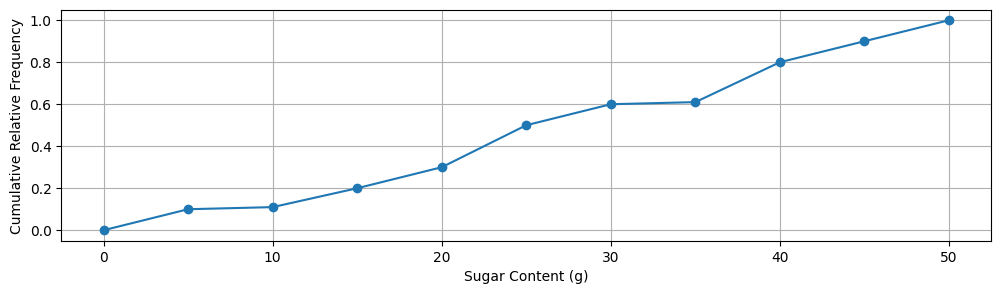

In [ ]:
def main(): 
    x = np.arange(0,55,5)
    y = [0,0.1,0.11,0.2,0.3,0.5,0.6,0.61,0.8,0.9,1.0]

    fig, ax = plt.subplots(figsize=(12,3))
    ax.plot(x, y, '-o')
    ax.set_xlabel("Sugar Content (g)")
    ax.set_ylabel("Cumulative Relative Frequency")
    ax.grid()
    plt.show()

if __name__ == "__main__":
    main()

######**Solution**

(a) 20%

(b) 25

(c) $Q_1\approx 18$, $Q_3\approx 39$, $\text{IQR}=Q_3-Q_1\approx 21$

#####**Code - Percentile : stats.scoreatpercentile [doc](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.scoreatpercentile.html)**

In [ ]:
def main():
    data = [1,2,3,4,5,6,7,8,9,10]
    for i in range(10,110,10):
        print(f"{stats.scoreatpercentile(data, i) = :4.1f} when {i = :3}") 

if __name__ == "__main__":
    main()

stats.scoreatpercentile(data, i) =  1.9 when i =  10
stats.scoreatpercentile(data, i) =  2.8 when i =  20
stats.scoreatpercentile(data, i) =  3.7 when i =  30
stats.scoreatpercentile(data, i) =  4.6 when i =  40
stats.scoreatpercentile(data, i) =  5.5 when i =  50
stats.scoreatpercentile(data, i) =  6.4 when i =  60
stats.scoreatpercentile(data, i) =  7.3 when i =  70
stats.scoreatpercentile(data, i) =  8.2 when i =  80
stats.scoreatpercentile(data, i) =  9.1 when i =  90
stats.scoreatpercentile(data, i) = 10.0 when i = 100


####**Section 5 Five Number Summary, Box Plot, and Outlier [eng](https://www.youtube.com/watch?v=tpToLyZibKM&list=PL0KQuRyPJoe6KjlUM6iNYgt8d0DwI-IGR&index=7)**

#####**Five Number Summary**

$$
\text{Min}\quad Q_1\quad\text{Median}\quad Q_3\quad\text{Max}
$$

#####**Code - Five Number Summary : np.quantile**

Min    :  -2
Q_1    :  0.0
Median :  1.0
Q_3    :  2.0
Max    :  8


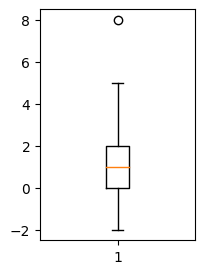

In [ ]:
def main():
    data = np.array([1,2,0,0,0,1,3,1,2,1,2,4,5,-1,-2,0,8])

    qs = {"Min":0,"Q_1":0.25,"Median":0.5,"Q_3":0.75,"Max":1}
    for title, q in qs.items():
        quantile = np.quantile(data, q=q)
        print(f"{title:6} : ", quantile)

    fig, ax = plt.subplots(figsize=(2,3))
    ax.boxplot(data)
    plt.show()

if __name__ == "__main__":
    main()

#####**Box Plot [doc](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.boxplot.html)**

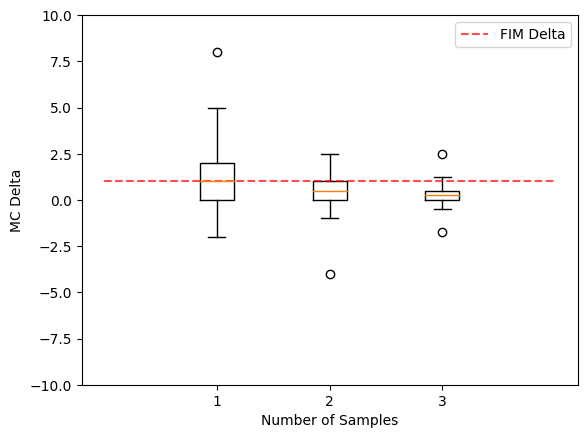

In [ ]:
def main():
    data_a = np.array([1,2,0,0,0,1,3,1,2,1,2,4,5,-1,-2,0,8])
    data_b = np.array([1,2,0,0,0,1,3,1,2,1,2,4,5,-1,-2,0,-8]) * 0.5
    data_c = np.array([1,2,0,0,0,1,3,1,2,1,2,4,5,-1,-2,0,10,-7]) * 0.25

    fig, ax = plt.subplots()
    ax.boxplot([data_a, data_b, data_c])
    ax.plot([0,1,2,3,4],[1,1,1,1,1],label="FIM Delta",linestyle="--",color="r",alpha=0.7)
    ax.legend()
    ax.set_ylim(-10.0, 10.0)
    ax.set_xlabel('Number of Samples')
    ax.set_ylabel('MC Delta')
    plt.show()

if __name__ == "__main__":
    main()

#####**Outlier**

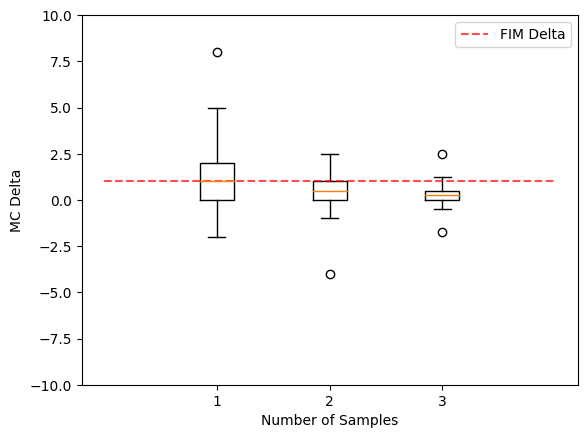

In [ ]:
def main():
    data_a = np.array([1,2,0,0,0,1,3,1,2,1,2,4,5,-1,-2,0,8])
    data_b = np.array([1,2,0,0,0,1,3,1,2,1,2,4,5,-1,-2,0,-8]) * 0.5
    data_c = np.array([1,2,0,0,0,1,3,1,2,1,2,4,5,-1,-2,0,10,-7]) * 0.25

    fig, ax = plt.subplots()
    ax.boxplot([data_a, data_b, data_c])
    ax.plot([0,1,2,3,4],[1,1,1,1,1],label="FIM Delta",linestyle="--",color="r",alpha=0.7)
    ax.legend()
    ax.set_ylim(-10.0, 10.0)
    ax.set_xlabel('Number of Samples')
    ax.set_ylabel('MC Delta')
    plt.show()

if __name__ == "__main__":
    main()

#####**Median is robust against outliers, Mean is not**

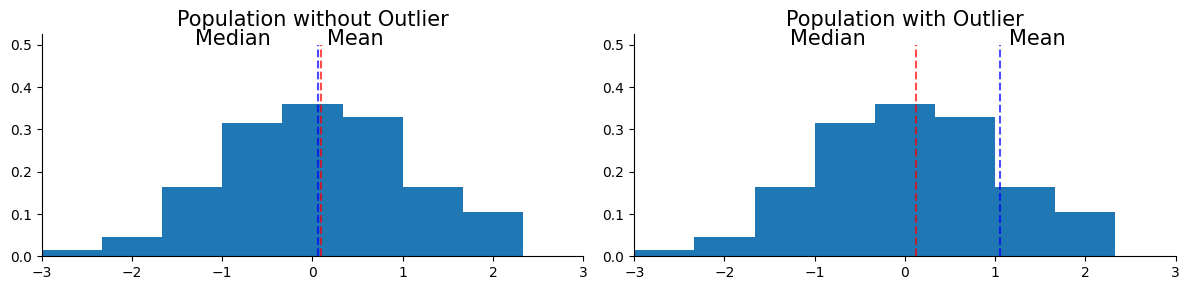

In [ ]:
def run(data, bins, title, ax):
    ax.hist(data, bins=bins, density=True)
    ax.set_title(title, fontsize=15)
    ax.vlines(data.mean(), ymin=0, ymax=0.5, alpha=0.7, color='b', ls='--')
    ax.vlines(np.median(data), ymin=0, ymax=0.5, alpha=0.7, color='r', ls='--')
    ax.annotate(text='Mean',
                xy=(data.mean()+0.1,0.5),
                xytext=(data.mean()+0.1,0.5),
                fontsize=15)
    ax.annotate(text='Median',
                xy=(np.median(data)-1.4,0.5),
                xytext=(np.median(data)-1.4,0.5),
                fontsize=15)
    ax.spines['right'].set_visible(False)
    ax.spines['top'].set_visible(False)
    ax.set_xlim(-3,3)

def main(): 
    np.random.seed(0)
    population_without_outliner = np.random.normal(size=(100,))
    population_with_outliner = np.concatenate( ( population_without_outliner, np.array([100]) ) )
    populations = {
        'Population without Outlier' : population_without_outliner,
        'Population with Outlier' : population_with_outliner
        }

    bins = np.linspace(-3,3,10)
    
    fig, axes = plt.subplots(1,2,figsize=(12,3))
    for ax, (title, data) in zip(axes,populations.items()):
        run(data, bins, title, ax)
    plt.tight_layout()
    plt.show()

    
if __name__ == "__main__":
    main()

####**Section 6 Symmetry and Skewness [eng](https://www.youtube.com/watch?v=pfujiA5Mk_U&list=PL0KQuRyPJoe6KjlUM6iNYgt8d0DwI-IGR&index=9)**

#####**Symmetry and Skewness**

$$\begin{array}{lllllllll}
\text{Left_Box}\ >\ \text{Right_Box}
&\Rightarrow&
\text{Skew to Left}\\ 
\text{Left_Box}\ <\ \text{Right_Box}
&\Rightarrow&
\text{Skew to Right}\\
\\ 
\text{Left_Box}\ =\ \text{Right_Box}
&\Rightarrow&
\text{Left_Whisker}\ >\ \text{Right_Whisker}
&\Rightarrow&
\text{Skew to Left}\\ 
\text{Left_Box}\ =\ \text{Right_Box}
&\Rightarrow&
\text{Left_Whisker}\ <\ \text{Right_Whisker}
&\Rightarrow&
\text{Skew to Reft}\\ 
\text{Left_Box}\ =\ \text{Right_Box}
&\Rightarrow&
\text{Left_Whisker}\ =\ \text{Right_Whisker}
&\Rightarrow&
\text{Symmetric}\\ 
\end{array}$$

#####**Code : Right Skew Distribution - Right Box is Large**

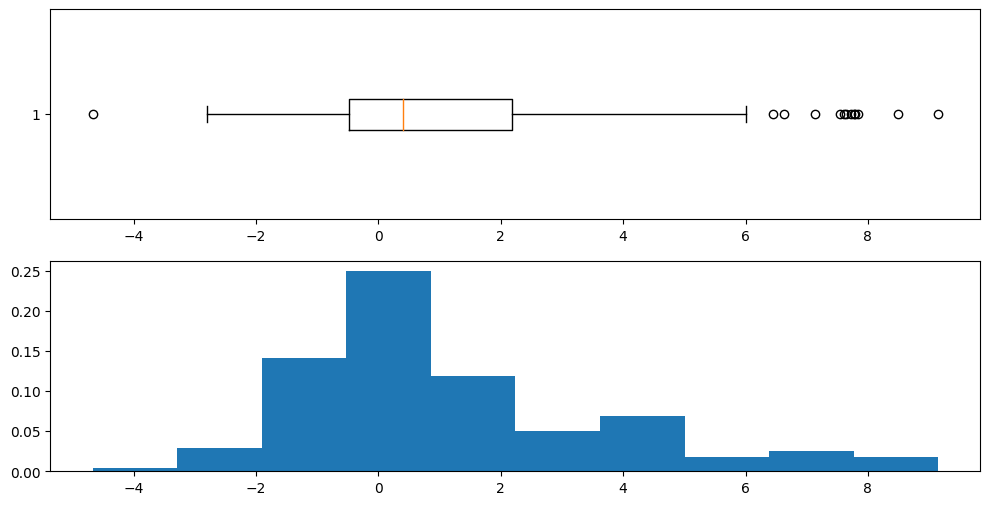

In [ ]:
def main():
    np.random.seed(0) # 16
    major_data = stats.norm().rvs(size=(100,))
    minor_data = stats.norm(loc=2,scale=3).rvs(size=(100,))
    data = np.concatenate( ( major_data, minor_data ) )

    fig, (ax0, ax1) = plt.subplots(2,1,figsize=(12,6))
    ax0.boxplot(data, vert=False)
    ax1.hist(data, density=True)
    plt.show()

if __name__ == "__main__":
    main()

#####**Code : Right Skew Distribution - Boxes are about same, but Right Whisker is Large**

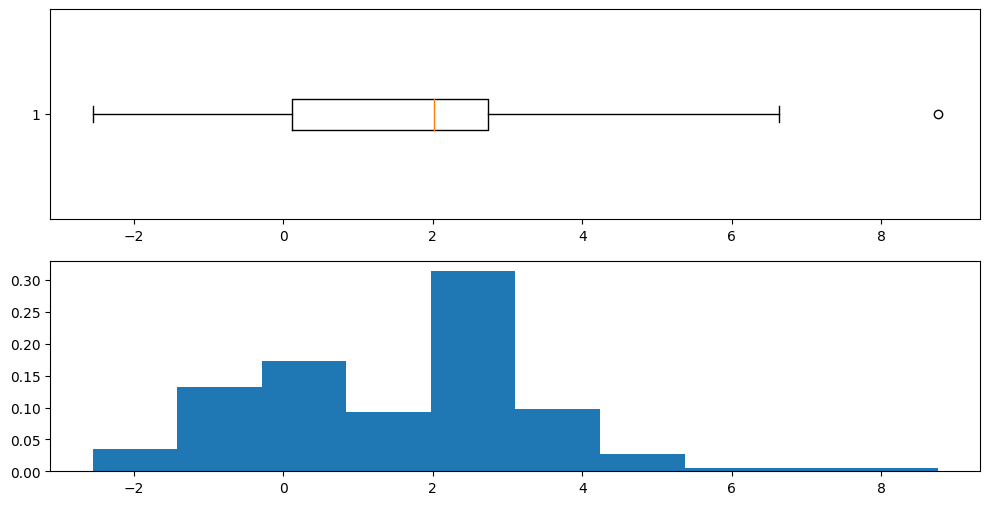

In [ ]:
def main():
    np.random.seed(0) # 16
    major_data = stats.norm().rvs(size=(100,))
    minor_data = stats.expon(scale=1).rvs(size=(100,)) + 2
    data = np.concatenate( ( major_data, minor_data ) )

    fig, (ax0, ax1) = plt.subplots(2,1,figsize=(12,6))
    ax0.boxplot(data, vert=False)
    ax1.hist(data, density=True)
    plt.show()

if __name__ == "__main__":
    main()

$$
\text{Min}\quad Q_1\quad\text{Median}\quad Q_3\quad\text{Max}
$$

#####**Code : Symmetric Distribution - Boxes are about same, and Whisker are also about same**

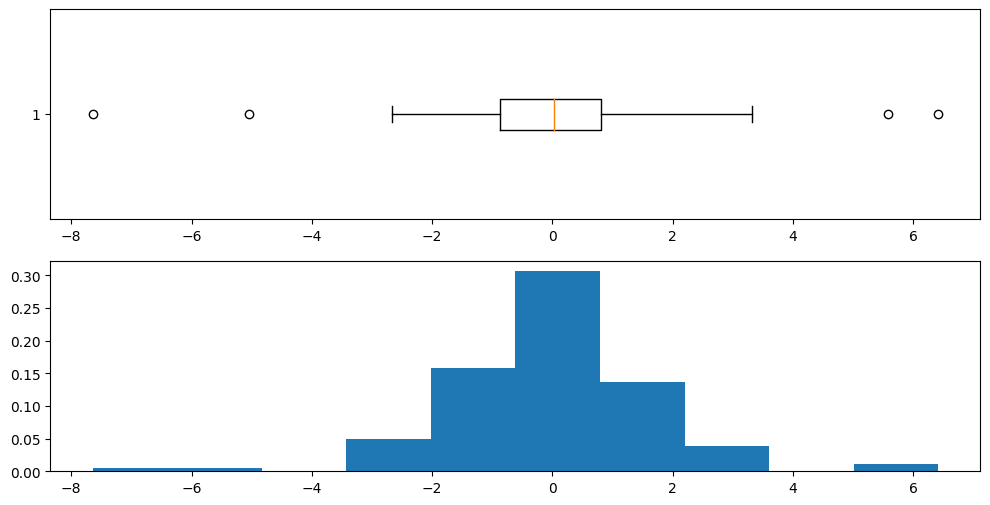

In [ ]:
def main():
    np.random.seed(61)
    major_data = stats.norm().rvs(size=(100,))
    minor_data = stats.norm(loc=1,scale=3).rvs(size=(30,))
    data = np.concatenate( ( major_data, minor_data ) )

    fig, (ax0, ax1) = plt.subplots(2,1,figsize=(12,6))
    ax0.boxplot(data, vert=False)
    ax1.hist(data, density=True)
    plt.show()

if __name__ == "__main__":
    main()

$$
\text{Min}\quad Q_1\quad\text{Median}\quad Q_3\quad\text{Max}
$$

### **Chapter 7 Normal Approximation**

###### 68–95–99.7 rule

72.69
94.998
98.662


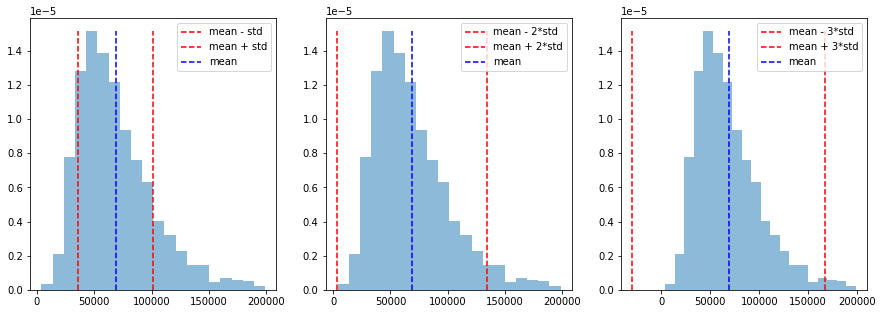

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from scipy import stats

# data
url = 'https://raw.githubusercontent.com/gedeck/practical-statistics-for-data-scientists/master/data/loans_income.csv'
df = pd.read_csv(url)
mean = df.x.mean()
std = df.x.std()
n = len(df.x)
n1 = len(df.x[(mean-std<df.x) & (df.x<mean+std)])
n2 = len(df.x[(mean-2*std<df.x) & (df.x<mean+2*std)])
n3 = len(df.x[(mean-3*std<df.x) & (df.x<mean+3*std)])
print(n1/n*100) # 68
print(n2/n*100) # 95
print(n3/n*100) # 99.7

# histogram and box plot 
# long right hand tail
# meadin < mean
# if data is not symmetric, meadian is better to locate the center of data
fig, (ax0, ax1, ax2) = plt.subplots(1,3,figsize=(15,5))
n, *_ = ax0.hist(df.x,bins=20,density=True,alpha=0.5)
ax0.plot([mean-std,mean-std],[0,n.max()],'--r',label='mean - std') # mean - std
ax0.plot([mean+std,mean+std],[0,n.max()],'--r',label='mean + std') # mean + std
n, *_ = ax1.hist(df.x,bins=20,density=True,alpha=0.5)
ax1.plot([mean-2*std,mean-2*std],[0,n.max()],'--r',label='mean - 2*std') # mean - 2*std
ax1.plot([mean+2*std,mean+2*std],[0,n.max()],'--r',label='mean + 2*std') # mean + 2*std
n, *_ = ax2.hist(df.x,bins=20,density=True,alpha=0.5)
ax2.plot([mean-3*std,mean-3*std],[0,n.max()],'--r',label='mean - 3*std') # mean - 3*std
ax2.plot([mean+3*std,mean+3*std],[0,n.max()],'--r',label='mean + 3*std') # mean + 3*std
for ax in (ax0, ax1, ax2):
    ax.plot([mean,mean],[0,n.max()],'--b',label='mean') # mean
    ax.legend(loc='upper right')
plt.show()

###### normal approximation

male height

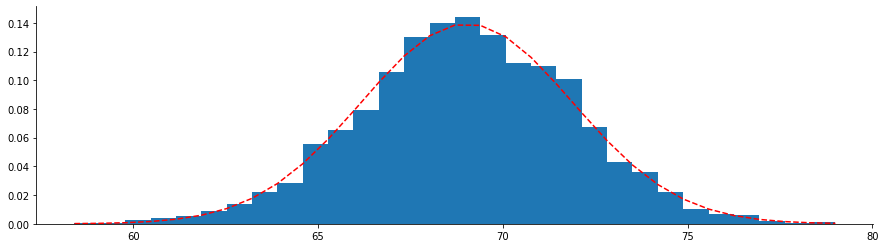

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

# load data
url = "https://raw.githubusercontent.com/beccadsouza/Machine-Learning-Python/master/Datasets/height-weight.csv"
df = pd.read_csv(url)
df = df[df.Gender=="Male"]

# compute basic statistics
mean_height = df.Height.mean()
mean_weight = df.Weight.mean() 
std_height = df.Height.std()
std_weight = df.Weight.std() 
r = df.corr().loc["Height","Weight"]

# histogram and normal approximation    
fig, ax = plt.subplots(figsize=(15,4))
_, bins, _ = ax.hist(df.Height,bins=30,density=True)
pdf = stats.norm(loc=mean_height,scale=std_height).pdf(bins)
ax.plot(bins,pdf,'--r')
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
plt.show()

Exercise. Plot the histogram and normal approximation of female height.

male weight

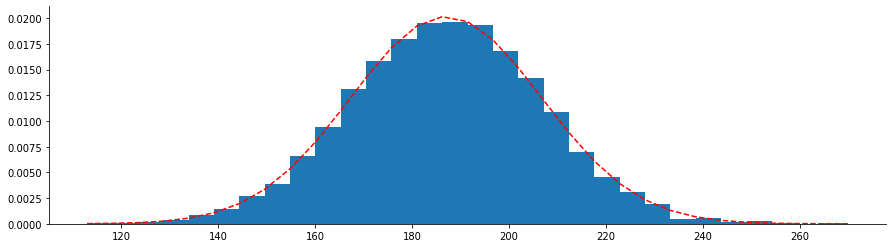

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

# load data
url = "https://raw.githubusercontent.com/beccadsouza/Machine-Learning-Python/master/Datasets/height-weight.csv"
df = pd.read_csv(url)
df = df[df.Gender=="Male"]

# compute basic statistics
mean_height = df.Height.mean()
mean_weight = df.Weight.mean() 
std_height = df.Height.std()
std_weight = df.Weight.std() 
r = df.corr().loc["Height","Weight"]

# histogram and normal approximation   
fig, ax = plt.subplots(figsize=(15,4))
_, bins, _ = ax.hist(df.Weight,bins=30,density=True)
pdf = stats.norm(loc=mean_weight,scale=std_weight).pdf(bins)
ax.plot(bins,pdf,'--r')
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
plt.show()

Exercise. Plot the histogram and normal approximation of female weight.

loans_income

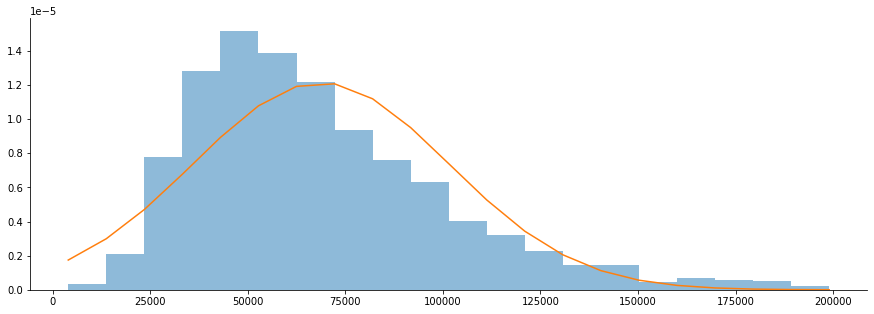

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd
from scipy import stats

# data
url = 'https://raw.githubusercontent.com/gedeck/practical-statistics-for-data-scientists/master/data/loans_income.csv'
df = pd.read_csv(url)
mean = df.x.mean()
std = df.x.std()

# histogram and normal approximation
fig, ax = plt.subplots(figsize=(15,5))
_, bins, _ = ax.hist(df.x,bins=20,density=True,alpha=0.5)
pdf = stats.norm(loc=mean,scale=std).pdf(bins)
ax.plot(bins,pdf)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
plt.show()

Exercise. Discuss why the normal approximation of loan income is not good.

###### area under standard normal curve

left area

0.11506967022170822


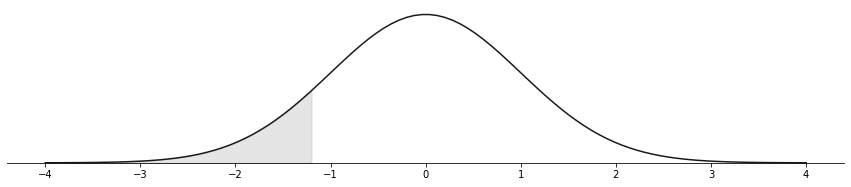

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
from scipy import stats

def plot_normal_curve_left(z,ax):
    x = np.linspace(-4,4,100)
    y = stats.norm().pdf(x)
    ax.plot(x,y,color='k',alpha=0.9)
    x = np.linspace(-4,z,100)
    y = stats.norm().pdf(x)
    ax.fill_between(x,y,color='k',alpha=0.1)
    ax.spines['left'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.spines['top'].set_visible(False)
    ax.spines['bottom'].set_position("zero")
    ax.set_yticks(())

z = -1.2
print(stats.norm().cdf(z))

fig, ax = plt.subplots(figsize=(15,3))
plot_normal_curve_left(z,ax)
plt.show()

right area

0.11506967022170822


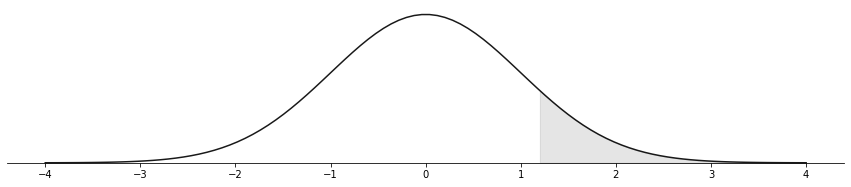

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
from scipy import stats

def plot_normal_curve_right(z,ax):
    x = np.linspace(-4,4,100)
    y = stats.norm().pdf(x)
    ax.plot(x,y,color='k',alpha=0.9)
    x = np.linspace(z,4,100)
    y = stats.norm().pdf(x)
    ax.fill_between(x,y,color='k',alpha=0.1)
    ax.spines['left'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.spines['top'].set_visible(False)
    ax.spines['bottom'].set_position("zero")
    ax.set_yticks(())

z = 1.2
print(stats.norm().sf(z))

fig, ax = plt.subplots(figsize=(15,3))
plot_normal_curve_right(z,ax)
plt.show()

center area

0.8670659092154752


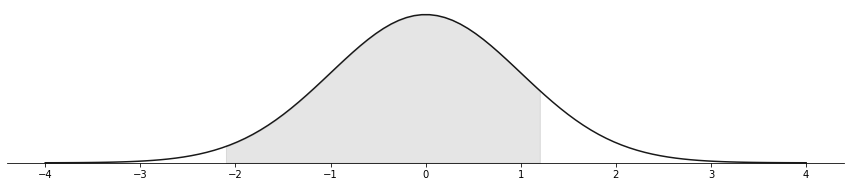

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
from scipy import stats

def plot_normal_curve_center(z1,z2,ax):
    x = np.linspace(-4,4,100)
    y = stats.norm().pdf(x)
    ax.plot(x,y,color='k',alpha=0.9)
    x = np.linspace(z1,z2,100)
    y = stats.norm().pdf(x)
    ax.fill_between(x,y,color='k',alpha=0.1)
    ax.spines['left'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.spines['top'].set_visible(False)
    ax.spines['bottom'].set_position("zero")
    ax.set_yticks(())

z1 = -2.1
z2 = 1.2
print(stats.norm().cdf(z2) - stats.norm().cdf(z1))

fig, ax = plt.subplots(figsize=(15,3))
plot_normal_curve_center(z1,z2,ax)
plt.show()

# **PART V CORRELATION AND REGRESSION**


### **Chapter 8 Correlation**

#### **Section 1 Scatter Plot**

#####**Example - Height and Weight**

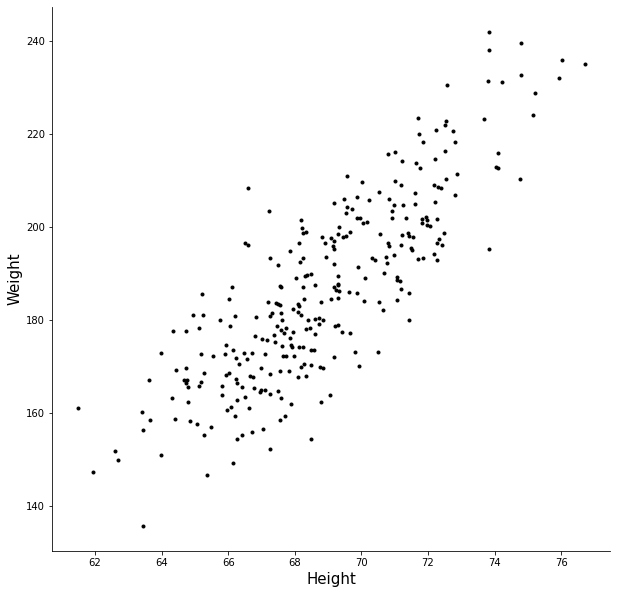

In [ ]:
def main():
    # load data
    url = "https://raw.githubusercontent.com/beccadsouza/Machine-Learning-Python/master/Datasets/height-weight.csv"
    df = pd.read_csv(url)
    df = df[df.Gender=="Male"][:300]

    # plot scater plot of data points     
    fig, ax = plt.subplots(figsize=(10,10))
    ax.plot(df.Height,df.Weight,'.k')
    ax.set_xlabel('Height',fontsize=15)
    ax.set_ylabel('Weight',fontsize=15)
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    plt.show()

if __name__ == "__main__":
    main()

#####**Example - Housing**

   longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
0    -122.23     37.88                41.0        880.0           129.0   
1    -122.22     37.86                21.0       7099.0          1106.0   
2    -122.24     37.85                52.0       1467.0           190.0   
3    -122.25     37.85                52.0       1274.0           235.0   
4    -122.25     37.85                52.0       1627.0           280.0   

   population  households  median_income  median_house_value ocean_proximity  
0       322.0       126.0         8.3252            452600.0        NEAR BAY  
1      2401.0      1138.0         8.3014            358500.0        NEAR BAY  
2       496.0       177.0         7.2574            352100.0        NEAR BAY  
3       558.0       219.0         5.6431            341300.0        NEAR BAY  
4       565.0       259.0         3.8462            342200.0        NEAR BAY  


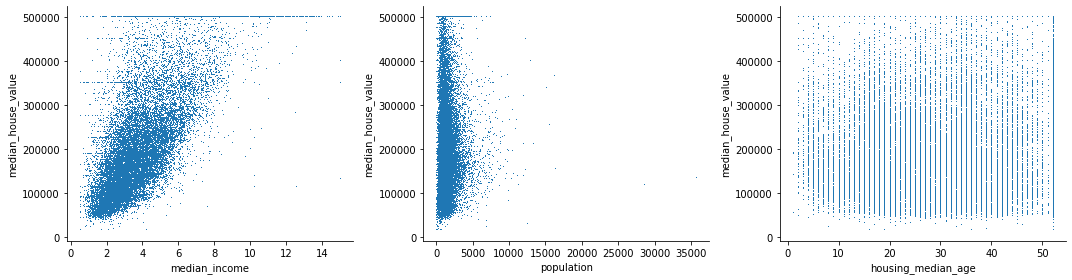

In [ ]:
import os
import tarfile
import urllib.request

DOWNLOAD_ROOT = "https://raw.githubusercontent.com/ageron/handson-ml2/master/"
HOUSING_PATH = os.path.join("datasets", "housing")
HOUSING_URL = DOWNLOAD_ROOT + "datasets/housing/housing.tgz"

def fetch_housing_data(housing_url=HOUSING_URL, housing_path=HOUSING_PATH):
    if not os.path.isdir(housing_path):
        os.makedirs(housing_path)
    tgz_path = os.path.join(housing_path, "housing.tgz")
    urllib.request.urlretrieve(housing_url, tgz_path)
    housing_tgz = tarfile.open(tgz_path)
    housing_tgz.extractall(path=housing_path)
    housing_tgz.close()

def load_housing_data(housing_path=HOUSING_PATH):
    csv_path = os.path.join(housing_path, "housing.csv")
    return pd.read_csv(csv_path)

def main():
    fetch_housing_data()
    df = load_housing_data()
    #print(df.head())

    # scatter plot
    fig, (ax0, ax1, ax2) = plt.subplots(1,3,figsize=(15,4))
    ax0.plot(df.median_income,df.median_house_value,',')
    ax0.set_xlabel("median_income")
    ax1.plot(df.population,df.median_house_value,',')
    ax1.set_xlabel("population")
    ax2.plot(df.housing_median_age,df.median_house_value,',')
    ax2.set_xlabel("housing_median_age")
    for ax in (ax0, ax1, ax2):
        ax.set_ylabel("median_house_value")
        ax.spines['top'].set_visible(False)
        ax.spines['right'].set_visible(False)
    plt.tight_layout()
    plt.show()

if __name__ == "__main__":
    main()

#####**Example - Demographic Scatter Plot**

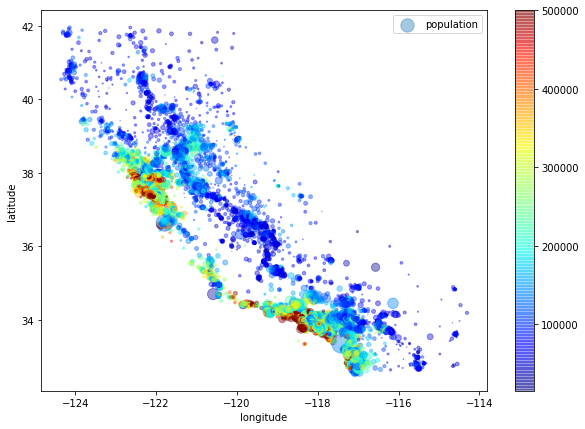

In [ ]:
import os
import tarfile
import urllib.request

DOWNLOAD_ROOT = "https://raw.githubusercontent.com/ageron/handson-ml2/master/"
HOUSING_PATH = os.path.join("datasets", "housing")
HOUSING_URL = DOWNLOAD_ROOT + "datasets/housing/housing.tgz"

def fetch_housing_data(housing_url=HOUSING_URL, housing_path=HOUSING_PATH):
    if not os.path.isdir(housing_path):
        os.makedirs(housing_path)
    tgz_path = os.path.join(housing_path, "housing.tgz")
    urllib.request.urlretrieve(housing_url, tgz_path)
    housing_tgz = tarfile.open(tgz_path)
    housing_tgz.extractall(path=housing_path)
    housing_tgz.close()

def load_housing_data(housing_path=HOUSING_PATH):
    csv_path = os.path.join(housing_path, "housing.csv")
    return pd.read_csv(csv_path)

def main():
    fetch_housing_data()
    df = load_housing_data()

    # demographic scatter plot
    df.plot(
        kind="scatter", 
        x="longitude", 
        y="latitude", 
        alpha=0.4,
        s=df["population"]/100, 
        label="population", 
        figsize=(10,7),
        c=df["median_house_value"], 
        cmap=plt.get_cmap("jet"), 
        colorbar=True,
        sharex=False)
    plt.legend()
    plt.show()

if __name__ == "__main__":
    main()

#### **Section 2 Pair plot**

#####**Example - Titanic**

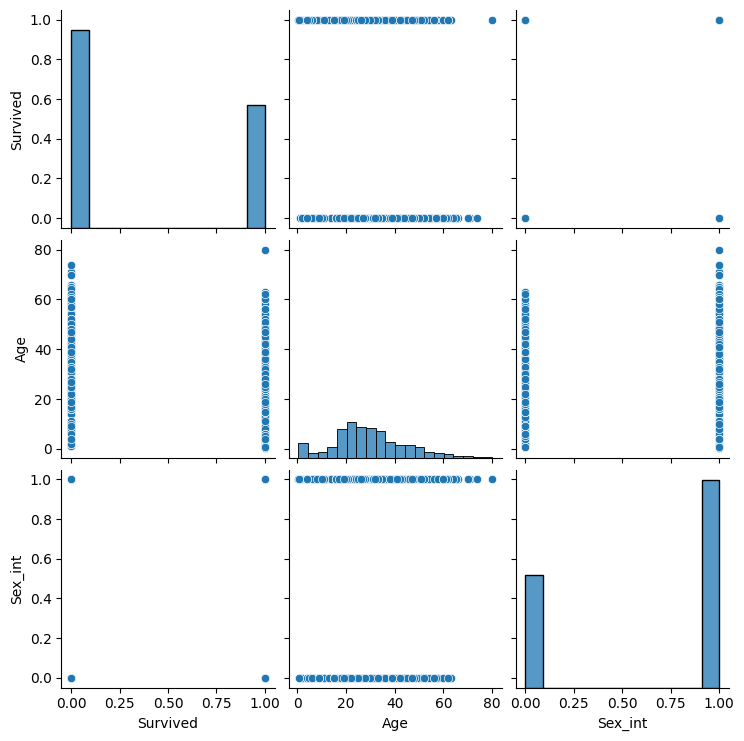

In [ ]:
import seaborn as sns

def main():
    # data
    url = "https://raw.githubusercontent.com/datasciencedojo/datasets/master/titanic.csv"
    df = pd.read_csv(url, index_col='PassengerId') # pandas dataframe
    # print(df)

    # pairplot
    df['Sex_int'] = df.Sex.apply(lambda x: 1 if x == 'male' else 0)
    sns.pairplot( df[["Survived","Age",'Sex_int']] )

if __name__ == "__main__":
    main()

###### mean, std, and corr

#####**Example - Housing**

In [ ]:
import matplotlib.pyplot as plt
import os
import pandas as pd
import tarfile
import urllib.request

DOWNLOAD_ROOT = "https://raw.githubusercontent.com/ageron/handson-ml2/master/"
HOUSING_PATH = os.path.join("datasets", "housing")
HOUSING_URL = DOWNLOAD_ROOT + "datasets/housing/housing.tgz"

def fetch_housing_data(housing_url=HOUSING_URL, housing_path=HOUSING_PATH):
    if not os.path.isdir(housing_path):
        os.makedirs(housing_path)
    tgz_path = os.path.join(housing_path, "housing.tgz")
    urllib.request.urlretrieve(housing_url, tgz_path)
    housing_tgz = tarfile.open(tgz_path)
    housing_tgz.extractall(path=housing_path)
    housing_tgz.close()

def load_housing_data(housing_path=HOUSING_PATH):
    csv_path = os.path.join(housing_path, "housing.csv")
    return pd.read_csv(csv_path)

fetch_housing_data()
df = load_housing_data()

mu_x = df.median_income.mean()
mu_y = df.median_house_value.mean()
sigma_x = df.median_income.std()
sigma_y = df.median_house_value.std()
rho = df[["median_income","median_house_value"]].corr().iloc[0,1]
print(mu_x, mu_y)
print(sigma_x, sigma_y)
print(rho)

3.8706710029069766 206855.81690891474
1.8998217179452688 115395.61587441387
0.6880752079585577


###### point of averages

#####**Example - Height and Weight**

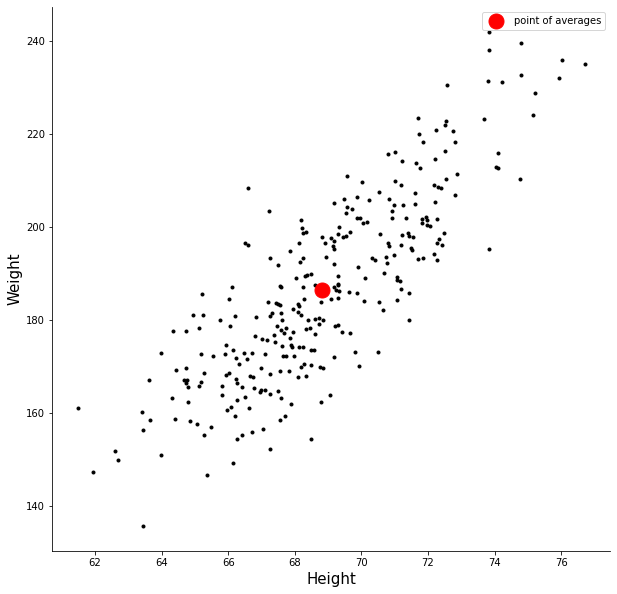

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

# load data
url = "https://raw.githubusercontent.com/beccadsouza/Machine-Learning-Python/master/Datasets/height-weight.csv"
df = pd.read_csv(url)
df = df[df.Gender=="Male"][:300]

# compute basic statistics
mean_height = df.Height.mean()
mean_weight = df.Weight.mean() 
std_height = df.Height.std()
std_weight = df.Weight.std() 
r = df.corr().loc["Height","Weight"]

# plot scater plot of data points     
fig, ax = plt.subplots(figsize=(10,10))
ax.plot(df.Height,df.Weight,'.k')
ax.plot([mean_height],[mean_weight],'ro',markersize=15,label="point of averages")
ax.set_xlabel('Height',fontsize=15)
ax.set_ylabel('Weight',fontsize=15)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.legend()
plt.show()

###### 2 SD band - x

#####**Example - Height and Weight**

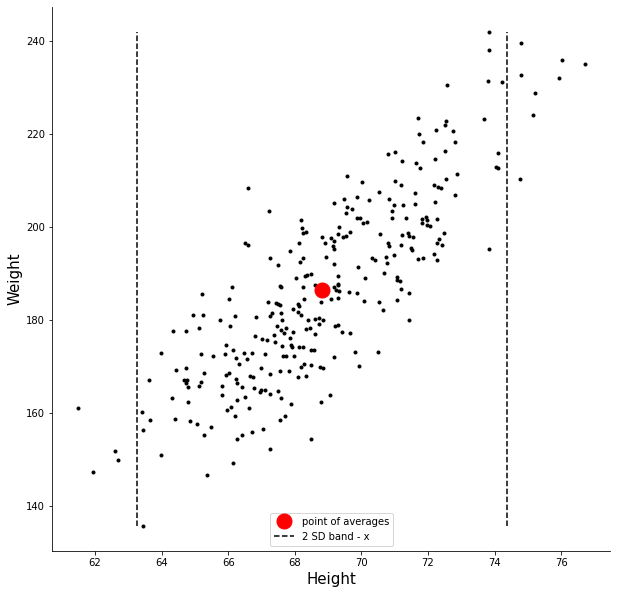

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

def draw_line(ax,start,end,linestyle,color='k',label=None):
    ax.plot(
        [start[0],end[0]],
        [start[1],end[1]],
        linestyle=linestyle,
        color=color,
        label=label
        )

# load data
url = "https://raw.githubusercontent.com/beccadsouza/Machine-Learning-Python/master/Datasets/height-weight.csv"
df = pd.read_csv(url)
df = df[df.Gender=="Male"][:300]

# compute basic statistics
mean_height = df.Height.mean()
mean_weight = df.Weight.mean() 
std_height = df.Height.std()
std_weight = df.Weight.std() 
r = df.corr().loc["Height","Weight"]

# plot scater plot of data points
# recall 68–95–99.7 rule     
fig, ax = plt.subplots(figsize=(10,10))
ax.plot(df.Height,df.Weight,'.k')
ax.plot([mean_height],[mean_weight],'ro',markersize=15,label="point of averages")
draw_line(
    ax,
    start=[mean_height-2*std_height,df.Weight.min()],
    end=[mean_height-2*std_height,df.Weight.max()],
    linestyle='--',
    color='k',
    label='2 SD band - x'
    )
draw_line(
    ax,
    start=[mean_height+2*std_height,df.Weight.min()],
    end=[mean_height+2*std_height,df.Weight.max()],
    linestyle='--',
    color='k'
    )
ax.set_xlabel('Height',fontsize=15)
ax.set_ylabel('Weight',fontsize=15)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.legend()
plt.show()

###### 2 SD band - y

#####**Example - Height and Weight**

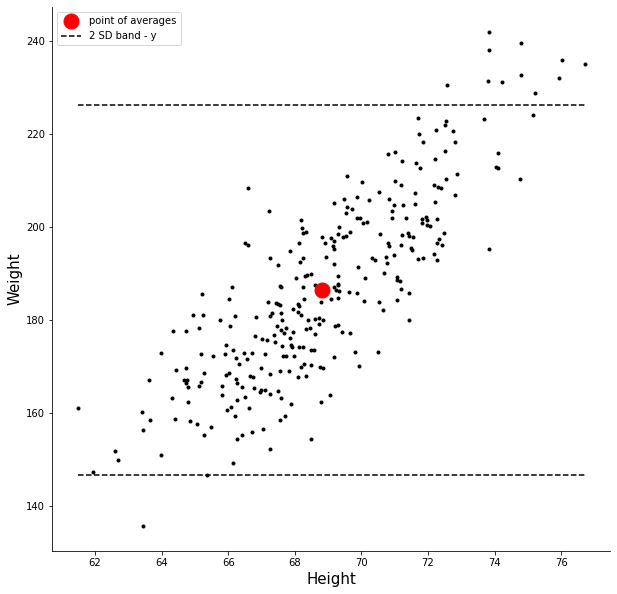

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

def draw_line(ax,start,end,linestyle,color='k',label=None):
    ax.plot(
        [start[0],end[0]],
        [start[1],end[1]],
        linestyle=linestyle,
        color=color,
        label=label
        )

# load data
url = "https://raw.githubusercontent.com/beccadsouza/Machine-Learning-Python/master/Datasets/height-weight.csv"
df = pd.read_csv(url)
df = df[df.Gender=="Male"][:300]

# compute basic statistics
mean_height = df.Height.mean()
mean_weight = df.Weight.mean() 
std_height = df.Height.std()
std_weight = df.Weight.std() 
r = df.corr().loc["Height","Weight"]

# plot scater plot of data points  
# recall 68–95–99.7 rule    
fig, ax = plt.subplots(figsize=(10,10))
ax.plot(df.Height,df.Weight,'.k')
ax.plot([mean_height],[mean_weight],'ro',markersize=15,label="point of averages")
draw_line(
    ax,
    start=[df.Height.min(),mean_weight-2*std_weight],
    end=[df.Height.max(),mean_weight-2*std_weight],
    linestyle='--',
    color='k',
    label='2 SD band - y'
    )
draw_line(
    ax,
    start=[df.Height.min(),mean_weight+2*std_weight],
    end=[df.Height.max(),mean_weight+2*std_weight],
    linestyle='--',
    color='k'
    )
ax.set_xlabel('Height',fontsize=15)
ax.set_ylabel('Weight',fontsize=15)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.legend()
plt.show()

###### SD line - positive SD line

#####**Example - Height and Weight**

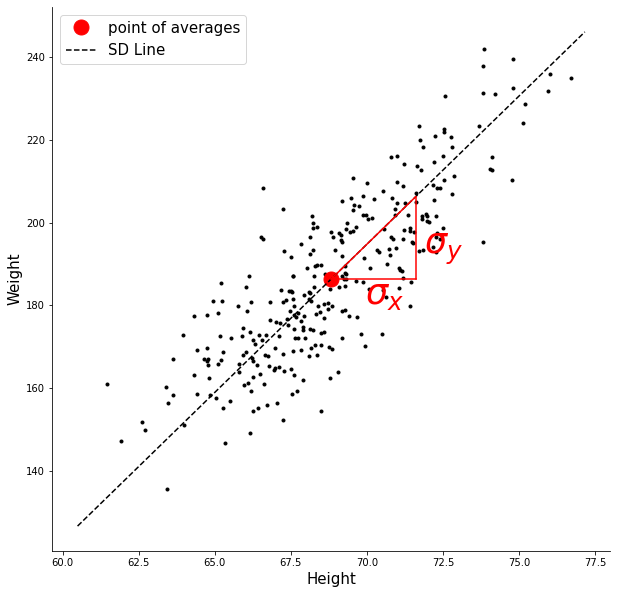

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

# load data
url = "https://raw.githubusercontent.com/beccadsouza/Machine-Learning-Python/master/Datasets/height-weight.csv"
df = pd.read_csv(url)
df = df[df.Gender=="Male"][:300]

# compute basic statistics
mean_height = df.Height.mean()
mean_weight = df.Weight.mean() 
std_height = df.Height.std()
std_weight = df.Weight.std() 
r = df.corr().loc["Height","Weight"]

def draw_line(ax,start,end,linestyle,color='k',label=None):
    ax.plot(
        [start[0],end[0]],
        [start[1],end[1]],
        linestyle=linestyle,
        color=color,
        label=label
        )

def annotate_text(ax,text,xy):
    ax.annotate(text,xy,**{"fontsize":35,"color":"red"})      

fig, ax = plt.subplots(figsize=(10,10))

# plot scater plot of data points
ax.plot(df.Height,df.Weight,'.k')

# plot point of averages
ax.plot([mean_height],[mean_weight],'ro',markersize=15,label="point of averages")

# draw SD Line
draw_line(
    ax,
    start=[mean_height-3*std_height,mean_weight-3*std_weight],
    end=[mean_height+3*std_height,mean_weight+3*std_weight],
    linestyle="--",
    label="SD Line"
    )

# draw line from center to center+(std_height,0)
draw_line(
    ax,
    start=[mean_height,mean_weight],
    end=[mean_height+std_height,mean_weight],
    linestyle="-",
    color='r'
    )

# draw line from center+(std_height,0) to center+(std_height,std_weight)
draw_line(
    ax,
    start=[mean_height+std_height,mean_weight],
    end=[mean_height+std_height,mean_weight+std_weight],
    linestyle="-",
    color='r'
    )

# draw line from center to center+(std_height,std_weight)
draw_line(
    ax,
    start=[mean_height,mean_weight],
    end=[mean_height+std_height,mean_weight+std_weight],
    linestyle="-",
    color='r'
    )

# annotate text $\sigma_x$
annotate_text(
    ax,
    "$\sigma_x$",
    [mean_height+0.4*std_height,mean_weight-0.3*std_weight]
    )

# annotate text $\sigma_y$
annotate_text(
    ax,
    "$\sigma_y$",
    [mean_height+1.1*std_height,mean_weight+0.3*std_weight]
    )

ax.legend(fontsize=15)
ax.set_xlabel('Height',fontsize=15)
ax.set_ylabel('Weight',fontsize=15)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
plt.show()

###### SD line - negative SD line

#####**Example - Height and Weight**

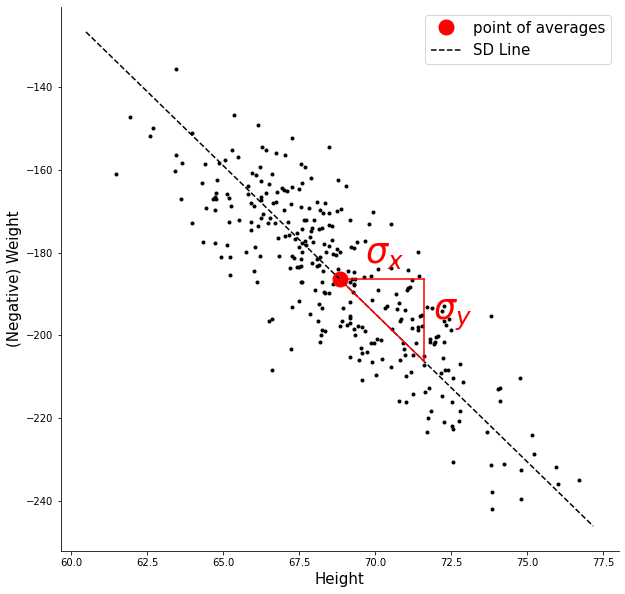

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

# load data
url = "https://raw.githubusercontent.com/beccadsouza/Machine-Learning-Python/master/Datasets/height-weight.csv"
df = pd.read_csv(url)
df = df[df.Gender=="Male"][:300]
df.Weight = - df.Weight

# compute basic statistics
mean_height = df.Height.mean()
mean_weight = df.Weight.mean() 
std_height = df.Height.std()
std_weight = df.Weight.std() 
r = df.corr().loc["Height","Weight"]

def draw_line(ax,start,end,linestyle,color='k',label=None):
    ax.plot(
        [start[0],end[0]],
        [start[1],end[1]],
        linestyle=linestyle,
        color=color,
        label=label
        )

def annotate_text(ax,text,xy):
    ax.annotate(text,xy,**{"fontsize":35,"color":"red"})      

fig, ax = plt.subplots(figsize=(10,10))

# plot scater plot of data points
ax.plot(df.Height,df.Weight,'.k')

# plot point of averages
ax.plot([mean_height],[mean_weight],'ro',markersize=15,label="point of averages")

# draw SD Line
draw_line(
    ax,
    start=[mean_height-3*std_height,mean_weight+3*std_weight],
    end=[mean_height+3*std_height,mean_weight-3*std_weight],
    linestyle="--",
    label="SD Line"
    )

# draw line from center to center+(std_height,0)
draw_line(
    ax,
    start=[mean_height,mean_weight],
    end=[mean_height+std_height,mean_weight],
    linestyle="-",
    color='r'
    )

# draw line from center+(std_height,0) to center+(std_height,-std_weight)
draw_line(
    ax,
    start=[mean_height+std_height,mean_weight],
    end=[mean_height+std_height,mean_weight-std_weight],
    linestyle="-",
    color='r'
    )

# draw line from center to center+(std_height,-std_weight)
draw_line(
    ax,
    start=[mean_height,mean_weight],
    end=[mean_height+std_height,mean_weight-std_weight],
    linestyle="-",
    color='r'
    )

# annotate text $\sigma_x$
annotate_text(
    ax,
    "$\sigma_x$",
    [mean_height+0.3*std_height,mean_weight+0.2*std_weight]
    )

# annotate text $\sigma_y$
annotate_text(
    ax,
    "$\sigma_y$",
    [mean_height+1.1*std_height,mean_weight-0.5*std_weight]
    )

ax.legend(fontsize=15)
ax.set_xlabel('Height',fontsize=15)
ax.set_ylabel('(Negative) Weight',fontsize=15)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
plt.show()

###### positive and negative correlations

positive correlations

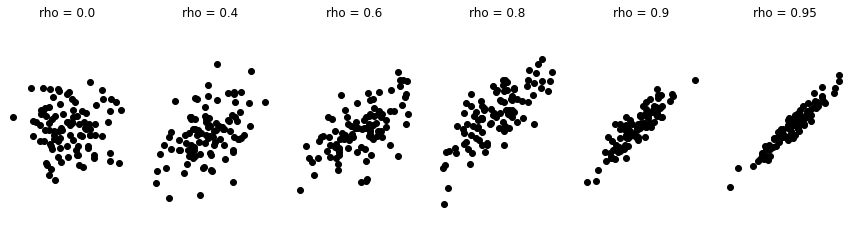

In [ ]:
import matplotlib.pyplot as plt
import numpy as np; np.random.seed(0)
from scipy import stats

samples = lambda mu_1, mu_2, sigma_1, sigma_2, rho, n: stats.multivariate_normal(
    [mu_1, mu_2],
    [[sigma_1, rho*sigma_1*sigma_2],[rho*sigma_1*sigma_2, sigma_2]]
    ).rvs(size=n)

fig, axes = plt.subplots(1,6,figsize=(15,4)) 

for ax, rho in zip(axes,(0.00,0.40,0.60,0.80,0.90,0.95)):
    xy = samples(mu_1=0, mu_2=0, sigma_1=1, sigma_2=1, rho=rho, n=100) # (2,100)
    ax.plot(xy[:,0],xy[:,1],'ok')
    ax.set_title('rho = {}'.format(rho))
    ax.axis('off')
    ax.axis('equal')
    for location in ('left','right','top','bottom'):
        ax.spines[location].set_visible(False)

plt.show()

negative correlations

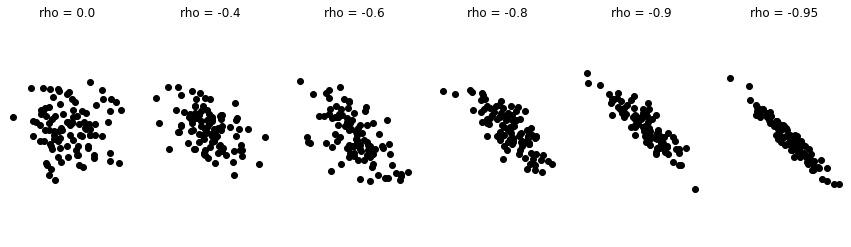

In [ ]:
import matplotlib.pyplot as plt
import numpy as np; np.random.seed(0)
from scipy import stats

samples = lambda mu_1, mu_2, sigma_1, sigma_2, rho, n: stats.multivariate_normal(
    [mu_1, mu_2],
    [[sigma_1, rho*sigma_1*sigma_2],[rho*sigma_1*sigma_2, sigma_2]]
    ).rvs(size=n)

fig, axes = plt.subplots(1,6,figsize=(15,4)) 

for ax, rho in zip(axes,(0.00,-0.40,-0.60,-0.80,-0.90,-0.95)):
    xy = samples(mu_1=0, mu_2=0, sigma_1=1, sigma_2=1, rho=rho, n=100) # (2,100)
    ax.plot(xy[:,0],xy[:,1],'ok')
    ax.set_title('rho = {}'.format(rho))
    ax.axis('off')
    ax.axis('equal')
    for location in ('left','right','top','bottom'):
        ax.spines[location].set_visible(False)

plt.show()

###### correlation

definition and estimation of correlation

$$
\rho=\frac{Cov(X,Y)}{\sqrt{Var(X)}\sqrt{Var(Y)}}
$$
where
$$\begin{array}{lll}
\mathbb{E}X&\approx&\bar{X}=\displaystyle\frac{\sum_{i=1}^nX_i}{n}\\
\mathbb{E}Y&\approx&\bar{Y}=\displaystyle\frac{\sum_{i=1}^nY_i}{n}\\
Var(X)&\approx&S_X^2=\displaystyle\frac{\sum_{i=1}^n\left(X_i-\bar{X}\right)^2}{n-1}\\
Var(Y)&\approx&S_Y^2=\displaystyle\frac{\sum_{i=1}^n\left(Y_i-\bar{Y}\right)^2}{n-1}\\
Cov(X,Y)&\approx&S_{X,Y}=\displaystyle\frac{\sum_{i=1}^n\left(X_i-\bar{X}\right)\left(Y_i-\bar{Y}\right)}{n-1}\\
\end{array}$$

properties of correlation

$$\begin{array}{lll}
(1)&&\rho_{Y,X}=\rho_{X,Y}\\
(2)&&\rho_{X+a,Y}=\rho_{X,Y}\\
&&\rho_{X,Y+a}=\rho_{X,Y}\\
(3)&&\rho_{aX,Y}=\rho_{X,Y}\quad\text{for $a>0$}\\
&&\rho_{X,aY}=\rho_{X,Y}\quad\text{for $a>0$}\\
\end{array}$$

###### ecological correlations tend to overstate the strength of an association



<img src="https://sphweb.bumc.bu.edu/otlt/MPH-Modules/PH717-QuantCore/PH717-Module1B-DescriptiveStudies_and_Statistics/Ecological1.png">

<img src="https://sphweb.bumc.bu.edu/otlt/MPH-Modules/PH717-QuantCore/PH717-Module1B-DescriptiveStudies_and_Statistics/Ecological2.png">

Sorce [Ecological Studies (Correlational Studies)](https://sphweb.bumc.bu.edu/otlt/MPH-Modules/PH717-QuantCore/PH717-Module1B-DescriptiveStudies_and_Statistics/PH717-Module1B-DescriptiveStudies_and_Statistics6.html)

###### correlation measures linear association, not association in general

<img src="https://upload.wikimedia.org/wikipedia/commons/thumb/e/ec/Anscombe%27s_quartet_3.svg/600px-Anscombe%27s_quartet_3.svg.png">

Sorce [Correlations and non-linear relations](https://en.wikiversity.org/wiki/Survey_research_and_design_in_psychology/Tutorials/Correlation/Correlations_and_non-linear_relations)



###### correlation is not causation

<img src="https://miro.medium.com/max/1400/1*8j7U89RK1SgopIGET0mSFA.webp">

Source : [Correlation is not causation](https://towardsdatascience.com/correlation-is-not-causation-ae05d03c1f53)

### **Chapter 9 Linear Regression**

####**Section 1 Linear Regression**

#####**Linear Regression Line**

<ipython-input-27-c5fdaa517553>:31: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  r = df.corr().loc["Height","Weight"]


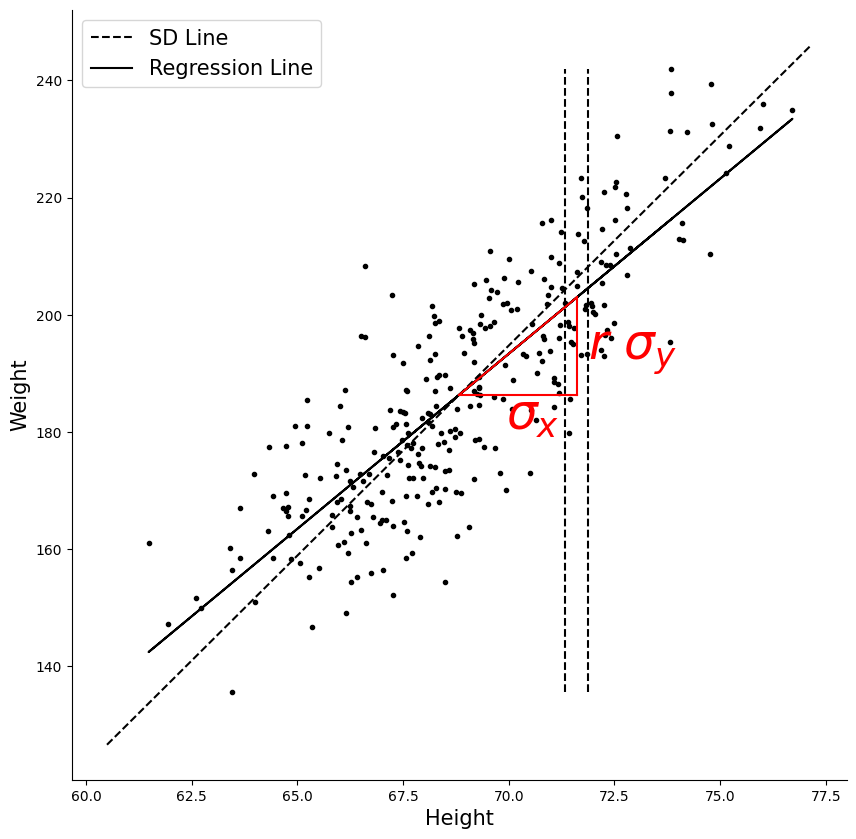

In [27]:
def main():
    # load data
    url = "https://raw.githubusercontent.com/beccadsouza/Machine-Learning-Python/master/Datasets/height-weight.csv"
    df = pd.read_csv(url)
    df = df[df.Gender=="Male"][:300]

    # compute basic statistics
    mean_height = df.Height.mean()
    mean_weight = df.Weight.mean() 
    std_height = df.Height.std()
    std_weight = df.Weight.std() 
    r = df.corr().loc["Height","Weight"]

    # compute y_pred using linear regression
    x = np.array( df.Height ) 
    y_pred = compute_regression_line_prediction(
        x,
        mean_height,
        mean_weight,
        std_height,
        std_weight,
        r
        )      

    fig, ax = plt.subplots(figsize=(10,10))

    # plot scater plot of data points
    ax.plot(df.Height,df.Weight,'.k')

    # draw SD Line
    draw_line(
        ax,
        start=[mean_height-3*std_height,mean_weight-3*std_weight],
        end=[mean_height+3*std_height,mean_weight+3*std_weight],
        linestyle="--",
        label="SD Line"
        )

    # draw vertical line at mean_height + 0.9 * std_height
    draw_line(
        ax,
        start=[mean_height+0.9*std_height,df.Weight.min()],
        end=[mean_height+0.9*std_height,df.Weight.max()],
        linestyle="--"
        )

    # draw vertical line at mean_height + 1.1 * std_height
    draw_line(
        ax,
        start=[mean_height+1.1*std_height,df.Weight.min()],
        end=[mean_height+1.1*std_height,df.Weight.max()],
        linestyle="--"
        )

    # draw Regression Line
    ax.plot(x,y_pred,'k',label="Regression Line")

    # draw line from center to center+(std_height,0)
    draw_line(
        ax,
        start=[mean_height,mean_weight],
        end=[mean_height+std_height,mean_weight],
        linestyle="-",
        color='r'
        )

    # draw line from center+(std_height,0) to center+(std_height,r*std_weight)
    draw_line(
        ax,
        start=[mean_height+std_height,mean_weight],
        end=[mean_height+std_height,mean_weight+r*std_weight],
        linestyle="-",
        color='r'
        )

    # draw line from center to center+(std_height,r*std_weight)
    draw_line(
        ax,
        start=[mean_height,mean_weight],
        end=[mean_height+std_height,mean_weight+r*std_weight],
        linestyle="-",
        color='r'
        )

    # annotate text $\sigma_x$
    annotate_text(
        ax,
        "$\sigma_x$",
        [mean_height+0.4*std_height,mean_weight-0.3*std_weight]
        )

    # annotate text $r\ \sigma_y$
    annotate_text(
        ax,
        "$r\ \sigma_y$",
        [mean_height+1.1*std_height,mean_weight+0.3*std_weight]
        )

    ax.legend(fontsize=15)
    ax.set_xlabel('Height',fontsize=15)
    ax.set_ylabel('Weight',fontsize=15)
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    plt.show()

if __name__ == "__main__":
    main()

Exercise. In a particular class, midterm scores average out to 60 with an SD of 15, 
whereas the final average is 90 with an SD of 20. 
The correlation between the two exam scores is about 0.60. 
Estimate the average final score for the students whose midterm scores were 
$$
\text{(a) 75}\quad
\text{(b) 30}\quad
\text{(c) 60}
$$

#####**Two Linear Regression Lines**

<ipython-input-28-c486102757b3>:12: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  r = df.corr().loc["Height","Weight"]


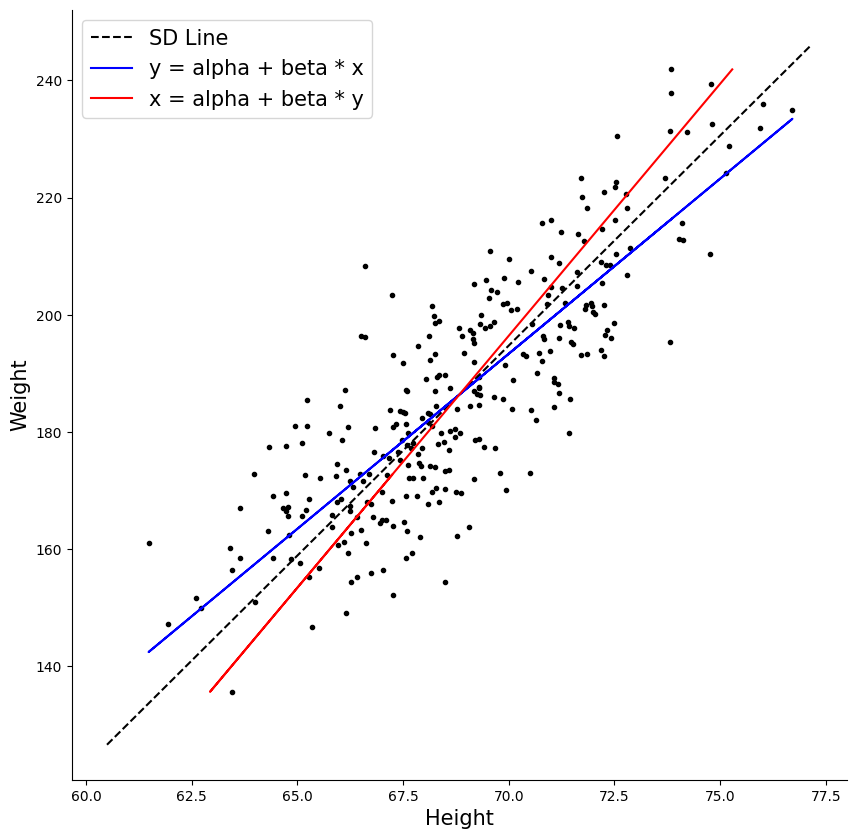

In [28]:
def main():
    # load data
    url = "https://raw.githubusercontent.com/beccadsouza/Machine-Learning-Python/master/Datasets/height-weight.csv"
    df = pd.read_csv(url)
    df = df[df.Gender=="Male"][:300]

    # compute basic statistics
    mean_height = df.Height.mean()
    mean_weight = df.Weight.mean() 
    std_height = df.Height.std()
    std_weight = df.Weight.std() 
    r = df.corr().loc["Height","Weight"]

    # compute y_pred using linear regression
    x = np.array( df.Height ) 
    y_pred = compute_regression_line_prediction(
        x,
        mean_height,
        mean_weight,
        std_height,
        std_weight,
        r
        ) 

    # compute x_pred using linear regression
    y = np.array( df.Weight ) 
    x_pred = compute_regression_line_prediction(
        y,
        mean_weight,
        mean_height,
        std_weight,
        std_height,    
        r
        )      

    fig, ax = plt.subplots(figsize=(10,10))

    # plot scater plot of data points
    ax.plot(df.Height,df.Weight,'.k')

    # draw SD Line
    draw_line(
        ax,
        start=[mean_height-3*std_height,mean_weight-3*std_weight],
        end=[mean_height+3*std_height,mean_weight+3*std_weight],
        linestyle="--",
        color="k",
        label="SD Line"
        )

    # draw Regression Line
    ax.plot(x,y_pred,'-b',label="y = alpha + beta * x")
    ax.plot(x_pred,y,'-r',label="x = alpha + beta * y")

    ax.legend(fontsize=15)
    ax.set_xlabel('Height',fontsize=15)
    ax.set_ylabel('Weight',fontsize=15)
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    plt.show()

if __name__ == "__main__":
    main()

#####**Residual Plot**

#####**Good Case**

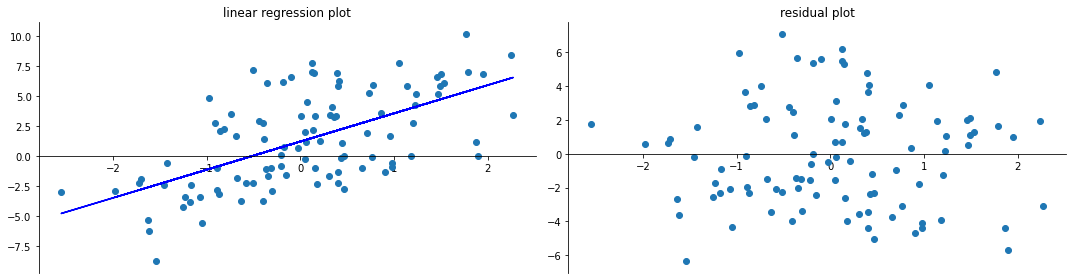

In [ ]:
def main():
    # data generation
    n = 100
    sigma = 3
    x = np.random.randn(n,1) # (100,1)
    y = 1 + 2 * x + sigma * np.random.randn(n,1) # (100,1)

    # construction of linear regression line
    x_bar = x.mean()
    y_bar = y.mean()
    s_x = x.std(ddof=n-1)
    s_y = y.std(ddof=n-1)
    r = np.corrcoef(np.concatenate([x,y], axis=1), rowvar=False)[1,0]
    beta_hat = r * s_y / s_x
    y_hat = beta_hat * (x - x_bar) + y_bar

    fig, (ax0, ax1) = plt.subplots(1,2,figsize=(15,4))
    ax0.plot(x,y,'o')
    ax0.plot(x,y_hat,'-b')
    ax0.set_title('linear regression plot')
    ax1.plot(x,y-y_hat,'o')
    ax1.set_title('residual plot')
    for ax in (ax0, ax1):
        ax.spines['top'].set_visible(False)
        ax.spines['right'].set_visible(False)
        ax.spines['bottom'].set_position("zero")
    plt.tight_layout()
    plt.show()

if __name__ == "__main__":
    main()

#####**Bad Case**

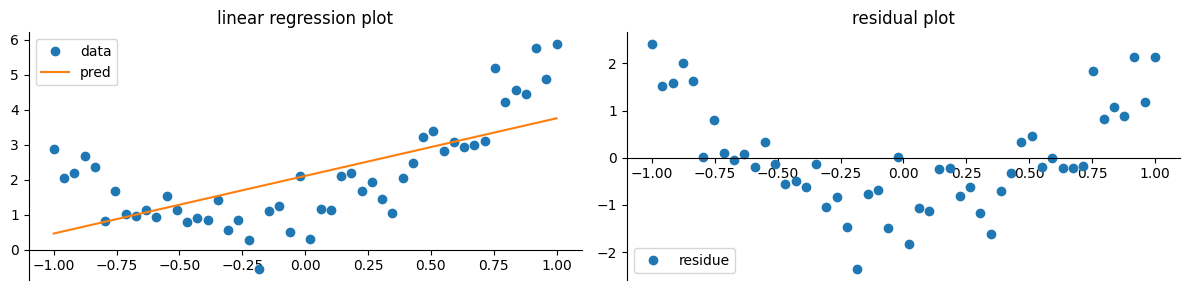

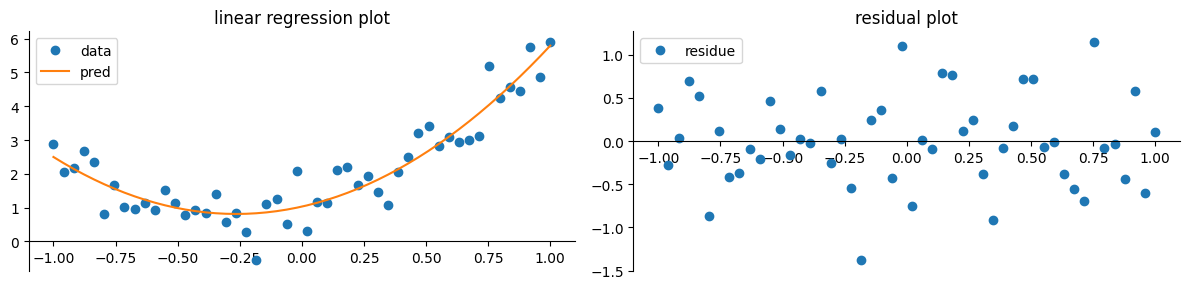

In [66]:
from sklearn.linear_model import LinearRegression

def draw_residual_plot(x,y,y_pred,residue):
    fig, (ax0, ax1) = plt.subplots(1,2,figsize=(12,3))
    ax0.plot(x,y,'o',label="data")
    ax0.plot(x,y_pred,label="pred")
    ax1.plot(x,residue,'o',label="residue")
    ax0.set_title('linear regression plot')
    ax1.set_title('residual plot')
    for ax in (ax0, ax1):
        ax.spines['top'].set_visible(False)
        ax.spines['right'].set_visible(False)
        ax.spines['bottom'].set_position("zero")
        ax.spines['right'].set_position("zero")
        ax.legend()
    plt.tight_layout()
    plt.show()

def main():
    seed = 0
    np.random.seed(seed)

    # data generation
    x = np.linspace(-1,1).reshape((-1,1)) # (50,1)
    noise = np.random.normal(0,1,size=x.shape) # (50,1)
    noise_level = 0.5
    y = (1 + 2*x + 3*x**2 + noise_level * noise).reshape((-1,))

    # construction of linear regression line
    model = LinearRegression()
    model.fit(x,y)
    y_pred = model.predict(x)
    residue = y - y_pred
    draw_residual_plot(x,y,y_pred,residue)

    x_2 = np.concatenate([x,x**2],axis=1)
    model_2 = LinearRegression()
    model_2.fit(x_2,y)
    y_pred_2 = model_2.predict(x_2)
    residue_2 = y - y_pred_2
    draw_residual_plot(x_2[:,0],y,y_pred_2,residue_2)

if __name__ == "__main__":
    main()

#####**When We use Linear Regression**

$$
\begin{array}{lcc}
&\text{linear regression plot}&\text{residual plot}\\\hline
\text{linear relation}&\text{no non-linear relation}&\text{no relation}\\
\sigma(x)&\text{independent to $x$}&\text{independent to $x$}\\
\end{array}
$$

#####**Linear Regression - Estimation of $\sigma^2$ [eng](https://www.khanacademy.org/math/ap-statistics/bivariate-data-ap/assessing-fit-least-squares-regression/v/standard-dev-residuals?modal=1)**

$$\displaystyle
s^2
=\hat{\sigma}^2 
=\frac{\sum_{i=1}^n(y_i-\hat{y}_i)^2}{n-2}
=\frac{\sum_{i=1}^n(y_i-(\hat{\alpha}+\hat{\beta} x_i))^2}{n-2}
$$

In [ ]:
def main():
    seed = 0
    np.random.seed(seed)

    # data generation
    n = 100
    sigma = 3
    x = np.random.randn(n,1) # (100,1)
    y = 1 + 2 * x + sigma * np.random.randn(n,1) # (100,1)

    # construction of linear regression line
    x_bar = x.mean()
    y_bar = y.mean()
    s_x = x.std(ddof=n-1)
    s_y = y.std(ddof=n-1)
    r = np.corrcoef(np.concatenate([x,y], axis=1), rowvar=False)[1,0]
    beta_hat = r * s_y / s_x
    y_hat = beta_hat * (x - x_bar) + y_bar

    # compute s_square
    s_square = np.sum( (y - y_hat)**2 ) / ( n - 2 )
    s = np.sqrt(s_square)
    print("sigma square : {}".format( sigma**2 ))
    print("s square     : {}".format( s_square ))

if __name__ == "__main__":
    main()

sigma square : 9
s square     : 9.70872110991394


####**Section 2 How to do Linear Regression**

#####**Linear Regression : Gradient Descent**

$$\begin{array}{lll}
\displaystyle l=\frac{1}{n}\sum_{i=1}^n\left((\alpha+\beta x_i)-y_i\right)^2
\end{array}$$

Minimize $l$ using gradient descent

$$
\theta \leftarrow \theta - \lambda \nabla l
$$

Set gradient zero

$$\begin{array}{lll}
\displaystyle \frac{\partial l}{\partial\alpha}=\frac{2}{n}\sum_{i=1}^n\left((\alpha+\beta x_i)-y_i\right)=0
&\Rightarrow&\displaystyle
2\alpha+2\beta\bar{x}-2\bar{y}=0\\
\displaystyle \frac{\partial l}{\partial\beta}=\frac{2}{n}\sum_{i=1}^n\left((\alpha+\beta x_i)-y_i\right)x_i=0
&\Rightarrow&\displaystyle
2\alpha\bar{x}+2\beta\bar{x^2}-2\bar{xy}=0
\end{array}$$

Solution

$$\begin{array}{lll}
\displaystyle 
\beta
&=&\displaystyle 
\frac{\bar{xy}-\bar{x}\bar{y}}{\bar{x^2}-(\bar{x})^2}
=\frac{Cov(X,Y)}{Var(X)}
=\frac{\rho\sqrt{Var(X)}\sqrt{Var(Y)}}{Var(X)}
=\frac{\rho\sqrt{Var(Y)}}{\sqrt{Var(X)}}
=\rho\frac{\sigma_y}{\sigma_x}\\
\alpha&=&\displaystyle
-\rho\frac{\sigma_y}{\sigma_x}\bar{x}+\bar{y}
\end{array}$$

The linear regression line passes the point of averages $(\bar{x},\bar{y})$.
Furthermore, the slope is $\rho$ in the standarized unit, or $\rho\sigma_y/\sigma_x$ in the original unit.

$$\begin{array}{lll}
y
&=&\displaystyle
\alpha+\beta x\\
&=&\displaystyle
-\rho\frac{\sigma_y}{\sigma_x}\bar{x}+\bar{y}+\rho\frac{\sigma_y}{\sigma_x} x\\
&=&\displaystyle
\rho\frac{\sigma_y}{\sigma_x}(x-\bar{x})+\bar{y}\\
\end{array}$$

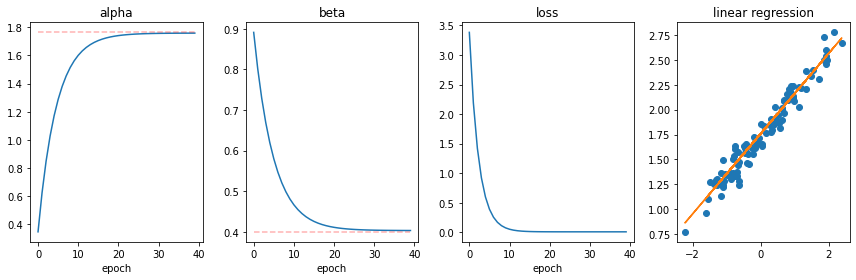

In [ ]:
def generate_y_data(coeff, x, error):
    return coeff[0,0] + np.sum(coeff[1:].reshape((1,-1)) * x, axis=1).reshape((-1,1)) + error

def load_data(n_train=100, n_test=100, feature_dim=1, coeff=None, seed=None, error_std=0.1):
    
    if seed is not None:
        np.random.seed(seed)
    
    if coeff is None:
        coeff = np.random.normal(0., 1., (feature_dim+1, 1)) # (2,1)
    
    x_train = np.random.normal(0., 1., (n_train, feature_dim)) # (100, 1)
    x_test = np.random.normal(0., 1., (n_test, feature_dim)) # (100, 1)
    
    error_train = error_std * np.random.normal(0., 1., (n_train, 1)) # (100, 1)
    error_test = error_std * np.random.normal(0., 1., (n_test, 1)) # (100, 1)
    
    y_train = generate_y_data(coeff, x_train, error_train)   
    y_test = generate_y_data(coeff, x_test, error_test)
        
    return x_train, y_train, x_test, y_test, coeff

def main():
    epoch = int(4e1)
    lr = 1e-1

    x_train, y_train, x_test, y_test, coeff = load_data(feature_dim=1, seed=0)
    #print(x_train.shape, y_train.shape, x_test.shape, y_test.shape)
    #print(x_train.dtype, y_train.dtype, x_test.dtype, y_test.dtype)
    #print(coeff)

    alpha = 0.
    beta = 1.
    alpha_trace = []
    beta_trace = []
    loss_trace = []

    n = x_train.shape[0]
    for i in range(epoch):
        y_pred = alpha + beta * x_train
        grad_alpha = (2/n)*np.sum(y_pred-y_train)
        grad_beta = (2/n)*np.sum((y_pred-y_train)*x_train) # (100,1)*(100,1)
        alpha -= lr * grad_alpha
        beta -= lr * grad_beta
        loss = (1/n)*np.sum((y_pred-y_train)**2)
        alpha_trace.append(alpha)
        beta_trace.append(beta)
        loss_trace.append(loss)

    y_test_pred = alpha + beta * x_test

    fig, (ax0, ax1, ax2, ax3) = plt.subplots(1, 4, figsize=(12,4))
    ax0.plot(alpha_trace)
    ax0.plot(coeff[0,0]*np.ones_like(np.array(alpha_trace)),'--r',alpha=0.3)
    ax0.set_xlabel('epoch')
    ax0.set_title('alpha')
    ax1.plot(beta_trace)
    ax1.plot(coeff[1,0]*np.ones_like(np.array(alpha_trace)),'--r',alpha=0.3)
    ax1.set_xlabel('epoch')
    ax1.set_title('beta')
    ax2.plot(loss_trace)
    ax2.set_xlabel('epoch')
    ax2.set_title('loss')
    ax3.plot(x_test.reshape((-1,)), y_test.reshape((-1,)), 'o')
    ax3.plot(x_test.reshape((-1,)), y_test_pred.reshape((-1,)))
    ax3.set_title('linear regression')
    plt.tight_layout()
    plt.show()

if __name__ == "__main__":
    main()

#####**Linear Regression : sklearn.linear_model.LinearRegression**

model.intercept_[0] = 6.8814
np.round(model.coef_, 4) = array([[0.0183, 0.0229, 0.0011]], dtype=float32)



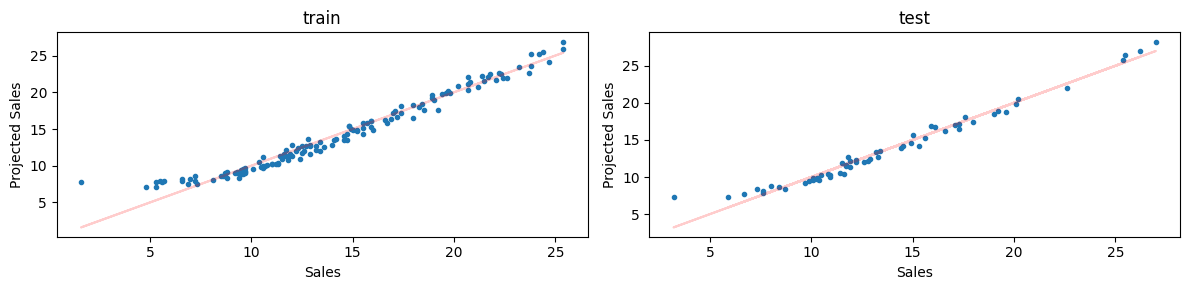

In [59]:
from sklearn.linear_model import LinearRegression

def main():
    url = 'https://raw.githubusercontent.com/justmarkham/scikit-learn-videos/master/data/Advertising.csv'
    df = pd.read_csv(url, usecols=[1,2,3,4])
    num_data = df.shape[0]
    test_size_ratio = 0.3
    num_data_train = int(num_data * (1-test_size_ratio)) 
    dg = df.iloc[:num_data_train] 
    
    df['TV:Radio'] = df['TV'] * df['Radio']
    x_train, y_train, x_test, y_test = train_test_split(df[['TV','Radio','TV:Radio','Sales']]) 
    # print(x_train.shape)
    # print(y_train.shape)
    # print(x_test.shape)
    # print(y_test.shape, end="\n\n")
    
    model = LinearRegression()
    model.fit(x_train, y_train)
    y_train_pred = model.predict(x_train)
    y_test_pred = model.predict(x_test)
    print(f"{model.intercept_[0] = :.4f}")
    print(f"{np.round(model.coef_, 4) = }", end="\n\n")
    
    fig, axes = plt.subplots(1,2,figsize=(12,3))
    for ax, title, y, y_pred in zip(axes, ("train", "test"), (y_train, y_test), (y_train_pred, y_test_pred)):
        ax.set_title(title)
        ax.plot(y, y_pred, '.', label="pred")
        ax.plot(y, y, '-r', alpha=0.2, label="target")
        ax.set_xlabel('Sales')
        ax.set_ylabel('Projected Sales')         
    plt.tight_layout()
    plt.show()
               
if __name__ == "__main__":
    main()

#####**Linear Regression : statsmodels.formula.api.ols**

      TV  Radio  Newspaper  Sales
0  230.1   37.8       69.2   22.1
1   44.5   39.3       45.1   10.4
2   17.2   45.9       69.3    9.3
3  151.5   41.3       58.5   18.5
4  180.8   10.8       58.4   12.9
result = sm.ols('Sales ~ TV + Radio + Newspaper', dg_train).fit()
result.summary()
                            OLS Regression Results                            
Dep. Variable:                  Sales   R-squared:                       0.894
Model:                            OLS   Adj. R-squared:                  0.891
Method:                 Least Squares   F-statistic:                     381.2
Date:                Sun, 04 Jun 2023   Prob (F-statistic):           5.60e-66
Time:                        02:41:39   Log-Likelihood:                -273.89
No. Observations:                 140   AIC:                             555.8
Df Residuals:                     136   BIC:                             567.5
Df Model:                           3                                         
Co

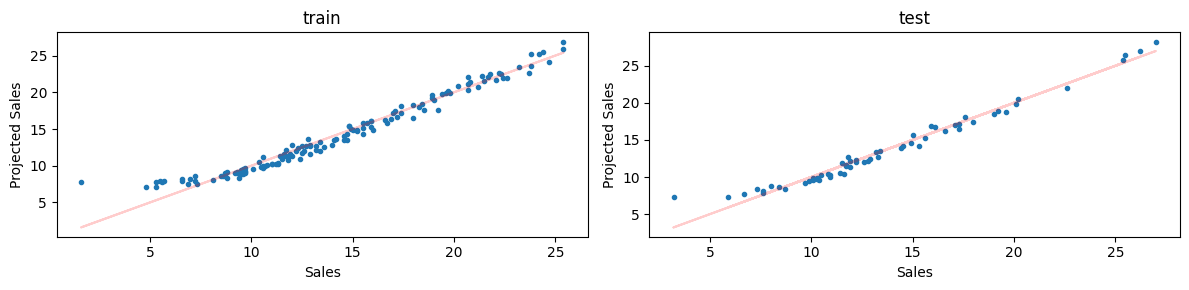

In [33]:
import statsmodels.formula.api as sm # conda install -c conda-forge statsmodels

def main():
    url = 'https://raw.githubusercontent.com/justmarkham/scikit-learn-videos/master/data/Advertising.csv'
    df = pd.read_csv(url, usecols=[1,2,3,4])
    num_data = df.shape[0]
    test_size_ratio = 0.3
    num_data_train = int(num_data * (1-test_size_ratio)) 
    dg_train = df.iloc[:num_data_train] 
    dg_test = df.iloc[num_data_train:] 
    print(dg_train.head())
    
    result = sm.ols('Sales ~ TV + Radio + Newspaper', dg_train).fit()
    print("result = sm.ols('Sales ~ TV + Radio + Newspaper', dg_train).fit()")
    print("result.summary()")
    print(result.summary(), end="\n\n")
    print("-"*80, end="\n\n")
    
    result = sm.ols('Sales ~ TV + Radio', dg_train).fit()
    print("result = sm.ols('Sales ~ TV + Radio', dg_train).fit()")
    print("result.summary()")
    print(result.summary(), end="\n\n")
    print("-"*80, end="\n\n")
    
    result = sm.ols('Sales ~ TV + Radio + TV:Radio', dg_train).fit()
    print("result = sm.ols('Sales ~ TV + Radio', dg_train).fit()")
    print("result.summary()")
    print(result.summary(), end="\n\n")
    print("-"*80, end="\n\n")
    
    model = sm.ols('Sales ~ TV + Radio + TV:Radio', dg_train)
    result = model.fit()
    dg_train_pred = model.predict(result.params)

    model_pred = sm.ols('Sales ~ TV + Radio + TV:Radio', dg_test)
    dg_test_pred = model_pred.predict(result.params)
    
    fig, axes = plt.subplots(1,2,figsize=(12,3))
    for ax, title, dg, dg_pred in zip(axes, ("train", "test"), (dg_train, dg_test), (dg_train_pred, dg_test_pred)):
        ax.set_title(title)
        ax.plot(dg.Sales, dg_pred, '.', label="pred")
        ax.plot(dg.Sales, dg.Sales, '-r', alpha=0.2, label="target")
        ax.set_xlabel('Sales')
        ax.set_ylabel('Projected Sales')         
    plt.tight_layout()
    plt.show()
             
    
if __name__ == "__main__":
    main()

####**Section 3 Performance Metrics**

#####**$R^2$**

$SS_{\text{Total}}$ is all the variation of $y_i$.
Decompose $SS_{\text{Total}}$ into $SS_{\text{Treatment}}$ and $SS_{\text{Error}}$. Note no crossing terms!

$$\begin{array}{lll}
SS_{\text{Total}}
&=&\displaystyle \sum _{i}\left(y_{i}-{\bar {y}}\right)^{2}\\
&=&\displaystyle \sum _{i}\left(\left(y_{i}-\hat{y_{i}}\right)+\left(\hat{y_{i}}-{\bar {y}}\right)\right)^{2}\\
&=&\displaystyle \sum _{i}\left(y_{i}-\hat{y_{i}}\right)^{2}+\sum _{i}\left(\hat{y_{i}}-{\bar {y}}\right)^{2}\\
&:=&\displaystyle SS_{\text{Error}}+SS_{\text{Treatment}}\\
\end{array}$$

$SS_{\text{Treatment}}$ is all the variation of $\hat{y}_i$,
that can be explained by the linear regression among all the variation of $y_i$.
$SS_{\text{Treatment}}$ can be expressed in terms of the $x$ variation.

$$\begin{array}{lll}
SS_{\text{Treatment}}
&=&\displaystyle \sum _{i}\left(\hat{y_{i}}-{\bar {y}}\right)^{2}\\
&=&\displaystyle \sum _{i}\left(\left(\alpha+\beta x_i\right)-\left(\alpha+\beta \bar{x}\right)\right)^{2}\\
&=&\displaystyle \beta^2\sum _{i}\left(x_i-\bar{x}\right)^{2}\\
&=&\displaystyle n\sigma_x^2\beta^2\\
&=&\displaystyle n\sigma_x^2\left(\rho\frac{\sigma_y}{\sigma_x}\right)^2\\
&=&\displaystyle n\sigma_y^2\rho^2\\
\end{array}$$

$R^2$ is the ratio $SS_{\text{Treatment}}/SS_{\text{Total}}$ that can be explained by the linear regression among all the variation of $y$.

$$
\displaystyle 
R^2=\frac{SS_{\text{Treatment}}}{SS_{\text{Total}}}
=\frac{n\sigma_y^2\rho^2}{n\sigma_y^2}
=\rho^2
$$

#####**Other Performance Metrics**

$$
\begin{array}{lll}
\mbox{MAE}&&\frac 1n\sum_{i=1}^n|y_i-\hat{y}_i|\\
\mbox{MSE}&&\frac 1n\sum_{i=1}^n(y_i-\hat{y}_i)^2\\
\mbox{RMSE}&&\sqrt{\frac 1n\sum_{i=1}^n(y_i-\hat{y}_i)^2}
\end{array}
$$

In [36]:
from sklearn import metrics
from sklearn.linear_model import LinearRegression

def main():
    url = 'https://raw.githubusercontent.com/justmarkham/scikit-learn-videos/master/data/Advertising.csv'
    df = pd.read_csv(url, usecols=[1,2,3,4])
    num_data = df.shape[0]
    test_size_ratio = 0.3
    num_data_train = int(num_data * (1-test_size_ratio)) 
    dg = df.iloc[:num_data_train] 
    
    df['TV:Radio'] = df['TV'] * df['Radio']
    x_train, y_train, x_test, y_test = train_test_split(df[['TV','Radio','TV:Radio','Sales']]) 
    
    model = LinearRegression()
    model.fit(x_train, y_train)
    y_train_pred = model.predict(x_train)
    y_test_pred = model.predict(x_test)
    print(model.intercept_)
    print(model.coef_, end="\n\n")
    
    print(f"{model.score(x_train, y_train) = }") # R^2
    print(f"{model.score(x_test, y_test) = }", end="\n\n") # R^2
    
    print(f"{metrics.mean_absolute_error(y_train, y_train_pred) = }")
    print(f"{metrics.mean_absolute_error(y_test, y_test_pred) = }", end="\n\n")
    
    print(f"{metrics.mean_squared_error(y_train, y_train_pred) = }")
    print(f"{metrics.mean_squared_error(y_test, y_test_pred) = }", end="\n\n")
    
    print(f"{np.sqrt(metrics.mean_squared_error(y_train, y_train_pred)) = }")
    print(f"{np.sqrt(metrics.mean_squared_error(y_test, y_test_pred)) = }", end="\n\n")

if __name__ == "__main__":
    main()

(140, 3)
(140, 1)
(60, 3)
(60, 1)

[6.8814206]
[[0.01832572 0.02292052 0.00112136]]

model.score(x_train, y_train) = 0.9651549678209385
model.score(x_test, y_test) = 0.9739145444261225

metrics.mean_absolute_error(y_train, y_train_pred) = 0.6882474
metrics.mean_absolute_error(y_test, y_test_pred) = 0.6058352

metrics.mean_squared_error(y_train, y_train_pred) = 0.9603215
metrics.mean_squared_error(y_test, y_test_pred) = 0.6745029

np.sqrt(metrics.mean_squared_error(y_train, y_train_pred)) = 0.97995996
np.sqrt(metrics.mean_squared_error(y_test, y_test_pred)) = 0.82128125



####**Section 4 Linear Regression in Finance**

#####**Linear Regression of AAPL Daily Returns on SPY Daily Returns** 

x_train.shape = (100, 1)
y_train.shape = (100,)
x_test.shape = (100, 1)
y_test.shape = (100,)

직선의 기울기 :  1.3525
y 절편      :  -0.0014


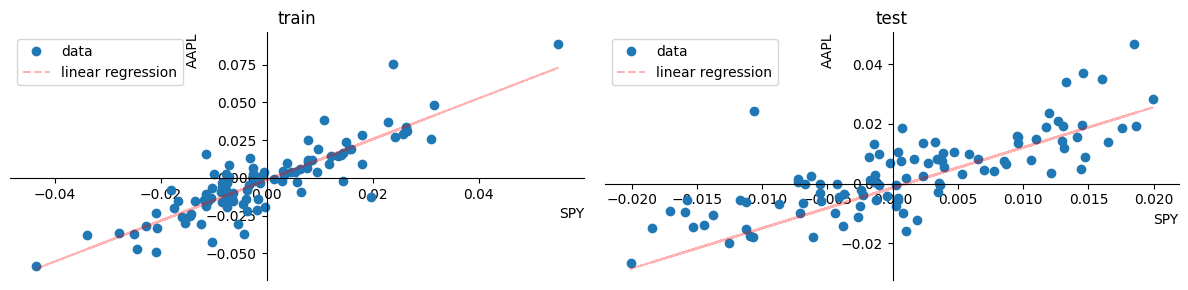

In [22]:
from sklearn.linear_model import LinearRegression

def main():
    tickers = ["SPY", "AAPL"]
    df = download_and_compute_daily_returns(tickers) 
    #print(f"{df.shape = }")

    x_train = df.iloc[-200:-100,0:1].values # (100,1) 
    y_train = df.iloc[-200:-100,1].values # (100,)
    x_test = df.iloc[-100:,0:1].values # (100,1)  
    y_test = df.iloc[-100:,1].values # (100,)
    print(f"{x_train.shape = }", f"{y_train.shape = }", sep="\n")
    print(f"{x_test.shape = }", f"{y_test.shape = }", sep="\n", end="\n\n")

    model = LinearRegression() # 리니너 리그레션 오브젝트(인스탄스) 생성 
    model.fit(x_train, y_train) # 모델 트레인
    print('직선의 기울기 : ', f"{model.coef_[0]:.4f}") # beta
    print('y 절편      : ', f"{model.intercept_:.4f}") # alpha

    fig, axes = plt.subplots(1,2,figsize=(12,3))
    for ax, x, y, title in zip(axes, (x_train, x_test), (y_train, y_test), ("train", "test")):
        y_pred = model.predict(x) 
        ax.plot(x,y,"o",label="data")
        ax.plot(x,y_pred,"--r",alpha=0.3,label="linear regression")
        ax.set_title(title)
        ax.set_xlabel(tickers[0], loc='right')
        ax.set_ylabel(tickers[1], loc='top')
        ax.legend()
        ax.spines['top'].set_visible(False)
        ax.spines['right'].set_visible(False)
        ax.spines['bottom'].set_position('zero')
        ax.spines['left'].set_position('zero')
    plt.tight_layout()
    plt.show()

if __name__ == "__main__":
    main()

#**PART VI TESTS OF SIGNIFICANCE**

### **Chapter 10 Sampling Distribution**

####**Section 1 MLE**

#####**Capture Recapture**

Number of blue jeys in the forest: 7


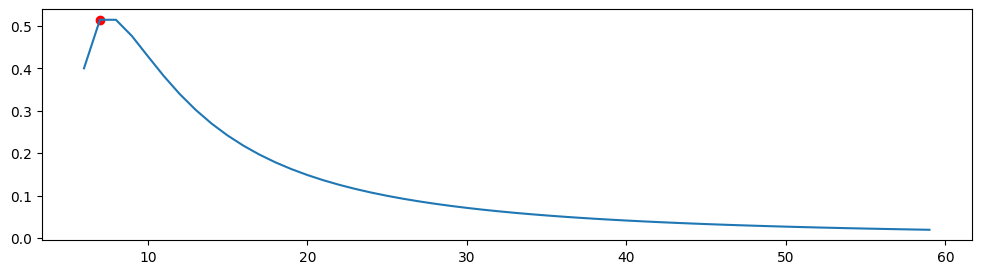

In [ ]:
from scipy import special

def likelihood(n, c, r, t):
    """
    input n - Number of blue jeys in the forest, unknown
    input c - Number of blue jeys captured, tagged, and released
    input r - Number of blue jeys re-captured 
    input t - Number of blue jeys tagged in re-captured stage
    output  - likelihood probability
    """
    return special.comb(n-c, r-t) * special.comb(c, t) / special.comb(n, r)

def main():
           # n - Number of blue jeys in the forest, unknown
    c = 4  # c - Number of blue jeys captured, tagged, and release
    r = 4  # r - Number of blue jeys re-captured 
    t = 2  # t - Number of blue jeys tagged in re-captured stage
    
    prob = []
    for n in range(c+(r-t), 10*(c+(r-t))):
        prob.append(likelihood(n, c, r, t))
        
    max_prob = max(prob)
    idx = prob.index(max_prob)
    n_mle = idx + (c+r-t)
    print('Number of blue jeys in the forest: {}'.format(n_mle))

    fig, ax = plt.subplots(figsize=(12,3))
    ax.plot(range((c+r-t), 10*(c+r-t)), prob)
    ax.scatter(n_mle, prob[idx], color='red')
    plt.show()

if __name__ == '__main__':
    main()

#####**Estimation of $\mu$ and $\sigma^2$ for Normal Samples**

Let $x^{(i)}$ be $m$ iid sample from $N(\mu,\sigma^2)$.
Then, $\mu$ and $\sigma^2$ can be estimated by $\hat{\mu}$ and $\hat{\sigma}^2$
where 
$$\begin{array}{lll}
\hat{\mu}&=&\frac{\sum_{i=1}^mx^{(i)}}{m}\\
\hat{\sigma}^2&=&\frac{\sum_{i=1}^m(x^{(i)}-\hat{\mu})^2}{m}
\end{array}$$

######**Proof**

**Data**
$$\{x^{(i)}: i=1,\ldots,m\}$$

**Model**
$$x^{(i)}\sim N(\mu,\sigma^2)$$

**Likelihood Function**
$$L(\mu,\sigma^2)=\prod_{i=1}^m\frac{1}{\sqrt{2\pi\sigma^2}}exp\left(-\frac{1}{2\sigma^2}\left(x^{(i)}-\mu\right)^2\right)$$

**Log-Likelihood Function**
$$l(\mu,\sigma^2)=-\frac{1}{2\sigma^2}\sum_{i=1}^m\left(x^{(i)}-\mu\right)^2-\frac{m}{2}\log\sigma^2+\mbox{Constant}$$

**Cost Function**
$$J(\mu,\sigma^2)=\frac{1}{2\sigma^2}\sum_{i=1}^m\left(x^{(i)}-\mu\right)^2+\frac{m}{2}\log\sigma^2$$

**Maximum Likelihood Principle**
$$\mbox{argmax}_{\mu,\sigma^2}\ L\quad\Leftrightarrow\quad\mbox{argmax}_{\mu,\sigma^2}\ l\quad\Leftrightarrow\quad\mbox{argmin}_{\mu,\sigma^2}\ J$$


$$\begin{array}{llcll}
\displaystyle
\frac{\partial J}{\partial\mu}=0
&\Rightarrow&\displaystyle
\sum_{i=1}^m\left(x^{(i)}-\mu\right)=0
&\Rightarrow&\displaystyle
\hat{\mu}=\frac{\sum_{i=1}^mx^{(i)}}{m}\\
\displaystyle
\frac{\partial J}{\partial\sigma^2}=0
&\Rightarrow&\displaystyle
\cdots
&\Rightarrow&\displaystyle
\hat{\sigma}^2=\frac{\sum_{i=1}^m(x^{(i)}-\hat{\mu})^2}{m}\\
\end{array}$$

#####**Estimation of $\alpha$ and $\beta$ for Linear Regression (Given $\sigma^2$)**

**Data**
$$\{(x^{(i)}, y^{(i)}): i=1,\ldots,m\}$$

**Model**
$$y^{(i)}=\alpha+\beta x^{(i)}+\varepsilon^{(i)}$$
where with a fixed $\sigma^2$
$$\varepsilon^{(i)}\sim N(0,\sigma^2)$$

**Likelihood Function**
$$L(\alpha,\beta)=\prod_{i=1}^m\frac{1}{\sqrt{2\pi\sigma^2}}exp\left(-\frac{1}{2\sigma^2}\left(y^{(i)}-\alpha-\beta x^{(i)}\right)^2\right)$$

**Log-Likelihood Function**
$$l(\alpha,\beta)=-\frac{1}{2\sigma^2}\sum_{i=1}^m\left(y^{(i)}-\alpha-\beta x^{(i)}\right)^2+\mbox{Constant}$$

**Cost Function (Square Loss)**
$$J(\alpha,\beta)=\frac{1}{2}\sum_{i=1}^m\left(y^{(i)}-\alpha-\beta x^{(i)}\right)^2$$

**Maximum Likelihood Principle**
$$\mbox{argmax}_{\alpha,\beta}\ L\quad\Leftrightarrow\quad\mbox{argmax}_{\alpha,\beta}\ l\quad\Leftrightarrow\quad\mbox{argmin}_{\alpha,\beta}\ J$$

#####**Square Loss - MLE for Linear Regression**

$$\begin{array}{lll}
y=1+2x+N(0,1^2)
\end{array}$$

np.argmax(LOG_LIKELIHOOD) = 6529
idx = (65, 29)
ALPHAS[idx] = 0.8788
BETAS[idx] = 1.9697
LOG_LIKELIHOOD[idx] = -30.4536

np.argmin(SQUARE_LOSS) = 6529
idx = (65, 29)
ALPHAS[idx] = 0.8788
BETAS[idx] = 1.9697
SQUARE_LOSS[idx] = 12.0748



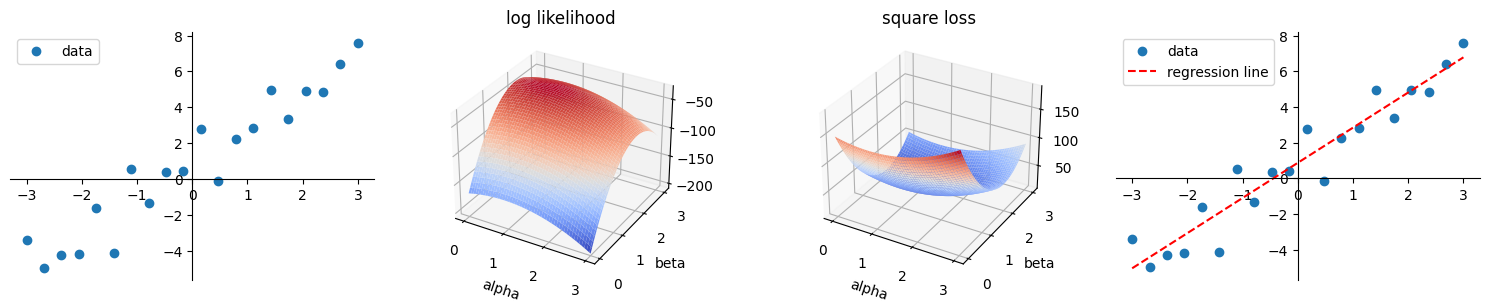

In [ ]:
import matplotlib as mpl

def generate_data():
    seed = 1
    np.random.seed(seed)
    x = np.linspace(-3, 3, 20)
    y = 1 + 2 * x + np.random.normal(size=x.shape)
    return x, y # (10,), (10,)

def compute_prob(x, y, alpha, beta, sigma=1.):
    y_pred = alpha + beta * x
    return np.exp(-(y-y_pred)**2/(2*sigma**2)) / np.sqrt(2*np.pi*sigma**2)

def compute_log_prob(x, y, alpha, beta, sigma=1.):
    y_pred = alpha + beta * x
    return -(y-y_pred)**2/(2*sigma**2) - 0.5 * np.log(2*np.pi*sigma**2)

def compute_likelihood(x, y, alpha, beta, sigma=1.):
    joint_prob = 1.
    for x_, y_ in zip(x, y):
        joint_prob *= compute_prob(x_, y_, alpha, beta, sigma)
    return joint_prob 

def compute_log_likelihood(x, y, alpha, beta, sigma=1.):
    log_joint_prob = 0.
    for x_, y_ in zip(x, y):
        log_joint_prob += compute_log_prob(x_, y_, alpha, beta, sigma)
    return log_joint_prob

def compute_square_loss(x, y, alpha, beta, sigma=1.):
    square_loss = 0.
    for x_, y_ in zip(x, y):
        square_loss += ( y_ - ( alpha + beta * x_ ) )**2 / 2
    return square_loss

def main():
    x, y = generate_data() 

    alphas = np.linspace(0,3,100)
    betas = np.linspace(0,3,100)
    ALPHAS, BETAS = np.meshgrid(alphas, betas) 

    log_likelihood_list = []
    for alpha, beta in zip(ALPHAS.reshape((-1,)), BETAS.reshape((-1,))):
        log_likelihood_list.append(compute_log_likelihood(x, y, alpha=alpha, beta=beta, sigma=1.))
    LOG_LIKELIHOOD = np.array(log_likelihood_list).reshape(ALPHAS.shape)

    idx = np.unravel_index(np.argmax(LOG_LIKELIHOOD), ALPHAS.shape)
    print(f"{np.argmax(LOG_LIKELIHOOD) = }")
    print(f"{idx = }")
    print(f"{ALPHAS[idx] = :.4f}")
    print(f"{BETAS[idx] = :.4f}")
    print(f"{LOG_LIKELIHOOD[idx] = :.4f}", end="\n\n")

    square_loss_list = []
    for alpha, beta in zip(ALPHAS.reshape((-1,)), BETAS.reshape((-1,))):
        square_loss_list.append(compute_square_loss(x, y, alpha=alpha, beta=beta, sigma=1.))
    SQUARE_LOSS = np.array(square_loss_list).reshape(ALPHAS.shape)

    idx = np.unravel_index(np.argmin(SQUARE_LOSS), ALPHAS.shape)
    print(f"{np.argmin(SQUARE_LOSS) = }")
    print(f"{idx = }")
    print(f"{ALPHAS[idx] = :.4f}")
    print(f"{BETAS[idx] = :.4f}")
    print(f"{SQUARE_LOSS[idx] = :.4f}", end="\n\n")

    fig = plt.figure(figsize=(15,3))
    ax0 = fig.add_subplot(1,4,1)
    ax1 = fig.add_subplot(1,4,2,projection='3d')
    ax2 = fig.add_subplot(1,4,3,projection='3d')
    ax3 = fig.add_subplot(1,4,4)

    ax0.plot(x, y, 'o', label="data")

    ax3.plot(x, y, 'o', label="data")
    ax3.plot(x, ALPHAS[idx] + BETAS[idx] * x, '--r', label="regression line")

    for ax in (ax0, ax3):
        ax.legend()
        ax.spines['top'].set_visible(False)
        ax.spines['right'].set_visible(False)
        ax.spines['bottom'].set_position("zero")
        ax.spines['left'].set_position("zero")

    ax1.plot_surface(ALPHAS, BETAS, LOG_LIKELIHOOD,
                    rstride=2,
                    cstride=2,
                    cmap=mpl.cm.coolwarm,
                    linewidth=0.5,
                    antialiased=True)
    ax1.set_xlabel('alpha')
    ax1.set_ylabel('beta')
    ax1.set_title('log likelihood')

    ax2.plot_surface(ALPHAS, BETAS, SQUARE_LOSS,
                    rstride=2,
                    cstride=2,
                    cmap=mpl.cm.coolwarm,
                    linewidth=0.5,
                    antialiased=True)
    ax2.set_xlabel('alpha')
    ax2.set_ylabel('beta')
    ax2.set_title('square loss')

    plt.tight_layout()
    plt.show()

if __name__ == "__main__":
    main()

#####**Estimation of $p$**

Let $x^{(i)}$ be $m$ iid sample from $B(p)$.
Then, $p$ can be estimated by $\hat{p}$
where 
$$\begin{array}{lll}
\hat{p}&=&\frac{\sum_{i=1}^mx^{(i)}}{m}
\end{array}$$

######**Proof**

**Data**
$$\{x^{(i)}: i=1,\ldots,m\}$$

**Model**
$$x^{(i)}\sim B(p)$$

**Likelihood Function**
$$L(p)=\prod_{i=1}^mp^{x^{(i)}}(1-p)^{1-x^{(i)}}$$

**Log-Likelihood Function**
$$l(p)=\sum_{i=1}^mx^{(i)}\log(p)+(1-x^{(i)})\log(1-p)$$

**Cost Function (Cross Entropy Loss)**
$$J(p)=-\sum_{i=1}^mx^{(i)}\log(p)+(1-x^{(i)})\log(1-p)$$

**Maximum Likelihood Principle**
$$\mbox{argmax}_{p}\ L\quad\Leftrightarrow\quad\mbox{argmax}_{p}\ l\quad\Leftrightarrow\quad\mbox{argmin}_{p}\ J$$


$$\begin{array}{llcll}
\displaystyle
\frac{\partial J}{\partial p}=0
&\Rightarrow&\displaystyle
\sum_{i=1}^m\frac{x^{(i)}}{p}-\frac{1-x^{(i)}}{1-p}=0
&\Rightarrow&\displaystyle
\hat{p}=\frac{\sum_{i=1}^mx^{(i)}}{m}
\end{array}$$

#####**Cross Entropy Loss - MLE for Coin Flip**

$$\begin{array}{lll}
y=1+2x+N(0,1^2)
\end{array}$$

idx = 74
ps[idx] = 0.7425
log_likelihood[idx] = -57.3074



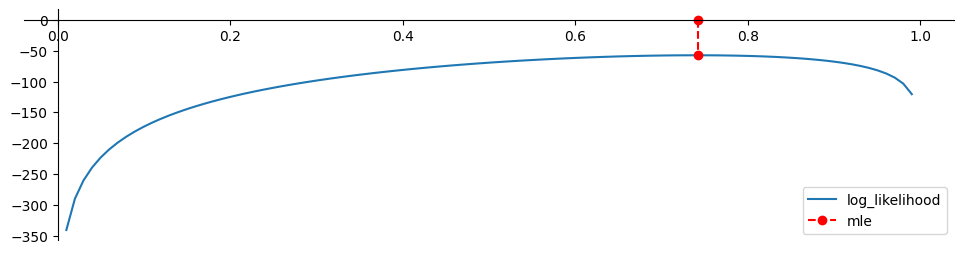

In [ ]:
def generate_data():
    seed = 1
    np.random.seed(seed)
    n = 100
    p = 0.7
    return np.random.binomial(n=1, p=p, size=(n,)) # (100,)

def compute_prob(coin, p):
    return p**coin * (1-p)**(1-coin)

def compute_log_prob(coin, p):
    return coin*np.log(p) + (1-coin)*np.log(1-p)

def compute_likelihood(coins, p):
    joint_prob = 1.
    for coin in coins:
        joint_prob *= compute_prob(coin, p)
    return joint_prob 

def compute_log_likelihood(coins, p):
    log_joint_prob = 0.
    for coin in coins:
        log_joint_prob += compute_log_prob(coin, p)
    return log_joint_prob

def main():
    coins = generate_data() 

    ps = np.linspace(0.01, 0.99, 100)

    log_likelihood_list = []
    for p in ps:
        log_likelihood_list.append(compute_log_likelihood(coins, p))
    log_likelihood = np.array(log_likelihood_list)

    idx = np.argmax(log_likelihood)
    print(f"{idx = }")
    print(f"{ps[idx] = :.4f}")
    print(f"{log_likelihood[idx] = :.4f}", end="\n\n")

    fig, ax = plt.subplots(figsize=(12,3))
    ax.plot(ps, log_likelihood, label="log_likelihood")
    p = ps[idx]
    log_likelihood_max = log_likelihood[idx] 
    ax.plot([p,p], [0,log_likelihood_max], '--or', label="mle")
    ax.legend(loc="lower right")
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.spines['bottom'].set_position("zero")
    ax.spines['left'].set_position("zero")
    plt.show()

if __name__ == "__main__":
    main()

#####**Cross Entropy Loss - MLE for MNIST**

**Data**
$$\{(x^{(i)}, y^{(i)}): i=1,\ldots,m\}$$

**Model**
$$
\begin{array}{lll}
p^{(i)}
&=&\mbox{softmax}(x^{(i)}W+b)\\
&=&e^{x^{(i)}W+b} / \mbox{np.sum}(e^{x^{(i)}W+b})
\end{array}
$$

**Likelihood Function**
$$L(W,b)=\prod_{i=1}^m\prod_{k=0}^{9}\left(p^{(i)}[k]\right)^{y^{(i)}[k]}$$

**Log-Likelihood Function**
$$l(W,b)=\sum_{i=1}^m\sum_{k=0}^{9} y^{(i)}[k]\log p^{(i)}[k]$$

**Cost Function (Cross Entropy Loss)**
$$J(W,b)=-\frac{1}{m}\sum_{i=1}^m\sum_{k=0}^{9} y^{(i)}[k]\log p^{(i)}[k]$$

**Maximum Likelihood Principle**
$$\mbox{argmax}_{W,b}\ L\quad\Leftrightarrow\quad\mbox{argmax}_{W,b}\ l\quad\Leftrightarrow\quad\mbox{argmin}_{W,b}\ J$$

####**Section 1 Sampling distribution**

#####**Statistic and Estimator**

$$\begin{array}{ccccccc}
\text{Population}
&\rightarrow&
\text{Sample ${\bf x}$}
&\rightarrow&
\text{Statistic $f({\bf x})$}\\
\\
\text{Population}
&\rightarrow&
\text{Sample ${\bf x}$}
&\rightarrow&
\text{Estimator $\hat{\theta}({\bf x})$}\\
\end{array}$$

#####**Sampling Distribution [eng](https://www.youtube.com/watch?v=7S7j75d3GM4)**

$$\begin{array}{ccccccc}
\text{Population}
&\rightarrow&
\text{Sample ${\bf x}$}
&\rightarrow&
\text{Statistic $f({\bf x})$}\\
\\
\text{Population}
&\rightarrow&
\text{Sample ${\bf x}$}
&\rightarrow&
\text{Estimator $\hat{\theta}({\bf x})$}\\
\uparrow&&\uparrow&&\uparrow\\
\text{Population Distribution :}&&\text{Sample Distribution :}&&\text{Sampling Distribution :}\\
\text{Distribution of Population}&&\text{Distribution of Sample}&&\text{Distribution of $\hat{\theta}({\bf x})$}\\
\end{array}$$

#####**Sample Distribution**

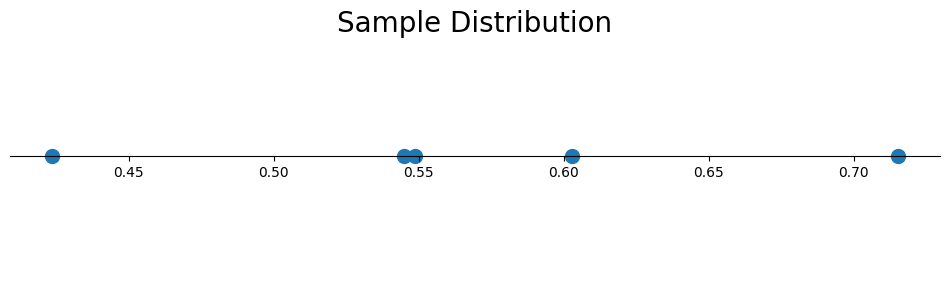

In [ ]:
def main():
    seed = 0
    np.random.seed(seed)
    
    sample_size = 5
    sample = np.random.uniform(size=(sample_size,))
    
    fig, ax = plt.subplots(figsize=(12,3))
    ax.scatter(sample, np.zeros_like(sample), s=100)
    ax.set_title('Sample Distribution', fontsize=20)    
    ax.spines['left'].set_visible(False) 
    ax.spines['right'].set_visible(False)  
    ax.spines['top'].set_visible(False)
    ax.spines['bottom'].set_position('zero')
    ax.set_yticks( [] )
    plt.show()
               
if __name__ == "__main__":
    main()

####**Section 2 Sampling distribution of $\bar{X}$**

$$\begin{array}{lll}
\displaystyle
\bar{X}=\frac{\sum_{k=1}^nX_k}{n}\ \text{mean $\mu$, variance $\frac{\sigma^2}{n}$}
&\Rightarrow&\displaystyle
\bar{X}
\approx N\left(\mu,\frac{\sigma^2}{n}\right)
\end{array}$$

#####**Sampling Distribution of $\bar{X}$ - Simulation**

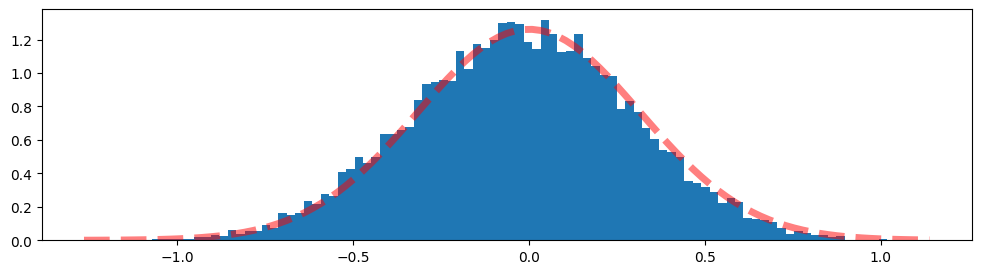

In [ ]:
def main():
    seed = 0
    np.random.seed(seed)

    n = 10_000
    population = np.random.randn(n)

    k = 10
    x_bar_samples = np.array(
        [np.random.choice(population, size=k, replace=False).mean() for _ in range(n)]
    )

    fig, ax = plt.subplots(figsize=(12,3))
    _, bins, _ = ax.hist(x_bar_samples,density=True,bins=100)
    mu = 0
    sigma = 1 / np.sqrt(k)
    pdf = stats.norm(loc=mu,scale=sigma).pdf(bins)
    ax.plot(bins,pdf,'--r',alpha=0.5,lw=5)
    plt.show()

if __name__ == "__main__":
    main()

#####**Sampling Distribution of $\bar{X}$ - Real Data (One Sample Size)**

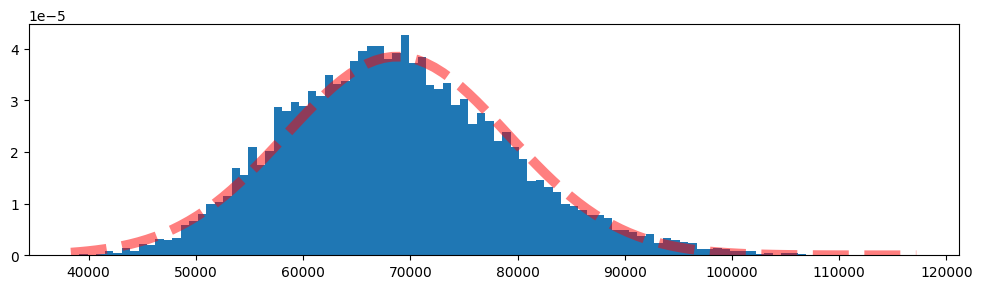

In [ ]:
# Generate 10_000 x_bar of 10 samples from loans_income and 
# plot histogram of these 10_000 data with density=True
# draw the normal pdf of same mean and std of these 10_000 data on the same ax
def main():
    # data loading
    url = 'https://raw.githubusercontent.com/gedeck/practical-statistics-for-data-scientists/master/data/loans_income.csv'
    df = pd.read_csv(url)
    #print(df.head())

    # generate 10_000 x_bar of 10 samples from loans_income
    n = 10_000
    x_bar = np.array([df.sample(10).mean()[0] for _ in range(n)])
    mu = x_bar.mean()
    sigma = x_bar.std()

    # plot histogram of these 10_000 data with density=True
    # draw the normal pdf of same mean and std of these 10_000 data on the same ax
    fig, ax = plt.subplots(figsize=(12,3))
    _, bins, _ = ax.hist(x_bar, bins=100, density=True)
    pdf = stats.norm(loc=mu,scale=sigma).pdf(bins)
    ax.plot(bins,pdf,'--r',alpha=0.5,lw=7)
    plt.show()

if __name__ == "__main__":
    main()

#####**Sampling Distribution of $\bar{X}$ - Real Data (Many Sample Sizes)**

$$\begin{array}{lll}
\displaystyle
\bar{X}=\frac{\sum_{k=1}^nX_k}{n}\ \text{mean $\mu$, variance $\frac{\sigma^2}{n}$}
&\Rightarrow&\displaystyle
\bar{X}
\approx N\left(\mu,\frac{\sigma^2}{n}\right)
\end{array}$$

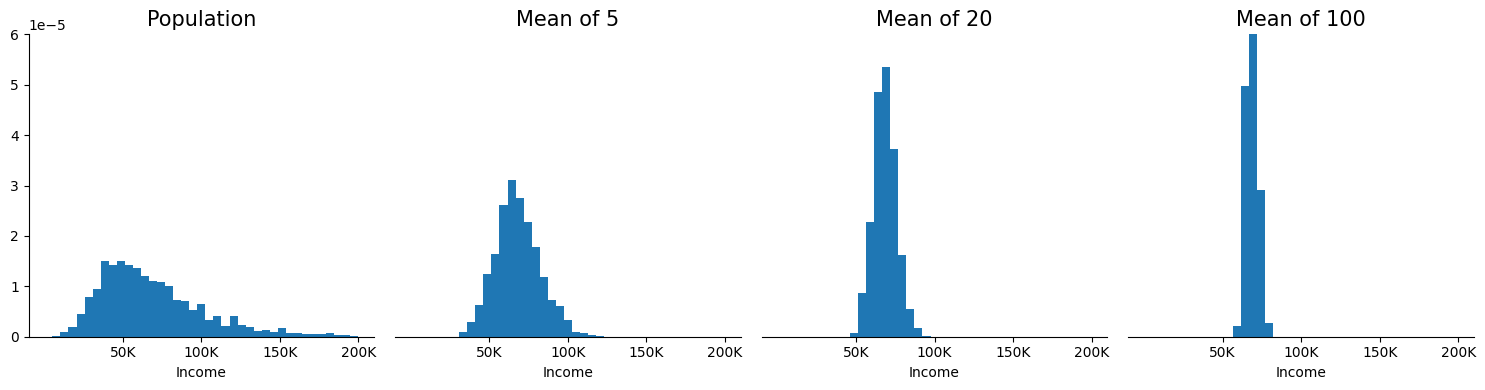

In [ ]:
def main():
    url = 'https://raw.githubusercontent.com/gedeck/practical-statistics-for-data-scientists/master/data/loans_income.csv'
    population = pd.read_csv(url)["x"]
    sampling_mean_5 = [population.sample(5).mean() for _ in range(1000)]
    sampling_mean_20 = [population.sample(20).mean() for _ in range(1000)]
    sampling_mean_100 = [population.sample(100).mean() for _ in range(1000)]
    
    fig, (ax0, ax1, ax2, ax3) = plt.subplots(1,4,figsize=(12,3))
    
    bins = np.linspace(0, 200000, 40)
    ax0.hist(population, bins=bins, density=True)
    ax1.hist(sampling_mean_5, bins=bins, density=True)
    ax2.hist(sampling_mean_20, bins=bins, density=True)
    ax3.hist(sampling_mean_100, bins=bins, density=True)
    
    for ax, title in zip((ax0,ax1,ax2,ax3),('Population','Mean of 5','Mean of 20','Mean of 100')):
        ax.set_title(title, fontsize=15)
        ax.set_ylim(0,6e-5)
        ax.set_xlabel('Income')
        ax.set_xticks( (50_000,100_000,150_000,200_000) )
        ax.set_xticklabels( ("50K","100K","150K","200K") )
        for location in ('right','top'):
            ax.spines[location].set_visible(False)
        if ax in (ax1, ax2, ax3):
            ax.spines['left'].set_visible(False)
            ax.set_yticks( () )
    
    plt.tight_layout()
    plt.show()
    
if __name__ == "__main__":
    main()

####**Section 3 Sampling distribution of $S^2$**

$$
S^2=\frac{\sum_{k=1}^n\left(X_k-\bar{X}\right)^2}{n-1}
\quad\Rightarrow\quad
\frac{(n-1)S^2}{\sigma^2}=\sum_{k=1}^n\left(\frac{X_k-\bar{X}}{\sigma}\right)^2\sim\chi^2_{n-1}
$$

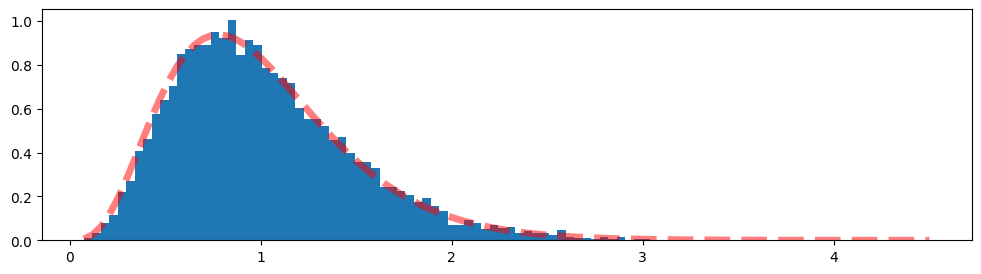

In [ ]:
import random 

def main():
    n = 10_000
    k = 10
    population = [np.random.randn() for _ in range(n)]
    S_square_samples = [np.array(random.sample(population, k)).var(ddof=1) for _ in range(n)]

    fig, ax = plt.subplots(figsize=(12,3))
    _, bins, _ = ax.hist(S_square_samples,density=True,bins=100)
    df = k - 1
    c = 1 / df
    pdf = stats.chi2(df).pdf(bins/c) * (1/c) 
    ax.plot(bins,pdf,'--r',alpha=0.5,lw=5)
    plt.show()

if __name__ == "__main__":
    main()

####**Section 4 Standard Deviation vs Standard Error [eng](https://www.youtube.com/watch?v=A82brFpdr9g)**

#####**Standard Deviation vs Standard Error**

Standard deviation: Quantifies the variability of values in a dataset. It assesses how far a data point likely falls from the mean.

$$
\text{SD}=\sqrt{Var(X)}
$$

Standard error: Quantifies the variability between samples drawn from the same population. It assesses how far a sample statistic likely falls from a population parameter.

$$
\text{SE}=\sqrt{Var(\theta(X_1,\cdots,X_n))}
$$

[Difference Between Standard Deviation and Standard Error](https://statisticsbyjim.com/basics/difference-standard-deviation-vs-standard-error/)

#####**Standard Deviation**

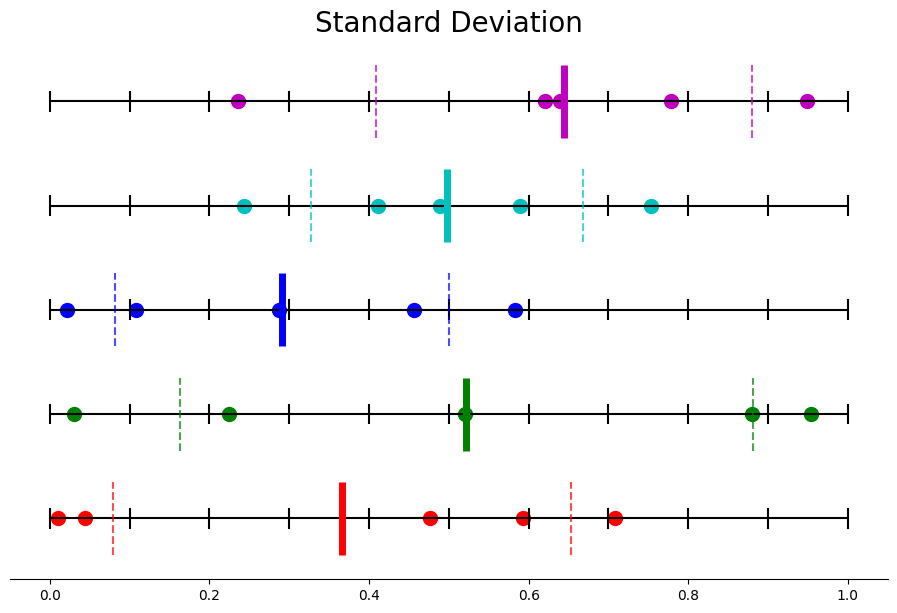

In [ ]:
def scatter_standard_deviation(x, y_center, color, ax, mu=None, sigma=None, text=None):
    ax.hlines(y_center, xmin=0, xmax=1, alpha=1.0, color='black', ls='-')
    for i in range(11):
        ax.vlines(0.1*i, ymin=-2e-2+y_center, ymax=2e-2+y_center, alpha=1.0, color='black', ls='-')
        
    ax.scatter(x, np.ones_like(x)*y_center, color=color, s=100)
    
    if mu:
        ax.vlines(mu, ymin=-7e-2+y_center, ymax=7e-2+y_center, alpha=1.0, color=color, ls='-', lw=5)
        
    if sigma:
        ax.vlines(mu+sigma, ymin=-7e-2+y_center, ymax=7e-2+y_center, alpha=0.7, color=color, ls='--')
        ax.vlines(mu-sigma, ymin=-7e-2+y_center, ymax=7e-2+y_center, alpha=0.7, color=color, ls='--')
    
    if text:
        arrowprops=dict(arrowstyle='<->', color='k', linewidth=3, mutation_scale=20)
        ax.annotate(text='',
                    xy=(mu,7e-2+y_center),
                    xytext=(mu+sigma,7e-2+y_center),
                    arrowprops=arrowprops)
        ax.annotate(text=text,
                    xy=(mu,13e-2+y_center),
                    xytext=(mu,13e-2+y_center),
                    fontsize=20)
    
    
def main():
    mu_list = []
    sigma_list = []
    
    fig, ax = plt.subplots(figsize=(7*1.61803398875,7))

    ax.set_title('Standard Deviation', fontsize=20)
    
    for i, color in zip(range(5), ['r','g','b','c','m']):
        x = np.random.uniform(size=(5,))
        mu = x.mean()
        sigma = x.std()

        y_center = i * 0.2
        scatter_standard_deviation(x, y_center, color, ax, mu, sigma)

        mu_list.append(mu)
        sigma_list.append(sigma)
        
    ax.spines['left'].set_visible(False) 
    ax.spines['right'].set_visible(False)  
    ax.spines['top'].set_visible(False)
    ax.set_yticks( [] )
               
if __name__ == "__main__":
    main()

#####**Standard Error of X_bar (Simulation)**

(Estimated) Mean of X_bar : 0.5007
Standard Error   of X_bar : 0.1303


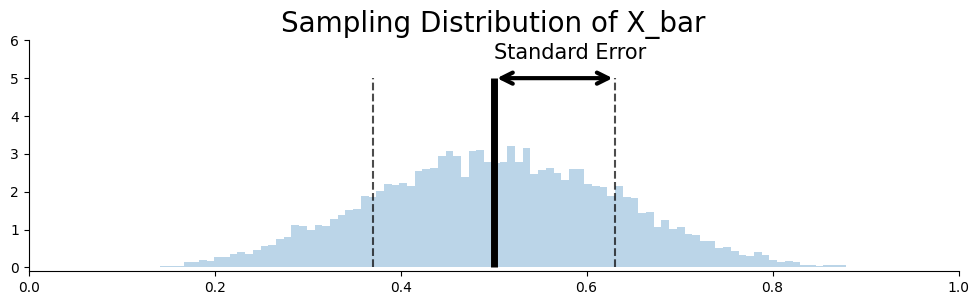

In [ ]:
def main():
    X_bar = []
    for _ in range(10000):
        x = np.random.uniform(size=(5,))
        x_bar = x.mean()
        X_bar.append(x_bar)
            
    average = np.array(X_bar).mean()
    standard_error = np.array(X_bar).std()
    
    print(f'(Estimated) Mean of X_bar : {average:.4}')
    print(f'Standard Error   of X_bar : {standard_error:.4}')
    
    fig, ax =plt.subplots(figsize=(12,3))
    
    ax.set_title("Sampling Distribution of X_bar", fontsize=20)
    
    ax.hist(X_bar, bins=100, density=True, alpha=0.3)
    ax.vlines(average, ymin=0, ymax=5, alpha=1.0, color='k', ls='-', lw=5)
    ax.vlines(average+standard_error, ymin=0, ymax=5, alpha=0.7, color='k', ls='--')
    ax.vlines(average-standard_error, ymin=0, ymax=5, alpha=0.7, color='k', ls='--')

    arrowprops=dict(arrowstyle='<->', color='k', linewidth=3, mutation_scale=20)
    ax.annotate(text='',
                xy=(average,5),
                xytext=(average+standard_error,5),
                arrowprops=arrowprops)
    ax.annotate(text='Standard Error',
                xy=(average,5.5),
                xytext=(average,5.5),
                fontsize=15)
    
    ax.set_xlim(0.0,1.0)
    ax.set_ylim(-0.1,6)
    
    ax.spines['right'].set_visible(False)  
    ax.spines['top'].set_visible(False)
    
    plt.show()
    
    
if __name__ == "__main__":
    main()

#####**Standard Error of S_square (Simulation)**

(Estimated) Mean of S^2 : 0.06703
Standard Error   of S^2 : 0.03437


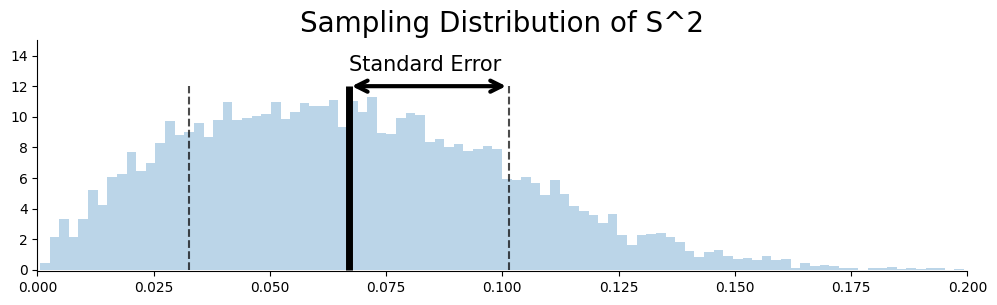

In [ ]:
def main():
    S_square = []
    for _ in range(10000):
        x = np.random.uniform(size=(5,))
        sigma = x.std()
        S_square.append(sigma**2)
        
    average = np.array(S_square).mean()
    standard_error = np.array(S_square).std()
    
    print(f'(Estimated) Mean of S^2 : {average:.4}')
    print(f'Standard Error   of S^2 : {standard_error:.4}')
    
    fig, ax =plt.subplots(figsize=(12,3))
    
    ax.set_title("Sampling Distribution of S^2", fontsize=20)
    
    ax.hist(S_square, bins=100, density=True, alpha=0.3)
    ax.vlines(average, ymin=0, ymax=12, alpha=1.0, color='k', ls='-', lw=5)
    ax.vlines(average+standard_error, ymin=0, ymax=12, alpha=0.7, color='k', ls='--')
    ax.vlines(average-standard_error, ymin=0, ymax=12, alpha=0.7, color='k', ls='--')

    arrowprops=dict(arrowstyle='<->', color='k', linewidth=3, mutation_scale=20)
    ax.annotate(text='',
                xy=(average,12),
                xytext=(average+standard_error,12),
                arrowprops=arrowprops)
    ax.annotate(text='Standard Error',
                xy=(average,13),
                xytext=(average,13),
                fontsize=15)
    
    ax.set_xlim(0.0,0.2)
    ax.set_ylim(-0.1,15)
    
    ax.spines['right'].set_visible(False)  
    ax.spines['top'].set_visible(False)
    
    plt.show()
       
if __name__ == "__main__":
    main()

### **Chapter 11 Confidence Interval**

####**Section 1 Confidence Interval**

#####**Confidence Interval**

<img src="https://media.nngroup.com/media/editor/2021/06/11/ci-width.png">

[Confidence Intervals, Margins of Error, and Confidence Levels in UX](https://www.nngroup.com/articles/confidence-interval/)

#####**Conditions for Confidence Interval**

- **[Simple Random Sample]** Samples are chosen randomly from the population.

- **[Independent Sample]** We choose samples with replacement or the sample size is less than 10% of the total population so that we can approximate the sampling without replacement as the sampling with replacement. 

- **[Normal Distribution]** Population distribution is a normal distribution, or the sample size is large, e.g., $n\ge30$ for non-proportion cases and $n_0\hat{p}_0\ge 10$, $n_0(1-\hat{p}_0)\ge 10$, $n_1\hat{p}_1\ge 10$, $n_1(1-\hat{p}_1)\ge 10$ for proportion cases if applicable so that we can approximate the sample mean distribution as a normal distribution by the central limit theorem.



#####**Symetric Case**

$$\begin{array}{lll}
\mbox{Confidence_Interval}_\theta 
&=&\hat{\theta}\pm\mbox{Margin_of_Error}_\theta\\
\end{array}$$

#####**Non-Symetric Case**

$$\begin{array}{lll}
\mbox{Confidence_Interval}_\theta 
&=&(\mbox{Left}_\theta, \mbox{Right}_\theta)\\
&=&\mbox{Center}_\theta\pm\frac{\mbox{Right}_\theta-\mbox{Left}_\theta}{2}\\
&=&\mbox{Center}_\theta\pm\mbox{Margin_of_Error}_\theta
\end{array}$$

####**Section 2 $z$ Confidence Interval**

#####**$z$ Confidence Interval**



$$
\begin{array}{ccc}
\displaystyle
\frac{\bar{X}-\mu}{\frac{\sigma}{\sqrt{n}}}\approx \frac{\bar{X}-\mu}{\frac{S}{\sqrt{n}}} \approx N(0,1)
&\Rightarrow&
\bar{X}\pm z_*\frac{S}{\sqrt{n}}\\
\end{array}
$$

######**Proof**

For large $n$ so that we can use the central limit theorem and the law of large numbers

$$\begin{array}{lll}
\displaystyle
X_k\ \text{(approximately) iid with mean $\mu$, variance $\sigma^2$}
&\Rightarrow&
\displaystyle
\bar{X}=\frac{\sum_{k=1}^nX_k}{n}\ \text{mean $\mu$, variance $\frac{\sigma^2}{n}$}\\
&\stackrel{\text{CLT}}{\Rightarrow}&\displaystyle
\bar{X}
\approx N\left(\mu,\frac{\sigma^2}{n}\right)\\
&\Rightarrow&\displaystyle
\frac{\bar{X}-\mu}{\frac{\sigma}{\sqrt{n}}}\approx N(0,1)\\
&\stackrel{\text{LLN}}{\Rightarrow}&\displaystyle
\frac{\bar{X}-\mu}{\frac{s}{\sqrt{n}}}\approx N(0,1)\\
&\Rightarrow&\displaystyle
\bar{x}\pm z_*\frac{s}{n}
\end{array}$$

#####**Code - $z$ Confidence Interval**

In [ ]:
def main():
    data = np.array([[3, 4, 5, 10, 11, 12]])
    x_bar, margin_of_error = compute_z_confidence_interval(data)
    print(f"{x_bar[0]} \u00B1 {margin_of_error[0]:.2f}")

if __name__ == "__main__":
    main()

7.5 ± 3.15


#####**Code - $z$ Confidence Interval : scipy.stats.norm.interval**

In [ ]:
def main():
    data = np.array([3, 4, 5, 10, 11, 12])
    left, right = stats.norm(loc=data.mean(), scale=stats.sem(data)).interval(confidence=0.95)
    x_bar = (left + right) / 2
    margin_of_error = x_bar - left 
    print(f"{x_bar} \u00B1 {margin_of_error:.2f}")

if __name__ == "__main__":
    main()

7.5 ± 3.15


#####**Code - 30 $z$ Confidence Intervals**

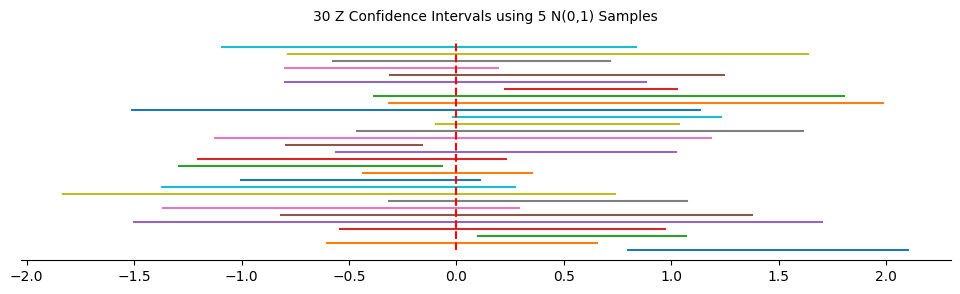

In [ ]:
def main():
    seed = 0
    np.random.seed(seed)

    n_simulations = 30
    n_samples = 5
    data = np.random.normal(size=(n_simulations, n_samples)) # (30,5)
    x_bars, margin_of_errors = compute_z_confidence_interval(data) # (30,), (30,)

    fig, ax = plt.subplots(figsize=(12,3))
    for i, (x_bar, margin_of_error) in enumerate(zip(x_bars, margin_of_errors)):
        ax.plot([x_bar-margin_of_error,x_bar+margin_of_error], [i,i])
    ax.plot([0,0],[0,n_simulations],'--r')
    title = f"{n_simulations} Z Confidence Intervals using {n_samples} N(0,1) Samples"
    ax.set_title(title, fontsize=10)
    ax.spines['left'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.spines['top'].set_visible(False)
    ax.set_yticks( () )   
    plt.show()

if __name__ == "__main__":
    main()

#####**Code - Building $z$ Confidence Interval not containing Mean using Real Data**

4 (56454.876509416645, 66270.28349058336)


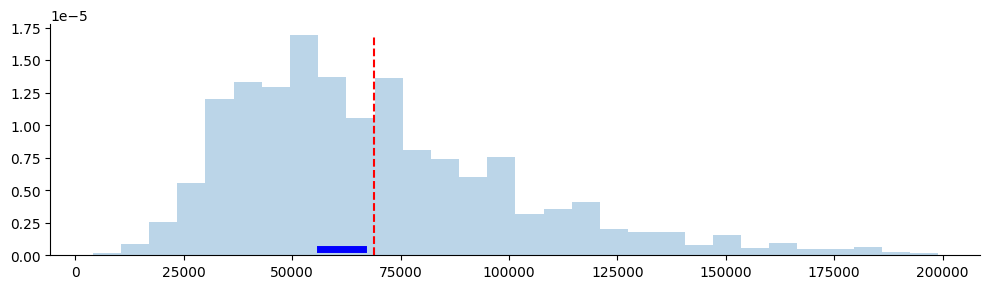

In [ ]:
def main():
    url = 'https://raw.githubusercontent.com/gedeck/practical-statistics-for-data-scientists/master/data/loans_income.csv'
    df = pd.read_csv(url)
    population = df.values.reshape((-1,)) # (50000,)

    seed = 1
    np.random.seed(seed)

    n = 100
    mean_true = 68760.51844
    counter = 0
    while True:
        counter += 1
        data = np.random.choice(population, size=(1,n), replace=False) # (1,100)
        x_bars, margin_of_errors = compute_z_confidence_interval(data) # (1,), (1,)
        left = x_bars[0] - margin_of_errors[0]
        right = x_bars[0] + margin_of_errors[0]
        if (mean_true < left) or (mean_true > right):
            print(counter, (left, right)) 
            break

    fig, ax = plt.subplots(figsize=(12,3))

    # draw the distribution of the original data
    heights, bins, _ = ax.hist(population,bins=30,density=True,alpha=0.3)

    # draw mu
    ax.plot((mean_true,mean_true),(0,heights.max()),'--r')

    # draw confidence interval which does not contain mu
    ax.plot((left,right),(0.05e-5,0.05e-5),'-b',lw=5)

    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    plt.show()

if __name__ == "__main__":
    main()

####**Section 3 $t$ Confidence Interval**

#####**$t$ Confidence Interval**

If $X_i$ are iid normal,

$$
\begin{array}{ccc}
\displaystyle
\frac{\bar{X}-\mu}{\frac{S}{\sqrt{n}}} \sim t_{n-1}
&\Rightarrow&
\bar{X}\pm t_*\frac{S}{\sqrt{n}}\\
\end{array}
$$

#####**Example - Mean Faculty Age [eng](https://www.khanacademy.org/math/ap-statistics/xfb5d8e68:inference-quantitative-means/one-sample-t-interval-mean/v/conditions-for-valid-t-intervals?modal=1)**

Flavia aspired to ascertain the mean age of faculty members at her university. To pursue this objective, she used a Simple Random Sampling (SRS) technique, selecting a sample size of 20 individuals from the population of roughly 700 faculty members. Each faculty member included in the sample willingly disclosed their age to Flavia. It is worth noting that the gathered data exhibited a skewness towards the right, with a sample mean of 38.75. Given the circumstances, Flavia now contemplates employing the collected data to construct a confidence interval, thereby estimating the mean age of faculty members throughout her academic institution. Check the conditions for constructing a $t$ interval and list any violated conditions. 

######**Solution**

- **[Simple Random Sample]** Satisfied since she used a Simple Random Sampling (SRS) technique.

- **[Independent Sample]** Satisfied since the sample size is less than 10% of the total population. 

- **[Normal Distribution]** Not satisfied since the gathered data exhibited a skewness towards the right

#####**$z$ or $t$? Which One to use?**

$$\begin{array}{lllll}
\text{sample size : small} < 30
&\Rightarrow&
\text{population distribution : normal}
&\Rightarrow&
\text{use $t$}\\
\text{sample size : large} \ge 30
&\Rightarrow&
\text{}
&\Rightarrow&
\text{use $z$}\\
\end{array}$$

#####**Example - Smallest Sample Size with Given Margin of Error [eng](https://www.khanacademy.org/math/statistics-probability/confidence-intervals-one-sample/estimating-population-mean/v/sample-size-for-a-given-margin-of-error-for-a-mean?modal=1)**


Nadia wants to create a confidence interval to estimate the mean driving range for her company's new electric vehicle. She wants the margin of error to be no more than 10 kilometers at a 90% level of confidence. A pilot study suggests that the driving ranges for this type of vehicle have a standard deviation of 15 kilometers. Which of these is the smallest approximate sample size required to obtain the desired margin of error? 

######**Solution**

In [ ]:
# using t confidence interval
def main():
    confidence_level = 0.90
    alpha = 1 - confidence_level

    margin_of_error_max = 10

    s = 15

    n = 1
    while True:
        n += 1
        t_star = stats.t(df=n-1).ppf( 1 - alpha / 2 )
        margin_of_error = t_star * s / np.sqrt(n) 
        if margin_of_error <= margin_of_error_max:
            break
    print(f"{n = }") 

if __name__ == "__main__":
    main()

n = 9


In [ ]:
# using z confidence interval (khanacademy)
def main():
    confidence_level = 0.90
    alpha = 1 - confidence_level
    z_star = stats.norm().ppf( 1 - alpha / 2 )

    margin_of_error_max = 10

    s = 15

    n = 1
    while True:
        n += 1
        #z_star = stats.norm().ppf( 1 - alpha / 2 ) # loop hoisting
        margin_of_error = z_star * s / np.sqrt(n) 
        if margin_of_error <= margin_of_error_max:
            break
    print(f"{n = }") 

if __name__ == "__main__":
    main()

n = 7


#####**Example - Caloric Content of Burritos [eng](https://www.khanacademy.org/math/ap-statistics/xfb5d8e68:inference-quantitative-means/one-sample-t-interval-mean/v/calculating-a-one-sample-t-interval-for-a-mean?modal=1)**

A nutritionist wants to estimate the average caloric content of the burritos at a popular restaurant. They obtain a random sample of 14 burritos and measure their caloric content. Their sample data are roughly symmetric with a mean of 700 calories and a standard deviation of 50 calories. Based on this sample, construct a 95% confidence interval for the mean caloric content of these burritos.

######**Solution**

In [ ]:
def main():
    confidence_level = 0.95
    alpha = 1 - confidence_level

    x_bar = 700
    s = 50
    n = 14

    t_star = stats.t(df=n-1).ppf( 1 - alpha / 2 )
    margin_of_error = t_star * s / np.sqrt(n) 
    print(f"{x_bar} \u00B1 {margin_of_error:.1f}") 

if __name__ == "__main__":
    main()

700 ± 28.9


#####**$t$ Confidence Interval : compute_t_confidence_interval**

In [ ]:
def main():
    data = np.array([[3, 4, 5, 10, 11, 12]])
    x_bar, margin_of_error = compute_t_confidence_interval(data)
    print(f"{x_bar[0]} \u00B1 {margin_of_error[0]}")

if __name__ == "__main__":
    main()

7.5 ± 4.1316322474774


#####**$t$ Confidence Interval : scipy.stats.t.interval**

In [ ]:
def main():
    data = np.array([3, 4, 5, 10, 11, 12])
    left, right = stats.t(df=data.shape[0]-1).interval(confidence=0.95, loc=data.mean(), scale=stats.sem(data))
    x_bar = (left + right) / 2
    margin_of_error = x_bar - left 
    print(f"{x_bar} \u00B1 {margin_of_error:.2f}")

if __name__ == "__main__":
    main()

3.3683677525226 11.6316322474774
7.5 ± 4.13


#####**30 $t$ Confidence Intervals**

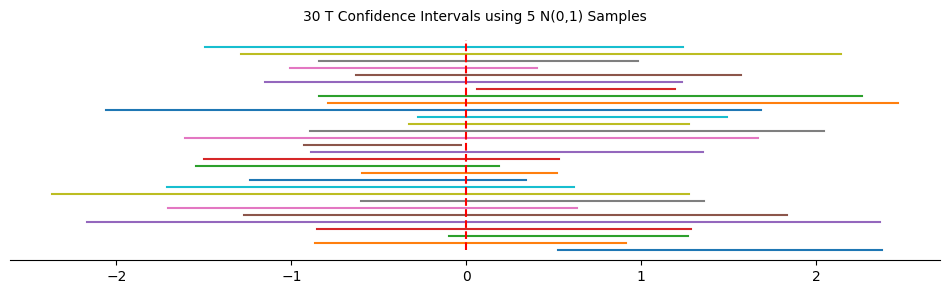

In [ ]:
def main():
    seed = 0
    np.random.seed(seed)

    n_simulations = 30
    n_samples = 5
    data = np.random.normal(size=(n_simulations, n_samples)) # (30,5)
    x_bars, margin_of_errors = compute_t_confidence_interval(data) # (30,), (30,)

    fig, ax = plt.subplots(figsize=(12,3))
    for i, (x_bar, margin_of_error) in enumerate(zip(x_bars, margin_of_errors)):
        ax.plot([x_bar-margin_of_error,x_bar+margin_of_error], [i,i])
    ax.plot([0,0],[0,n_simulations],'--r')
    title = f"{n_simulations} T Confidence Intervals using {n_samples} N(0,1) Samples"
    ax.set_title(title, fontsize=10)
    ax.spines['left'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.spines['top'].set_visible(False)
    ax.set_yticks( () )   
    plt.show()

if __name__ == "__main__":
    main()

#####**Building $t$ Confidence Interval not containing Mean using Real Data**

4 (56394.14765338265, 66331.01234661735)


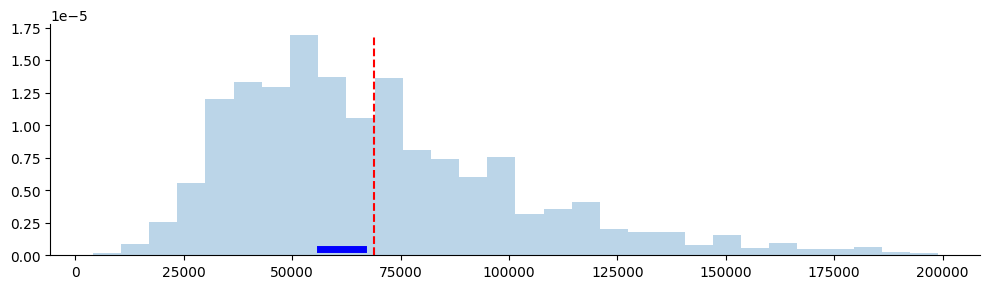

In [ ]:
def main():
    url = 'https://raw.githubusercontent.com/gedeck/practical-statistics-for-data-scientists/master/data/loans_income.csv'
    df = pd.read_csv(url)
    population = df.values.reshape((-1,)) # (50000,)

    seed = 1
    np.random.seed(seed)

    n = 100
    mean_true = 68760.51844
    counter = 0
    while True:
        counter += 1
        data = np.random.choice(population, size=(1,n), replace=False) # (1,100)
        x_bars, margin_of_errors = compute_t_confidence_interval(data) # (1,), (1,)
        left = x_bars[0] - margin_of_errors[0]
        right = x_bars[0] + margin_of_errors[0]
        if (mean_true < left) or (mean_true > right):
            print(counter, (left, right)) 
            break

    fig, ax = plt.subplots(figsize=(12,3))

    # draw the distribution of the original data
    heights, bins, _ = ax.hist(population,bins=30,density=True,alpha=0.3)

    # draw mu
    ax.plot((mean_true,mean_true),(0,heights.max()),'--r')

    # draw confidence interval which does not contain mu
    ax.plot((left,right),(0.05e-5,0.05e-5),'-b',lw=5)

    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    plt.show()

if __name__ == "__main__":
    main()

####**Section 4 Proportion Confidence Interval**

#####**Proportion Confidence Interval**




$$
\begin{array}{ccc}
\displaystyle
\frac{\hat{p}-p}{\sqrt{\frac{p(1-p)}{n}}}\approx \frac{\hat{p}-p}{\sqrt{\frac{\hat{p}(1-\hat{p})}{n}}} \approx N(0,1)
&\Rightarrow&
\hat{p}\pm z_*\sqrt{\frac{\hat{p}(1-\hat{p})}{n}}
\end{array}
$$

######**Proof**

For large $n$ so that we can use the central limit theorem and the law of large numbers, or more specifically for large $n$ such that
$$\begin{array}{ll}
\text{for confidence interval}&n\hat{p}\ge 5, n(1-\hat{p})\ge 5\\
\text{for testing}&np_0\ge 5, n(1-p_0)\ge 5\\
\end{array}$$

$$\begin{array}{lll}
\displaystyle
\hat{p}=\frac{\sum_{k=1}^n1_{A_k}}{n}\ \text{mean $p$, variance $\frac{p(1-p)}{n}$}
&\stackrel{\text{CLT}}{\Rightarrow}&\displaystyle
\hat{p}
\approx N\left(p,\frac{p(1-p)}{n}\right)\\
&\Rightarrow&\displaystyle
\frac{\hat{p}-p}{\sqrt{\frac{p(1-p)}{n}}}\approx N(0,1)\\
&\stackrel{\text{LLN}}{\Rightarrow}&\displaystyle
\frac{\hat{p}-p}{\sqrt{\frac{\hat{p}(1-\hat{p})}{n}}}\approx N(0,1)\\
&\Rightarrow&\displaystyle
\hat{p}\pm z_*\sqrt{\frac{\hat{p}(1-\hat{p})}{n}}
\end{array}$$

#####**Conditions for Proportion Confidence Interval**

- Samples are chosen randomly from the population.

- Sample size is less than 10% of total population so that sampling without replacement can be approximated as sampling with replacement.

- Sample size should be large so that
$$\begin{array}{ll}
\text{for confidence interval}&n\hat{p}\ge 5, n(1-\hat{p})\ge 5\\
\text{for testing}&np_0\ge 5, n(1-p_0)\ge 5\\
\end{array}$$




#####**Example - Tax Increase for More Local School Funding [eng](https://www.khanacademy.org/math/ap-statistics/xfb5d8e68:inference-categorical-proportions/one-sample-z-interval-proportion/v/determining-sample-size-based-on-confidence-and-margin-of-error?modal=1)**

We're told Della wants to make a one-sample z interval to estimate what proportion of her community members favor a tax increase for more local school funding. She wants her margin of error to be no more than plus or minus 2% at the 95% confidence level. What is the smallest sample size required to obtain the desired margin of error?

######**Solution**

In [ ]:
def main():
    confidence_level = 0.95
    alpha = 1 - confidence_level
    z_star = stats.norm().ppf( 1 - alpha / 2 )

    margin_of_error_max = 0.02
    p_max = 0.5 # this p value make p(1-p) largest

    n = 1
    while True:
        n += 1
        margin_of_error_possible_max = z_star * np.sqrt( p_max * ( 1 - p_max ) / n ) 
        if margin_of_error_possible_max <= margin_of_error_max:
            break
    print(f"{n = }") 

if __name__ == "__main__":
    main()

n = 2401


#####**Example - Proportion of Female Artist's Song [eng](https://www.khanacademy.org/math/ap-statistics/xfb5d8e68:inference-categorical-proportions/one-sample-z-interval-proportion/v/example-calculating-confidence-interval?modal=1)**

We're told that Della has over 500 songs on her mobile phone, and she wants to estimate what proportion of the songs are by a female artist. She takes a simple random sample, that's what SRS stands for, of 50 songs on her phone and finds that 20 of the songs sampled are by a female artist. Based on this sample, construct a 99% confidence interval for the proportion of songs on her phone that are by a female artist?

######**Solution**

In [ ]:
def main():
    confidence_level = 0.99
    alpha = 1 - confidence_level

    p_hat = 20 / 50
    n = 50

    z_star = stats.norm().ppf( 1 - alpha / 2 )
    margin_of_error = z_star * np.sqrt( p_hat * ( 1 - p_hat ) / n ) 
    print(f"{p_hat} \u00B1 {margin_of_error:.3f}") 

if __name__ == "__main__":
    main()

0.4 ± 0.178


#####**Code - Proportion Confidence Interval**

In [ ]:
def main():
    data = np.array([[1,0,1,1,0,00,1,0,1,1,0,0,1,1,0,0]])
    p_hat, margin_of_error = compute_proportion_confidence_interval(data)
    print(f"{p_hat[0]} \u00B1 {margin_of_error[0]:.2f}")

if __name__ == "__main__":
    main()

0.5 ± 0.24


#####**Accuracy of Gallup Poll compared to That of a Simple Random Sample**

$$\begin{array}{ccccc}
&\text{Number of}&\text{2SE for simple}&\text{Actual}&\text{Confidence Interval}\\
\text{Year}&\text{likely voters}&\text{random sample (%)}&\text{Error (%)}&\text{contains}\\\hline
1952&3,350&1.8&3.9&\text{No}\\
1956&4,950&1.4&2.1&\text{No}\\
1960&5,100&1.4&1.3&\text{Yes}\\
1964&4,100&1.6&2.9&\text{No}\\
1968&2,700&2.0&0.4&\text{Yes}\\
1972&2,100&2.2&1.8&\text{Yes}\\
1976&2,000&2.2&2.0&\text{Yes}\\
1980&2,000&2.2&3.5&\text{No}\\
1984&2,000&2.2&0.5&\text{Yes}\\
1988&2,600&2.0&2.9&\text{No}\\
1992&1,600&2.4&6.1&\text{No}\\
1996&1,100&3.0&2.8&\text{Yes}\\
2000&2,400&2.0&0.2&\text{Yes}\\
2004&1,600&2.4&1.6&\text{Yes}\\
\end{array}$$

#####**Code - Various Other Proportion Confidence Intervals [wikipedia](https://en.wikipedia.org/wiki/Binomial_proportion_confidence_interval)**

TO DO : fix binom_test

In [ ]:
from statsmodels.stats.proportion import proportion_confint

def generate_data(n, p):
    return np.random.binomial(n, p)

def compute_inverse_cdf_of_standard_normal(prob=0.975):
    return stats.norm.ppf(prob)

def normal(n, x, confidence_level=0.95):
    p_hat = x / n
    alpha = 1 - confidence_level
    z_star = compute_inverse_cdf_of_standard_normal(prob=1-(alpha/2))    
    lo = p_hat - z_star * np.sqrt(p_hat*(1-p_hat)/n) 
    hi = p_hat + z_star * np.sqrt(p_hat*(1-p_hat)/n) 
    return lo, hi

def wilson(n, x, confidence_level=0.95):
    p_hat = x / n
    alpha = 1 - confidence_level
    z = compute_inverse_cdf_of_standard_normal(prob=1-(alpha/2)) 
    
    center = (p_hat + (z**2/(2*n))) / (1 + (z**2/(n))) 
    multiplier = z / (1 + (z**2/n)) 
    width = np.sqrt((p_hat*(1-p_hat)/n) + (z**2/(4*(n**2)))) 
    
    lo = center - multiplier * width 
    hi = center + multiplier * width
    return lo, hi


def wilson_with_continuity_correction(n, x, confidence_level=0.95):
    p_hat = x / n
    alpha = 1 - confidence_level
    z = compute_inverse_cdf_of_standard_normal(prob=1-(alpha/2)) 
    
    center = (2*n*p_hat + z**2) / (2*(n+z**2)) 
    width_lower = (z*np.sqrt(z**2-(1/n)+4*n*p_hat*(1-p_hat)+(4*p_hat-2))+1) / (2*(n+z**2)) 
    width_upper = (z*np.sqrt(z**2-(1/n)+4*n*p_hat*(1-p_hat)-(4*p_hat-2))+1) / (2*(n+z**2))
    
    lo = center - width_lower 
    hi = center + width_upper
    lo = np.maximum(0, lo)
    hi = np.minimum(1, hi)
    return lo, hi


def jeffreys(n, x, confidence_level=0.95):
    # http://www.statsmodels.org/dev/generated/statsmodels.stats.proportion.proportion_confint.html
    # https://github.com/statsmodels/statsmodels/issues/3167
    alpha = 1 - confidence_level
    return proportion_confint(count=x, nobs=n, alpha=alpha, method='jeffrey')


# def binom_test(n, x, confidence_level=0.95):
#     # http://www.statsmodels.org/dev/generated/statsmodels.stats.proportion.proportion_confint.html
#     alpha = 1 - confidence_level
#     lo, hi = proportion_confint(count=x, nobs=n, alpha=alpha, method='binom_test')
#     return lo, hi


def clopper_pearson_beta(n, x, confidence_level=0.95):
    # https://gist.github.com/DavidWalz/8538435
    """
    http://en.wikipedia.org/wiki/Binomial_proportion_confidence_interval
    alpha confidence intervals for a binomial distribution of k expected successes on n trials
    Clopper Pearson intervals are a conservative estimate.
    """
    alpha = 1 - confidence_level
    lo = stats.beta(x, n-x+1).ppf(alpha/2)
    hi = stats.beta(x+1, n-x).ppf(1 - alpha/2)
    return lo, hi


def agresti_coull(n, x, confidence_level=0.95):
    alpha = 1 - confidence_level
    z = compute_inverse_cdf_of_standard_normal(prob=1-(alpha/2)) 
    n_tilde = n + z**2
    x_tilde = x + (z**2/2)
    p_tilde = x_tilde / n_tilde

    center = p_tilde
    multiplier = z
    width = np.sqrt(p_tilde*(1-p_tilde)/n_tilde) 
    
    lo = center - multiplier * width 
    hi = center + multiplier * width
    return lo, hi


if __name__ == '__main__':
    n = 1000
    p = 0.3
    confidence_level = 0.95
    print("Population p     ", f"{p:.4f}")
    
    x = generate_data(n, p)
    
    lo, hi = normal(n, x, confidence_level)
    print("Normal          ", f"[{lo:.4f}, {hi:.4f}]")
    
    lo, hi = wilson(n, x, confidence_level)
    print("Wilson          ", f"[{lo:.4f}, {hi:.4f}]")
    
    lo, hi = wilson_with_continuity_correction(n, x, confidence_level)
    print("Wilson_c_corr   ", f"[{lo:.4f}, {hi:.4f}]")
    
    lo, hi = jeffreys(n, x, confidence_level)
    print("Jeffreys        ", f"[{lo:.4f}, {hi:.4f}]")
    
    # lo, hi = binom_test(n, x, confidence_level)
    # print("binom_test      ", [lo, hi])
    
    lo, hi = clopper_pearson_beta(n, x, confidence_level)
    print("Clopper-Pearson ", f"[{lo:.4f}, {hi:.4f}]")
    
    lo, hi = agresti_coull(n, x, confidence_level)
    print("Agresti-Coull   ", f"[{lo:.4f}, {hi:.4f}]")

Population p      0.3000
Normal           [0.2765, 0.3335]
Wilson           [0.2773, 0.3342]
Wilson_c_corr    [0.2768, 0.3347]
Jeffreys         [0.2771, 0.3341]
Clopper-Pearson  [0.2766, 0.3346]
Agresti-Coull    [0.2772, 0.3342]


In [ ]:
from statsmodels.stats.proportion import proportion_confint

def generate_data(n, p):
    return np.random.binomial(n, p)

if __name__ == '__main__':
    n = 1000
    p = 0.3
    confidence_level = 0.95
    print("Population p     ", f"{p:.4f}")
    
    x = generate_data(n, p)
    
    lo, hi = proportion_confint(x, n, alpha=1-confidence_level, method='normal')
    print("Normal          ", f"[{lo:.4f}, {hi:.4f}]")
    
    lo, hi = proportion_confint(x, n, alpha=1-confidence_level, method='wilson')
    print("Wilson          ", f"[{lo:.4f}, {hi:.4f}]")
    
    lo, hi = proportion_confint(x, n, alpha=1-confidence_level, method='jeffreys')
    print("Jeffreys        ", f"[{lo:.4f}, {hi:.4f}]")
    
    #lo, hi = proportion_confint(x, n, alpha=1-confidence_level, method='binom_test')
    #print("binom_test      ", [lo, hi])
    
    lo, hi = proportion_confint(x, n, alpha=1-confidence_level, method='beta')
    print("Clopper-Pearson ", f"[{lo:.4f}, {hi:.4f}]")
    
    lo, hi = proportion_confint(x, n, alpha=1-confidence_level, method='agresti_coull')
    print("Agresti-Coull   ", f"[{lo:.4f}, {hi:.4f}]")

Population p      0.3000
Normal           [0.2794, 0.3366]
Wilson           [0.2802, 0.3373]
Jeffreys         [0.2800, 0.3371]
Clopper-Pearson  [0.2795, 0.3376]
Agresti-Coull    [0.2802, 0.3373]


####**Section 5 Mean Difference Confidence Interval**

#####**Mean Difference Confidence Interval using $z$ Distribution**

$$
\displaystyle
\frac{ (\bar{X}_1-\bar{X}_2) - (\mu_1-\mu_2) }
{ \sqrt{ \frac{s_1^2}{n_1} + \frac{s_2^2}{n_2} } }
\sim 
z
$$

$$
\displaystyle
\Rightarrow\quad
(\bar{X}_1-\bar{X}_2)\pm z_* \sqrt{ \frac{s_1^2}{n_1} + \frac{s_2^2}{n_2} } 
$$

#####**Mean Difference Confidence Interval using $t$ Distribution - Equal Variance**

$$
\frac{(\bar{X}_1-\bar{X}_2)-(\mu_1-\mu_2)}{\sqrt{\frac{s_p^2}{n_1}+\frac{s_p^2}{n_2}}}\sim t(n_1+n_2-2)
$$
where
$$
s_p^2
=\frac{(n_1-1)s_1^2+(n_2-1)s_2^2}{n_1+n_2-2}
=\frac{\sum_{i=1}^{n_1}\left(X^{(1)}_i-\bar{X}_1\right)^2+\sum_{i=1}^{n_2}\left(X^{(2)}_i-\bar{X}_2\right)^2}{n_1+n_2-2}
$$

$$\begin{array}{c}
\\
\\
\displaystyle
\Rightarrow\quad
(\bar{X}_1-\bar{X}_2)\pm t_*
\sqrt{\frac{s_p^2}{n_1}+\frac{s_p^2}{n_2}}
\end{array}$$


#####**Mean Difference Confidence Interval using $t$ Distribution - Unequal Variance**

$$
\frac{ (\bar{X}_1-\bar{X}_2) - (\mu_1-\mu_2) }
{ \sqrt{ \frac{s_1^2}{n_1} + \frac{s_2^2}{n_2} } }
\sim t\left(
    \frac{ \left( \frac{s_1^2}{n_1} + \frac{s_2^2}{n_2} \right)^2 }
    {
        \frac{ \left(\frac{s_1^2}{n_1}\right)^2 }{ n_1 }
        +
        \frac{ \left(\frac{s_2^2}{n_2}\right)^2 }{ n_2 }
    }
    \right)
$$

$$\begin{array}{c}
\\
\\
\displaystyle
\Rightarrow\quad
(\bar{X}_1-\bar{X}_2)\pm t_*
\sqrt{\frac{s_1^2}{n_1}+\frac{s_2^2}{n_2}}
\end{array}$$

#####**Example - Body Temperature after Exercise [eng](https://www.khanacademy.org/math/ap-statistics/xfb5d8e68:inference-quantitative-means/two-sample-t-interval-means/v/calculating-confidence-interval-for-difference-of-means?modal=1)**

Kylie suspected that when people exercise longer, their body temperatures change. She randomly assigned people to exercise for 30 or 60 minutes, then measured their temperatures. The 18 people who exercised for 30 minutes had a mean temperature of $\bar{x}_{30}=38.3^oC$ with a standard deviation $s_{30}=0.27^oC$. The 24 people who exercised 60 minutes had a mean temperature of $\bar{x}_{60}=38.9^oC$ with a standard deviation $s_{60}=0.29^oC$. Assume that the conditions for inference have been met, construct a 90% confidence interval for the difference $\mu_{60}-\mu_{30}$ in mean body temperature after exercising for the two amounts of time? 

######**Solution**

In [ ]:
def main():
    X_1_bar, X_2_bar = 38.9, 38.3 # 60 minutes workout is 1 and 30 is 2
    s_1, s_2 = 0.29, 0.27
    n_1, n_2 = 24, 18

    s_p_square = ( (n_1-1) * s_1**2 + (n_2-1) * s_2**2 ) / ( n_1 + n_2 - 2 )
    df = n_1 + n_2 - 2

    confidence_level = 0.90
    alpha = 1 - confidence_level
    t_star = - stats.t(df).ppf(alpha/2)
    margin_of_error = t_star * np.sqrt( s_p_square / n_1 + s_p_square / n_2 )  
    print(f"{confidence_level:.0%} confidence interval : {X_1_bar-X_2_bar:.4f} \u00b1 {margin_of_error:.4f}")

if __name__ == "__main__":
    main()

90% confidence interval : 0.6000 ± 0.1479


####**Section 6 Pair Difference Confidence Interval**

#####**Pair Difference Confidence Interval**

If $D_k=X_k-Y_k$ are iid $N(\mu,\sigma^2)$,

$$\begin{array}{lcl}
\displaystyle
\bar{D}=\frac{\sum_{k=1}^nD_k}{n}\ \text{normal with mean $\mu$, variance $\frac{\sigma^2}{n}$}
&\stackrel{\text{Property of $N$}}{\Rightarrow}&\displaystyle
\bar{D}
\approx N\left(\mu,\frac{\sigma^2}{n}\right)\\
&\Rightarrow&\displaystyle
\frac{\bar{D}-\mu}{\frac{\sigma}{\sqrt{n}}}\approx N(0,1)\\
&\stackrel{\text{Property of $t$}}{\Rightarrow}&\displaystyle
\frac{\bar{D}-\mu}{\frac{s}{\sqrt{n}}}\approx t(n-1)\\
&\Rightarrow&\displaystyle
\bar{d}\pm t_*(n-1)\frac{s}{\sqrt{n}}
\end{array}$$

#####**Example - Snapping Fingers [eng](https://www.khanacademy.org/math/ap-statistics/xfb5d8e68:inference-quantitative-means/one-sample-t-interval-mean/v/confidence-interval-for-a-mean-difference?modal=1)**

The investigation aimed to ascertain the speed disparity in finger-snapping ability between the dominant and non-dominant hands among a group of friends. To achieve this, each participant undertook a finger-snapping exercise, allotting 10 seconds to both their dominant and non-dominant hands. The selection of the initial hand for each participant was determined through a coin toss, as an exploration of potential confounding factors, such as fatigue or unknown variables that could impact performance, led to the decision to introduce randomness in the hand usage order. The resultant dataset encompasses the recorded quantities of finger snaps performed by each hand for every participant, along with the discrepancies observed between the two hands for each individual. 

||Dominant Snapping|Non Dominant Snapping|Difference|
|:---:|:---:|:---:|:---:|
|Jeff|44|35|9|
|David|42|37|5|
|Kim|40|32|8|
|Charlotte|37|31|6|
|Jake|42|36|6|

Create and interpret a 95% confidence interval for mean difference in number of snaps for these participants. 


######**Solution**

In [ ]:
def main():
    data = np.array([9,5,8,6,6])
    d_bar = data.mean()
    s = data.std(ddof=1)
    n = data.shape[0] 

    df = n - 1
    confidence_level = 0.95
    alpha = 1 - confidence_level
    t_star = stats.t(df).ppf(1-alpha/2)
    margin_of_error = t_star * s / np.sqrt(n)
    print(f"{d_bar} \u00b1 {margin_of_error:.4f}")

if __name__ == "__main__":
    main()

6.8 ± 2.0403


####**Section 7 Proportion Difference Confidence Interval [eng](https://www.khanacademy.org/math/ap-statistics/xfb5d8e68:inference-categorical-proportions/two-sample-z-interval-proportions/v/confidence-intervals-for-the-difference-between-two-proportions?modal=1)**

#####**Proportion Difference Confidence Interval**

$$\begin{array}{lllll}
\displaystyle
z&=&\displaystyle\frac{(\hat{p}_1-\hat{p}_2)-(p_1-p_2)}{\sqrt{\frac{p_1(1-p_1)}{n_1}+\frac{p_2(1-p_2)}{n_2}}}
&\approx&\displaystyle
\frac{(\hat{p}_1-\hat{p}_2)-(p_1-p_2)}{\sqrt{\frac{\hat{p}_1(1-\hat{p}_1)}{n_1}+\frac{\hat{p}_2(1-\hat{p}_2)}{n_2}}}\\
\end{array}$$

$$\begin{array}{lcl}
\\
&\Rightarrow&\displaystyle
(\hat{p}_1-\hat{p}_2)\pm z_*\sqrt{\frac{\hat{p}_1(1-\hat{p}_1)}{n_1}+\frac{\hat{p}_2(1-\hat{p}_2)}{n_2}}
\end{array}$$

#####**Example - Construction of New High School [eng](https://www.khanacademy.org/math/ap-statistics/xfb5d8e68:inference-categorical-proportions/two-sample-z-interval-proportions/v/calculating-two-sample-z-interval-confidence-interval-for-difference-of-proportions?modal=1)**

Duncan is investigating if residents of a city support the construction of a new high school. He is curious about the difference of opinion between residents in the north and south parts of the city. He obtained separate random samples of voters from each region. Here are the results. 

|Suppot Construction?|North|South|
|:---:|:---:|:---:|
|Yes|54|77|
|No|66|63|
|Total|120|140|

Based on these results, construct a 90% confidence interval to estimate the difference $p_N-p_S$, where $p_N$ and $p_S$ are support rates from the north and south. 



######**Solution**

In [ ]:
def main():
    n_1 = 120 # north
    n_2 = 140 # south

    p_1_hat = 54 / n_1 # north
    p_2_hat = 77 / n_2 # south

    confidence_level = 0.90
    alpha = 1 - confidence_level
    z_star = - stats.norm().ppf(alpha/2) 
    margin_of_error = z_star * np.sqrt( p_1_hat * ( 1 - p_1_hat ) / n_1 + p_2_hat * ( 1 - p_2_hat ) / n_2 )
    print(f"90% confidence interval : {p_1_hat- p_2_hat:.4f} \u00b1 {margin_of_error:.4f}")

if __name__ == "__main__":
    main()

90% confidence interval : -0.1000 ± 0.1018


### **Chapter 12 Testing**

####**Section 1 Testing**

#####**Null and Alternative Hypothesis [eng](https://www.youtube.com/watch?v=0oc49DyA3hU)**

$$\begin{array}{llll}
H_0&\text{Null Hypothesis}&&\text{An observed difference is due to chance}\\
H_1\ (\text{or}\ H_a)&\text{Alternative Hypothesis}&&\text{An observed difference cannot be explained by the chance model of null hypothesis}\\
\end{array}$$



#####**Conditions for Test**

- **[Simple Random Sample]** Samples are chosen randomly from the population.

- **[Independent Sample]** We choose samples with replacement or the sample size is less than 10% of the total population so that we can approximate the sampling without replacement as the sampling with replacement. 

- **[Normal Distribution]** Population distribution is a normal distribution, or the sample size is large, e.g., $n\ge30$ for non-proportion cases and $n_0p_0\ge 10$, $n_0(1-p_0)\ge 10$, $n_1p_1\ge 10$, $n_1(1-p_1)\ge 10$ for proportion cases if applicable so that we can approximate the sample mean distribution as a normal distribution by the central limit theorem.



#####**Example - Quality Control [eng](https://www.khanacademy.org/math/ap-statistics/xfb5d8e68:inference-quantitative-means/one-sample-t-test-mean/v/writing-hypotheses-for-significance-test-about-means?modal=1)**

A quality control expert at a drink bottling factory took a random sample of bottles from a batch and measured the amount of liquid in each bottle in the sample. The amounts in the sample had a mean of 503 mL and a standard deviation of 5 mL. They want to test if this is convincing evidence that the mean amount for bottles in this batch is different than the target value of 500 mL. Let $\mu$ be the mean amount of liquid in each bottle in the batch. Write an appropriate set of hypotheses for their significance test.



######**Solution**

$$
H_0:\mu=500
\quad\text{vs}\quad
H_1:\mu\neq500
$$

#####**Big Picture**

$$\begin{array}{lll}
\text{Preliminary Study}
&\Rightarrow&
\text{Set Null and Alternative}\\
\\
&\Rightarrow&
\text{Further Intensive Studies}\\
\\
&\Rightarrow&
\left\{\begin{array}{lll}
\text{Alternative is your final decision}&&\text{if Further Intensive Studies provide}\\
\text{(Reject Null - Statistician's Jargon)}&&\text{too much evediences againt the null}\\
\\
\text{Null is your final decision}&&\text{if Further Intensive Studies do not provide}\\
\text{(Cannot Reject Null - Statistician's Jargon)}&&\text{enough evediences againt the null}\\
\end{array}\right.
\end{array}$$

#####**statistic and p-value [eng](https://www.youtube.com/watch?v=vemZtEM63GY)**

$$\begin{array}{lll}
\text{observed}&&\displaystyle\text{observed value}\\
\text{expected}&&\displaystyle\text{expectation of the random variable "observed" under $H_0$}\\
\text{standard error (SE)}&&\text{(estimated) standard deviation of the random variable "observed" under $H_0$}\\
\text{statistic}&&\displaystyle\frac{\text{observed}-\text{expected}}{\text{SE}}\\
\text{sampling distribution}&&\displaystyle\text{distribution of}\quad\frac{\text{the random variable "observed"}-\text{expected}}{\text{SE}}\quad\text{under $H_0$}\\
\text{p-value}&&P\left(
    \begin{array}{ll}\text{producing an observed statistic}\\
    \text{or more extreme numbers againt the null}\end{array}\Big|\text{sampling distribution}\right)\\
\end{array}$$

#####**Test Names - Hypothesis**

$$\begin{array}{lll}
\text{Two-Sided}&&\displaystyle\text{$H_0$ : $\mu=\mu_0$ vs $H_1$ : $\mu\neq\mu_0$}\\
\text{Less}&&\displaystyle\text{$H_0$ : $\mu=\mu_0$ vs $H_1$ : $\mu<\mu_0$}\\
\text{Greater}&&\displaystyle\text{$H_0$ : $\mu=\mu_0$ vs $H_1$ : $\mu>\mu_0$}\\
\end{array}$$

#####**Test Names - Data**

$$\begin{array}{lll}
\text{One Sample Test}&&\displaystyle\text{data set is}\ \{x_1,\cdots,x_n\}\\
\text{Two Sample Test}&&\displaystyle\text{data set is}\ \{x_1,\cdots,x_n\}\ \text{and}\ \{y_1,\cdots,y_m\}\\
\text{Paired Sample Test}&&\displaystyle\text{data set is}\ \{(x_1,y_1),\cdots,(x_n,y_n)\}\\
\end{array}$$

#####**Test Names - Sampling Distribution**

$$\begin{array}{lll}
\text{$z$ Test}&&\displaystyle\text{sampling distribution is $z$}\\
\text{$t$ Test}&&\displaystyle\text{sampling distribution is $t$}\\
\text{$f$ Test}&&\displaystyle\text{sampling distribution is $f$}\\
\text{$\chi^2$ Test}&&\displaystyle\text{sampling distribution is $\chi^2$}\\
\text{Proportion Test}&&\displaystyle\text{all data points are either 0 or 1}\\
\end{array}$$

#####**Test Names**

$$\begin{array}{ccc}
\text{Two-Sided}&\text{Two Sample}&\text{$z$ Test}\\
\uparrow&\uparrow&\uparrow\\
\text{Hypothesis}&\text{Data}&\text{Sampling Distribution}\\
\end{array}$$

#####**Example - Automated Drink Machine [eng](https://www.khanacademy.org/math/ap-statistics/xfb5d8e68:inference-categorical-proportions/idea-significance-tests/v/examples-of-null-and-alternative-hypotheses?modal=1)**

We are told a restaurant owner installed a new automated drink machine. The machine is designed to dispense 530 milliliters of liquid on the medium size setting. The owner suspects that the machine may be dispensing too much in medium drinks. They decide to take a sample of 30 medium drinks to see if the average amount is significantly greater than 530 milliliters. What are appropriate hypotheses for their significance test? 

######**Solution**

$$\begin{array}{lll}
H_0&:&\mu=530\\
H_1&:&\mu>530
\end{array}$$

#####**Type I and Type II Error [eng](https://www.khanacademy.org/math/ap-statistics/xfb5d8e68:inference-categorical-proportions/error-probabilities-power/v/introduction-to-type-i-and-type-ii-errors?modal=1)**

||Choose H0|Choose H1|
|---|---|---|
|H0||Type I Error|
|H1|Type II Error||



#####**Example - Unemployment Rate [eng](https://www.khanacademy.org/math/ap-statistics/xfb5d8e68:inference-categorical-proportions/error-probabilities-power/v/examples-identifying-type-i-and-type-ii-errors?modal=1)**

A large nationwide poll recently showed an unemployment rate of 9% in the United States. The mayor of a local town wonders if this national result holds true for her town, so she plans on taking a sample of her residents to see if the unemployment rate is significantly different than 9% in her town. Let $p$ represent the unemployment rate in her town. Here are the hypotheses she'll use.

$$\begin{array}{lll}
H_0&:&p=0.09\\
H_1&:&p\neq 0.09
\end{array}$$


Under what conditions would the mayor commit a Type I error?

######**Solution**

The town's unemployment rate is $9\%$. However, she concludes otherwise.

#####**p-value and Significance level $\alpha$ [eng](https://www.khanacademy.org/math/ap-statistics/xfb5d8e68:inference-categorical-proportions/idea-significance-tests/v/p-values-and-significance-tests?modal=1)**

$$\begin{array}{lllllll}
\mbox{p-value}\le\alpha
&\Rightarrow&\text{we observe extremely rare p-value if $H_0$ is true}
&\Rightarrow&\text{Choose $H_1$}\\
\mbox{p-value}>\alpha
&\Rightarrow&\text{we observe not so extremely rare p-value if $H_0$ is true}&\Rightarrow&\text{Choose $H_0$}\\
\end{array}$$

#####**Power [eng](https://www.khanacademy.org/math/ap-statistics/xfb5d8e68:inference-categorical-proportions/error-probabilities-power/v/introduction-to-power-in-significance-tests?modal=1)**

$$\begin{array}{lll}
\mbox{power}&=&1-P(\mbox{Type II Error})
\end{array}$$

#####**Example - Pennies [eng](https://www.khanacademy.org/math/ap-statistics/xfb5d8e68:inference-categorical-proportions/idea-significance-tests/v/comparing-p-value-diff-significance-levels?modal=1)**

Rahim heard that spinning, rather than flipping, a penny raises the probability above 50% that the penny lands showing heads. That's actually quite fascinating if that's true. He tested this by spinning 10 different pennies 10 times each, so that would be a total of a hundred spins. His hypotheses were

$$\begin{array}{lll}
H_0&:&p=0.5\\
H_1&:&p>0.5
\end{array}$$

In his 100 spins, the penny landed showing heads in 59 spins. Rahim calculated that the statistic, so this is the sample proportion here, it's 59 out of a hundred were heads so that's 0.59 or 59 hundredths, and he calculated had an associated p-value of approximately 0.036. Using significance level 5%, draw your conclusion.

######**Solution**

$$\begin{array}{lllllll}
\mbox{p-value}=0.036\le\alpha=0.05
&\Rightarrow&\text{we observe extremely rare p-value if $H_0$ is true}
&\Rightarrow&\text{Choose $H_1$}\\
\end{array}$$

#####**Example - Estimation of p-value using Simulation [eng](https://www.khanacademy.org/math/ap-statistics/xfb5d8e68:inference-categorical-proportions/idea-significance-tests/v/estimating-p-value-from-simulation?modal=1)**

Evie read an article that said 6% of teenagers were vegetarians, but she thinks it's higher for students at her school. To test her theory, Evie took a random sample of 25 students at her school, and 20% of them were vegetarians. 

$$\begin{array}{lll}
H_0&:&p=0.06\\
H_1&:&p>0.06
\end{array}$$

 To see how likely a sample like this was to happen by random chance alone, Evie performed a simulation. She simulated 40 samples of $n=25$ students from a large population where 6% of the students were vegetarian. Using this strategy estimate the p-value.

######**Solution**

In [ ]:
def main():
    statistic = 0.2

    seed = 0
    np.random.seed(seed)

    p = 0.06
    num_samples = 40
    n = 25
    random_samples = np.random.binomial(1, p, size=(num_samples, n)).sum(axis=1) / n

    zero_one = np.zeros_like(random_samples)
    zero_one[random_samples >= statistic] = 1
    estimated_p_value = zero_one.sum() / num_samples
    print(f"{estimated_p_value = }") 

if __name__ == "__main__":
    main()

estimated_p_value = 0.025


####**Section 2 z Score**

#####**z Score [eng](https://www.khanacademy.org/math/ap-statistics/density-curves-normal-distribution-ap/measuring-position/v/z-score-introduction?modal=1)**

$$
\text{z_score}=\frac{X-\mu}{\sigma}
$$

z_score.round(2) = array([-0.59, -0.59,  0.  , -0.59,  1.18, -1.18,  1.77])



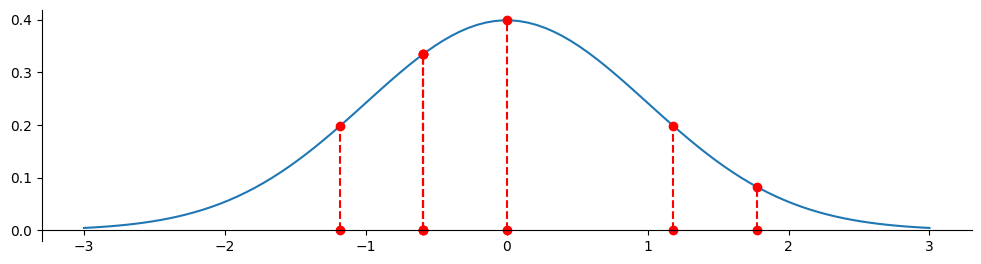

In [ ]:
def main():
    data = np.array([2, 2, 3, 2, 5, 1, 6])
    mu = data.mean()
    sigma = data.std()

    z_score = (data - mu) / sigma
    print(f"{z_score.round(2) = }", end="\n\n")

    fig, ax = plt.subplots(figsize=(12,3))
    x = np.linspace(-3,3,100)
    y = stats.norm().pdf(x)
    ax.plot(x,y)
    for z_score_data_point in z_score:
        x = z_score_data_point 
        y = stats.norm().pdf(x) 
        ax.plot([x,x], [0,y], "--or")
    ax.spines["top"].set_visible(False)
    ax.spines["right"].set_visible(False)
    ax.spines["bottom"].set_position("zero")
    plt.show()

if __name__ == "__main__":
    main()

#####**Example - LSAT vs MCAT [eng](https://www.khanacademy.org/math/ap-statistics/density-curves-normal-distribution-ap/measuring-position/v/comparing-with-z-scores?modal=1)**

Before applying to law school in the US, students need to take an exam called the LSAT. Before applying to medical school, students need to take an exam called the MCAT. Here are some summary statistics for each exam. 

|Exam|Mean|Standard Deviation|
|:---:|:---:|:---:|
|LSAT|151|10|
|MCAT|25.1|6.4|

Juwan took both exams. He scored 172 on the LSAT and 37 on the MCAT. Which exam did he do relatively better on?

######**Solution**

Juwan's LSAT z Score : 2.10
Juwan's MCAT z Score : 1.86


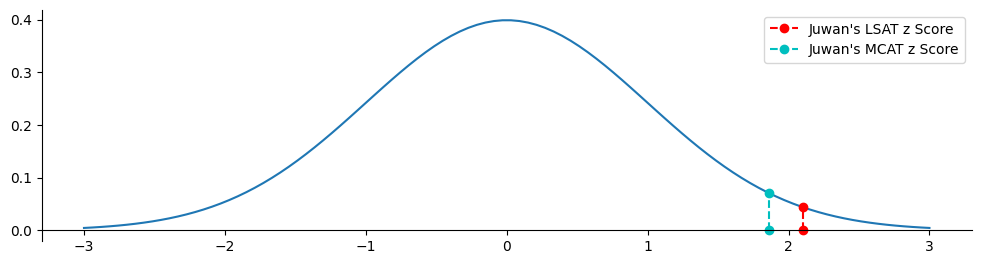

In [ ]:
def compute_z_score(x, mu, sigma):
    return ( x - mu ) / sigma

def main():
    lsat = {"mu":151,"sigma":10,"Juwan's Score":172}
    mcat = {"mu":25.1,"sigma":6.4,"Juwan's Score":37}

    mu, sigma, score = lsat.values()
    z_score_lsat = compute_z_score(score, mu, sigma)
    print(f"Juwan's LSAT z Score : {z_score_lsat:.2f}")

    mu, sigma, score = mcat.values()
    z_score_mcat = compute_z_score(score, mu, sigma)
    print(f"Juwan's MCAT z Score : {z_score_mcat:.2f}")

    fig, ax = plt.subplots(figsize=(12,3))
    x = np.linspace(-3,3,100)
    y = stats.norm().pdf(x)
    ax.plot(x,y)
    for z_score, label, color in zip([z_score_lsat, z_score_mcat], ["Juwan's LSAT z Score", "Juwan's MCAT z Score"], ["red", "c"]):
        x = z_score
        y = stats.norm().pdf(x) 
        ax.plot([x,x], [0,y], "--o", color=color, label=label)
    ax.legend()
    ax.spines["top"].set_visible(False)
    ax.spines["right"].set_visible(False)
    ax.spines["bottom"].set_position("zero")
    plt.show()

if __name__ == "__main__":
    main()

#####**Example - Minimum Resting Pulse Rate [eng](https://www.khanacademy.org/math/ap-statistics/density-curves-normal-distribution-ap/normal-distributions-calculations/v/finding-z-score-for-a-percentile?modal=1)**

The distribution of resting pulse rates of all students at Santa Maria High School was approximately normal with mean of 80 beats per minute and standard deviation of nine beats per minute. The school nurse plans to provide additional screening to students whose resting pulse rates are in the top 30% of the students who were tested. What is the minimum resting pulse rate at that school for students who will receive additional screening? 

######**Solution**

Minimum Resting Pulse Rate : 84.72


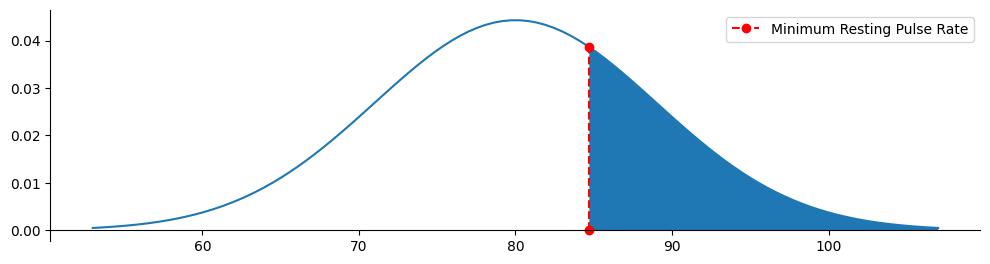

In [ ]:
def main():
    mu, sigma = 80, 9

    z_score_top_30_percentage = stats.norm().ppf(1-0.30)
    minimum_resting_pulse_rate = z_score_top_30_percentage * sigma + mu
    print(f"Minimum Resting Pulse Rate : {minimum_resting_pulse_rate:.2f}")

    left = -3 * sigma + mu
    right = 3 * sigma + mu

    fig, ax = plt.subplots(figsize=(12,3))
    ax.plot(
        np.linspace(left,right,100),
        stats.norm(loc=mu, scale=sigma).pdf(np.linspace(left,right,100))
        )
    x = minimum_resting_pulse_rate
    y = stats.norm(loc=mu, scale=sigma).pdf(x) 
    ax.plot([x,x], [0,y], "--or", label="Minimum Resting Pulse Rate")
    ax.fill_between(
        np.linspace(minimum_resting_pulse_rate, right, 100), 
        stats.norm(loc=mu, scale=sigma).pdf(np.linspace(minimum_resting_pulse_rate,right,100)), 
        np.zeros(100)
        )
    ax.legend()
    ax.spines["top"].set_visible(False)
    ax.spines["right"].set_visible(False)
    ax.spines["bottom"].set_position("zero")
    plt.show()

if __name__ == "__main__":
    main()

#####**Example - Laptop Price [eng](https://www.khanacademy.org/math/ap-statistics/density-curves-normal-distribution-ap/normal-distributions-calculations/v/z-table-for-proportion-between-values?modal=1)**

A set of laptop prices are normally distributed with a mean of \$750 and a standard deviation of \$60. What proportion of laptop prices are between \$624 and \$768? 

######**Solution**

proportion of laptop prices between 626 dollars and 768 dollars : 0.5985



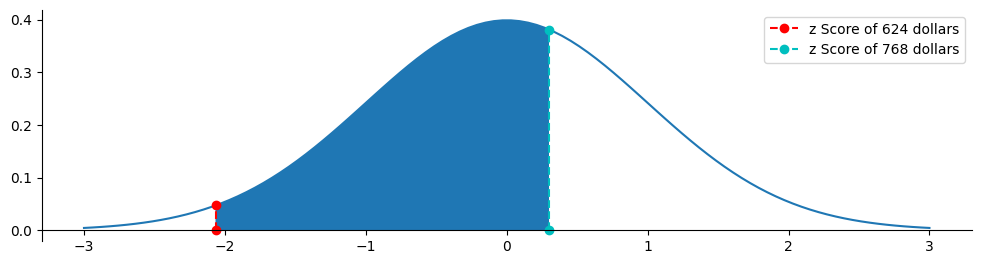

In [ ]:
def main():
    mu = 750
    sigma = 60

    left =626
    right = 768
    z_score_left = compute_z_score(left, mu, sigma)
    z_score_right = compute_z_score(right, mu, sigma)
    area_under_the_curve = stats.norm().cdf(z_score_right) - stats.norm().cdf(z_score_left)
    print(f"proportion of laptop prices between {left} dollars and {right} dollars : {area_under_the_curve:.4f}", end="\n\n")

    fig, ax = plt.subplots(figsize=(12,3))
    ax.plot(np.linspace(-3,3,100), stats.norm().pdf(np.linspace(-3,3,100)))
    x = z_score_left
    y = stats.norm().pdf(x) 
    ax.plot([x,x], [0,y], "--or", label="z Score of 624 dollars")
    x = z_score_right
    y = stats.norm().pdf(x) 
    ax.plot([x,x], [0,y], "--oc", label="z Score of 768 dollars")
    ax.fill_between(np.linspace(z_score_left,z_score_right,100), stats.norm().pdf(np.linspace(z_score_left,z_score_right,100)), np.zeros(100))
    ax.legend()
    ax.spines["top"].set_visible(False)
    ax.spines["right"].set_visible(False)
    ax.spines["bottom"].set_position("zero")
    plt.show()

if __name__ == "__main__":
    main()

####**Section 3 z Score and p-value**

#####**Example - Darnell's Height [eng](https://www.khanacademy.org/math/ap-statistics/density-curves-normal-distribution-ap/normal-distributions-calculations/v/z-table-for-proportion-below?modal=1)**

A set of middle school student heights are normally distributed with a mean of 150 centimesters and a standard deviation of 20 centimeters. Darnell is a middle school school student with a height of 161.4 centimeters. What proportion of student heights are lower than Darnell's height? 

######**Solution**

proportion of student heights that are lower than Darnell's height : 0.7157



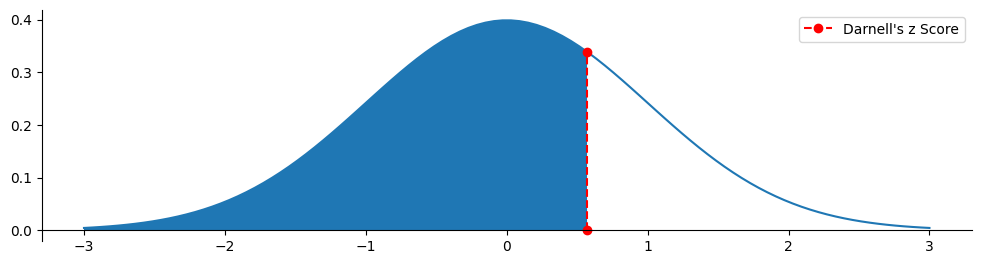

In [ ]:
def main():
    mu = 150
    sigma = 20
    x = 161.4
    z_score = ( x - mu ) / sigma
    cdf = stats.norm().cdf(z_score)
    print(f"proportion of student heights that are lower than Darnell's height : {cdf:.4f}", end="\n\n")

    fig, ax = plt.subplots(figsize=(12,3))
    ax.plot(np.linspace(-3,3,100), stats.norm().pdf(np.linspace(-3,3,100)))
    x = z_score
    y = stats.norm().pdf(x) 
    ax.plot([x,x], [0,y], "--or", label="Darnell's z Score")
    ax.fill_between(np.linspace(-3,z_score,100), stats.norm().pdf(np.linspace(-3,z_score,100)), np.zeros(100))
    ax.legend()
    ax.spines["top"].set_visible(False)
    ax.spines["right"].set_visible(False)
    ax.spines["bottom"].set_position("zero")
    plt.show()

if __name__ == "__main__":
    main()

#####**Example - Juwan's MCAT Score**

Before applying to law school in the US, students need to take an exam called the LSAT. Before applying to medical school, students need to take an exam called the MCAT. Here are some summary statistics for each exam. 

|Exam|Mean|Standard Deviation|
|:---:|:---:|:---:|
|LSAT|151|10|
|MCAT|25.1|6.4|

Juwan took both exams. He scored 172 on the LSAT and 37 on the MCAT. 
What proportion of student MCAT scores are heiger than Juwan's MCAT score? 

######**Solution**

proportion of student MCAT scores that are higher than Juwan's : 0.0315



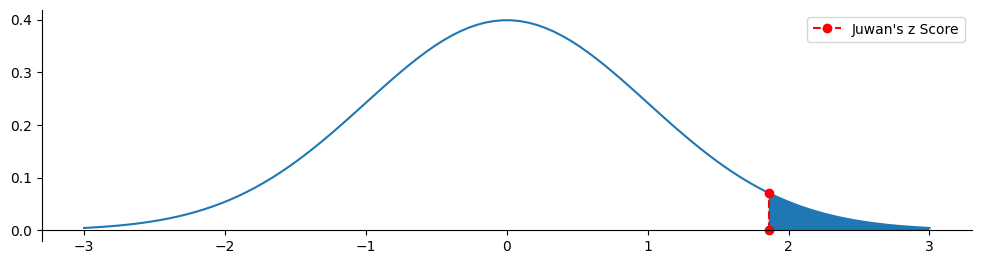

In [ ]:
def main():
    mcat = {"mu":25.1,"sigma":6.4,"Juwan's Score":37}
    mu, sigma, score = mcat.values()
    z_score = compute_z_score(score, mu, sigma)
    sf = stats.norm().sf(z_score)
    print(f"proportion of student MCAT scores that are higher than Juwan's : {sf:.4f}", end="\n\n")

    fig, ax = plt.subplots(figsize=(12,3))
    ax.plot(np.linspace(-3,3,100), stats.norm().pdf(np.linspace(-3,3,100)))
    x = z_score
    y = stats.norm().pdf(x) 
    ax.plot([x,x], [0,y], "--or", label="Juwan's z Score")
    ax.fill_between(np.linspace(z_score,3,100), stats.norm().pdf(np.linspace(z_score,3,100)), np.zeros(100))
    ax.legend()
    ax.spines["top"].set_visible(False)
    ax.spines["right"].set_visible(False)
    ax.spines["bottom"].set_position("zero")
    plt.show()

if __name__ == "__main__":
    main()

#####**Example - 26% of Americans can speak more than one language [doc](https://www.khanacademy.org/math/ap-statistics/xfb5d8e68:inference-categorical-proportions/xfb5d8e68:carrying-out-test-proportion/v/calculating-p-value-from-z-table?modal=1)**

Fay read an article that said 26% of Americans can speak more than one language. She was curious if this figure was higher in her city, so she tested her null hypothesis that the proportion in her city is the same as all Americans, 26%. Her alternative hypothesis is it's actually greater than 26%; so she tested $H_0:p=0.26$ vs $H_1:p>0.26$, where $p$ represents the proportion of people in her city that can speak more than one language. 

She found that 40 of 120 people sampled could speak more than one language. Assuming that necessary conditions are met wht is the approximate p-value for Fay's test? 


######**Solution**

probability of getting samples that are more extreme than Fay's under H_0 : 0.0335



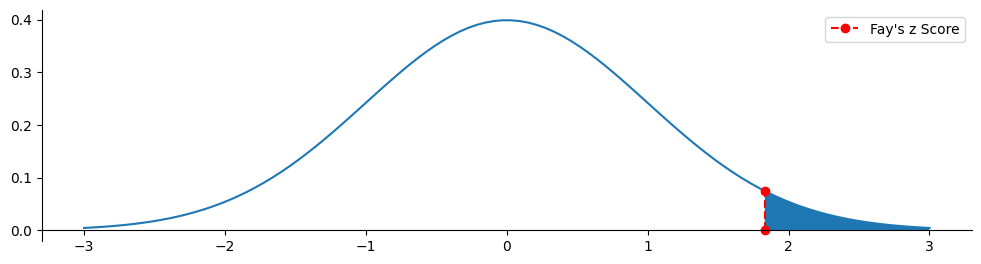

In [ ]:
def main():
    # population parameters under H_0
    p = 0.26

    # sample info
    n = 120
    p_hat = 40 / 120
    mu = p # mean of p_hat under H_0
    sigma = np.sqrt( p * ( 1 - p ) / n) # starndard deviation of p_hat under H_0 
    z_score = compute_z_score(p_hat, mu, sigma)
    sf = stats.norm().sf(z_score)
    print(f"probability of getting samples that are more extreme than Fay's under H_0 : {sf:.4f}", end="\n\n")

    fig, ax = plt.subplots(figsize=(12,3))
    ax.plot(np.linspace(-3,3,100), stats.norm().pdf(np.linspace(-3,3,100)))
    x = z_score
    y = stats.norm().pdf(x) 
    ax.plot([x,x], [0,y], "--or", label="Fay's z Score")
    ax.fill_between(np.linspace(z_score,3,100), stats.norm().pdf(np.linspace(z_score,3,100)), np.zeros(100))
    ax.legend()
    ax.spines["top"].set_visible(False)
    ax.spines["right"].set_visible(False)
    ax.spines["bottom"].set_position("zero")
    plt.show()

if __name__ == "__main__":
    main()

####**Section 4 One Sample z Test**

#####**One Sample z Test**

For large $n$ so that we can use the central limit theorem and the law of large numbers

$$\begin{array}{lll}
\displaystyle
\bar{X}=\frac{\sum_{k=1}^nX_k}{n}\ \text{mean $\mu$, variance $\frac{\sigma^2}{n}$}
&\stackrel{\text{CLT}}{\Rightarrow}&\displaystyle
\bar{X}
\approx N\left(\mu,\frac{\sigma^2}{n}\right)\\
&\Rightarrow&\displaystyle
\frac{\bar{X}-\mu}{\frac{\sigma}{\sqrt{n}}}\approx N(0,1)\\
&\stackrel{\text{LLN}}{\Rightarrow}&\displaystyle
\frac{\bar{X}-\mu}{\frac{s}{\sqrt{n}}}\approx N(0,1)\\
&\Rightarrow&\displaystyle
\bar{x}\pm z_*\frac{s}{n}
\end{array}$$

#####**One Sample z Test - Two Sided**

$$
\text{$H_0$ : $\mu=50$ vs $H_1$ : $\mu\neq50$}
$$

```
    # samples
    n = 500
    x_bar = 48
    s = 20.3
```

statistic : -2.2030
p value   : 0.027593
We choose H_1, or using statistician's jargon, reject H_0



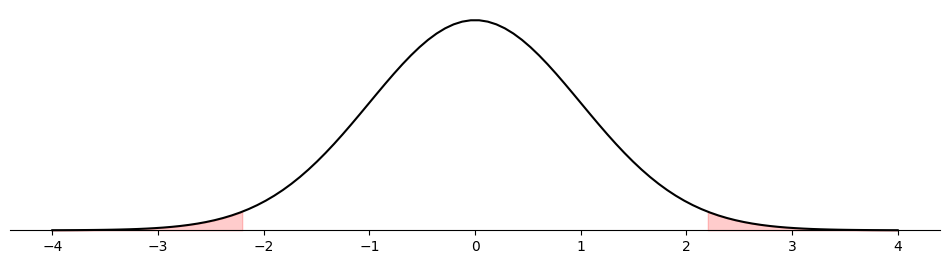

In [ ]:
def main():
    # H0 : mu = 50 vs H1 : mu != 50
    mu = 50

    # samples
    n = 500
    x_bar = 48
    s = 20.3

    # statistic and p value
    statistic = (x_bar - mu) / ( s / np.sqrt(n) )
    p_value = stats.norm().sf(abs(statistic)) * 2
    print("statistic : {:.4f}".format(statistic))
    print("p value   : {:4f}".format(p_value))

    alpha = 0.05
    if p_value <= alpha:
        print("We choose H_1, or using statistician's jargon, reject H_0", end="\n\n")
    else:
        print("We choose is H_0, or using statistician's jargon, fail to reject H_0", end="\n\n")
    
    fig, ax = plt.subplots(figsize=(12,3))
    plot_z_statisitc(statistic, ax=ax, alternative='two-sided')
    plt.show()

if __name__ == "__main__":
    main()

#####**One Sample z Test - Less**

$$
\text{$H_0$ : $\mu=50$ vs $H_1$ : $\mu<50$}
$$

```
    # samples
    n = 500
    x_bar = 48
    s = 20.3
```

statistic : -2.2030
p value   : 0.0138
We choose H_1, or using statistician's jargon, reject H_0



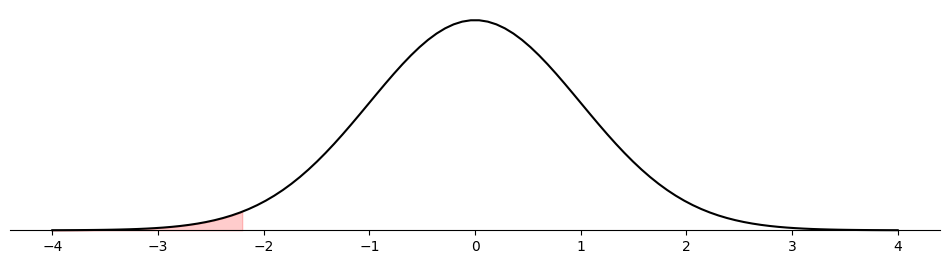

In [ ]:
def main():
    # H0 : mu = 50 vs H1 : mu != 50
    mu = 50

    # samples
    n = 500
    x_bar = 48
    s = 20.3

    # statistic and p value
    statistic = (x_bar - mu) / ( s / np.sqrt(n) )
    p_value = stats.norm().cdf(statistic) 
    print("statistic : {:.4f}".format(statistic))
    print("p value   : {:.4f}".format(p_value))

    alpha = 0.05
    if p_value <= alpha:
        print("We choose H_1, or using statistician's jargon, reject H_0", end="\n\n")
    else:
        print("We choose is H_0, or using statistician's jargon, fail to reject H_0", end="\n\n")
    
    fig, ax = plt.subplots(figsize=(12,3))
    plot_z_statisitc(statistic, ax=ax, alternative='less')
    plt.show()

if __name__ == "__main__":
    main()

#####**One Sample z Test - Greater**

$$
\text{$H_0$ : $\mu=50$ vs $H_1$ : $\mu>50$}
$$

```
    # samples
    n = 500
    x_bar = 52
    s = 20.3
```

statistic : 2.2030
p value   : 0.0138
We choose H_1, or using statistician's jargon, reject H_0



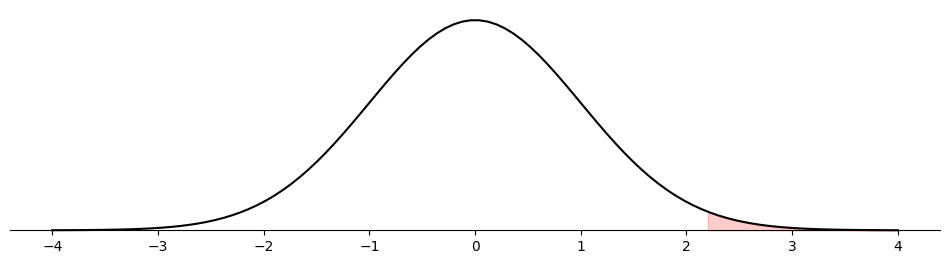

In [ ]:
def main():
    # H0 : mu = 50 vs H1 : mu != 50
    mu = 50

    # samples
    n = 500
    x_bar = 52
    s = 20.3

    # statistic and p value
    statistic = (x_bar - mu) / ( s / np.sqrt(n) )
    p_value = stats.norm().sf(statistic) 
    print("statistic : {:.4f}".format(statistic))
    print("p value   : {:.4f}".format(p_value))

    alpha = 0.05
    if p_value <= alpha:
        print("We choose H_1, or using statistician's jargon, reject H_0", end="\n\n")
    else:
        print("We choose is H_0, or using statistician's jargon, fail to reject H_0", end="\n\n")
    
    fig, ax = plt.subplots(figsize=(12,3))
    plot_z_statisitc(statistic, ax=ax, alternative='greater')
    plt.show()

if __name__ == "__main__":
    main()

####**Section 5 One Sample t Test [eng](https://www.youtube.com/watch?v=qvPWQ-e03tQ)**

#####**One Sample t Test**

If $X_k$ are iid $N(\mu,\sigma^2)$,

$$\begin{array}{lcl}
\displaystyle
\bar{X}=\frac{\sum_{k=1}^nX_k}{n}\ \text{normal with mean $\mu$, variance $\frac{\sigma^2}{n}$}
&\stackrel{\text{Property of $N$}}{\Rightarrow}&\displaystyle
\bar{X}
\approx N\left(\mu,\frac{\sigma^2}{n}\right)\\
&\Rightarrow&\displaystyle
\frac{\bar{X}-\mu}{\frac{\sigma}{\sqrt{n}}}\approx N(0,1)\\
&\stackrel{\text{Property of $t$}}{\Rightarrow}&\displaystyle
\frac{\bar{X}-\mu}{\frac{s}{\sqrt{n}}}\approx t(n-1)\\
&\Rightarrow&\displaystyle
\bar{x}\pm t_*(n-1)\frac{s}{n}
\end{array}$$

#####**Example - Messaging App [eng](https://www.khanacademy.org/math/ap-statistics/xfb5d8e68:inference-quantitative-means/one-sample-t-test-mean/v/conditions-t-test-mean?modal=1)**

Sunil and his friends have been using a group messaging app for over a year to chat with each other. He suspects that, on average, they send more than 100 messages per day. Sunil takes a random sample of 7 days from their chat history and records how many messages were sent on those days. The sample data are strongly skewed to the right with a mean of 125 messages and a standard deviation of 44 messages. He wants to use these sample data to conduct a $t$ test about the mean. Which conditions for performing this type of significance test have been met? 

######**Solution**

- [SRS (Simple Random Sample)] **Satisfied** : "Sunil takes a random sample of 7 days"

- [Independent Sample] **Satisfied** : Sample size is 7 and population size is more than $70$.

- [Normal Population Distribution] **Not Satisfied** : Since the sample data are strongly skewed to the right, we guess the population distribution is not normal.

- [Small Sample Size] **Satisfied** : Sample size is 7.

- [Symmetric Sample Distribution] **Not Satisfied** : The sample data are strongly skewed to the right.


#####**Example - $t$ Statistic for Teacher's Experience [eng](https://www.khanacademy.org/math/ap-statistics/xfb5d8e68:inference-quantitative-means/xfb5d8e68:carrying-out-test-mean/v/example-calculating-t-statistic-for-signficance-test?modal=1)**

Rory suspects that teachers in his school district have less than 5 years of experience on average. He decides to test $H_0:\mu=5$ vs $H_1:\mu<5$, using a sample of 25 teachers. His sample mean was 4 years and his sample standard deviation was 2 years. Rory wants to use these sample data to conduct a $t$ test on the mean. Assume that all conditions for inference have been met. Calculate the test statistic for Rory's test. 

######**Solution**

statistic = -2.5000
p_value   = 0.0098



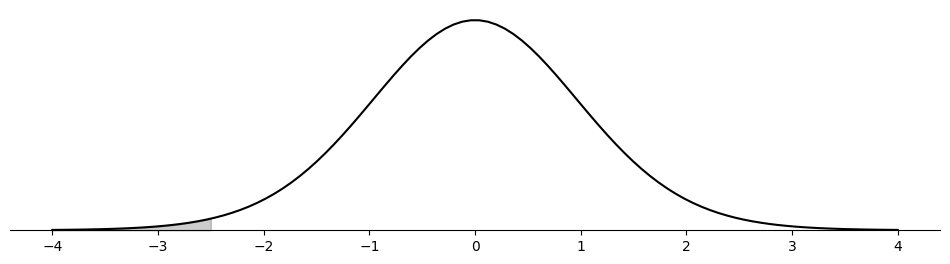

In [ ]:
def main():
    mu_0 = 5

    x_bar = 4
    s = 2
    n = 25
    statistic = (x_bar - mu_0) / (s/np.sqrt(n))
    print(f"{statistic = :.4f}")

    df = n - 1
    p_value = stats.t(df).cdf(statistic)
    print(f"{p_value   = :.4f}", end="\n\n")
    
    fig, ax = plt.subplots(figsize=(12,3))
    plot_t_statisitc(statistic, df=df, ax=ax, alternative='less')
    plt.show()

if __name__ == "__main__":
    main()

#####**Example - p-value of Miriam's Test [eng](https://www.khanacademy.org/math/ap-statistics/xfb5d8e68:inference-quantitative-means/xfb5d8e68:carrying-out-test-mean/v/using-ti-calculator-for-p-value-from-t-statistic?modal=1)**

Miriam was testing $H_0:\mu=18$ vs $H_1:\mu<18$ 
with a sample of 7 observations. Her test statistic was $t=-1.9$. Assume that the conditions for inference were met. What is the approximate p-value for Miriam's test? 

######**Solution**

statistic = -1.9000
p_value   = 0.0531



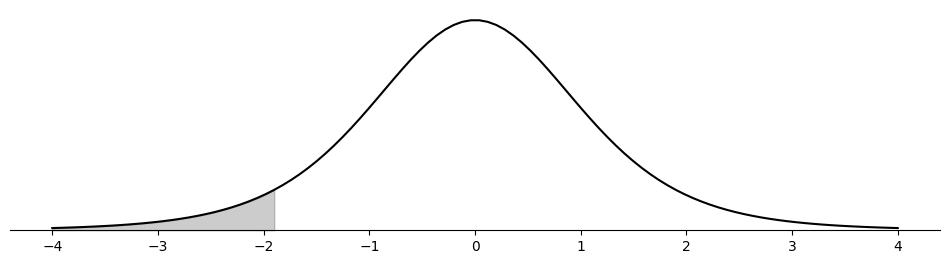

In [ ]:
def main():
    n = 7
    df = n -1
    statistic = -1.9
    p_value = stats.t(df).cdf(statistic)
    print(f"{statistic = :.4f}")
    print(f"{p_value   = :.4f}", end="\n\n")
    
    fig, ax = plt.subplots(figsize=(12,3))
    plot_t_statisitc(statistic, df=n-1, ax=ax, alternative='less')
    plt.show()

if __name__ == "__main__":
    main()

#####**Example - p-value of Caterina's Test [eng](https://www.khanacademy.org/math/ap-statistics/xfb5d8e68:inference-quantitative-means/xfb5d8e68:carrying-out-test-mean/v/calculating-p-value-from-t-statistic?modal=1)**

Caterina was testing $H_0:\mu=0$ vs $H_1:\mu\neq0$ 
with a sample of 6 observations. Her test statistic was $t=2.75$. Assume that the conditions for inference were met. What is the approximate p-value for Miriam's test? 

######**Solution**

statistic = 2.7500
p_value   = 0.0403



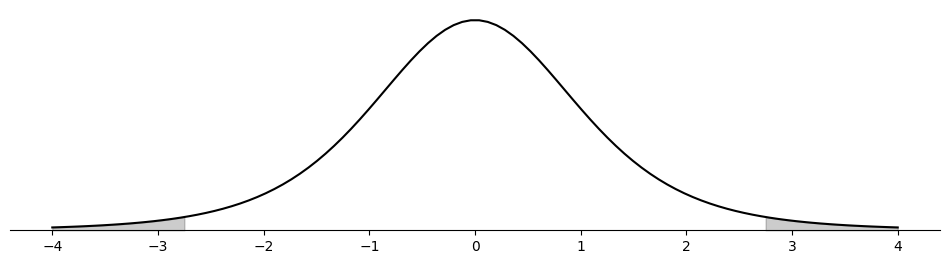

In [ ]:
def main():
    n = 6
    df = n -1
    statistic = 2.75
    p_value = stats.t(df).sf(statistic) * 2
    print(f"{statistic = :.4f}")
    print(f"{p_value   = :.4f}", end="\n\n")
    
    fig, ax = plt.subplots(figsize=(12,3))
    plot_t_statisitc(statistic, df=n-1, ax=ax, alternative='two-sided')
    plt.show()

if __name__ == "__main__":
    main()

#####**One Sample t Test - Toy Example**

$$
H_0 : \mu = 70 \quad\text{vs}\quad H_1: \mu > 70
$$

statistic : 2.1600
p value   : 0.0484

We choose H_1, or using statistician's jargon, reject H_0



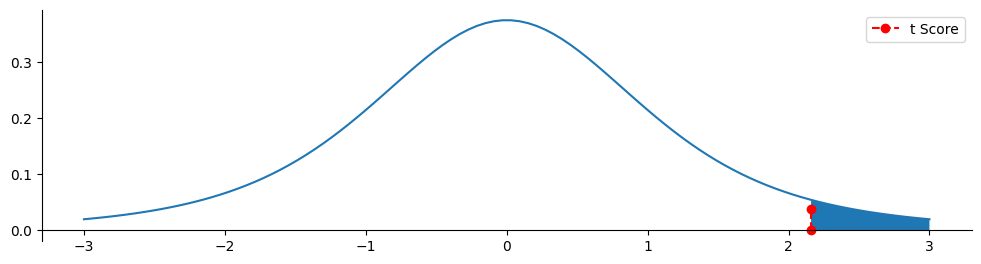

In [ ]:
def main():
    samples = np.array([78, 83, 68, 72, 88])

    n = samples.shape[0]
    df = n - 1
    x_bar = samples.mean()
    s = samples.std(ddof=1)
    mu = 70

    confidence_level = 0.95
    alpha = 1 - confidence_level 
    t_star = stats.t(df=df).ppf(confidence_level)
    t_score = ( x_bar - mu ) / ( s / np.sqrt(n) )
    p_value = stats.t(df=df).sf(t_score) 
    print("statistic : {:.4f}".format(t_score))
    print("p value   : {:.4f}".format(p_value))

    alpha = 0.05
    if p_value <= alpha:
        print("We choose H_1, or using statistician's jargon, reject H_0", end="\n\n")
    else:
        print("We choose is H_0, or using statistician's jargon, fail to reject H_0", end="\n\n")

    fig, ax = plt.subplots(figsize=(12,3))
    ax.plot(np.linspace(-3,3,100), stats.t(df).pdf(np.linspace(-3,3,100)))
    x = t_score
    y = stats.norm().pdf(x) 
    ax.plot([x,x], [0,y], "--or", label="t Score")
    ax.fill_between(np.linspace(t_score,3,100), stats.t(df).pdf(np.linspace(t_score,3,100)), np.zeros(100))
    ax.legend()
    ax.spines["top"].set_visible(False)
    ax.spines["right"].set_visible(False)
    ax.spines["bottom"].set_position("zero")
    plt.show()

if __name__ == "__main__":
    main()

#####**One Sample t Test (Two-Sided) : scipy.stats.ttest_1samp**

$$
H_0 : \mu = 0 \quad\text{vs}\quad H_1: \mu \neq 0
$$

H_0: mu=0 vs H_1: mu!=0
statistic = 2.2894
p_value   = 0.0478

We choose H_1, or using statistician's jargon, reject H_0



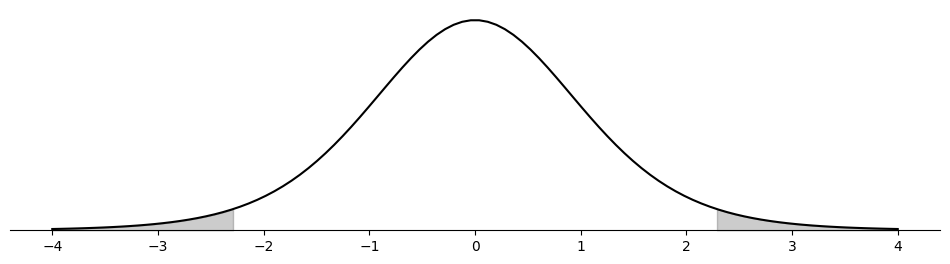

In [ ]:
def main():
    # seed
    seed = 0
    np.random.seed(seed)

    # data
    n = 10
    sample = np.random.normal(size=(n,))

    # test    
    print("H_0: mu=0 vs H_1: mu!=0")
    statistic, p_value = stats.ttest_1samp(sample, 0.0)
    print(f"{statistic = :.4f}")
    print(f"{p_value   = :.4f}")

    alpha = 0.05
    if p_value <= alpha:
        print("We choose H_1, or using statistician's jargon, reject H_0", end="\n\n")
    else:
        print("We choose is H_0, or using statistician's jargon, fail to reject H_0", end="\n\n")
    
    fig, ax = plt.subplots(figsize=(12,3))
    plot_t_statisitc(statistic, df=n-1, ax=ax, alternative='two-sided')
    plt.show()

if __name__ == "__main__":
    main()

#####**Example - Teacher's Experience**

Rory suspects that teachers in his school district have less than 5 years of experience on average. He decides to test $H_0:\mu=5$ vs $H_1:\mu<5$, using a sample of 25 teachers. His sample mean was 4 years and his sample standard deviation was 2 years. Rory wants to use these sample data to conduct a $t$ test on the mean. Assume that all conditions for inference have been met. Do testing with $\alpha=0.05$.

######**Solution**

statistic = -2.5000
p_value   = 0.0098

We choose H_1, or using statistician's jargon, reject H_0



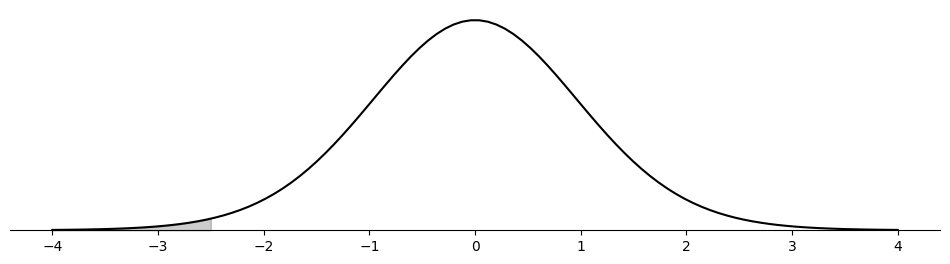

In [ ]:
def main():
    mu_0 = 5

    x_bar = 4
    s = 2
    n = 25
    statistic = (x_bar - mu_0) / (s/np.sqrt(n))
    print(f"{statistic = :.4f}")

    df = n - 1
    p_value = stats.t(df).cdf(statistic)
    print(f"{p_value   = :.4f}")

    alpha = 0.05
    if p_value <= alpha:
        print("We choose H_1, or using statistician's jargon, reject H_0", end="\n\n")
    else:
        print("We choose is H_0, or using statistician's jargon, fail to reject H_0", end="\n\n")
    
    fig, ax = plt.subplots(figsize=(12,3))
    plot_t_statisitc(statistic, df=df, ax=ax, alternative='less')
    plt.show()

if __name__ == "__main__":
    main()

#####**Example - Milk [eng](https://www.khanacademy.org/math/ap-statistics/xfb5d8e68:prepare-for-the-2022-ap-statistics-exam/prepare-for-ap-stats-exam/v/ap-statistics-free-response-on-significance-test-for-mean?modal=1)**

Regulations require that product labels on containers of food that are available for sale to the public accurately state the amount of food in those containers. Specifically, if milk containers are labeled to have 128 fluid ounces and the mean number of fluid ounces of milk in the containers is at least 128, the milk processor is considered to be in compliance with the regulations. The filling machines can be set to the labeled amount. Variability in the filling process causes the actual contents of milk containers to be normally distributed. A random sample of 12 containers of milk was drawn from the milk processing line in a plant, and the amount of milk in each container was recorded. The sample mean and standard deviation of this sample of 12 containers of milk were 127.2 ounces and 2.1 ounces, respectively. Is there sufficient evidence to conclude that the packaging plant is not in compliance with the regulations? 



######**Solution**

$$
H_0:\mu=128
\quad\text{vs}\quad
H_1:\mu<128
$$

statistic = -1.3197
p_value   = 0.1069
We choose is H_0, or using statistician's jargon, fail to reject H_0



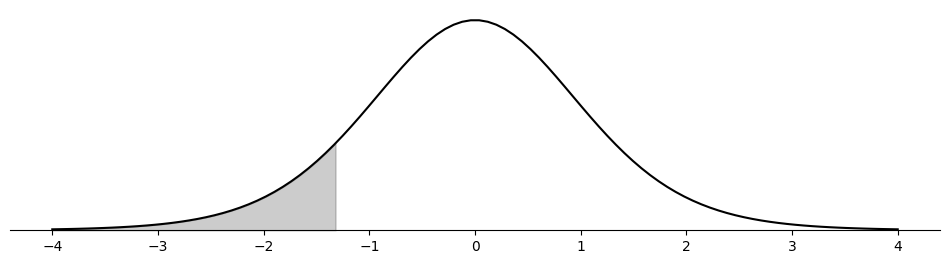

In [ ]:
def main():
    mu_0 = 128

    x_bar = 127.2
    s = 2.1
    n = 12
    statistic = (x_bar - mu_0) / (s/np.sqrt(n))
    print(f"{statistic = :.4f}")

    df = n - 1
    p_value = stats.t(df).cdf(statistic)
    print(f"{p_value   = :.4f}")

    alpha = 0.05
    if p_value <= alpha:
        print("We choose H_1, or using statistician's jargon, reject H_0", end="\n\n")
    else:
        print("We choose is H_0, or using statistician's jargon, fail to reject H_0", end="\n\n")
    
    fig, ax = plt.subplots(figsize=(12,3))
    plot_t_statisitc(statistic, df=df, ax=ax, alternative='less')
    plt.show()

if __name__ == "__main__":
    main()

#####**One Sample t Test (Less) : scipy.stats.ttest_1samp**

$$
H_0 : \mu = 0 \quad\text{vs}\quad H_1: \mu < 0
$$

H_0: mu=0 vs H_1: mu<0
statistic = 2.2894
p_value   = 0.9761

We choose is H_0, or using statistician's jargon, fail to reject H_0



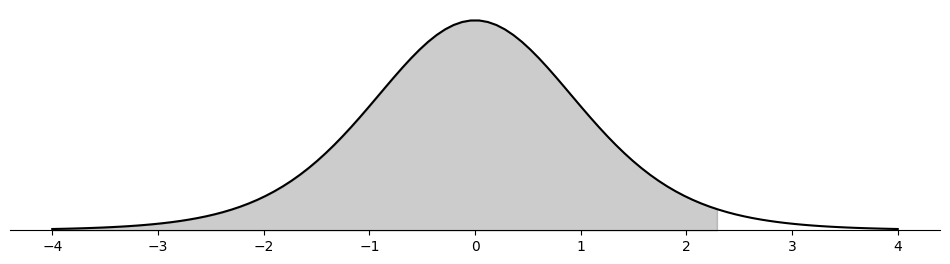

In [ ]:
def main():
    # seed
    seed = 0
    np.random.seed(seed)
    
    # data
    n = 10
    sample = np.random.normal(size=(n,))

    # test    
    print("H_0: mu=0 vs H_1: mu<0")
    statistic, p_value = stats.ttest_1samp(sample, 0.0, alternative='less')
    print(f"{statistic = :.4f}")
    print(f"{p_value   = :.4f}")

    alpha = 0.05
    if p_value <= alpha:
        print("We choose H_1, or using statistician's jargon, reject H_0", end="\n\n")
    else:
        print("We choose is H_0, or using statistician's jargon, fail to reject H_0", end="\n\n")
    
    fig, ax = plt.subplots(figsize=(12,3))
    plot_t_statisitc(statistic,df=n-1,ax=ax,alternative='less')
    plt.show()

if __name__ == "__main__":
    main()

#####**One Sample t Test (Greater) : scipy.stats.ttest_1samp**

$$
H_0 : \mu = 0 \quad\text{vs}\quad H_1: \mu > 0
$$

H_0: mu=0 vs H_1: mu>0
statistic = 2.2894
p_value   = 0.0239

We choose H_1, or using statistician's jargon, reject H_0



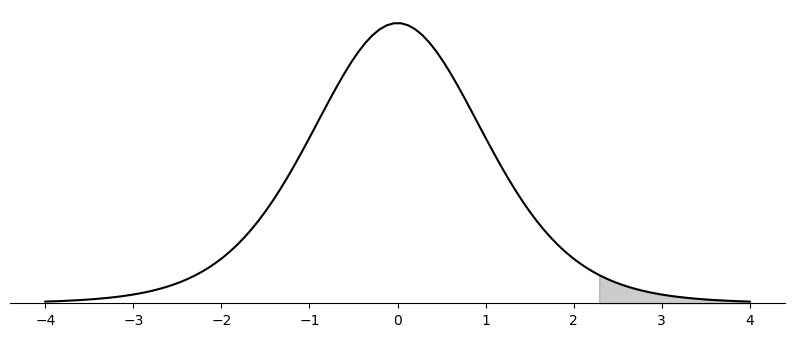

In [ ]:
def main():
    # seed
    seed = 0
    np.random.seed(seed)
    
    # data
    n = 10
    sample = np.random.normal(size=(n,))

    # test    
    print("H_0: mu=0 vs H_1: mu>0")
    statistic, p_value = stats.ttest_1samp(sample, 0.0, alternative='greater')
    print(f"{statistic = :.4f}")
    print(f"{p_value   = :.4f}")

    alpha = 0.05
    if p_value <= alpha:
        print("We choose H_1, or using statistician's jargon, reject H_0", end="\n\n")
    else:
        print("We choose is H_0, or using statistician's jargon, fail to reject H_0", end="\n\n")

    fig, ax = plt.subplots(figsize=(10,4))
    plot_t_statisitc(statistic,df=n-1,ax=ax,alternative='greater')
    plt.show()

if __name__ == "__main__":
    main()

####**Section 6 One Sample Proportion Test**

#####**Example - Proportion of Labor Union [eng](https://www.khanacademy.org/math/ap-statistics/xfb5d8e68:inference-categorical-proportions/one-sample-z-test-proportion/v/constructing-hypotheses-for-a-significance-test?modal=1)** 

Amanda read a report saying that 49% of teachers in the United States were members of a labor union. She wants to test whether this holds true for teachers in her state, so she is going to take a random sample of these teachers and see what percent of them are members of a union. Let $P$ represent the proportion of teachers in her state that are members of a union. Write an appropriate set of hypotheses for her significance test. 

######**Solution**

$$
H_0:p=0.49
\quad\text{vs}\quad
H_1:p\neq0.49
$$

#####**Example - Proportion of California Home with the internet [eng](https://www.youtube.com/watch?v=8MJvK26PwSo&t=1m57s)** 

According to a very large poll in 2015, about 90% of homes in California has access to the internet. Market researchers want to test if that proportion is now higher, so they take a random sample of 1,000 homes in California and find that 920 or 92% of homes sampled have access to the internet. Let $p$ represent the proportion of homes in California that have access to the internet. Write an appropriate set of hypotheses for their significance test. 

######**Solution**

$$
H_0:p=0.90
\quad\text{vs}\quad
H_1:p>0.90
$$

#####**Conditions for One Sample Proportion Test**

- **[SRS (Simple Random Sample)]** Samples are chosen randomly from the population.

- **[Independent Sample]** Sample size is less than 10% of total population so that sampling without replacement can be approximated as sampling with replacement. Or sample are collected with replacement.

- **[Normal Population Distribution]** Sample size is large so that we can use the CLT. 

$$\begin{array}{ll}
\text{for confidence interval}&n\hat{p}\ge 5,\ n(1-\hat{p})\ge 5\\
\text{for testing}&np_0\ge 5,\ n(1-p_0)\ge 5\\
\end{array}$$


#####**Example - Proportion of Best Annual Rating [eng](https://www.khanacademy.org/math/ap-statistics/xfb5d8e68:inference-categorical-proportions/one-sample-z-test-proportion/v/conditions-for-a-z-test-about-a-proportion?modal=1)** 

Jules works on a small team of 40 employees. Each employee receives an annual rating, the best of which is exceeds expectations. Management claimed that 10% of employees earn this rating, but Jules suspected it was actually less common. She obtained an anonymous random sample of 10 ratings for employees on her team. She wants to use the sample data to test her null hypothesis that the true proportion is 10% versus her alternative hypothesis that the true proportion is less than 10%, where $p$ is the proportion of all employees on her team who earned exceeds expectations. Which conditions for performing this type of test did Jules' sample meet? 

######**Solution**

- **[SRS (Simple Random Sample)]** Satisfied.

- **[Independent Sample]** Not Satisfied.

- **[Normal Population Distribution]** Not Satisfied.

#####**One Sample Proportion Test**



$$\begin{array}{lll}
\displaystyle
\hat{p}=\frac{\sum_{k=1}^n1_{A_k}}{n}\ \text{mean $p$, variance $\frac{p(1-p)}{n}$}
&\stackrel{\text{CLT}}{\Rightarrow}&\displaystyle
\hat{p}
\approx N\left(p,\frac{p(1-p)}{n}\right)\\
&\Rightarrow&\displaystyle
\frac{\hat{p}-p}{\sqrt{\frac{p(1-p)}{n}}}\approx N(0,1)\\
&\stackrel{\text{LLN}}{\Rightarrow}&\displaystyle
\frac{\hat{p}-p}{\sqrt{\frac{\hat{p}(1-\hat{p})}{n}}}\approx N(0,1)\\
&\Rightarrow&\displaystyle
\hat{p}\pm z_*\sqrt{\frac{\hat{p}(1-\hat{p})}{n}}
\end{array}$$

#####**Example - Unemployment Rate [eng](https://www.khanacademy.org/math/ap-statistics/xfb5d8e68:inference-categorical-proportions/xfb5d8e68:carrying-out-test-proportion/v/calculating-a-z-statistic-in-a-significance-test?modal=1)** 

The mayor of a town saw an article that claimed the national unemployment rate is 8%. They wondered if this held true in their own town, so they took a sample of 200 residents to test the null hypothesis is that the unemployment rate is the same as the national one versus the alternative hypothesis which is that the unemployment rate is not the same as the national, where $p$ is the proportion of residents in the town that are unemployed. The sample included 22 residents who were unemployed. Assuming that the conditions for inference have been met, identify the correct test statistic for this significance test. 

######**Solution**

$$
\displaystyle
\frac{\hat{p}-p}{\sqrt{\frac{\hat{p}(1-\hat{p})}{n}}}
=
\frac{\frac{22}{200}-0.08}{\sqrt{\frac{\frac{22}{200}\left(1-\frac{22}{200}\right)}{200}}}
$$

#####**One Sample Proportion Test : scipy.stats.binomtest [doc](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.binomtest.html)**

In [ ]:
def main():
    k = 110
    n = 1000
    p_0 = 0.1

    # defaut - two-sided
    result = stats.binomtest(k, n, p=p_0)
    print(f"{result.pvalue = :.4f}")

    # two-sided
    result = stats.binomtest(k, n, p=p_0, alternative="two-sided")
    print(f"{result.pvalue = :.4f}")

    # greater
    result = stats.binomtest(k, n, p=p_0, alternative="greater")
    print(f"{result.pvalue = :.4f}")

    # less
    result = stats.binomtest(k, n, p=p_0, alternative="less")
    print(f"{result.pvalue = :.4f}")

if __name__ == "__main__":
    main()

result.pvalue = 0.2917
result.pvalue = 0.2917
result.pvalue = 0.1583
result.pvalue = 0.8652


#####**Example - Tax Increase for Public School Funding [eng](https://www.khanacademy.org/math/ap-statistics/xfb5d8e68:inference-categorical-proportions/xfb5d8e68:concluding-test-proportion/v/comparing-p-value-to-significance-level-example?modal=1)** 

A public opinion survey investigated whether a majority, more than 50% of adults, supported a tax increase to help fund the local school system. A random sample of 200 adults showed that 113 of those sampled supported the tax increase. Researchers used these results to test the null hypothesis is that the proportion is 0.5. The alternative hypothesis is that it's greater than 0.5 where $p$ is the true proportion of adults that support the tax increase.  Assuming the conditions for inference were met, what is an appropriate conclusion with significance level $\alpha=0.05$? 

######**Solution**

$$
H_0:p=0.50
\quad\text{vs}\quad
H_1:p> 0.50
$$

statistic = 0.5650
p_value = 0.0384

Public support rate is greater than 0.5

statistic = 1.8385
p_value = 0.0330



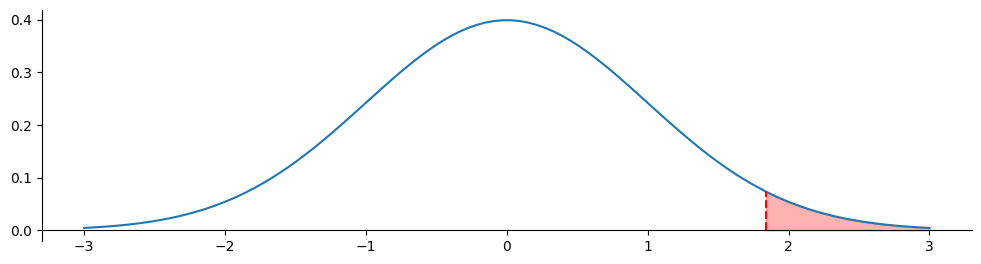

In [ ]:
def main():
    k = 113
    n = 200
    p_0 = 0.5

    # greater
    # stats.binomtest uses binomial distribution to test
    # so this is exact
    result = stats.binomtest(k, n, p=p_0, alternative="greater")
    statistic = result.statistic
    p_value = result.pvalue
    print(f"{statistic = :.4f}")
    print(f"{p_value = :.4f}", end="\n\n")

    alpha = 0.05
    if p_value <= alpha:
        print("Public support rate is greater than 0.5", end="\n\n")
    else:
        print("Public support rate is 0.5", end="\n\n")

    # greater
    # this small code uses normal distribution to test
    # so this is approximate
    p_hat = k / n
    statistic = ( p_hat - p_0 ) / np.sqrt( p_0 * ( 1 - p_0 ) / n )
    p_value = stats.norm().sf(statistic)
    print(f"{statistic = :.4f}")
    print(f"{p_value = :.4f}", end="\n\n")

    fig, ax = plt.subplots(figsize=(12,3))
    x = np.linspace(-3,3,100)
    pdf = stats.norm().pdf(x)
    ax.plot(x, pdf)
    ax.plot([statistic, statistic], [0, stats.norm().pdf(statistic)], '--r')
    x = np.linspace(statistic,3,100)
    pdf = stats.norm().pdf(x)
    ax.fill_between(x, pdf, np.zeros(100), color='red', alpha=0.3)
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.spines['bottom'].set_position('zero')
    plt.show()

if __name__ == "__main__":
    main()

#####**Example - Free Video Rental Vouchers [eng_1](https://www.khanacademy.org/math/ap-statistics/xfb5d8e68:prepare-for-the-2022-ap-statistics-exam/prepare-for-ap-stats-exam/v/full-significance-test-example-from-ap-test?modal=1) [eng_2](https://www.khanacademy.org/math/ap-statistics/xfb5d8e68:prepare-for-the-2022-ap-statistics-exam/prepare-for-ap-stats-exam/v/full-significance-test-example-from-ap-test-part-2-with-correction?modal=1)** 

Some boxes of a certain brand of breakfast cereal include a voucher for a free video rental inside the box. The company that makes the cereal claims that a voucher can be found in 20% of boxes, however, based on their experiences eating the cereal at home, a group of students believes that the proportion of boxes with vouchers is less than 20%. This group of students purchased 65 boxes of the cereal to investigate the company's claim. The student found a total of 11 vouchers for free video rentals in the 65 boxes. Suppose it is reasonable to assume that the 65 boxes purchased by the students are a random sample of all boxes of this cereal. Based on this sample, is there support for the students' belief that the proportion of boxes with vouchers is less than 20%? What is an appropriate conclusion with significance level $\alpha=0.05$? 

######**Solution**

$$
H_0:p=0.20
\quad\text{vs}\quad
H_1:p< 0.20
$$

statistic = 0.1692
p_value = 0.3301

Free video rental vouchers rate is 0.2

statistic = -0.6202
p_value = 0.2676



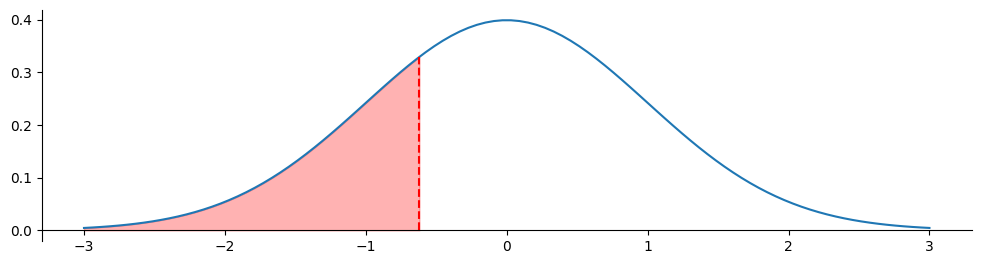

In [ ]:
def main():
    k = 11
    n = 65
    p_0 = 0.2

    # less
    # stats.binomtest uses binomial distribution to test
    # so this is exact
    result = stats.binomtest(k, n, p=p_0, alternative="less")
    statistic = result.statistic
    p_value = result.pvalue
    print(f"{statistic = :.4f}")
    print(f"{p_value = :.4f}", end="\n\n")

    alpha = 0.05
    if p_value <= alpha:
        print("Free video rental vouchers rate is less than 0.2", end="\n\n")
    else:
        print("Free video rental vouchers rate is 0.2", end="\n\n")

    # less
    # this small code uses normal distribution to test
    # so this is approximate
    p_hat = k / n
    statistic = ( p_hat - p_0 ) / np.sqrt( p_0 * ( 1 - p_0 ) / n )
    p_value = stats.norm().cdf(statistic)
    print(f"{statistic = :.4f}")
    print(f"{p_value = :.4f}", end="\n\n")

    fig, ax = plt.subplots(figsize=(12,3))
    x = np.linspace(-3,3,100)
    pdf = stats.norm().pdf(x)
    ax.plot(x, pdf)
    ax.plot([statistic, statistic], [0, stats.norm().pdf(statistic)], '--r')
    x = np.linspace(-3,statistic,100)
    pdf = stats.norm().pdf(x)
    ax.fill_between(x, pdf, np.zeros(100), color='red', alpha=0.3)
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.spines['bottom'].set_position('zero')
    plt.show()

if __name__ == "__main__":
    main()

#####**When to use $z$ or $t$ [eng](https://www.khanacademy.org/math/ap-statistics/xfb5d8e68:inference-quantitative-means/xfb5d8e68:carrying-out-test-mean/v/when-to-use-z-or-t-statistics-in-significance-tests?modal=1)**

$$\begin{array}{llllllllllll}
\text{Sample Size : Small}
&\Rightarrow&
\text{Population Distribution : Normal}
&\Rightarrow&
\text{Use $t$}\\
\\
\text{Sample Size : Large}
&\Rightarrow&
\text{}
&\Rightarrow&
\text{Use $z$}\\
\end{array}$$

$$\begin{array}{l}
\\\\\\
\displaystyle
z=\frac{\bar{x}-\mu_0}{\frac{s}{\sqrt{n}}}\quad\quad\quad\quad 
z=\frac{\hat{p}-p_0}{\sqrt{\frac{p_0(1-p_0)}{n}}}\\
\displaystyle
t=\frac{\bar{x}-\mu_0}{\frac{s}{\sqrt{n}}}\\
\end{array}$$

####**Section 7 Two Sample z Test**

$$
\frac{ (\bar{X}_1-\bar{X}_2) - (\mu_1-\mu_2) }
{ \sqrt{ \frac{s_1^2}{n_1} + \frac{s_2^2}{n_2} } }
\sim 
z
$$

In [ ]:
n_f = 100
n_s = 100
x_bar_f = 1.85
x_bar_s = 1.65
s_f = 1.3
s_s = 1.2
statistic = ( x_bar_f - x_bar_s ) / np.sqrt( s_f**2/n_f + s_s**2/n_s ) 
print("statistic : {}".format(statistic))
print("p value   : {}".format(p_value))

####**Section 8 Two Sample t Test [eng](https://www.youtube.com/watch?v=pTmLQvMM-1M)**

#####**Two Sample $t$ Test - Equal Variance**

$$
\frac{(\bar{X}_1-\bar{X}_2)-(\mu_1-\mu_2)}{\sqrt{\frac{s_p^2}{n_1}+\frac{s_p^2}{n_2}}}\sim t(n_1+n_2-2)
$$
where
$$
s_p^2
=\frac{(n_1-1)s_1^2+(n_2-1)s_2^2}{n_1+n_2-2}
=\frac{\sum_{i=1}^{n_1}\left(X^{(1)}_i-\bar{X}_1\right)^2+\sum_{i=1}^{n_2}\left(X^{(2)}_i-\bar{X}_2\right)^2}{n_1+n_2-2}
$$

#####**Two Sample $t$ Test - Unequal Variance**

$$
\frac{ (\bar{X}_1-\bar{X}_2) - (\mu_1-\mu_2) }
{ \sqrt{ \frac{s_1^2}{n_1} + \frac{s_2^2}{n_2} } }
\sim t\left(
    \frac{ \left( \frac{s_1^2}{n_1} + \frac{s_2^2}{n_2} \right)^2 }
    {
        \frac{ \left(\frac{s_1^2}{n_1}\right)^2 }{ n_1 }
        +
        \frac{ \left(\frac{s_2^2}{n_2}\right)^2 }{ n_2 }
    }
    \right)
$$

#####**Example - Gender Bias in Salary [eng](https://www.khanacademy.org/math/ap-statistics/xfb5d8e68:inference-quantitative-means/two-sample-t-test-means/v/alternative-hypothesis-for-2-sample-t-test?modal=1)**

Market researchers conducted a study comparing the salaries of managers at a large nationwide retail store. The researchers obtained salary and demographic data for a random sample of managers. The researchers calculated the average salary of the men in the sample and the average salary of the women in the sample. They want to test if managers who are men have a higher average salary than managers who are women. Assume that all conditions for inference have been met. What is the appropriate test? What are the null and alternative hypothesis?


######**Solution**

Two Sample $t$ Test

$$
H_0 : \mu_{\text{men}} = \mu_{\text{women}} \quad\text{vs}\quad 
H_1: \mu_{\text{men}} > \mu_{\text{women}} 
$$

#####**Example - Tomatos from Two Different Field [eng](https://www.khanacademy.org/math/ap-statistics/xfb5d8e68:inference-quantitative-means/two-sample-t-test-means/v/two-sample-t-test-for-difference-of-means?modal=1)**

Kaito grows tomatoes in two separate fields. When the tomatoes are ready to be picked, he is curious as to whether the sizes of his tomato plants differ between the two fields. He takes a random sample of plants from each field and measures the heights of the plants. Here is a summary of the results:

||Field A|Field B|
|:---:|:---:|:---:|
|Mean|1.3m|1.6m|
|Standard Deviation|0.5m|0.3m|
|Number of Samples|22|24|

Test with significance level $\alpha=0.05$.



######**Solution**

Two Sample $t$ Test

$$
H_0 : \mu_A = \mu_B \quad\text{vs}\quad 
H_1: \mu_A\neq \mu_B
$$

df = 35.3836
statistic = -2.4403
p_value   = 0.0198
We choose H_1, or using statistician's jargon, reject H_0



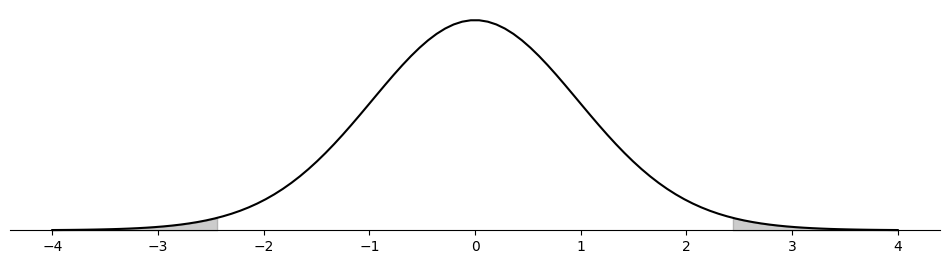

In [ ]:
def main():
    X_1_bar, X_2_bar = 1.3, 1.6
    s_1, s_2 = 0.5, 0.3
    n_1, n_2 = 22, 24

    statistic = ( X_1_bar - X_2_bar ) / np.sqrt( s_1**2 / n_1 + s_2**2 / n_2 ) 
    top = ( s_1**2 / n_1 + s_2**2 / n_2 )**2 
    bottom = ( s_1**2 /n_1 )**2 / n_1 + ( s_2**2 / n_2 )**2 / n_2  
    df = top / bottom
    p_value = 2 * stats.t(df).cdf(-abs(statistic))
    print(f"{df = :.4f}")
    print(f"{statistic = :.4f}")
    print(f"{p_value   = :.4f}")

    alpha = 0.05
    if p_value <= alpha:
        print("We choose H_1, or using statistician's jargon, reject H_0", end="\n\n")
    else:
        print("We choose is H_0, or using statistician's jargon, fail to reject H_0", end="\n\n")
    
    fig, ax = plt.subplots(figsize=(12,3))
    plot_t_statisitc(statistic,df=df,ax=ax,alternative='two-sided')
    plt.show()

if __name__ == "__main__":
    main()

#####**Example - Number of Babies [eng](https://www.khanacademy.org/math/ap-statistics/xfb5d8e68:inference-quantitative-means/two-sample-t-test-means/v/conclusion-for-2-sample-t-test-from-p-value)**

A sociologist studying fertility in France and Switzerland wanted to test if there was a difference in the average number of babies women in each country have. The sociologist obtained a random sample of women from each country. Here are the results of their data. 

||France|Switzerland|
|:---:|:---:|:---:|
|Mean|1.85|1.65|
|Standard Deviation|1.3|1.2|
|Number of Samples|100|100|

Test with significance level $\alpha=0.05$.



######**Solution**

Two Sample $t$ Test

$$
H_0 : \mu_A = \mu_B \quad\text{vs}\quad 
H_1: \mu_A\neq \mu_B
$$

df = 44.0000
statistic = -2.4919
p_value   = 0.0165
We choose H_1, or using statistician's jargon, reject H_0



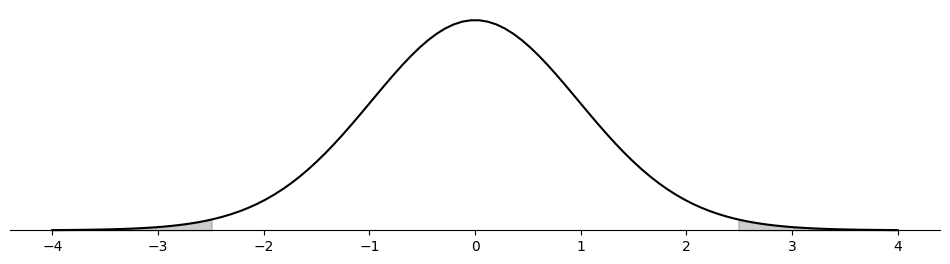

In [ ]:
def main():
    X_1_bar, X_2_bar = 1.3, 1.6
    s_1, s_2 = 0.5, 0.3
    n_1, n_2 = 22, 24

    s_p_square = ( (n_1-1) * s_1**2 + (n_2-1) * s_2**2 ) / ( n_1 + n_2 - 2 )
    statistic = ( X_1_bar - X_2_bar ) / np.sqrt( s_p_square / n_1 + s_p_square / n_2 )  
    df = n_1 + n_2 - 2
    p_value = 2 * stats.t(df).cdf(-abs(statistic))
    print(f"{df = :.4f}")
    print(f"{statistic = :.4f}")
    print(f"{p_value   = :.4f}")

    alpha = 0.05
    if p_value <= alpha:
        print("We choose H_1, or using statistician's jargon, reject H_0", end="\n\n")
    else:
        print("We choose is H_0, or using statistician's jargon, fail to reject H_0", end="\n\n")
    
    fig, ax = plt.subplots(figsize=(12,3))
    plot_t_statisitc(statistic,df=df,ax=ax,alternative='two-sided')
    plt.show()

if __name__ == "__main__":
    main()

#####**Two Sample t Test : scipy.stats.ttest_ind [doc](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.ttest_ind.html)**

statistic = -2.2195
p_value   = 0.0138
We choose H_1, or using statistician's jargon, reject H_0



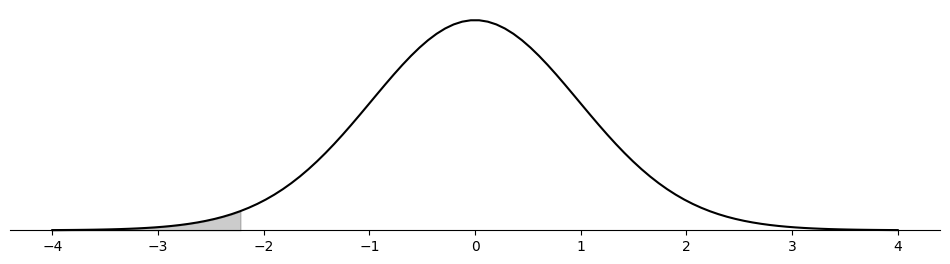

In [ ]:
def main():
    seed = 0
    np.random.seed(seed)

    n_1, n_2 = 30, 20
    df = n_1 + n_2 - 2
    data1 = np.random.normal(size=(100,)) 
    data2 = np.random.normal(loc=0.3, size=(100,)) 

    statistic, p_value = stats.ttest_ind(data1, data2, equal_var=False, alternative='less') 
    print(f"{statistic = :.4f}")
    print(f"{p_value   = :.4f}")

    alpha = 0.05
    if p_value <= alpha:
        print("We choose H_1, or using statistician's jargon, reject H_0", end="\n\n")
    else:
        print("We choose is H_0, or using statistician's jargon, fail to reject H_0", end="\n\n")
    
    fig, ax = plt.subplots(figsize=(12,3))
    plot_t_statisitc(statistic,df=df,ax=ax,alternative='less')
    plt.show()

if __name__ == "__main__":
    main()

####**Section 9 Two Sample Proportion Test**

#####**Two Sample Proportion Test**

$$
\frac{\hat{p}_1-\hat{p}_2}{\sqrt{\frac{\hat{p}_*(1-\hat{p}_*)}{n_1}+\frac{\hat{p}_*(1-\hat{p}_*)}{n_2}}}\sim z
$$
where
$$
\hat{p}_*
=\frac{x_1+x_2}{n_1+n_2}
$$

#####**Example - Derrick's Approval Rate [eng](https://www.khanacademy.org/math/ap-statistics/xfb5d8e68:inference-categorical-proportions/two-sample-z-test-proportions/v/constructing-hypotheses-for-two-proportions?modal=1)**

Derrick is a political pollster tracking the approval rating of the prime minster in his country. At the end of each month, he obtains data from a random sample of adults on whether or not they currently approve of the prime minister's performance, using a separate sample each month. Derrick wants to test if the proportion of adults who approved was significantly lower in December than it was in November. What is an appropriate set of hypotheses for Derrick's significance test? What are the null and alternative?



######**Solution**

Two Sample Proportion Test

$$
H_0 : p_{\text{November}} = p_{\text{December}}  
\quad\text{vs}\quad 
H_1: p_{\text{November}} > p_{\text{December}}  
$$

#####**Example - Dime and Nickel [eng](https://www.youtube.com/watch?v=NCENjXTMp9I&t=3m04s)**

Kiley has a dime and a nickel. She wonders if they have the same likelihood of showing heads when they are flipped. She flips each coin 100 times to test if there is a significant difference in the proportion of flips that they each land showing heads. What is an appropriate test?
What are the null and alternative?



######**Solution**

Two Sample Proportion Test

$$
H_0 : p_{\text{Dime}} = p_{\text{Nickel}}  
\quad\text{vs}\quad 
H_1: p_{\text{Dime}} \neq p_{\text{Nickel}}  
$$

#####**Example - Myopia [eng](https://www.khanacademy.org/math/ap-statistics/xfb5d8e68:inference-categorical-proportions/two-sample-z-test-proportions/v/hypothesis-test-for-difference-in-proportions-example?modal=1)**

Researchers suspect that myopia, or nearsightedness, is becoming more common over time. A study from the year 2000 showed 132 cases of myopia in 400 randomly selected people. A separate study from 2015 showed 228 cases in 600 randomly selected people. 

||Year 2000|Year 2015|Total|
|:---:|:---:|:---:|:---:|
|Positive|132|228|$132+228$|
|Negative|$400-132$|$600-228$|$1000-132-228$|
|Rate of Support|$\hat{p}_A=\frac{132}{400}$|$\hat{p}_B=\frac{228}{600}$|$\hat{p}_{pooled}=\frac{360}{1000}$|

Test whether there is a significant increase of myopia with significance level $\alpha=0.05$.



######**Solution**

Two Sample Proportion Test

$$
H_0 : p_{2000} = p_{2015} \quad\text{vs}\quad 
H_1: p_{2000} < p_{2015}
$$

statistic = -1.6137
p_value   = 0.0533
We choose is H_0, or using statistician's jargon, fail to reject H_0



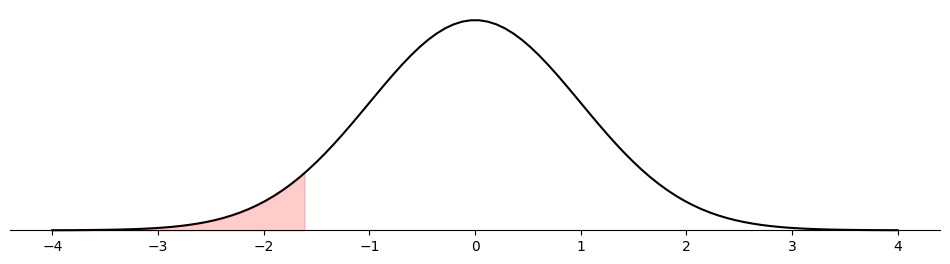

In [ ]:
def main():
    n_2000, n_2015 = 400, 600
    positive_2000, positive_2015 = 132, 228
    negative_2000, negative_2015 = n_2000 - positive_2000, n_2015 - positive_2015
    p_hat_2000, p_hat_2015 = positive_2000 / n_2000, positive_2015 / n_2015

    p_pooled = ( positive_2000 + positive_2015 ) / ( n_2000 + n_2015 )
    statistic = ( p_hat_2000 - p_hat_2015 ) / ( np.sqrt(p_pooled*(1-p_pooled)) * np.sqrt(1/n_2000+1/n_2015) ) 
    p_value = stats.norm().cdf(statistic)
    print(f"{statistic = :.4f}")
    print(f"{p_value   = :.4f}")

    alpha = 0.05
    if p_value <= alpha:
        print("We choose H_1, or using statistician's jargon, reject H_0", end="\n\n")
    else:
        print("We choose is H_0, or using statistician's jargon, fail to reject H_0", end="\n\n")
    
    fig, ax = plt.subplots(figsize=(12,3))
    plot_z_statisitc(statistic,ax=ax,alternative='less')
    plt.show()

if __name__ == "__main__":
    main()

#####**Example - A Certain Cat Disease [eng](https://www.khanacademy.org/math/ap-statistics/xfb5d8e68:inference-categorical-proportions/two-sample-z-test-proportions/v/p-value-conclusions-difference-proportions?modal=1)**

A veterinarian is studying a certain disease that seems to be affecting male cats more than female cats. They obtain a random sample of records from 500 cats. They find 24 of the 259 male cats have the disease while 14 of 241 female cats have the disease. The veterinarian uses these results to test their null hypothesis that the true proportion is the same amongst the male and female cats versus the alternative hypothesis that the proportion of males who get the disease is actually higher than the proportion of females. 

||Male Cat|Female Cat|
|:---:|:---:|:---:|
|Positive|24|14|
|Numple of Samples|259|241|

Test whether male cats have a significantly higher disease rate than female cats with significance level $\alpha=0.05$.



######**Solution**

Two Sample Proportion Test

$$
H_0 : p_{\text{male}} = p_{\text{female}}\quad\text{vs}\quad 
H_1: p_{\text{male}} > p_{\text{female}}
$$

statistic = 1.4577
p_value   = 0.0725
We choose is H_0, or using statistician's jargon, fail to reject H_0



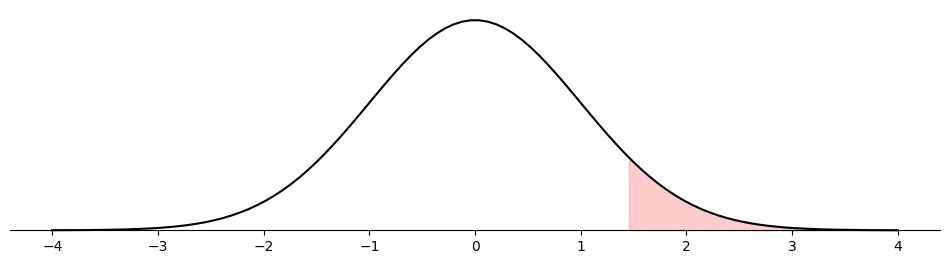

In [ ]:
def main():
    positive_male, positive_female = 24, 14
    n_male, n_female = 259, 241 
    p_hat_male, p_hat_female = positive_male / n_male, positive_female / n_female

    p_pooled = ( positive_male + positive_female ) / ( n_male + n_female )
    statistic = ( p_hat_male - p_hat_female ) / ( np.sqrt(p_pooled*(1-p_pooled)) * np.sqrt(1/n_male+1/n_female) ) 
    p_value = stats.norm().sf(statistic)
    print(f"{statistic = :.4f}")
    print(f"{p_value   = :.4f}")

    alpha = 0.05
    if p_value <= alpha:
        print("We choose H_1, or using statistician's jargon, reject H_0", end="\n\n")
    else:
        print("We choose is H_0, or using statistician's jargon, fail to reject H_0", end="\n\n")
    
    fig, ax = plt.subplots(figsize=(12,3))
    plot_z_statisitc(statistic,ax=ax,alternative='greater')
    plt.show()

if __name__ == "__main__":
    main()

#####**Example - In-person vs Online Classes [eng](https://www.khanacademy.org/math/ap-statistics/xfb5d8e68:inference-categorical-proportions/two-sample-z-test-proportions/v/confidence-interval-for-hypothesis-test-for-difference-in-proportions?modal=1)**

A university offers a particular course that students can take in person or online. Teachers of the course were curious if there was a difference in the passing rate between the two settings. Data from a recent semester showed that 80% of students passed the in-person setting, and 75% passed the online setting. They were willing to treat these as representative samples of all students who may take each course setting. The teachers used those results to make a 95% confidence interval to estimate the difference between the proportion of students who pass in each setting of the course ($p_{\text{in_person}}-p_{\text{online}}$). 
The resulting interval was approximately $(-0.04,0.14)$. They want to use this interval to test $H_0:p_{\text{in_person}}=p_{\text{online}}$ versus $H_1:p_{\text{in_person}}\neq p_{\text{online}}$. Assume that all conditions for inference are satisfied. What is the conclusion?




######**Solution**

Since the confidence interval contains 0, one possible case to consider seriously is $p_{\text{in_person}}-p_{\text{online}}=0$, that is, $p_{\text{in_person}}=p_{\text{online}}$. Our conclusion is $H_0$.

####**Section 10 Paied Sample z Test**###### 

####**Section 11 Paied Sample t Test [eng](https://www.youtube.com/watch?v=8ebXz-SoR_E)**

#####**Paired Sample t Test**

If $D_k=X_k-Y_k$ are iid $N(0,\sigma^2)$,

$$\begin{array}{lcl}
\displaystyle
\bar{D}=\frac{\sum_{k=1}^nD_k}{n}\ \text{normal with mean $0$, variance $\frac{\sigma^2}{n}$}
&\stackrel{\text{Property of $N$}}{\Rightarrow}&\displaystyle
\bar{D}
\approx N\left(0,\frac{\sigma^2}{n}\right)\\
&\Rightarrow&\displaystyle
\frac{\bar{D}}{\frac{\sigma}{\sqrt{n}}}\approx N(0,1)\\
&\stackrel{\text{Property of $t$}}{\Rightarrow}&\displaystyle
\frac{\bar{D}}{\frac{s}{\sqrt{n}}}\approx t(n-1)\\
&\Rightarrow&\displaystyle
\bar{d}\pm t_*(n-1)\frac{s}{n}
\end{array}$$

#####**Example - Running Shoes [eng](https://www.khanacademy.org/math/ap-statistics/xfb5d8e68:inference-quantitative-means/two-sample-t-test-means/v/example-of-hypotheses-for-paired-and-2-sample-t-tests?modal=1)**###### 

The Olympic running team of Freedonia has always used Zeppo's running shoes, but their manager suspects Harpo's shoes can produce better results, which would be lower times. The manager has 6 runners each run two laps. One lap wearing Zeppo's and another lap wearing Harpo's. Each runner flips a coin to determine which shoes they wear first. The manager wants to test if their times when wearing Harpo's are significantly lower than their times when they wear Zeppo's. Assume that all conditions for inference were met. What is the most appropriate test? What are the null and alternative hypothesis?

######**Solution**

Paied Sample t Test

$$
H_0 : \mu_{\text{Harpo}-\text{Zeppo}} = 0 \quad\text{vs}\quad H_1: \mu_{\text{Harpo}-\text{Zeppo}} < 0
$$

#####**Paied Sample t Test : scipy.stats.ttest_rel [doc](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.ttest_rel.html)**###### 

$$
H_0 : \mu_{\text{Post}-\text{Pre}} = 0 \quad\text{vs}\quad H_1: \mu_{\text{Post}-\text{Pre}} > 0
$$

|Student|Post|Pre|Difference|
|:---:|:---:|:---:|:---:|
|1|93|76|17|
|2|70|72|-2|
|3|81|75|6|
|4|65|68|-3|
|5|79|65|14|
|6|54|54|0|
|7|94|88|6|
|8|91|81|10|
|9|77|65|12|
|10|65|57|8|
|11|95|86|9|
|12|89|87|12|
|13|78|78|0|
|14|80|77|17|
|15|76|76|0|



computation using package
statistic = 3.4616
p_value = 0.0019

computation using formula
statistic = 3.4616
p_value = 0.0019



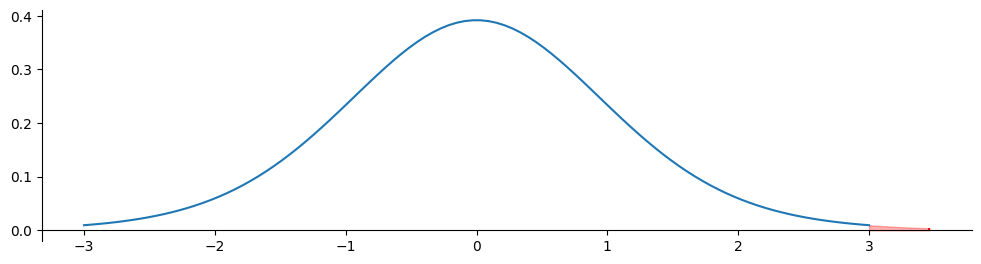

In [ ]:
def main():
    data = np.array([[93,76],
                     [70,72],
                     [81,75],
                     [65,68],
                     [79,65],
                     [54,54],
                     [94,88],
                     [91,81],
                     [77,65],
                     [65,57],
                     [95,86],
                     [89,87],
                     [78,78],
                     [80,77],
                     [76,76]])
    
    print("computation using package")
    statistic, p_value = stats.ttest_rel(data[:,0], data[:,1], alternative="greater")
    print(f"{statistic = :.4f}")
    print(f"{p_value = :.4f}", end="\n\n")

    print("computation using formula")
    difference = data[:,0] - data[:,1]
    x_bar = difference.mean()
    mu = 0 
    s = difference.std(ddof=1)
    n = difference.shape[0]
    statistic = ( x_bar - mu ) / ( s / np.sqrt( n ) )
    p_value = stats.t(n-1).sf(statistic)
    print(f"{statistic = :.4f}")
    print(f"{p_value = :.4f}", end="\n\n")

    fig, ax = plt.subplots(figsize=(12,3))
    x = np.linspace(-3,3,100)
    pdf = stats.t(n-1).pdf(x)
    ax.plot(x, pdf)
    ax.plot([statistic, statistic], [0, stats.t(n-1).pdf(statistic)], '--r')
    x = np.linspace(statistic,3,100)
    pdf = stats.t(n-1).pdf(x)
    ax.fill_between(x, pdf, np.zeros(100), color='red', alpha=0.3)
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.spines['bottom'].set_position('zero')
    plt.show()
    
if __name__ == "__main__":
    main()

####**Section 10 Paied Sample (Non-Parametric) Wilcoxon Signed-Rank Test [wiki](https://en.wikipedia.org/wiki/Wilcoxon_signed-rank_test) [doc](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.wilcoxon.html)**###### 

#####**Null and Alternative of Paied Sample (Non-Parametric) Wilcoxon Signed-Rank Test**



$$\begin{array}{llll}
H_0&&\text{The distribution of $D_i=X_i-Y_i$ is symmetric about $\mu=0$}\\
H_1\quad\text{One-sided Alternative Hypothesis Less}&&\text{The distribution of $D_i=X_i-Y_i$ is symmetric about $\mu<0$}\\
H_2\quad\text{One-sided Alternative Hypothesis Greater}&&\text{The distribution of $D_i=X_i-Y_i$ is symmetric about $\mu>0$}\\
H_3\quad\text{Two-sided Alternative Hypothesis}&&\text{The distribution of $D_i=X_i-Y_i$ is symmetric about $\mu\neq 0$}\\
\end{array}$$

#####**Paied Sample (Non-Parametric) Wilcoxon Signed-Rank Test : scipy.stats.wilcoxon**###### 

|Student|Post|Pre|Sign|AbsDifference|Rank|
|:---:|:---:|:---:|:---:|:---:|:---:|
|6|54|54|0|0|1|
|13|78|78|0|0|2|
|15|76|76|0|0|3|
|2|70|72|-|2|4|
|4|65|68|-|3|5|
|3|81|75|+|6|6|
|7|94|88|+|6|7|
|10|65|57|+|8|8|
|11|95|86|+|9|9|
|8|91|81|+|10|10|
|9|77|65|+|12|11|
|12|89|87|+|12|12|
|5|79|65|+|14|13|
|1|93|76|+|17|14|
|14|80|77|+|17|15|



#####**Statistic**

$$
\displaystyle T=\sum _{i=1}^{N}\operatorname{sign}(\text{Difference})*\text{Rank_of_Absolute_Difference}
$$

#####**How to handle Ties**



```
zero_method{“wilcox”, “pratt”, “zsplit”}, optional
There are different conventions for handling pairs of observations with equal values (“zero-differences”, or “zeros”).

“wilcox”: Discards all zero-differences (default); see [4].

“pratt”: Includes zero-differences in the ranking process, but drops the ranks of the zeros (more conservative); see [3]. In this case, the normal approximation is adjusted as in [5].

“zsplit”: Includes zero-differences in the ranking process and splits the zero rank between positive and negative ones.
```

[doc](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.wilcoxon.html)

#####**Paied Sample (Non-Parametric) Wilcoxon Signed-Rank Test : scipy.stats.wilcoxon**###### 

In [ ]:
def main():
    data = np.array([[93,76],
                     [70,72],
                     [81,75],
                     [65,68],
                     [79,65],
                     [54,54],
                     [94,88],
                     [91,81],
                     [77,65],
                     [65,57],
                     [95,86],
                     [89,87],
                     [78,78],
                     [80,77],
                     [76,76]])
    
    statistic, p_value = stats.wilcoxon(data[:,0], data[:,1], mode="approx", zero_method="pratt")
    print(f"{p_value = :.4f}")
    
    statistic, p_value = stats.wilcoxon(data[:,0] - data[:,1], mode="approx", zero_method="pratt")
    print(f"{p_value = :.4f}")
    
    
if __name__ == "__main__":
    main()

p_value = 0.0086
p_value = 0.0086


### **Chapter 13 Confidence Interval and Testing in Linear Regression**

#### **Section 1 Conditions for Confidence Interval and Testing in Linear Regression**

##### **Conditions for Confidence Interval and Testing in Linear Regression [eng](https://www.khanacademy.org/math/ap-statistics/inference-slope-linear-regression/inference-slope/v/conditions-inference-slope?modal=1)**

- **L** : actual linear relationship between x and y
- **I** : independence
- **N** : normal
- **E** : equal variance
- A
- **R** : random

#####**(Rule of Tumb) Confidence Interval** 

sigma square : 9
s square     : 9.70872110991394


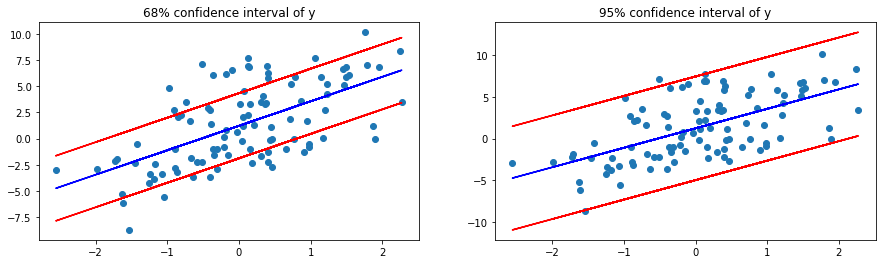

In [ ]:
import numpy as np; np.random.seed(0)
import matplotlib.pyplot as plt
from scipy import stats

# data generation
n = 100
sigma = 3
x = np.random.randn(n,1) # (100,1)
y = 1 + 2 * x + sigma * np.random.randn(n,1) # (100,1)

# construction of linear regression line
x_bar = x.mean()
y_bar = y.mean()
s_x = x.std(ddof=n-1)
s_y = y.std(ddof=n-1)
r = np.corrcoef(np.concatenate([x,y], axis=1), rowvar=False)[1,0]
beta_hat = r * s_y / s_x
y_hat = beta_hat * (x - x_bar) + y_bar

# compute s_square
s_square = np.sum( (y - y_hat)**2 ) / ( n - 2 )
s = np.sqrt(s_square)

fig, (ax0, ax1) = plt.subplots(1,2,figsize=(15,4))

# 68% (rule of tumb) confidence interval
# y_pred plus minus s
ax0.plot(x,y,'o')
ax0.plot(x,y_hat,'-b')
ax0.plot(x,y_hat+s,'-r')
ax0.plot(x,y_hat-s,'-r')
ax0.set_title('68% confidence interval of y')

# 95% (rule of tumb) confidence interval
# y_pred plus minus 2*s
ax1.plot(x,y,'o')
ax1.plot(x,y_hat,'-b')
ax1.plot(x,y_hat+2*s,'-r')
ax1.plot(x,y_hat-2*s,'-r')
ax1.set_title('95% confidence interval of y')

plt.show()

#### **Section 2 Sampling Distribution**

#####**Sampling Distribution**



$$\begin{array}{llc}
\text{Slope}&&\displaystyle
\frac{\hat{\beta}_1-\beta_1}{s\sqrt{\frac{1}{\sum_{i=1}^n(x_i-\bar{x})^2}}}\sim t_{n-2}\\
\\
\text{Resonse Expectation}&&\displaystyle
\frac{(\hat{\beta}_0+\hat{\beta}_1 x_0)-(\beta_0+\beta_1 x_0)}{s\sqrt{\frac{1}{n}+\frac{(x_0-\bar{x})^2}{\sum_{i=1}^n(x_i-\bar{x})^2}}}\sim t_{n-2}\\
\\
\text{Response}&&\displaystyle
\frac{(\hat{\beta}_0+\hat{\beta}_1 x_0)-(\beta_0+\beta_1 x_0+\varepsilon)}{s\sqrt{1+\frac{1}{n}+\frac{(x_0-\bar{x})^2}{\sum_{i=1}^n(x_i-\bar{x})^2}}}\sim t_{n-2}
\end{array}$$

#####**Sampling Distribution (General Case)**

$$
f(x^{(i)})=\beta_0+\sum_{j=1}^p\beta_jx_j^{(i)}
$$
$$
$$
$$
{\bf X}=\left[\begin{array}{cccccc}
1&x^{(1)}_1&x^{(1)}_2&\cdots&x^{(1)}_p\\
1&x^{(2)}_1&x^{(2)}_2&\cdots&x^{(2)}_p\\
\vdots&\vdots&\vdots&\ddots&\vdots\\
1&x^{(N)}_1&x^{(N)}_2&\cdots&x^{(N)}_p\\
\end{array}\right]
$$
$$
$$
$$
\hat\beta=({\bf X}^T{\bf X})^{-1}{\bf X}^T{\bf y}
$$
$$
$$
$$
\hat{\bf y}={\bf X}\hat\beta={\bf X}({\bf X}^T{\bf X})^{-1}{\bf X}^T{\bf y}
$$
$$
$$
$$
\hat\beta=({\bf X}^T{\bf X})^{-1}{\bf X}^T{\bf y}\sim N(\beta,({\bf X}^T{\bf X})^{-1}\sigma^2)
$$
$$
$$
$$
\hat\sigma^2=\frac{1}{N-p-1}\sum_{i=1}^N(y^{(i)}-\hat y^{(i)})^2\sim \sigma^2\frac{\chi^2_{N-p-1}}{N-p-1}
$$
$$
$$
Under $H_0:\beta_j=0$
$$
t_j=\frac{\hat\beta_j}{\hat\sigma\sqrt{v_j}}\sim t_{N-p-1}
$$
where
$$
v_j=({\bf X}^T{\bf X})^{-1}_{jj}
$$

#### **Section 3 Confidence Interval**

#####**Confidence Interval**




$$\begin{array}{llc}
\text{Slope}&&
\displaystyle
\hat{\beta}_1 \pm t_{n-2}(0.975)s\sqrt{\frac{1}{\sum_{i=1}^n(x_i-\bar{x})^2}}\\
\\
\text{Resonse Expectation}&&\displaystyle
(\hat{\beta}_0+\hat{\beta}_1 x_0) \pm t_{n-2}(0.975)s\sqrt{\frac{1}{n}+\frac{(x_0-\bar{x})^2}{\sum_{i=1}^n(x_i-\bar{x})^2}}\\
\\
\text{Response}&&\displaystyle
(\hat{\beta}_0+\hat{\beta}_1 x_0) \pm t_{n-2}(0.975)s\sqrt{1+\frac{1}{n}+\frac{(x_0-\bar{x})^2}{\sum_{i=1}^n(x_i-\bar{x})^2}}
\end{array}$$

#####**Confidence Interval of $Ey$ and $y$**

sigma square : 9
s square     : 9.70872110991394


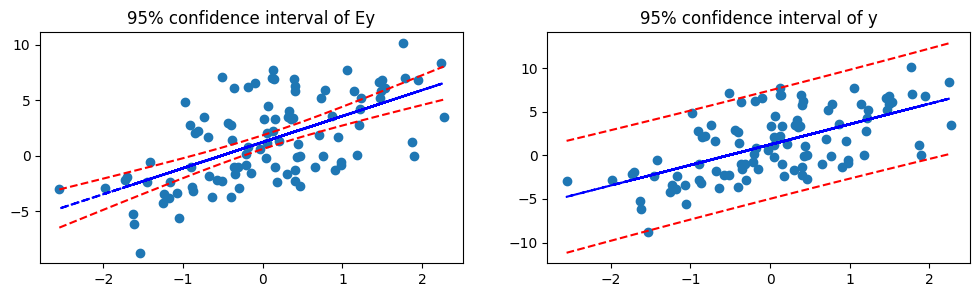

In [67]:
def main():
    seed = 0
    np.random.seed(seed)

    # data generation
    n = 100
    sigma = 3
    x = np.random.randn(n,1) # (100,1)
    y = 1 + 2 * x + sigma * np.random.randn(n,1) # (100,1)

    # construction of linear regression line
    x_bar = x.mean()
    y_bar = y.mean()
    s_x = x.std(ddof=n-1)
    s_y = y.std(ddof=n-1)
    r = np.corrcoef(np.concatenate([x,y], axis=1), rowvar=False)[1,0]
    beta_hat = r * s_y / s_x
    y_hat = beta_hat * (x - x_bar) + y_bar

    # compute s_square
    s_square = np.sum( (y - y_hat)**2 ) / ( n - 2 )
    s = np.sqrt(s_square)
    print("sigma square : {}".format( sigma**2 ))
    print("s square     : {}".format( s_square ))

    # confidence interval for the expectation of y when x is given
    x0 = np.linspace(x.min(),x.max(),20)
    y0_hat = beta_hat * (x0 - x_bar) + y_bar
    width = stats.t(n-2).ppf(0.975) * s * np.sqrt( (1/n) + (x0-x_bar)**2 / (np.sum( (x-x_bar)**2 )) ) 
    upper = y0_hat + width
    lower = y0_hat - width

    # confidence interval for y itself when x is given
    width2 = stats.t(n-2).ppf(0.975) * s * np.sqrt( 1 + (1/n) + (x0-x_bar)**2 / (np.sum( (x-x_bar)**2 )) ) 
    upper2 = y0_hat + width2
    lower2 = y0_hat - width2

    fig, (ax0, ax1) = plt.subplots(1,2,figsize=(12,3))

    # plot confidence interval for the expectation of y when x is given
    ax0.plot(x,y,'o')
    ax0.plot(x,y_hat,'--b')
    ax0.plot(x0,upper,'--r')
    ax0.plot(x0,lower,'--r')
    ax0.set_title('95% confidence interval of Ey')

    # plot confidence interval for y itself when x is given
    ax1.plot(x,y,'o')
    ax1.plot(x,y_hat,'--b')
    ax1.plot(x0,upper2,'--r')
    ax1.plot(x0,lower2,'--r')
    ax1.set_title('95% confidence interval of y')

    plt.show()

if __name__ == "__main__":
    main()

#### **Section 4 Test**

#####**Slope Test [eng](https://www.khanacademy.org/math/ap-statistics/inference-slope-linear-regression/inference-slope/v/intro-inference-slope?modal=1)**


$$
H_0: \beta_1=0\quad\text{vs}\quad H_1: \beta_1\neq 0
$$

Under the null hypothesis

$$\displaystyle
\frac{\hat{\beta}_1}{s\sqrt{\frac{1}{\sum_{i=1}^n(x_i-\bar{x})^2}}}\sim t_{n-2}
$$

p value for testing H_0 : beta = 0 vs H_1 : beta != 0 : 1.9521947001526184e-11


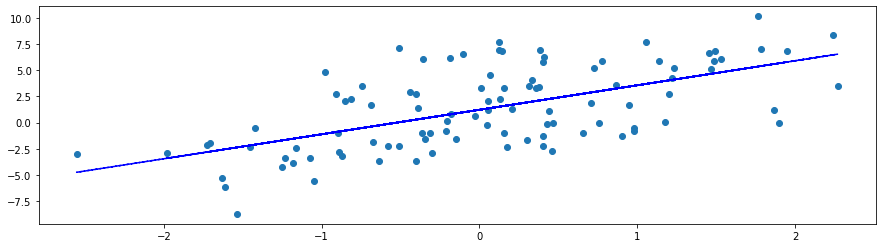

In [ ]:
import numpy as np; np.random.seed(0)
import matplotlib.pyplot as plt
from scipy import stats

# data generation
n = 100
sigma = 3
x = np.random.randn(n,1) # (100,1)
y = 1 + 2 * x + sigma * np.random.randn(n,1) # (100,1)

# construction of linear regression line
x_bar = x.mean()
y_bar = y.mean()
s_x = x.std(ddof=n-1)
s_y = y.std(ddof=n-1)
r = np.corrcoef(np.concatenate([x,y], axis=1), rowvar=False)[1,0]
beta_hat = r * s_y / s_x
y_hat = beta_hat * (x - x_bar) + y_bar

# compute s_square
s_square = np.sum( (y - y_hat)**2 ) / ( n - 2 )
s = np.sqrt(s_square)
print("sigma square : {}".format( sigma**2 ))
print("s square     : {}".format( s_square ))

# p value for testing H_0 : beta = 0 vs H_1 : beta != 0
t = beta_hat / ( s * np.sqrt( 1 / np.sum( (x-x_bar)**2 ) ) )
p_value = min( stats.t(n-2).cdf(t), stats.t(n-2).sf(t) ) * 2
print("p value for testing H_0 : beta = 0 vs H_1 : beta != 0 : {}".format(p_value))

fig, ax = plt.subplots(figsize=(15,4))
ax.plot(x,y,'o')
ax.plot(x,y_hat,'--b')
plt.show()

#####**Slope Test : statsmodels.formula.api.ols**

      TV  Radio  Newspaper  Sales
0  230.1   37.8       69.2   22.1
1   44.5   39.3       45.1   10.4
2   17.2   45.9       69.3    9.3
3  151.5   41.3       58.5   18.5
4  180.8   10.8       58.4   12.9
result = sm.ols('Sales ~ TV + Radio + Newspaper', dg_train).fit()
result.summary()
                            OLS Regression Results                            
Dep. Variable:                  Sales   R-squared:                       0.894
Model:                            OLS   Adj. R-squared:                  0.891
Method:                 Least Squares   F-statistic:                     381.2
Date:                Sun, 04 Jun 2023   Prob (F-statistic):           5.60e-66
Time:                        02:41:39   Log-Likelihood:                -273.89
No. Observations:                 140   AIC:                             555.8
Df Residuals:                     136   BIC:                             567.5
Df Model:                           3                                         
Co

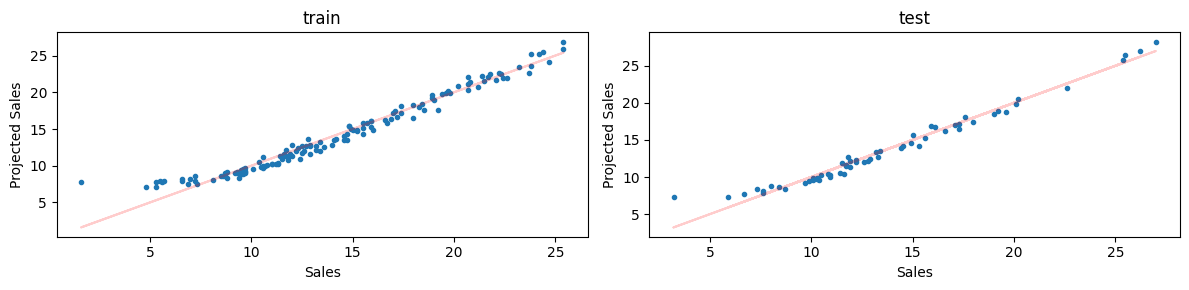

In [ ]:
import statsmodels.formula.api as sm # conda install -c conda-forge statsmodels

def main():
    url = 'https://raw.githubusercontent.com/justmarkham/scikit-learn-videos/master/data/Advertising.csv'
    df = pd.read_csv(url, usecols=[1,2,3,4])
    num_data = df.shape[0]
    test_size_ratio = 0.3
    num_data_train = int(num_data * (1-test_size_ratio)) 
    dg_train = df.iloc[:num_data_train] 
    dg_test = df.iloc[num_data_train:] 
    print(dg_train.head())
    
    result = sm.ols('Sales ~ TV + Radio + Newspaper', dg_train).fit()
    print("result = sm.ols('Sales ~ TV + Radio + Newspaper', dg_train).fit()")
    print("result.summary()")
    print(result.summary(), end="\n\n")
    print("-"*80, end="\n\n")
    
    result = sm.ols('Sales ~ TV + Radio', dg_train).fit()
    print("result = sm.ols('Sales ~ TV + Radio', dg_train).fit()")
    print("result.summary()")
    print(result.summary(), end="\n\n")
    print("-"*80, end="\n\n")
    
    result = sm.ols('Sales ~ TV + Radio + TV:Radio', dg_train).fit()
    print("result = sm.ols('Sales ~ TV + Radio', dg_train).fit()")
    print("result.summary()")
    print(result.summary(), end="\n\n")
    print("-"*80, end="\n\n")
    
    model = sm.ols('Sales ~ TV + Radio + TV:Radio', dg_train)
    result = model.fit()
    dg_train_pred = model.predict(result.params)

    model_pred = sm.ols('Sales ~ TV + Radio + TV:Radio', dg_test)
    dg_test_pred = model_pred.predict(result.params)
    
    fig, axes = plt.subplots(1,2,figsize=(12,3))
    for ax, title, dg, dg_pred in zip(axes, ("train", "test"), (dg_train, dg_test), (dg_train_pred, dg_test_pred)):
        ax.set_title(title)
        ax.plot(dg.Sales, dg_pred, '.', label="pred")
        ax.plot(dg.Sales, dg.Sales, '-r', alpha=0.2, label="target")
        ax.set_xlabel('Sales')
        ax.set_ylabel('Projected Sales')         
    plt.tight_layout()
    plt.show()
             
    
if __name__ == "__main__":
    main()

### **Chapter 14 ANOVA**

####**Section 1 One Way ANOVA [eng](https://www.youtube.com/watch?v=Lp2aV_4LF48&t=146s)**

#####**Null and Alternative of One Way ANOVA**

**For Categorical Variable $X$**

$$\begin{array}{llll}
H_0&&\mu_1=\mu_2=\cdots=\mu_k\\
H_1&&\mu_i\neq\mu_j\quad\text{for some $i$ and $j$}
\end{array}$$

where $\mu_i$ is the mean when $X=i$ and $k$ is the number of groups for the categorical variable $X$.

#####**Comparision of Null of One Way ANOVA to Linear Regression**

$$\begin{array}{cccccccc}
&&\text{Linear Regression}&&\text{One Way ANOVA}\\
\text{Model}&&y=\alpha+\beta x+\text{noise}
&&
y=\alpha+\sum_{i=1}^{c}\beta_i 1_{x\in C_i}+\text{noise}
\\
\text{H}_0&&\beta=0
&&
\quad\beta_1=\cdots=\beta_c\\
\end{array}$$

#####**Assumption**

- Indepedent Samples

- $y|x\in C_i)\sim \text{Normal}$

- $Var(y|x\in C_1)=Var(y|x\in C_2)=\cdots=Var(y|x\in C_c)$

#####**Data**


||학생|공무원|직장인|
|:---:|:---:|:---:|:---:|
|돼지바|5,2,7,6,7,5,3,4,5,4|3,9,7,6,8,8,6,7,9,10|6,7,9,4,10,1,2,3,2,3|

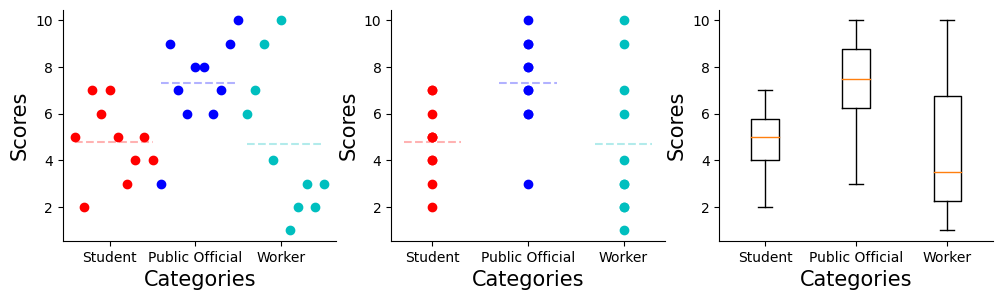

In [ ]:
def main():
    y_for_c1 = np.array([5,2,7,6,7,5,3,4,5,4])
    y_for_c2 = np.array([3,9,7,6,8,8,6,7,9,10])
    y_for_c3 = np.array([6,7,9,4,10,1,2,3,2,3])
    ys = (y_for_c1, y_for_c2, y_for_c3)

    colors = ('r', 'b', 'c')

    fig, (ax0, ax1, ax2) = plt.subplots(1,3,figsize=(12,3))

    x_for_c1 = np.arange(10)
    x_for_c2 = x_for_c1 + 10
    x_for_c3 = x_for_c1 + 20
    xs = (x_for_c1, x_for_c2, x_for_c3)
    for x, y, color in zip(xs, ys, colors):
        ax0.plot(x, y, 'o', color=color)
        ax0.plot(x, y.mean()*np.ones(10), '--', color=color, alpha=0.3)
    ax0.set_xticks(
        ticks=(4, 14, 24),
        labels=("Student", "Public Official", "Worker")
        )

    x_for_c1 = np.array([4]*10)
    x_for_c2 = np.array([14]*10)
    x_for_c3 = np.array([24]*10)
    xs = (x_for_c1, x_for_c2, x_for_c3)
    for x, y, color in zip(xs, ys, colors):
        ax1.plot(x, y, 'o', color=color)
        ax1.plot([x[0]-3,x[0]+3], y.mean()*np.ones(2), '--', color=color, alpha=0.3)
    ax1.set_xticks(
        ticks=(4, 14, 24),
        labels=("Student", "Public Official", "Worker")
        )

    ax2.boxplot(ys, labels=("Student", "Public Official", "Worker"))

    for ax in (ax0, ax1, ax2):
        ax.set_xlabel("Categories", fontsize=15)
        ax.set_ylabel("Scores", fontsize=15)
        ax.spines['top'].set_visible(False)
        ax.spines['right'].set_visible(False)

    plt.show()


if __name__ == "__main__":
    main()

#####**Sum of Squares**



$$\begin{array}{lll}
SS_{\text{Total}}
&=&
\displaystyle
\sum_{i=1}^{c}\sum_{j=1}^{n_i}\left(y_{ij}-\bar{y}_{\cdot\cdot}\right)^2\\
&=&\displaystyle
\sum_{i=1}^{c}\sum_{j=1}^{n_i}\left(
\left(y_{ij}-\bar{y}_{i\cdot}\right)-\left(\bar{y}_{i\cdot}-\bar{y}_{\cdot\cdot}\right)
\right)^2\\
&=&\displaystyle
\sum_{i=1}^{c}\sum_{j=1}^{n_i}
\left(y_{ij}-\bar{y}_{i\cdot}\right)^2
+
\sum_{i=1}^{c}\sum_{j=1}^{n_i}
\left(\bar{y}_{i\cdot}-\bar{y}_{\cdot\cdot}\right)^2\\
&=&\displaystyle
\sum_{i=1}^{c}\sum_{j=1}^{n_i}
\left(y_{ij}-\bar{y}_{i\cdot}\right)^2
+
\sum_{i=1}^{c}n_i
\left(\bar{y}_{i\cdot}-\bar{y}_{\cdot\cdot}\right)^2\\
&:=&\displaystyle
SS_{\text{Error}}
+
SS_{\text{Treatment}}\\
\end{array}$$

#####**ANOVA Table**



$$\begin{array}{cccccccccc}
\text{Factor}&\text{df}&SS&MS&F\\
\hline
\text{Treatment}&\displaystyle
c-1&\displaystyle
SS_{\text{Treatment}}&\displaystyle
MS_{\text{Treatment}}=\frac{SS_{\text{Treatment}}}{\text{df}_{\text{Treatment}}}&\displaystyle
F=\frac{MS_{\text{Treatment}}}{MS_{\text{Error}}}\\
\text{Error}&\displaystyle
n-c
&\displaystyle
SS_{\text{Error}}&\displaystyle
MS_{\text{Error}}=\frac{SS_{\text{Error}}}{\text{df}_{\text{Error}}}&\\
\hline
\text{Total}&\displaystyle
n-1&\displaystyle
SS_{\text{Total}}&&\\
\end{array}$$

where $n=\sum_{i=1}^cn_i$.

#####**Statistic**

$$F$$

#####**Sampling Distribution**











Under $H_0$

$$
F\sim F_{c-1,n-c}
$$

#####**One Way ANOVA : scipy.stats.f_oneway**

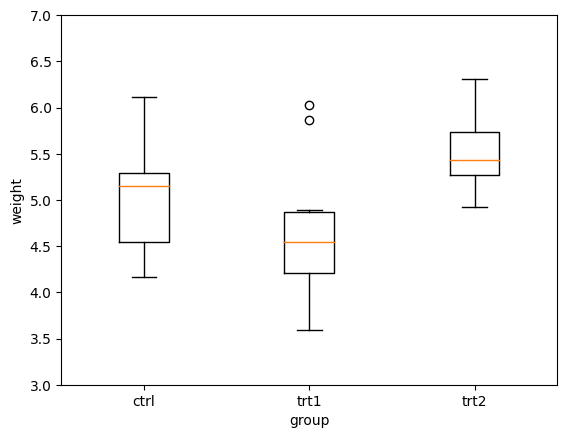

statistic = 4.846088
p_value = 0.01591


In [ ]:
def main():
    # data
    url = 'https://raw.githubusercontent.com/vincentarelbundock/Rdatasets/master/csv/datasets/PlantGrowth.csv'
    df = pd.read_csv(url, usecols=[1,2])

    # data preprocess
    dg = df.groupby('group')
    data_a = dg.get_group('ctrl').weight 
    data_b = dg.get_group('trt1').weight 
    data_c = dg.get_group('trt2').weight

    # boxplot of weight for each group - control, treatment 1, and 2
    fig, ax = plt.subplots()
    ax.boxplot([data_a, data_b, data_c])
    ax.set_ylim(3, 7)
    ax.set_xlabel('group')
    ax.set_ylabel('weight')
    ax.set_xticks([1, 2, 3]) 
    ax.set_xticklabels(['ctrl', 'trt1', 'trt2'])
    plt.show()

    # one-way anova
    statistic, p_value = stats.f_oneway(data_a, data_b, data_c)
    print(f"{statistic = :.6f}")
    print(f"{p_value = :.5f}")

if __name__ == "__main__":
    main()

#####**One Way ANOVA : statsmodels.formula.api.ols**

In [ ]:
from statsmodels.formula.api import ols
from statsmodels.stats.anova import anova_lm

def main():
    # data
    url = 'https://raw.githubusercontent.com/vincentarelbundock/Rdatasets/master/csv/datasets/PlantGrowth.csv'
    df = pd.read_csv(url, usecols=[1,2])

    # one-way anova
    # the "C" indicates categorical data
    model = ols('weight ~ C(group)', df).fit()
    print(anova_lm(model))

if __name__ == "__main__":
    main()

            df    sum_sq   mean_sq         F   PR(>F)
C(group)   2.0   3.76634  1.883170  4.846088  0.01591
Residual  27.0  10.49209  0.388596       NaN      NaN


####**Section 2 Two Way ANOVA [kor](https://www.youtube.com/watch?v=i4NHIGvTB-g) [eng](https://www.youtube.com/playlist?list=PLWtoq-EhUJe2TjJYfZUQtuq7a0dQCnOWp)**

#####**Null and Alternative of Two Way ANOVA**

**For Categorical Variable $X$**

$$\begin{array}{llll}
H_0&&\mu^X_1=\mu^X_2=\cdots=\mu^X_k\\
H_1&&\mu^X_i\neq\mu^X_j\quad\text{for some $i$ and $j$}
\end{array}$$

where $\mu^X_i$ is the mean when $X=i$ and $k$ is the number of groups for the categorical variable $X$.

**For Categorical Variable $Y$**

$$\begin{array}{llll}
H_0&&\mu^Y_1=\mu^Y_2=\cdots=\mu^Y_l\\
H_1&&\mu^Y_i\neq\mu^Y_j\quad\text{for some $i$ and $j$}
\end{array}$$

where $\mu^Y_i$ is the mean when $Y=i$ and $l$ is the number of groups for the categorical variable $Y$.

#####**Comparision of Null of Two Way ANOVA to Linear Regression**

$$\begin{array}{ccc}
&&\text{Linear Regression}&&\text{Two Way ANOVA}\\
\text{Model}&&y=\alpha+\beta_1 x_1+\beta_2 x_2 + \gamma x_1x_2
&&
y=\alpha+\sum_{i=1}^{a}\beta^{(1)}_i 1_{C^{(1)}_i}
+\sum_{j=1}^{b}\beta^{(2)}_j 1_{C^{(2)}_j}
+\sum_{i=1}^{a}\sum_{j=1}^{b}\beta_{ij} 1_{C^{(1)}_iC^{(2)}_j}\\
\text{H}_0&&\beta_1=0
&&\quad\text{all }\beta^{(1)}_{i}=0\\
\text{H}_0&&\beta_2=0
&&\quad\text{all }\beta^{(2)}_{j}=0\\
\text{H}_0&&\gamma=0&&\quad\text{all }\beta_{ij}=0\\
\end{array}$$

#####**Data**


||학생|공무원|직장인|
|:---:|:---:|:---:|:---:|
|돼지바|5,2,7,6,7,5,3,4,5,4|3,9,7,6,8,8,6,7,9,10|6,7,9,4,10,1,2,3,2,3|
|부라보콘|3,5,3,8,7,9,6,5,3,7|5,4,3,4,7,5,3,4,5,7|8,8,10,5,10,10,9,8,4,7|
|바밤바|5,2,7,6,6,7,5,3,9,8|8,8,6,7,2,9,3,9,7,6|6,7,9,4,5,3,7,6,5,10|

#####**Sum of Squares**

$$\begin{array}{lll}
SS_{\text{Total}}
&=&
\displaystyle
\sum_{i=1}^{a}\sum_{j=1}^{b}\sum_{k=1}^{m}\left(y_{ijk}-\bar{y}_{\cdot\cdot\cdot}\right)^2\\
&=&\displaystyle
\sum_{i=1}^{a}\sum_{j=1}^{b}\sum_{k=1}^{m}\left(
\left(
\bar{y}_{i\cdot\cdot}-\bar{y}_{\cdot\cdot\cdot}
\right)
+
\left(
\bar{y}_{\cdot j\cdot}-\bar{y}_{\cdot\cdot\cdot}
\right)
+
\left(
\bar{y}_{ij\cdot}
-\bar{y}_{i\cdot\cdot}-\bar{y}_{\cdot j\cdot}+\bar{y}_{\cdot\cdot\cdot}
\right)
+
\left(
\bar{y}_{ijk}-\bar{y}_{ij\cdot}
\right)
\right)^2\\
&=&\displaystyle
\sum_{i=1}^{a}\sum_{j=1}^{b}\sum_{k=1}^{m}\left(
\bar{y}_{i\cdot\cdot}-\bar{y}_{\cdot\cdot\cdot}
\right)^2
+
\sum_{i=1}^{a}\sum_{j=1}^{b}\sum_{k=1}^{m}\left(
\bar{y}_{\cdot j\cdot}-\bar{y}_{\cdot\cdot\cdot}
\right)^2
+
\sum_{i=1}^{a}\sum_{j=1}^{b}\sum_{k=1}^{m}\left(
\bar{y}_{ij\cdot}
-\bar{y}_{i\cdot\cdot}-\bar{y}_{\cdot j\cdot}+\bar{y}_{\cdot\cdot\cdot}
\right)^2
+
\sum_{i=1}^{a}\sum_{j=1}^{b}\sum_{k=1}^{m}\left(
\bar{y}_{ijk}-\bar{y}_{ij\cdot}
\right)^2\\
&=&\displaystyle
\sum_{i=1}^{a}bm\left(
\bar{y}_{i\cdot\cdot}-\bar{y}_{\cdot\cdot\cdot}
\right)^2
+
\sum_{j=1}^{b}am\left(
\bar{y}_{\cdot j\cdot}-\bar{y}_{\cdot\cdot\cdot}
\right)^2
+
\sum_{i=1}^{a}\sum_{j=1}^{b}m\left(
\bar{y}_{ij\cdot}
-\bar{y}_{i\cdot\cdot}-\bar{y}_{\cdot j\cdot}+\bar{y}_{\cdot\cdot\cdot}
\right)^2
+
\sum_{i=1}^{a}\sum_{j=1}^{b}\sum_{k=1}^{m}\left(
\bar{y}_{ijk}-\bar{y}_{ij\cdot}
\right)^2\\
&:=&\displaystyle
SS_{\text{Treatment}_1}
+SS_{\text{Treatment}_2}
+SS_{\text{Interaction}}
+SS_{\text{Error}}\\
\end{array}$$

#####**ANOVA Table**



$$\begin{array}{cccccccccc}
\text{Factor}&\text{df}&SS&MS&F&H_0\\
\hline
\text{Treatment 1}&\displaystyle
a-1&\displaystyle
SS_{\text{Treatment}_1}&\displaystyle
MS_{\text{Treatment}_1}=\frac{SS_{\text{Treatment}_1}}{\text{df}_{\text{Treatment}_1}}&\displaystyle
\frac{MS_{\text{Treatment}_1}}{MS_{\text{Error}}}
&\text{all }\beta^{(1)}_{i}=0\\
\text{Treatment 2}&\displaystyle
b-1&\displaystyle
SS_{\text{Treatment}_2}&\displaystyle
MS_{\text{Treatment}_2}=\frac{SS_{\text{Treatment}_2}}{\text{df}_{\text{Treatment}_2}}&\displaystyle
\frac{MS_{\text{Treatment}_2}}{MS_{\text{Error}}}
&\text{all }\beta^{(2)}_{i}=0\\
\text{Interaction}&\displaystyle
(a-1)(b-1)&\displaystyle
SS_{\text{Interaction}}&\displaystyle
MS_{\text{Interaction}}=\frac{SS_{\text{Interaction}}}{\text{df}_{\text{Interaction}}}&\displaystyle
\frac{MS_{\text{Interaction}}}{MS_{\text{Error}}}
&\text{all }\beta_{ij}=0\\
\text{Error}&\displaystyle
ab(m-1)
&\displaystyle
SS_{\text{Error}}&\displaystyle
MS_{\text{Error}}=\frac{SS_{\text{Error}}}{\text{df}_{\text{Error}}}&\\
\hline
\text{Total}&\displaystyle
abm-1&\displaystyle
SS_{\text{Total}}&&\\
\end{array}$$

#####**Statistic**

$$\begin{array}{cccccccccc}
\text{Factor}&F&H_0\\
\hline
\text{Treatment 1}&\displaystyle
\frac{MS_{\text{Treatment}_1}}{MS_{\text{Error}}}
&\text{all }\beta^{(1)}_{i}=0\\
\text{Treatment 2}&\displaystyle
\frac{MS_{\text{Treatment}_2}}{MS_{\text{Error}}}
&\text{all }\beta^{(2)}_{i}=0\\
\text{Interaction}&\displaystyle
\frac{MS_{\text{Interaction}}}{MS_{\text{Error}}}
&\text{all }\beta_{ij}=0\\
\end{array}$$

#####**Sampling Distribution**











Under $H_0$

$$\begin{array}{cccccccccc}
\text{Factor}&\text{df}&SS&MS&F&H_0&\text{Sampling Distribution}\\
\hline
\text{Treatment 1}&\displaystyle
a-1&\displaystyle
SS_{\text{Treatment}_1}&\displaystyle
MS_{\text{Treatment}_1}=\frac{SS_{\text{Treatment}_1}}{\text{df}_{\text{Treatment}_1}}&\displaystyle
\frac{MS_{\text{Treatment}_1}}{MS_{\text{Error}}}
&\text{all }\beta^{(1)}_{i}=0&F\sim F_{\text{df}_{\text{Treatment}_1},\text{df}_{\text{Error}}}\\
\text{Treatment 2}&\displaystyle
b-1&\displaystyle
SS_{\text{Treatment}_2}&\displaystyle
MS_{\text{Treatment}_2}=\frac{SS_{\text{Treatment}_2}}{\text{df}_{\text{Treatment}_2}}&\displaystyle
\frac{MS_{\text{Treatment}_2}}{MS_{\text{Error}}}
&\text{all }\beta^{(2)}_{i}=0&F\sim F_{\text{df}_{\text{Treatment}_2},\text{df}_{\text{Error}}}\\
\text{Interaction}&\displaystyle
(a-1)(b-1)&\displaystyle
SS_{\text{Interaction}}&\displaystyle
MS_{\text{Interaction}}=\frac{SS_{\text{Interaction}}}{\text{df}_{\text{Interaction}}}&\displaystyle
\frac{MS_{\text{Interaction}}}{MS_{\text{Error}}}
&\text{all }\beta_{ij}=0&F\sim F_{\text{df}_{\text{Interaction}},\text{df}_{\text{Error}}}\\
\text{Error}&\displaystyle
ab(m-1)
&\displaystyle
SS_{\text{Error}}&\displaystyle
MS_{\text{Error}}=\frac{SS_{\text{Error}}}{\text{df}_{\text{Error}}}&\\
\hline
\text{Total}&\displaystyle
abm-1&\displaystyle
SS_{\text{Total}}&&\\
\end{array}$$

#####**Two Way ANOVA : statsmodels.formula.api.ols**

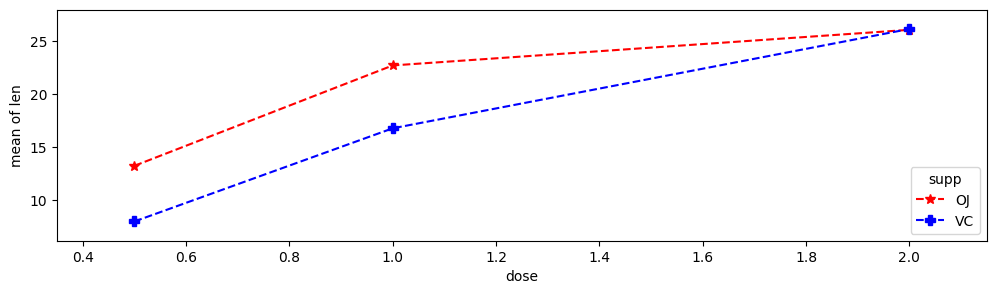

df       sum_sq      mean_sq          F        PR(>F)
C(supp)           1.0   205.350000   205.350000  15.571979  2.311828e-04
C(dose)           2.0  2426.434333  1213.217167  91.999965  4.046291e-18
C(supp):C(dose)   2.0   108.319000    54.159500   4.106991  2.186027e-02
Residual         54.0   712.106000    13.187148        NaN           NaN

In [ ]:
from statsmodels.formula.api import ols
from statsmodels.stats.anova import anova_lm
from statsmodels.graphics.factorplots import interaction_plot

def main():
    # data
    url = 'https://raw.githubusercontent.com/vincentarelbundock/Rdatasets/master/csv/datasets/ToothGrowth.csv'
    df = pd.read_csv(url, usecols=[1,2,3])

    # interaction_plot
    fig, ax = plt.subplots(figsize=(12,3))
    interaction_plot(df.dose, df.supp, df.len, 
                    colors=['red','blue'], markers=['*','P'], markersize=7, ax=ax, legendloc='lower right', linestyles=["--","--"])
    plt.show()

    # two-way anova
    # the "C" indicates categorical data
    model = ols('len ~ C(supp) + C(dose) + C(supp):C(dose)', df).fit()
    anova_lm(model)

if __name__ == "__main__":
    main()

####**Section 3 Mood's Median Test - One Way ANOVA for Ordinal Data [doc](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.median_test.html)**

#####**Null and Alternative**

$$\begin{array}{llll}
H_0&&\text{median}_1=\text{median}_2=\cdots=\text{median}_k\\
H_1&&\text{median}_i\neq\text{median}_j\quad\text{for some $i$ and $j$}
\end{array}$$

where $\mu_i$ is the mean of group $i$ and $k$ is the number of groups.

#####**Mood's Median Test : scipy.stats.median_test**

In [ ]:
def main():
    # data
    data0 = [10, 14, 14, 18, 20, 22, 24, 25, 31, 31, 32, 39, 43, 43, 48, 49]
    data1 = [28, 30, 31, 33, 34, 35, 36, 40, 44, 55, 57, 61, 91, 92, 99]
    data2 = [0, 3, 9, 22, 23, 25, 25, 33, 34, 34, 40, 45, 46, 48, 62, 67, 84]

    # result
    result = stats.median_test(data0, data1, data2)
    print(f"{result.median = }")
    print(f"{result.table = }")
    print(f"{result.pvalue = }") # p is too large to conclude that the medians are not the same:

if __name__ == "__main__":
    main()

result.median = 34.0
result.table = array([[ 5, 10,  7],
       [11,  5, 10]])
result.pvalue = 0.12609082774093244


####**Section 4 Mann–Whitney U Two Sample Test - One Way ANOVA (Two Samples) for Ordinal Data [doc](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.mannwhitneyu.html)**

#####**Null and Alternative**

$$\begin{array}{llll}
H_0&&\text{One sample does not stochastically dominate other sample}\\
H_1&&X\prec Y\quad\text{or}\quad Y\prec X
\end{array}$$


#####**Mann–Whitney U Two Sample Test : scipy.stats.mannwhitneyu**

In [ ]:
def main():
    # data
    data0 = [10, 14, 14, 18, 20, 22, 24, 25, 31, 31, 32, 39, 43, 43, 48, 49]
    data1 = [28, 30, 31, 33, 34, 35, 36, 40, 44, 55, 57, 61, 91, 92, 99]

    # result
    statistic, p_value = stats.mannwhitneyu(data0, data1)
    print("H_0: distributions of ordinals are all equal")
    print(f"{statistic = }")
    print(f"{p_value = }", end="\n\n")
    
    
if __name__ == "__main__":
    main()

H_0: distributions of ordinals are all equal
statistic = 49.0
p_value = 0.005296186087038487



####**Section 5 Kruskal-Wallis H Test - One Way ANOVA (Many Samples) for Ordinal Data [eng](https://www.youtube.com/watch?v=Af1YuaFylqM) [wiki](https://en.wikipedia.org/wiki/Kruskal%E2%80%93Wallis_one-way_analysis_of_variance) [doc](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.kruskal.html)**

#####**Null and Alternative**

$$\begin{array}{llll}
H_0&&\text{One sample does not stochastically dominate other sample}\\
H_1&&X_i\prec X_j\quad\text{for some $i$ and $j$}
\end{array}$$


#####**Kruskal-Wallis H Test : scipy.stats.kruskal**

In [ ]:
def main():
    # data
    data0 = [10, 14, 14, 18, 20, 22, 24, 25, 31, 31, 32, 39, 43, 43, 48, 49]
    data1 = [28, 30, 31, 33, 34, 35, 36, 40, 44, 55, 57, 61, 91, 92, 99]
    data2 = [0, 3, 9, 22, 23, 25, 25, 33, 34, 34, 40, 45, 46, 48, 62, 67, 84]

    # result
    statistic, p_value = stats.kruskal(data0, data1, data2)
    print("H_0: distributions of ordinals are all equal")
    print(f"{statistic = }")
    print(f"{p_value = }", end="\n\n")
    
    
if __name__ == "__main__":
    main()

H_0: distributions of ordinals are all equal
statistic = 7.648006963841692
p_value = 0.021840188833487706



###**Chapter 15 Chi-Square Test [wiki](https://en.wikipedia.org/wiki/Pearson%27s_chi-squared_test)**

####**Section 1 Chi-Square Distribution $\chi^2_d$**

#####**Definition - Chi-Square Distribution**



$$
\sum_{i=1}^dZ_i^2\sim\chi^2_d\quad\quad\quad\quad\text{where$\quad$ $Z_i\quad$ IID $\quad N(0,1^2)$}
$$

#####**Simulation of Chi-Square Distribution using Definition**

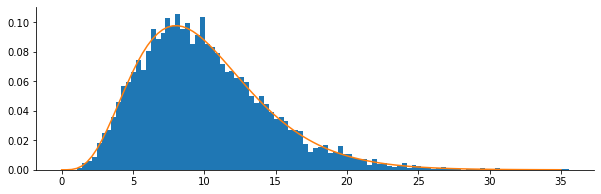

In [ ]:
def main():
    df = 10
    n_samples = 10_000
    
    normal_samples = np.random.normal(size=(n_samples, df)) # (10000, 5)
    chi_square_samples = np.sum(normal_samples**2, axis=1) # (10000,)
    
    fig, ax = plt.subplots(figsize=(10,3))
    
    ax.hist(chi_square_samples, bins=100, density=True)
    
    x = np.linspace(0, 35, 100)
    y = stats.chi2(df).pdf(x)
    ax.plot(x, y)
    
    ax.spines['right'].set_visible(False)
    ax.spines['top'].set_visible(False)
    
    plt.show()
    
    
if __name__ == "__main__":
    main()

#####**Simulation of Chi-Square Distribution using Numpy and Scipy.Stats Package**

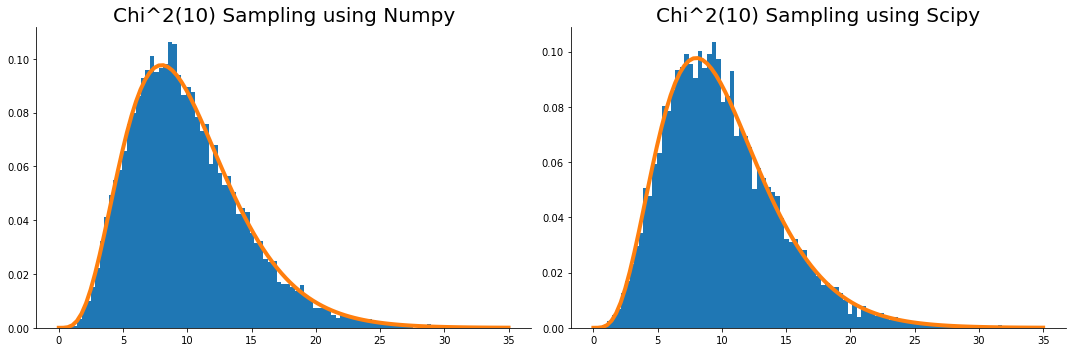

In [ ]:
from scipy import special

def main():
    sample_size = 10_000
    df = 10
    df_ = df / 2
    const = (1/2)**df_ / special.gamma(df_) 

    fig, (ax0, ax1) = plt.subplots(1,2,figsize=(15,5))
    
    ax0.set_title(f"Chi^2({df}) Sampling using Numpy", fontsize=20)
    
    x = np.random.chisquare(df, size=(sample_size,))
    x_fig = np.linspace(0,35,100)
    y_fig = const * x_fig**( df_ - 1 ) * np.exp( - x_fig / 2 )
    
    ax0.hist(x, density=True, bins=x_fig)
    ax0.plot(x_fig, y_fig, linewidth=4)
    
    ax1.set_title(f"Chi^2({df}) Sampling using Scipy", fontsize=20)
    
    x = stats.chi2(df).rvs(size=10_000)
    #x_fig = np.linspace(0,35,100)
    y_fig = stats.chi2(df).pdf(x_fig)
    
    ax1.hist(x, density=True, bins=x_fig)
    ax1.plot(x_fig, y_fig, linewidth=4)
    
    for ax in (ax0, ax1):
        ax.spines['right'].set_visible(False)
        ax.spines['top'].set_visible(False)
    
    plt.tight_layout()
    plt.show()

        
if __name__ == "__main__":
    main()

####**Section 2 Goodness of Fit Test [eng](https://www.youtube.com/watch?v=ZNXso_riZag&list=PLTNMv857s9WXg9tRi7wHU9cMgL1x140dO&index=8)**

#####**Question to Answer**

We have a dice. To test whether it is loaded, we roll it 60 times, and here is the outcome. Decide whether this dice is loaded.


$$\begin{array}{crr}
&\text{observed}&\text{expected}\\
\text{value}&\text{frequency}&\text{frequency}\\\hline
1&5&10\\
2&7&10\\
3&17&10\\
4&14&10\\
5&8&10\\
6&9&10\\\hline
\text{sum}&60&60
\end{array}$$

#####**Too Many 3's, but ...**

If we apply the (two-sided) $z$ test that the probability of having 3 is $1/6$,
then the $z$ statistic is
$$
\frac{\hat{p}-p_0}{\sqrt{\frac{p_0(1-p_0)}{n}}}
=
\frac{\frac{17}{60}-\frac{1}{6}}{\sqrt{\frac{\frac{1}{6}(1-\frac{1}{6})}{10}}}
\approx
2.42
$$
and the corresponding p-value is 1.53%. 

In [ ]:
def main():
    p_0 = 1/6
    p_hat = 17/ 60
    n = 60

    # z test statistic
    statistic = (p_hat-p_0) / np.sqrt( p_0 * (1-p_0) / n )

    # two-sided test
    p_value = stats.norm().sf(abs(statistic)) * 2

    print(f"{statistic = :.02f}")
    print(f"{p_value    = :.02%}")

if __name__ == "__main__":
    main()

statistic = 2.42
p_value    = 1.53%


Is this good enough evidence that the die is loaded?

Not too fast. We can run a similar test for each row. If we have many rows, we will eventually see a very small p-value. It’s like playing Russian roulette. If we keep on going, sooner or later, we will hit a very small p-value even if the die is fair. So, we cannot conclude that the die is loaded yet. 

#####**Null and Alternative**




$$\begin{array}{lll}
\text{Null}&\text{Dice is not loaded}\\
&\text{Observed frequencies are close to expected frequencies}\\
\\
\text{Alternative}&\text{Dice is loaded}\\
&\text{Observed frequencies are quite different from expected frequencies}\\
\end{array}$$

#####**Statistic**



$$
\displaystyle
\sum_{i=1}^k\frac{(O_i-E_i)^2}{E_i}
=
\frac{(5-10)^2}{10}+\frac{(7-10)^2}{10}+\frac{(17-10)^2}{10}+
\frac{(14-10)^2}{10}+\frac{(8-10)^2}{10}+\frac{(9-10)^2}{10}
=
10.4
$$



In [ ]:
def main():
    observed = np.array([5,7,17,14,8,9]) 
    expected = np.array([10]*6)
    statistic = np.sum( (observed-expected)**2 / expected )
    print(f'{statistic = }')

if __name__ == "__main__":
    main()

statistic = 10.4


#####**Critical Region**

$$\begin{array}{lll}
\text{Null}&\text{Dice is not loaded}\\
&\text{Observed frequencies are close to expected frequencies}\\
&O_i\approx E_i\quad\Rightarrow\quad\text{statistic}\approx 0\\
\\
\text{Alternative}&\text{Dice is loaded}\\
&\text{Observed frequencies are quite different from expected frequencies}\\
&O_i\not\approx E_i\quad\Rightarrow\quad\text{statistic}\approx\text{large positive number}\\
\end{array}$$

#####**Sampling Distribution**

$$\begin{array}{lll}
\displaystyle
\sum_{i=1}^k\frac{(O_i-E_i)^2}{E_i}
&=&\displaystyle
\sum_{i=1}^k\frac{\left(\left(\sum_{j=1}^{n}X_j\right)-np_i\right)^2}{np_i}\\
&=&\displaystyle
\sum_{i=1}^k\left(\frac{\left(\sum_{j=1}^{n}X_j\right)-np_i}{\sqrt{np_i}}\right)^2\\
&\approx&\displaystyle
\sum_{i=1}^k\left(\frac{\left(\sum_{j=1}^{n}X_j\right)-np_i}{\sqrt{np_i(1-p_i)}}\right)^2\\
&\approx&\displaystyle
\sum_{i=1}^kZ_i^2\\
&=&\displaystyle
\chi^2_{k-1}\\
\end{array}$$

In this dice case
$$
\displaystyle
\sum_{i=1}^6\frac{(O_i-E_i)^2}{E_i}
\approx
\chi^2_5
$$

#####**Degree of Freedom**

$$
\text{degrees of freedom}
=
\text{number of summation terms in chi square statistic}-1
$$

$$\begin{array}{crrr}
&\text{observed}&\text{expected}\\
\text{value}&\text{frequency}&\text{frequency}&\text{free or not}\\\hline
1&5&10&\text{free}\\
2&7&10&\text{free}\\
3&17&10&\text{free}\\
4&14&10&\text{free}\\
5&8&10&\text{free}\\
6&\color{red}{9}&\color{red}{10}&\color{red}{\text{not free}}\\\hline
\text{sum}&60&60
\end{array}$$

In this dice case
$$
\text{degrees of freedom}
=
6-1
=
5
$$

#####**[Bit of History](https://en.wikipedia.org/wiki/Chi-squared_test)**

In 1900, Pearson published a paper[2] claimed that as $n\rightarrow\infty$
$$
\displaystyle
\sum_{i=1}^k\frac{(O_i-E_i)^2}{E_i}
\Rightarrow
\chi^2_{k-1}
$$
However, 
there was some controversy in practical applications, and it was not settled for 20 years
until Fisher's 1922 and 1924 papers.[8][9]



#####**Rule of Thumb**

The $\chi^2$ approximation is good when all the expected frequencies are five or more. In this dice case, all the expected frequencies are five or more. Hence, the $\chi^2$ approximation is reasonable.



#####**p-value**

$$\begin{array}{lll}
\text{p-value}
&=&\displaystyle
P\left(\sum_{i=1}^k\frac{(O_i-E_i)^2}{E_i}\ge\text{statistic}\Big|H_0\right)
\end{array}$$

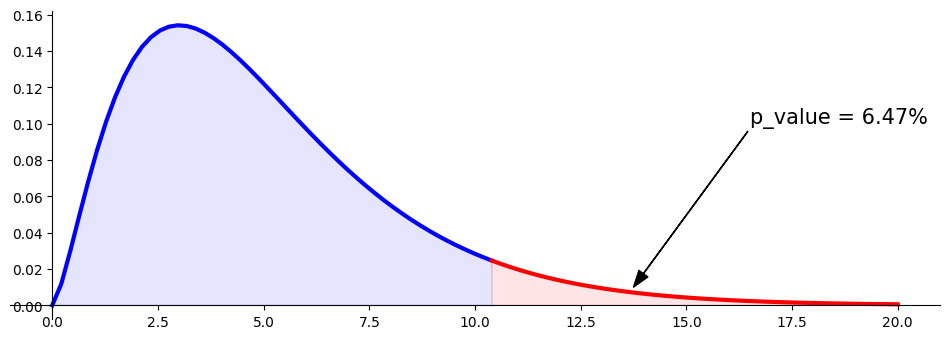

In [ ]:
def main():
    observed = np.array([5,7,17,14,8,9]) 
    expected = np.array([10]*6)
    statistic = np.sum( (observed-expected)**2 / expected )
    df = observed.shape[0] - 1
    p_value = stats.chi2(df).sf(statistic) 
    
    fig, ax = plt.subplots(figsize=(12,4))

    x = np.linspace(0, statistic) 
    y = stats.chi2(df).pdf(x)
    ax.plot(x, y, color='b', linewidth=3)

    x = np.concatenate([[0], x, [statistic], [0]])
    y = np.concatenate([[0], y, [0], [0]])
    ax.fill(x, y, color='b', alpha=0.1)

    x = np.linspace(statistic, 20, 100)
    y = stats.chi2(df).pdf(x) 
    ax.plot(x, y, color='r', linewidth=3)

    x = np.concatenate([[statistic], x, [20], [statistic]])
    y = np.concatenate([[0], y, [0], [0]])
    ax.fill(x, y, color='r', alpha=0.1)

    xy = ((12.5 + 15.0) / 2, 0.01)
    xytext = (16.5, 0.10)
    arrowprops = dict(color='k', width=0.2, headwidth=8)
    ax.annotate(f'{p_value = :.02%}', xy, xytext=xytext, fontsize=15, arrowprops=arrowprops)
    
    ax.spines['right'].set_visible(False)  
    ax.spines['top'].set_visible(False)
    ax.spines['bottom'].set_position("zero")
    ax.spines['left'].set_position("zero")
    
    plt.show() 
       
if __name__ == "__main__":
    main()

#####**Conclusion**

$$\text{The dice is not loaded.}$$

#####**Code - Goodness of Fit Test : scipy.stats.chisquare [doc](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.chisquare.html)**

In [ ]:
def main():
    observed = np.array([5,7,17,14,8,9]) 
    expected = np.array([10]*6)
    statistic, p_value = stats.chisquare(observed, f_exp=expected)
    print(f"{statistic = :.02f}")
    print(f"{p_value    = :.02%}")
   
if __name__ == "__main__":
    main()

statistic = 10.40
p_value    = 6.47%


####**Section 3 Independence Test [eng](https://www.youtube.com/watch?v=NTHA9Qa81R8&list=PLTNMv857s9WXg9tRi7wHU9cMgL1x140dO&index=6)**

#####**Question to Answer**

We randomly selected several people and recorded their sex and dominant hand. Here is the data. 

**observed**
$$\begin{array}{ccc|r}
&\text{men}&\text{women}&\text{row sum}\\\hline
\text{right-handed}&956&1,048&2,004\\
\text{left-handed}&98&107&205\\
\text{ambidextrous}&13&15&28\\\hline
\text{column sum}&1,067&1,170&2,237
\end{array}$$

Is there any relationship between sex and the dominant hand, or these two variables are independent?

#####**Null and Alternative**




$$\begin{array}{lll}
\text{Null}&\text{They are independent}\\
&\text{Observed frequencies are close to expected frequencies}\\
\\
\text{Alternative}&\text{They are not independent}\\
&\text{Observed frequencies are quite different from expected frequencies}\\
\end{array}$$

#####**If they are independent**

######**observed**



$$\begin{array}{crr|r}
&\text{men}&\text{women}&\text{row sum}\\\hline
\text{right-handed}&934&1,070&2,004\\
\text{left-handed}&113&92&205\\
\text{ambidextrous}&20&8&28\\\hline
\text{column sum}&1,067&1,170&2,237
\end{array}$$

######**expected**



$$\begin{array}{ccc|r}
&\text{men}&\text{women}&\text{row sum}\\\hline
\text{right-handed}&956&1,048&2,004\\
\text{left-handed}&98&107&205\\
\text{ambidextrous}&13&15&28\\\hline
\text{column sum}&1,067&1,170&2,237
\end{array}$$

######**How to get Expected**

$$\begin{array}{lll}
\displaystyle
P(\text{men})=\frac{1067}{2237},\
P(\text{right-handed})=\frac{2004}{2237}
&\Rightarrow&\displaystyle
P(\text{men},\text{right-handed})
=\frac{1067}{2237}\times\frac{2004}{2237}\\
&\Rightarrow&\displaystyle
\text{expected_frequency}(\text{men},\text{right-handed})
=\frac{1067}{2237}\times\frac{2004}{2237}\times 2237\approx 956\\
\end{array}$$

######**Code - How to get Expected**

In [ ]:
def compute_expected(observed):
    observed = np.array([[934,1070],[113,92],[20,8]])
    row_sum = observed.sum(axis=1)
    row_pmf = row_sum.reshape((-1,1)) / row_sum.sum() # (3, 1)

    column_sum = observed.sum(axis=0)
    column_pmf = column_sum.reshape((1,-1)) / column_sum.sum() # (1, 2)

    joint_pmf = row_pmf * column_pmf # (3, 2)
    expected = joint_pmf * row_sum.sum()
    return expected
    
def main():
    observed = np.array([[934,1070],[113,92],[20,8]])
    expected = compute_expected(observed)
    print(expected) 

if __name__ == "__main__":
    main()

[[ 955.86410371 1048.13589629]
 [  97.78050961  107.21949039]
 [  13.35538668   14.64461332]]


#####**Statistic and Sampling Distribution**

$$
\displaystyle
\sum_{i=1}^{n_i}\sum_{j=1}^{n_j}\frac{(O_{ij}-E_{ij})^2}{E_{ij}}\sim
\chi^2_{(n_i-1)(n_j-1)}
$$

where

$$
\displaystyle
p_i
=
\frac{O_{i\cdot}}{O_{\cdot\cdot}},\quad
p_j
=
\frac{O_{\cdot j}}{O_{\cdot\cdot}},\quad
E_{ij}
=
p_ip_jO_{\cdot\cdot}
$$

#####**Degrees of Freedom**

$$
\text{degrees of freedom}
=
(\text{num of first sum}-1)
(\text{num of second sum}-1)
$$

#####**Critical Region**

$$\begin{array}{lll}
\text{Null}&\text{They are independent}\\
&\text{Observed frequencies are close to expected frequencies}\\
&O_{ij}\approx E_{ij}\quad\Rightarrow\quad\text{statistic}\approx 0\\
\\
\text{Alternative}&\text{They are not independent}\\
&\text{Observed frequencies are quite different from expected frequencies}\\
&O_{ij}\not\approx E_{ij}\quad\Rightarrow\quad\text{statistic}\approx\text{large positive number}\\
\end{array}$$

#####**p-value**

$$\begin{array}{lll}
\text{p-value}
&=&\displaystyle
P\left(\sum_{i=1}^{n_i}\sum_{j=1}^{n_j}\frac{(O_{ij}-E_{ij})^2}{E_{ij}}\ge\text{statistic}\Big|H_0\right)
\end{array}$$

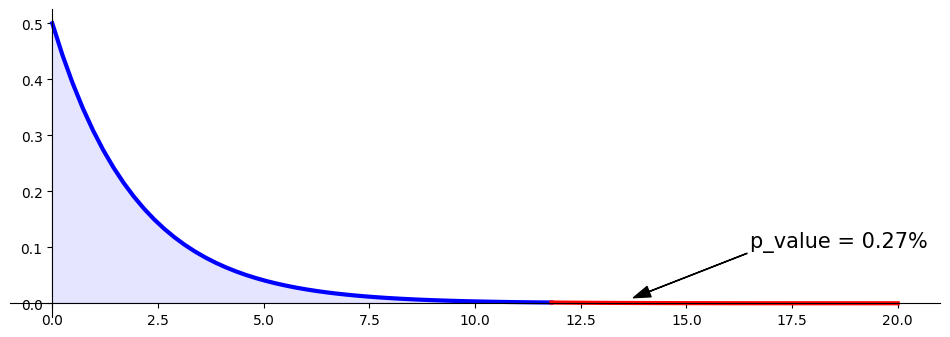

In [ ]:
def compute_expected(observed):
    observed = np.array([[934,1070],[113,92],[20,8]])
    row_sum = observed.sum(axis=1)
    row_pmf = row_sum.reshape((-1,1)) / row_sum.sum() # (3, 1)

    column_sum = observed.sum(axis=0)
    column_pmf = column_sum.reshape((1,-1)) / column_sum.sum() # (1, 2)

    joint_pmf = row_pmf * column_pmf # (3, 2)
    expected = joint_pmf * row_sum.sum()
    return expected

def main():
    observed = np.array([[934,1070],[113,92],[20,8]])
    expected = compute_expected(observed)

    statistic = np.sum( (observed-expected)**2 / expected )
    df = (observed.shape[0] - 1) * (observed.shape[1] - 1)
    p_value = stats.chi2(df).sf(statistic) 
    
    fig, ax = plt.subplots(figsize=(12,4))

    x = np.linspace(0, statistic) 
    y = stats.chi2(df).pdf(x)
    ax.plot(x, y, color='b', linewidth=3)

    x = np.concatenate([[0], x, [statistic], [0]])
    y = np.concatenate([[0], y, [0], [0]])
    ax.fill(x, y, color='b', alpha=0.1)

    x = np.linspace(statistic, 20, 100)
    y = stats.chi2(df).pdf(x) 
    ax.plot(x, y, color='r', linewidth=3)

    x = np.concatenate([[statistic], x, [20], [statistic]])
    y = np.concatenate([[0], y, [0], [0]])
    ax.fill(x, y, color='r', alpha=0.1)

    xy = ((12.5 + 15.0) / 2, 0.01)
    xytext = (16.5, 0.10)
    arrowprops = dict(color='k', width=0.2, headwidth=8)
    ax.annotate(f'{p_value = :.02%}', xy, xytext=xytext, fontsize=15, arrowprops=arrowprops)
    
    ax.spines['right'].set_visible(False)  
    ax.spines['top'].set_visible(False)
    ax.spines['bottom'].set_position("zero")
    ax.spines['left'].set_position("zero")
    
    plt.show() 
       
if __name__ == "__main__":
    main()

#####**Conclusion**

$$\text{They are not independent.}$$

#####**Code - Independence Test : scipy.stats.chi2_contingency [doc](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.chi2_contingency.html)**

In [ ]:
def main():
    observed = np.array([[934,1070],[113,92],[20,8]])
    statistic, p_value, degree_of_freedom, expected = stats.chi2_contingency(observed)
    print(f"{p_value = :.02%}")
   
if __name__ == "__main__":
    main()

p_value    = 0.27%


####**Section 4 Homogeneity Test [eng](https://www.youtube.com/watch?v=hoibLM5CngE)**

#####**Procedure of Homogeneity Test = Procedure of Independence Test**

Procedure of homogeneity test is identical to that of 
independence test.

$$
\text{Procedure of Homogeneity Test}
=
\text{Procedure of Independence Test}
$$

#####**Data Collection of Homogeneity Test $\neq$ Data Collection of Independence Test**



However, the data collection methods are differnt.

$$
\text{Data Collection of Homogeneity Test}
\neq
\text{Data Collection of Independence Test}
$$

$$\begin{array}{cc}
\text{Independence Test}&\text{Homogeneity Test}\\\hline
(x_i,y_i)\ \text{collected}& x_i\ \text{collected given $y$}
\end{array}$$

#####**Question to Answer**

For each country, we asked how people in the country feel about the hospital quality from five stars to one star. Here is the data.

**observed**
$$\begin{array}{cccc}
\text{Hospital Quality}&\text{US}&\text{Canada}&\text{Mexico}\\\hline
\text{5 Star}&541&75&231\\
\text{4 Star}&498&71&213\\
\text{3 Star}&779&96&321\\
\text{2 Star}&282&50&345\\
\text{1 Star}&65&19&120\\
\end{array}$$

Is the hospital satisfaction level distribution homogeneous among the countries, or do some differ?

#####**Code - Homogeneity Test : scipy.stats.chi2_contingency [doc](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.chi2_contingency.html)**

In [ ]:
def main():
    observed = np.array([[541,75,231],[498,71,213],[779,96,321],[282,50,345],[65,19,120]])
    statistic, p_value, degree_of_freedom, expected = stats.chi2_contingency(observed)
    print(f"{p_value = :.02%}")
   
if __name__ == "__main__":
    main()

p_value = 0.00%


###**Chapter 16 Normality Test [wiki](https://en.wikipedia.org/wiki/Normality_test)**

####**Section 1 Histogram [doc](https://matplotlib.org/3.1.1/api/_as_gen/matplotlib.pyplot.boxplot.html)**

#####**Code - Histogram**

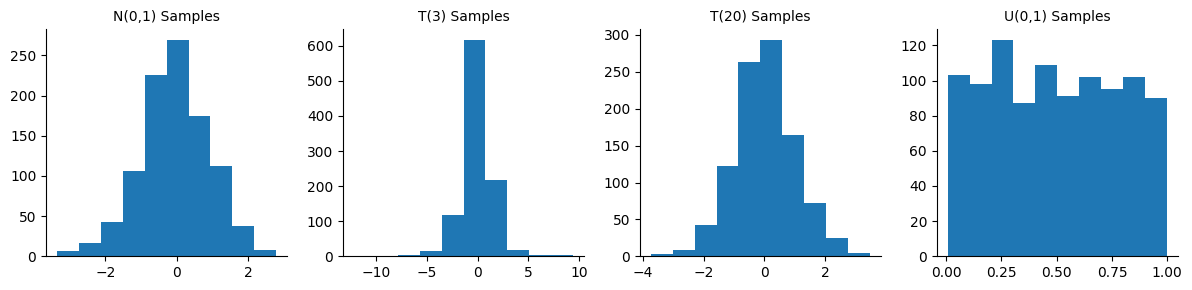

In [ ]:
def run(data, ax, distribution_name):
    ax.set_title(f"{distribution_name} Samples", fontsize=10)
    ax.hist(data)
    ax.spines['right'].set_visible(False)
    ax.spines['top'].set_visible(False) 

def main():
    size = (1_000,)

    fig, axes = plt.subplots(1,4,figsize=(12,3))
    
    data = {
        "N(0,1)" : stats.norm().rvs(size=size),
        "T(3)" : stats.t(3).rvs(size=size),
        "T(20)" : stats.t(20).rvs(size=size),
        "U(0,1)" : stats.uniform().rvs(size=size)
    }

    for ax, (distribution_name, data) in zip(axes, data.items()):
        run(data, ax, distribution_name)
    plt.tight_layout()
    plt.show()
       
if __name__ == "__main__":
    main()

#####**Code - Histogram for Paired Sample Test**

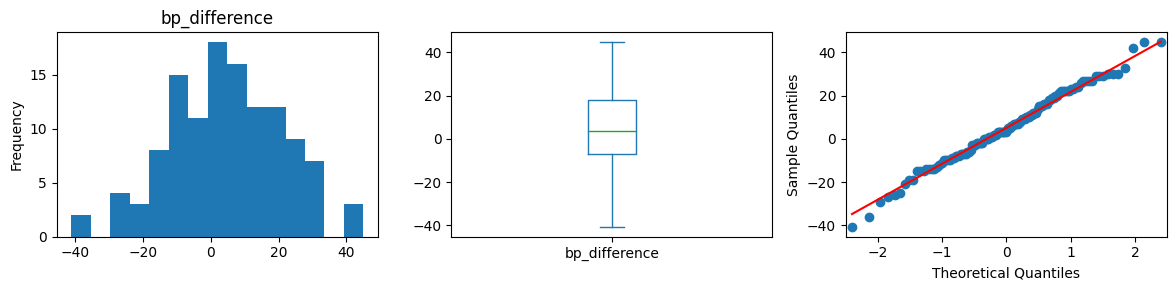

In [ ]:
from statsmodels.graphics.gofplots import qqplot

def main():
    url = 'https://raw.githubusercontent.com/Opensourcefordatascience/Data-sets/master/blood_pressure.csv'
    df = pd.read_csv(url)
    df['bp_difference'] = df['bp_before'] - df['bp_after']
    
    fig, (ax0, ax1, ax2) = plt.subplots(1,3,figsize=(12,3))
    df['bp_difference'].plot(kind='hist', title='bp_difference', bins=15, ax=ax0)
    df['bp_difference'].plot(kind='box', ax=ax1)
    qqplot(df['bp_difference'], line='s', ax=ax2)
    plt.tight_layout()
    plt.show()
       
if __name__ == "__main__":
    main()

####**Section 2 Box Plot [doc](https://matplotlib.org/3.1.1/api/_as_gen/matplotlib.pyplot.boxplot.html)**

#####**Code - Box Plot**

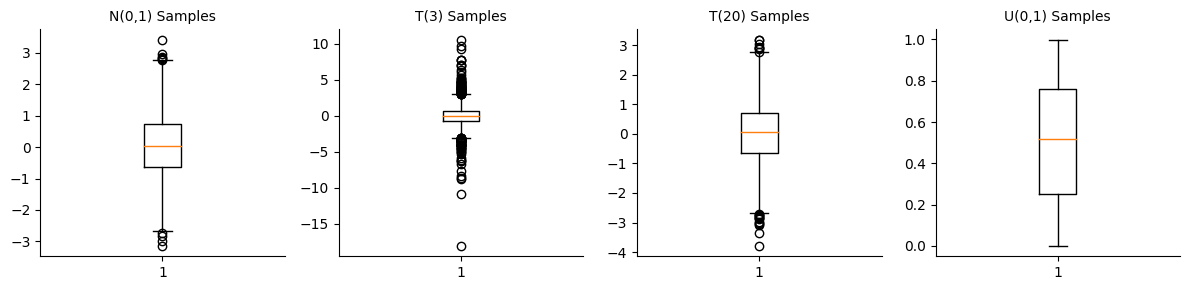

In [ ]:
def run(data, ax, distribution_name):
    ax.set_title(f"{distribution_name} Samples", fontsize=10)
    ax.boxplot(data)
    ax.spines['right'].set_visible(False)
    ax.spines['top'].set_visible(False) 

def main():
    size = (2000,)

    fig, axes = plt.subplots(1,4,figsize=(12,3))
    
    data = {
        "N(0,1)" : stats.norm().rvs(size=size),
        "T(3)" : stats.t(3).rvs(size=size),
        "T(20)" : stats.t(20).rvs(size=size),
        "U(0,1)" : stats.uniform().rvs(size=size)
    }

    for ax, (distribution_name, data) in zip(axes, data.items()):
        run(data, ax, distribution_name)
    plt.tight_layout()
    plt.show()
       
if __name__ == "__main__":
    main()

#####**Code - Box Plot for Paired Sample Test**

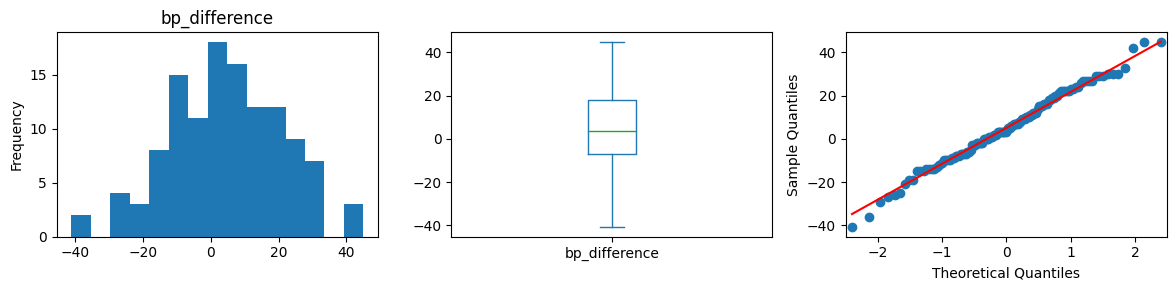

In [ ]:
from statsmodels.graphics.gofplots import qqplot

def main():
    url = 'https://raw.githubusercontent.com/Opensourcefordatascience/Data-sets/master/blood_pressure.csv'
    df = pd.read_csv(url)
    df['bp_difference'] = df['bp_before'] - df['bp_after']
    
    fig, (ax0, ax1, ax2) = plt.subplots(1,3,figsize=(12,3))
    df['bp_difference'].plot(kind='hist', title='bp_difference', bins=15, ax=ax0)
    df['bp_difference'].plot(kind='box', ax=ax1)
    qqplot(df['bp_difference'], line='s', ax=ax2)
    plt.tight_layout()
    plt.show()
       
if __name__ == "__main__":
    main()

####**Section 3 QQ Plot [doc](https://www.statsmodels.org/dev/generated/statsmodels.graphics.gofplots.qqplot.html)**

#####**Code - QQ Plot**

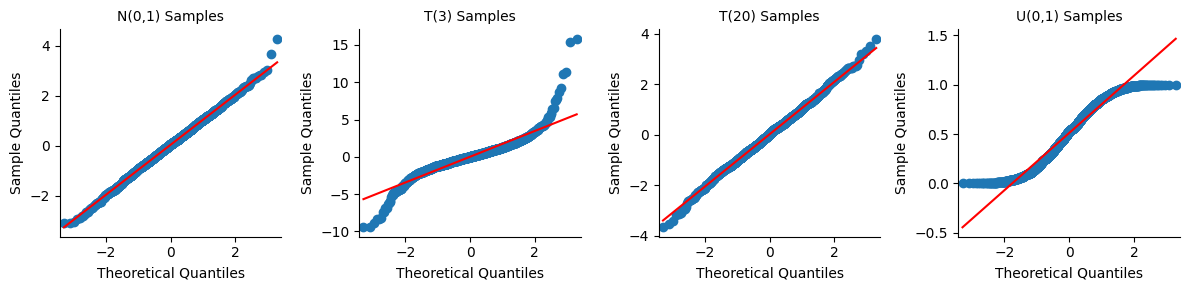

In [ ]:
from statsmodels.graphics.gofplots import qqplot

def run(data, ax, distribution_name):
    ax.set_title(f"{distribution_name} Samples", fontsize=10)
    qqplot(data, line='s', ax=ax)
    ax.spines['right'].set_visible(False)
    ax.spines['top'].set_visible(False) 

def main():
    size = (2000,)

    fig, axes = plt.subplots(1,4,figsize=(12,3))
    
    data = {
        "N(0,1)" : stats.norm().rvs(size=size),
        "T(3)" : stats.t(3).rvs(size=size),
        "T(20)" : stats.t(20).rvs(size=size),
        "U(0,1)" : stats.uniform().rvs(size=size)
    }

    for ax, (distribution_name, data) in zip(axes, data.items()):
        run(data, ax, distribution_name)
    plt.tight_layout()
    plt.show()
       
if __name__ == "__main__":
    main()

#####**Code - QQ Plot for Paired Sample Test**

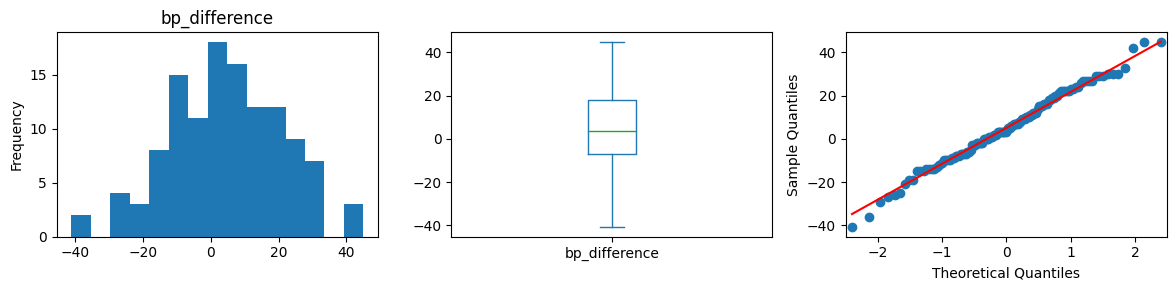

In [ ]:
from statsmodels.graphics.gofplots import qqplot

def main():
    url = 'https://raw.githubusercontent.com/Opensourcefordatascience/Data-sets/master/blood_pressure.csv'
    df = pd.read_csv(url)
    df['bp_difference'] = df['bp_before'] - df['bp_after']
    
    fig, (ax0, ax1, ax2) = plt.subplots(1,3,figsize=(12,3))
    df['bp_difference'].plot(kind='hist', title='bp_difference', bins=15, ax=ax0)
    df['bp_difference'].plot(kind='box', ax=ax1)
    qqplot(df['bp_difference'], line='s', ax=ax2)
    plt.tight_layout()
    plt.show()
       
if __name__ == "__main__":
    main()

####**Section 4 Skew Test [doc](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.skewtest.html)**

#####**Code - Skew Test**

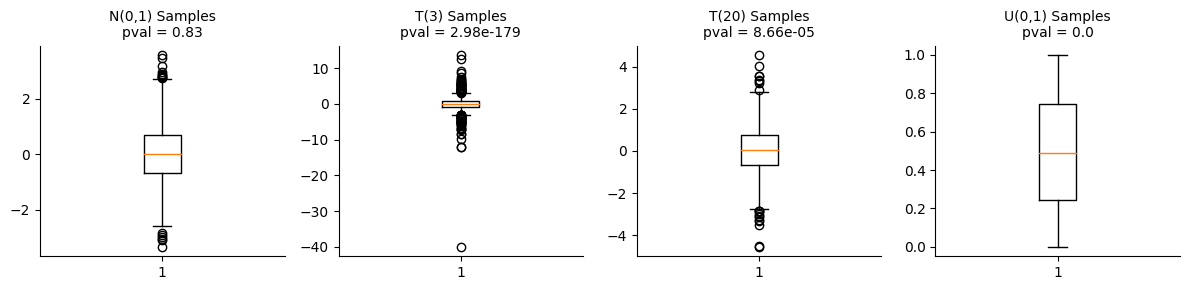

In [ ]:
def run(data, ax, distribution_name):
    _, pval = stats.skewtest(data)
    ax.set_title(f"{distribution_name} Samples\n{pval = :.3}", fontsize=10)
    ax.boxplot(data)
    ax.spines['right'].set_visible(False)
    ax.spines['top'].set_visible(False) 

def main():
    size = (2000,)

    fig, axes = plt.subplots(1,4,figsize=(12,3))
    
    data = {
        "N(0,1)" : stats.norm().rvs(size=size),
        "T(3)" : stats.t(3).rvs(size=size),
        "T(20)" : stats.t(20).rvs(size=size),
        "U(0,1)" : stats.uniform().rvs(size=size)
    }

    for ax, (distribution_name, data) in zip(axes, data.items()):
        run(data, ax, distribution_name)
    plt.tight_layout()
    plt.show()
       
if __name__ == "__main__":
    main()

#####**Code - Skew Test for Paired Sample Test**

pval = 0.9948129358278339



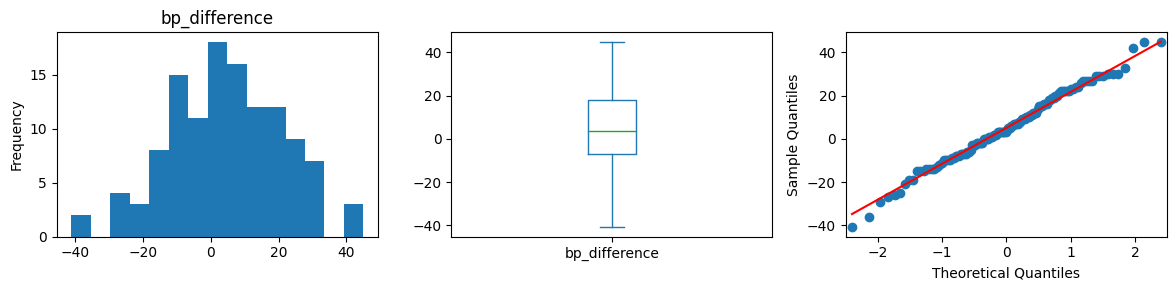

In [ ]:
from statsmodels.graphics.gofplots import qqplot

def main():
    url = 'https://raw.githubusercontent.com/Opensourcefordatascience/Data-sets/master/blood_pressure.csv'
    df = pd.read_csv(url)
    df['bp_difference'] = df['bp_before'] - df['bp_after']
    
    _, pval = stats.skewtest(df['bp_difference'])
    print(f"{pval = }", end="\n\n")
    
    fig, (ax0, ax1, ax2) = plt.subplots(1,3,figsize=(12,3))
    df['bp_difference'].plot(kind='hist', title='bp_difference', bins=15, ax=ax0)
    df['bp_difference'].plot(kind='box', ax=ax1)
    qqplot(df['bp_difference'], line='s', ax=ax2)
    plt.tight_layout()
    plt.show()
       
if __name__ == "__main__":
    main()

####**Section 5 Kurtosis Test [doc](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.kurtosistest.html)**

#####**Code - Kurtosis Test**

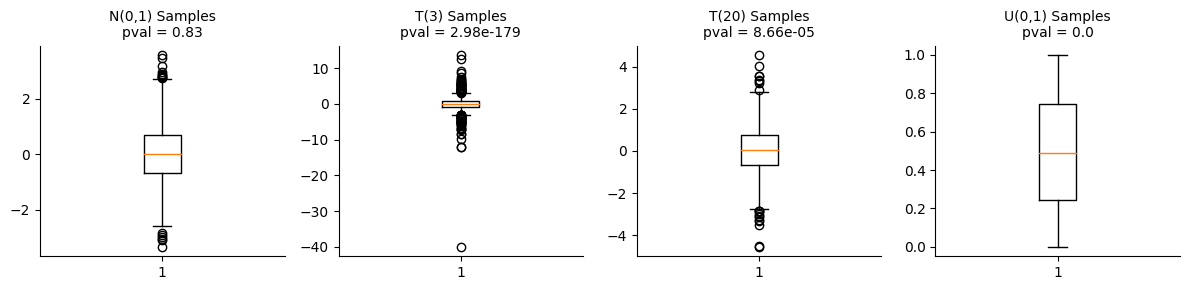

In [ ]:
def run(data, ax, distribution_name):
    _, pval = stats.kurtosistest(data)
    ax.set_title(f"{distribution_name} Samples\n{pval = :.3}", fontsize=10)
    ax.boxplot(data)
    ax.spines['right'].set_visible(False)
    ax.spines['top'].set_visible(False) 

def main():
    size = (2000,)

    fig, axes = plt.subplots(1,4,figsize=(12,3))
    
    data = {
        "N(0,1)" : stats.norm().rvs(size=size),
        "T(3)" : stats.t(3).rvs(size=size),
        "T(20)" : stats.t(20).rvs(size=size),
        "U(0,1)" : stats.uniform().rvs(size=size)
    }

    for ax, (distribution_name, data) in zip(axes, data.items()):
        run(data, ax, distribution_name)
    plt.tight_layout()
    plt.show()
       
if __name__ == "__main__":
    main()

#####**Code - Kurtosis Test for Paired Sample Test**

pval = 0.9948129358278339



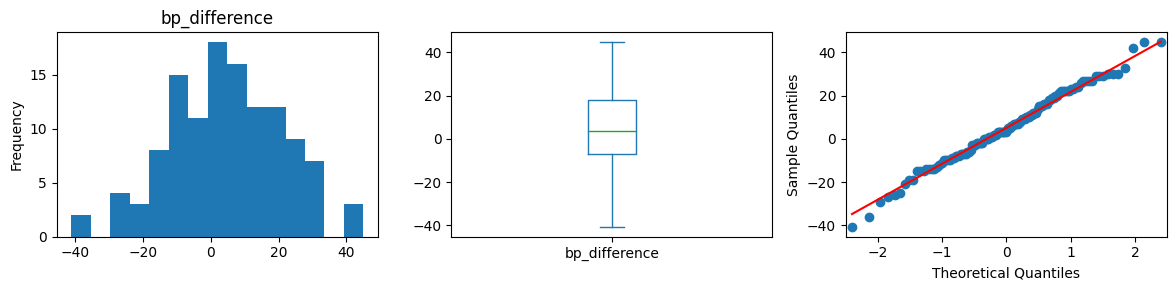

In [ ]:
from statsmodels.graphics.gofplots import qqplot

def main():
    url = 'https://raw.githubusercontent.com/Opensourcefordatascience/Data-sets/master/blood_pressure.csv'
    df = pd.read_csv(url)
    df['bp_difference'] = df['bp_before'] - df['bp_after']
    
    _, pval = stats.kurtosistest(df['bp_difference'])
    print(f"{pval = }", end="\n\n")
    
    fig, (ax0, ax1, ax2) = plt.subplots(1,3,figsize=(12,3))
    df['bp_difference'].plot(kind='hist', title='bp_difference', bins=15, ax=ax0)
    df['bp_difference'].plot(kind='box', ax=ax1)
    qqplot(df['bp_difference'], line='s', ax=ax2)
    plt.tight_layout()
    plt.show()
       
if __name__ == "__main__":
    main()

####**Section 6 Normal Test [doc](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.normaltest.html) [wiki](https://en.wikipedia.org/wiki/D%27Agostino%27s_K-squared_test)**

#####**Code - Normal Test**

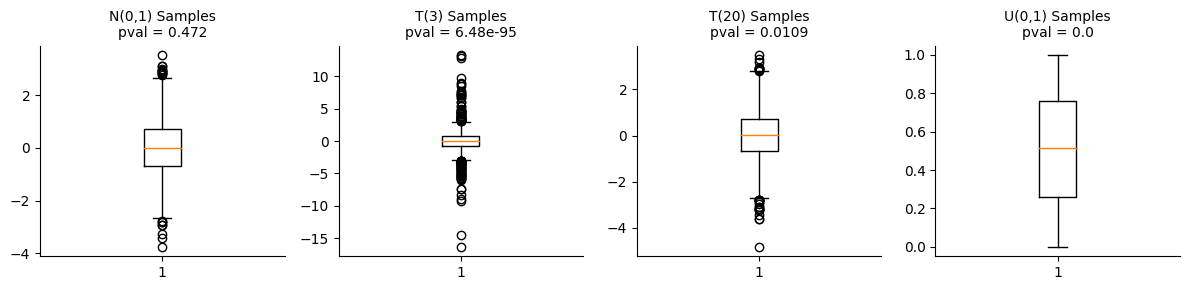

In [ ]:
def run(data, ax, distribution_name):
    _, pval = stats.normaltest(data)
    ax.set_title(f"{distribution_name} Samples\n{pval = :.3}", fontsize=10)
    ax.boxplot(data)
    ax.spines['right'].set_visible(False)
    ax.spines['top'].set_visible(False) 

def main():
    size = (2000,)

    fig, axes = plt.subplots(1,4,figsize=(12,3))
    
    data = {
        "N(0,1)" : stats.norm().rvs(size=size),
        "T(3)" : stats.t(3).rvs(size=size),
        "T(20)" : stats.t(20).rvs(size=size),
        "U(0,1)" : stats.uniform().rvs(size=size)
    }

    for ax, (distribution_name, data) in zip(axes, data.items()):
        run(data, ax, distribution_name)
    plt.tight_layout()
    plt.show()
       
if __name__ == "__main__":
    main()

#####**Code - Normal Test for Paired Sample Test**

pval = 0.9572747240899964



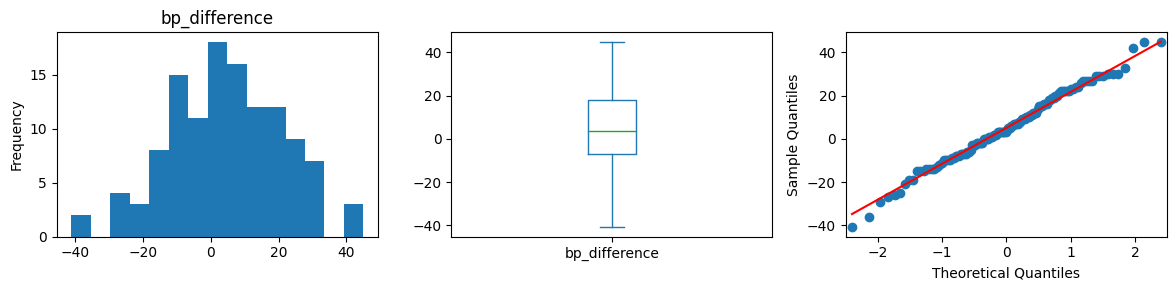

In [ ]:
from statsmodels.graphics.gofplots import qqplot

def main():
    url = 'https://raw.githubusercontent.com/Opensourcefordatascience/Data-sets/master/blood_pressure.csv'
    df = pd.read_csv(url)
    df['bp_difference'] = df['bp_before'] - df['bp_after']
    
    _, pval = stats.normaltest(df['bp_difference'])
    print(f"{pval = }", end="\n\n")
    
    fig, (ax0, ax1, ax2) = plt.subplots(1,3,figsize=(12,3))
    df['bp_difference'].plot(kind='hist', title='bp_difference', bins=15, ax=ax0)
    df['bp_difference'].plot(kind='box', ax=ax1)
    qqplot(df['bp_difference'], line='s', ax=ax2)
    plt.tight_layout()
    plt.show()
       
if __name__ == "__main__":
    main()

####**Section 7 Jarque Bera Test [eng](https://www.youtube.com/watch?v=TyjYI7yjFZI) [doc](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.jarque_bera.html) [wiki](https://en.wikipedia.org/wiki/Jarque%E2%80%93Bera_test)**

#####**Code - Jarque Bera Test**

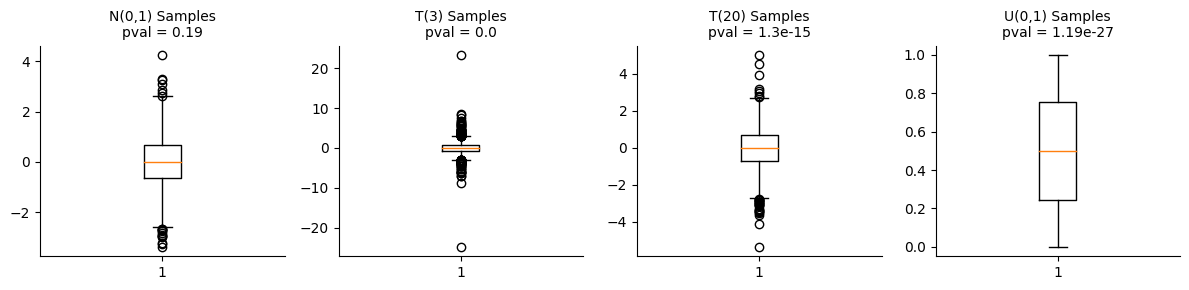

In [ ]:
def run(data, ax, distribution_name):
    _, pval = stats.jarque_bera(data)
    ax.set_title(f"{distribution_name} Samples\n{pval = :.3}", fontsize=10)
    ax.boxplot(data)
    ax.spines['right'].set_visible(False)
    ax.spines['top'].set_visible(False) 

def main():
    size = (2000,)

    fig, axes = plt.subplots(1,4,figsize=(12,3))
    
    data = {
        "N(0,1)" : stats.norm().rvs(size=size),
        "T(3)" : stats.t(3).rvs(size=size),
        "T(20)" : stats.t(20).rvs(size=size),
        "U(0,1)" : stats.uniform().rvs(size=size)
    }

    for ax, (distribution_name, data) in zip(axes, data.items()):
        run(data, ax, distribution_name)
    plt.tight_layout()
    plt.show()
       
if __name__ == "__main__":
    main()

#####**Code - Jarque Bera Test for Paired Sample Test**

pval = 0.9270282358267639



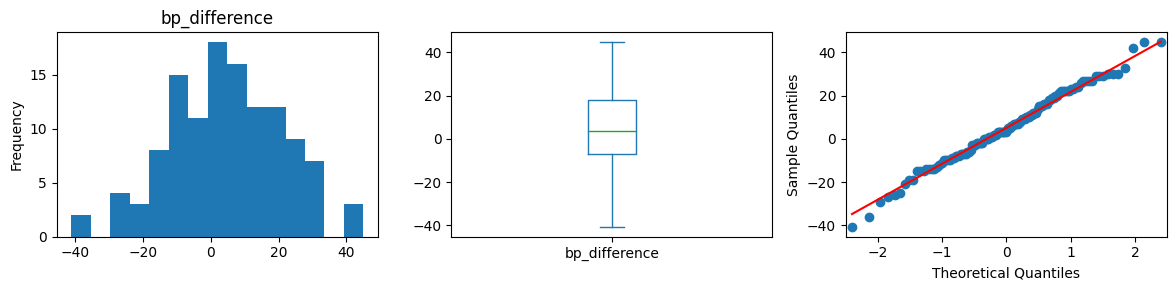

In [ ]:
from statsmodels.graphics.gofplots import qqplot

def main():
    url = 'https://raw.githubusercontent.com/Opensourcefordatascience/Data-sets/master/blood_pressure.csv'
    df = pd.read_csv(url)
    df['bp_difference'] = df['bp_before'] - df['bp_after']
    
    _, pval = stats.jarque_bera(df['bp_difference'])
    print(f"{pval = }", end="\n\n")
    
    fig, (ax0, ax1, ax2) = plt.subplots(1,3,figsize=(12,3))
    df['bp_difference'].plot(kind='hist', title='bp_difference', bins=15, ax=ax0)
    df['bp_difference'].plot(kind='box', ax=ax1)
    qqplot(df['bp_difference'], line='s', ax=ax2)
    plt.tight_layout()
    plt.show()
       
if __name__ == "__main__":
    main()

####**Section 8 Shapiro Test [eng](https://www.youtube.com/watch?v=TyjYI7yjFZI&t=2m13s) [doc](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.shapiro.html) [wiki](https://en.wikipedia.org/wiki/Shapiro%E2%80%93Wilk_test)**

#####**Code - Shapiro Test**

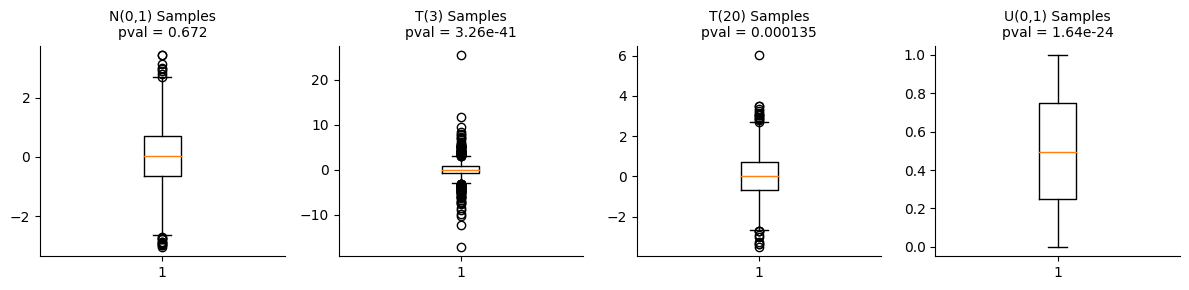

In [ ]:
def run(data, ax, distribution_name):
    _, pval = stats.shapiro(data)
    ax.set_title(f"{distribution_name} Samples\n{pval = :.3}", fontsize=10)
    ax.boxplot(data)
    ax.spines['right'].set_visible(False)
    ax.spines['top'].set_visible(False) 

def main():
    size = (2000,)

    fig, axes = plt.subplots(1,4,figsize=(12,3))
    
    data = {
        "N(0,1)" : stats.norm().rvs(size=size),
        "T(3)" : stats.t(3).rvs(size=size),
        "T(20)" : stats.t(20).rvs(size=size),
        "U(0,1)" : stats.uniform().rvs(size=size)
    }

    for ax, (distribution_name, data) in zip(axes, data.items()):
        run(data, ax, distribution_name)
    plt.tight_layout()
    plt.show()
       
if __name__ == "__main__":
    main()

#####**Code - Shapiro Test for Paired Sample Test**

pval = 0.7841846942901611



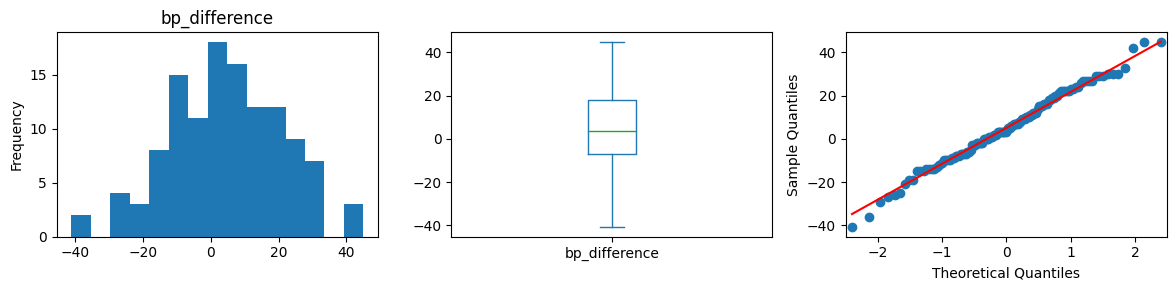

In [ ]:
from statsmodels.graphics.gofplots import qqplot

def main():
    url = 'https://raw.githubusercontent.com/Opensourcefordatascience/Data-sets/master/blood_pressure.csv'
    df = pd.read_csv(url)
    df['bp_difference'] = df['bp_before'] - df['bp_after']
    
    _, pval = stats.shapiro(df['bp_difference'])
    print(f"{pval = }", end="\n\n")
    
    fig, (ax0, ax1, ax2) = plt.subplots(1,3,figsize=(12,3))
    df['bp_difference'].plot(kind='hist', title='bp_difference', bins=15, ax=ax0)
    df['bp_difference'].plot(kind='box', ax=ax1)
    qqplot(df['bp_difference'], line='s', ax=ax2)
    plt.tight_layout()
    plt.show()
       
if __name__ == "__main__":
    main()

####**Section 9 Kolmogorov-Smirnov Test [eng](https://www.youtube.com/watch?v=TyjYI7yjFZI&t=3m28s) [doc](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.kstest.html) [wiki](https://en.wikipedia.org/wiki/Kolmogorov%E2%80%93Smirnov_test)**

#####**Code - Kolmogorov-Smirnov Test**

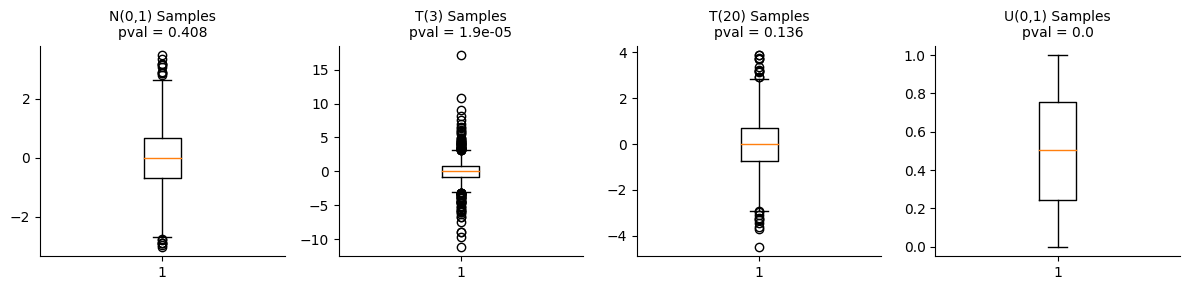

In [ ]:
def run(data, ax, distribution_name):
    _, pval = stats.kstest(data, 'norm')
    ax.set_title(f"{distribution_name} Samples\n{pval = :.3}", fontsize=10)
    ax.boxplot(data)
    ax.spines['right'].set_visible(False)
    ax.spines['top'].set_visible(False) 

def main():
    size = (2000,)

    fig, axes = plt.subplots(1,4,figsize=(12,3))
    
    data = {
        "N(0,1)" : stats.norm().rvs(size=size),
        "T(3)" : stats.t(3).rvs(size=size),
        "T(20)" : stats.t(20).rvs(size=size),
        "U(0,1)" : stats.uniform().rvs(size=size)
    }

    for ax, (distribution_name, data) in zip(axes, data.items()):
        run(data, ax, distribution_name)
    plt.tight_layout()
    plt.show()
       
if __name__ == "__main__":
    main()

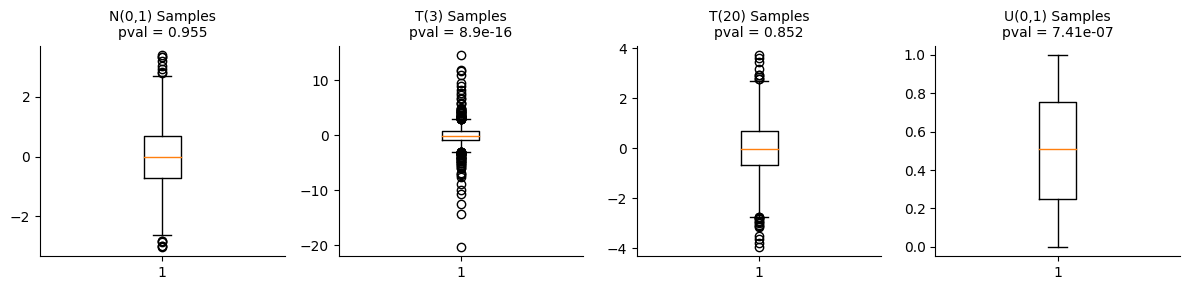

In [ ]:
def run(data, ax, distribution_name):
    _, pval = stats.kstest(data, stats.norm(loc=data.mean(), scale=data.std()).cdf)
    ax.set_title(f"{distribution_name} Samples\n{pval = :.3}", fontsize=10)
    ax.boxplot(data)
    ax.spines['right'].set_visible(False)
    ax.spines['top'].set_visible(False) 

def main():
    size = (2000,)

    fig, axes = plt.subplots(1,4,figsize=(12,3))
    
    data = {
        "N(0,1)" : stats.norm().rvs(size=size),
        "T(3)" : stats.t(3).rvs(size=size),
        "T(20)" : stats.t(20).rvs(size=size),
        "U(0,1)" : stats.uniform().rvs(size=size)
    }

    for ax, (distribution_name, data) in zip(axes, data.items()):
        run(data, ax, distribution_name)
    plt.tight_layout()
    plt.show()
       
if __name__ == "__main__":
    main()

#####**Code - Kolmogorov-Smirnov for Paired Sample Test**

pval = 0.9126747684357658



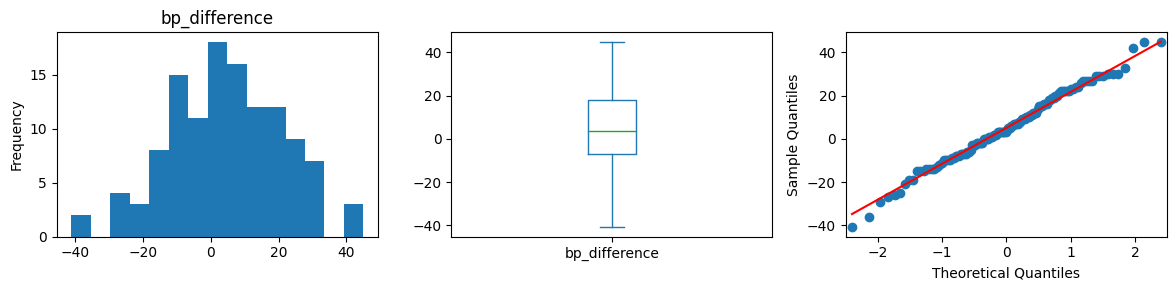

In [ ]:
from statsmodels.graphics.gofplots import qqplot

def main():
    url = 'https://raw.githubusercontent.com/Opensourcefordatascience/Data-sets/master/blood_pressure.csv'
    df = pd.read_csv(url)
    df['bp_difference'] = df['bp_before'] - df['bp_after']
    
    cdf = stats.norm(loc=df['bp_difference'].mean(), scale=df['bp_difference'].std()).cdf
    _, pval = stats.kstest(df['bp_difference'], cdf)
    print(f"{pval = }", end="\n\n")
    
    fig, (ax0, ax1, ax2) = plt.subplots(1,3,figsize=(12,3))
    df['bp_difference'].plot(kind='hist', title='bp_difference', bins=15, ax=ax0)
    df['bp_difference'].plot(kind='box', ax=ax1)
    qqplot(df['bp_difference'], line='s', ax=ax2)
    plt.tight_layout()
    plt.show()
       
if __name__ == "__main__":
    main()

###**Chapter 17 Kolmogorov-Smirnov Test [eng](https://www.youtube.com/watch?v=we4p332VoPQ) [wiki](https://en.wikipedia.org/wiki/Kolmogorov%E2%80%93Smirnov_test)**

####**Section 1 One Sample Kolmogorov-Smirnov Test [doc](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.kstest.html)**

#####**Code - Wrong/Correct Usage**

In [ ]:
def main():
    data = np.random.normal(loc=1., size=(10000,))
    
    _, pval = stats.kstest(data, 'norm')
    title = f"Wrong Usage\nstats.kstest(data, 'norm')\n{pval = :.4f}"
    print(title,end="\n\n")
    
    _, pval = stats.kstest(data, stats.norm(data.mean(), data.std()).cdf)
    title = f"Correct Usage\nstats.kstest(data, stats.norm(data.mean(), data.std()).cdf)\n{pval = :.4f}"
    print(title,end="\n\n")

    _, pval = stats.kstest((data-data.mean())/data.std(), 'norm')
    title = f"Correct Usage\nstats.kstest((data-data.mean())/data.std(), 'norm')\n{pval = :.4f}"
    print(title,end="\n\n")
    
    _, pval = stats.kstest(data, 'norm', args=(data.mean(), data.std()))
    title = f"Correct Usage\nstats.kstest(data, 'norm', args=(data.mean(), data.std()))\n{pval = :.4f}"
    print(title,end="\n\n")
            
if __name__ == "__main__":
    main()

Wrong Usage
stats.kstest(data, 'norm')
pval = 0.0000

Correct Usage
stats.kstest(data, stats.norm(data.mean(), data.std()).cdf)
pval = 0.9916

Correct Usage
stats.kstest((data-data.mean())/data.std(), 'norm')
pval = 0.9916

Correct Usage
stats.kstest(data, 'norm', args=(data.mean(), data.std()))
pval = 0.9916



####**Section 2 Two Sample Kolmogorov-Smirnov Test [doc](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.ks_2samp.html)**

#####**Code - Two Sample Kolmogorov-Smirnov Test**

In [ ]:
def main():    
    data0 = np.random.normal(size=(100,))
    data1 = np.random.normal(size=(100,))
    _, pval = stats.ks_2samp(data0, data1)
    print(f"{pval = :.4f}")
    
    data0 = np.random.normal(size=(100,))
    data1 = np.random.normal(loc=1., size=(100,))
    _, pval = stats.ks_2samp(data0, data1)
    print(f"{pval = :.4f}")
       
if __name__ == "__main__":
    main()

pval = 0.8154
pval = 0.0000


###**Chapter 18 Correlation Test**

####**Section 1 Pearson’s R Test [doc](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.pearsonr.html)**

#####**Code - Pearson’s R Test**

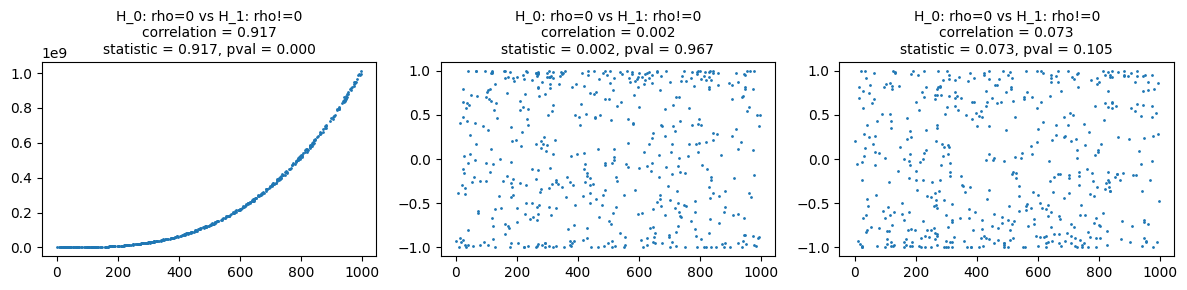

In [ ]:
def run(data1, data2, ax):
    method = 'pearson'
    statistic, pval = stats.pearsonr(data1, data2)

    data = {'data1': data1, 'data2': data2}
    df = pd.DataFrame(data)
    correlation = df.corr(method=method).loc['data1', 'data2']

    title = f"H_0: rho=0 vs H_1: rho!=0\n{correlation = :.3f}\n{statistic = :.3f}, {pval = :.3f}"
    ax.set_title(title,fontsize=10)
    ax.scatter(data1, data2, s= 1)

def main():
    data1 = np.random.rand(500) * 1000
    data2s = ( 
        (data1 + (np.random.rand(500) * 10))**3,
        np.sin(data1 + (np.random.rand(500) * 10)),
        np.sin(data1)
    )
    
    fig, axes = plt.subplots(1,len(data2s),figsize=(12,3))
    for data2, ax in zip(data2s,axes):
        run(data1, data2, ax)   
    plt.tight_layout()
    plt.show()
           
if __name__ == "__main__":
    main()

#####**Example - Age and Income [eng](https://www.youtube.com/watch?v=rR-jptLvhFw)**

Test whether age and income are related using below data with $\alpha=0.05$.

```
age = [18,25,57,45,26,64,37,40,24,33]
income = [15_000,29_000,68_000,52_000,32_000,80_000,41_000,45_000,26_000,33_000]
```

######**Solution**

$$
\text{pval} = 0.000
\quad\Rightarrow\quad
\text{Strong Relation}
$$

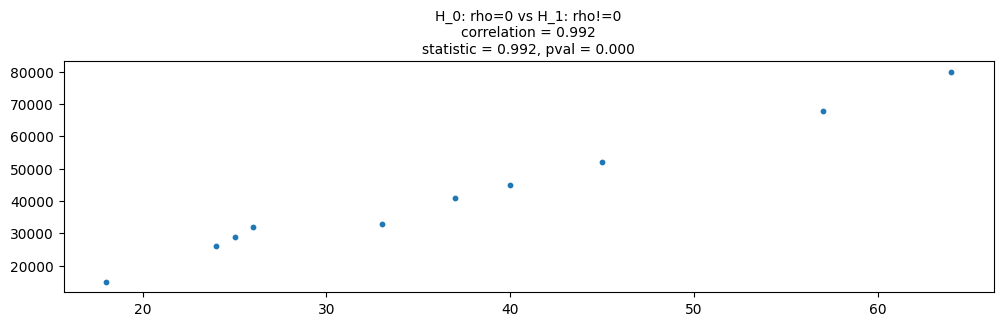

In [ ]:
def run(data1, data2, ax):
    method = 'pearson'
    statistic, pval = stats.pearsonr(data1, data2)

    data = {'data1': data1, 'data2': data2}
    df = pd.DataFrame(data)
    correlation = df.corr(method=method).loc['data1', 'data2']

    title = f"H_0: rho=0 vs H_1: rho!=0\n{correlation = :.3f}\n{statistic = :.3f}, {pval = :.3f}"
    ax.set_title(title,fontsize=10)
    ax.scatter(data1, data2, s= 10)

def main():
    age = [18,25,57,45,26,64,37,40,24,33]
    income = [15_000,29_000,68_000,52_000,32_000,80_000,41_000,45_000,26_000,33_000]
    
    fig, ax = plt.subplots(figsize=(12,3))
    run(age, income, ax)   
    plt.show()
           
if __name__ == "__main__":
    main()

####**Section 2 Spearman’s R Test [doc](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.spearmanr.html)**

#####**Code - Spearman Correlation : stats.spearmanr [eng](https://www.youtube.com/watch?v=YpG2MlulP_o) [doc](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.spearmanr.html)**

In [ ]:
def compute_correlation(data1, data2):
    data = {'data1': data1, 'data2': data2}
    df = pd.DataFrame(data)
    return df.corr().loc['data1', 'data2']

def main():
    data1 = [2,5,8,11,15,19]
    data2 = [21,17,14,10,6,3]
    print(f"Pearson Correlation {compute_correlation(data1, data2)}")
    print(f"Spearman Correlation {stats.spearmanr(data1, data2)[0]}")
    
    data1_rank = [1,2,3,4,5,6]
    data2_rank = [6,5,4,3,2,1]
    print(f"Spearman Correlation {compute_correlation(data1_rank, data2_rank)}")
           
if __name__ == "__main__":
    main()

Pearson Correlation -0.9959774691897272
Spearman Correlation -1.0
Spearman Correlation -1.0


In [ ]:
def compute_correlation(data1, data2):
    data = {'data1': data1, 'data2': data2}
    df = pd.DataFrame(data)
    return df.corr().loc['data1', 'data2']

def main():
    np.random.seed(0)
    data1 = np.array([2,5,8,11,15,19]) + np.random.uniform(6)
    data2 = np.array([21,17,14,10,6,3]) + np.random.uniform(6)
    print(f"Pearson Correlation {compute_correlation(data1, data2)}")
    print(f"Spearman Correlation {stats.spearmanr(data1, data2)[0]}")
    
    data1_rank = [1,2,3,4,5,6]
    data2_rank = [6,5,4,3,2,1]
    print(f"Spearman Correlation {compute_correlation(data1_rank, data2_rank)}")
           
if __name__ == "__main__":
    main()

Pearson Correlation -0.9959774691897272
Spearman Correlation -1.0
Spearman Correlation -1.0


#####**Code - Spearman’s R Test**

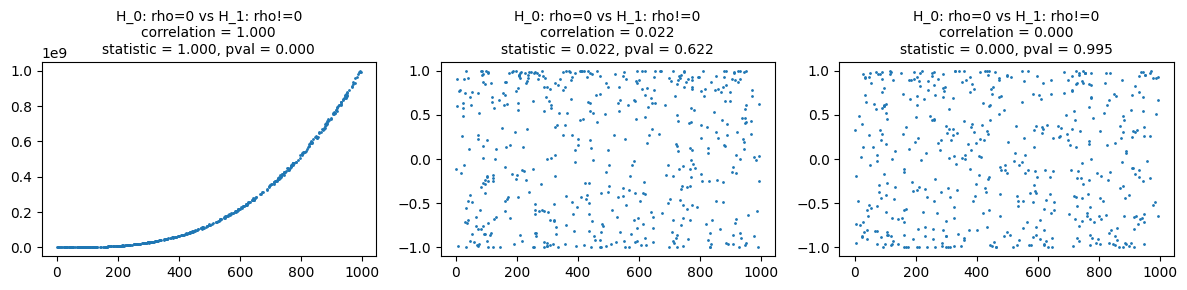

In [ ]:
def run(data1, data2, ax):
    method = 'spearman'
    statistic, pval = stats.spearmanr(data1, data2)

    data = {'data1': data1, 'data2': data2}
    df = pd.DataFrame(data)
    correlation = df.corr(method=method).loc['data1', 'data2']

    title = f"H_0: rho=0 vs H_1: rho!=0\n{correlation = :.3f}\n{statistic = :.3f}, {pval = :.3f}"
    ax.set_title(title,fontsize=10)
    ax.scatter(data1, data2, s= 1)

def main():
    data1 = np.random.rand(500) * 1000
    data2s = ( 
        (data1 + (np.random.rand(500) * 10))**3,
        np.sin(data1 + (np.random.rand(500) * 10)),
        np.sin(data1)
    )
    
    fig, axes = plt.subplots(1,len(data2s),figsize=(12,3))
    for data2, ax in zip(data2s,axes):
        run(data1, data2, ax)   
    plt.tight_layout()
    plt.show()
           
if __name__ == "__main__":
    main()

####**Section 3 Kendall’s Tau Test [doc](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.kendalltau.html)**

#####**Kendall’s Tau [eng_1](https://www.youtube.com/watch?v=oXVxaSoY94k) [eng_2](https://www.youtube.com/watch?v=V4MgE43SrgM)**

#####**Code - Kendall’s Tau Test**

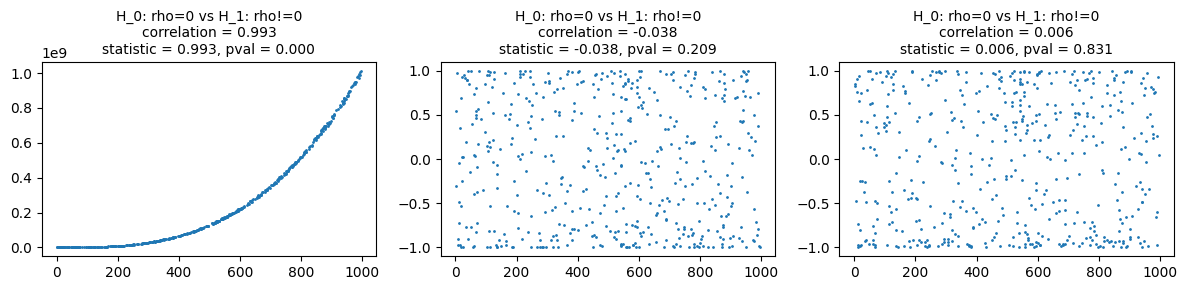

In [ ]:
def run(data1, data2, ax):
    method = 'kendall'
    statistic, pval = stats.kendalltau(data1, data2)

    data = {'data1': data1, 'data2': data2}
    df = pd.DataFrame(data)
    correlation = df.corr(method=method).loc['data1', 'data2']

    title = f"H_0: rho=0 vs H_1: rho!=0\n{correlation = :.3f}\n{statistic = :.3f}, {pval = :.3f}"
    ax.set_title(title,fontsize=10)
    ax.scatter(data1, data2, s= 1)

def main():
    data1 = np.random.rand(500) * 1000
    data2s = ( 
        (data1 + (np.random.rand(500) * 10))**3,
        np.sin(data1 + (np.random.rand(500) * 10)),
        np.sin(data1)
    )
    
    fig, axes = plt.subplots(1,len(data2s),figsize=(12,3))
    for data2, ax in zip(data2s,axes):
        run(data1, data2, ax)   
    plt.tight_layout()
    plt.show()
           
if __name__ == "__main__":
    main()

###**Chapter 19 Variance Test**

####**Section 1 One Sampe Variance Test - Chi Square Test**

#####**One Sampe Variance Test - Chi Square Test**

If $X_i$ are iid $N(\mu,\sigma^2)$,

$$
\frac{(n-1)S^2}{\sigma^2}
=
\sum_{i=1}^n\left(\frac{X_i-\bar{X}}{\sigma}\right)^2
\sim \chi^2_{n-1}
$$

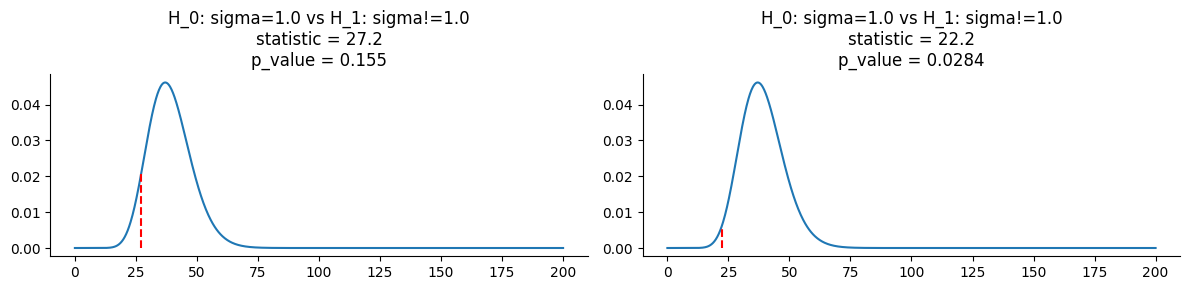

In [ ]:
def run_one_sample_variance_test(data, sigma_0, ax):
    statistic = (data.shape[0] - 1) * data.var(ddof=1) / sigma_0**2
    p_value = 2 * min(
        stats.chi2(data.shape[0]-1).cdf(statistic),
        stats.chi2(data.shape[0]-1).sf(statistic)
    )
    
    title0 = f"H_0: sigma={sigma_0} vs H_1: sigma!={sigma_0}\n"
    title1 = f"{statistic = :.3}\n"
    title2 = f"{p_value = :.3}"
    title = title0 + title1 + title2 
    ax.set_title(title)
    
    x = np.linspace(0,200,1000)
    y = stats.chi2(data.shape[0]-1).pdf(x)
    ax.plot(x,y)
    ax.plot([statistic,statistic], 
             [0,stats.chi2(data.shape[0]-1).pdf(statistic)], '--r')
    
    ax.spines['right'].set_visible(False)
    ax.spines['top'].set_visible(False)


def main():
    n = 40
    sigma_0 = 1.0
    
    fig, (ax0, ax1) = plt.subplots(1,2,figsize=(12,3))

    sigma_real = 0.9
    data = np.random.normal(size=(n,), scale=sigma_real)
    run_one_sample_variance_test(data, sigma_0, ax=ax0)

    sigma_real = 0.8
    data = np.random.normal(size=(n,), scale=sigma_real)
    run_one_sample_variance_test(data, sigma_0, ax=ax1)

    plt.tight_layout()
    plt.show()

    
if __name__ == "__main__":
    main()

####**Section 2 Two Sampe Variance Test**

#####**Two Sampe Variance Test - F Test [eng](https://www.youtube.com/watch?v=-ukqBN5sQSI)**

If $X\sim\chi^2_m$ and $Y\sim\chi^2_m$ are independent,

$$
\frac{X/m}{Y/n}
\sim F_{m,n}
$$

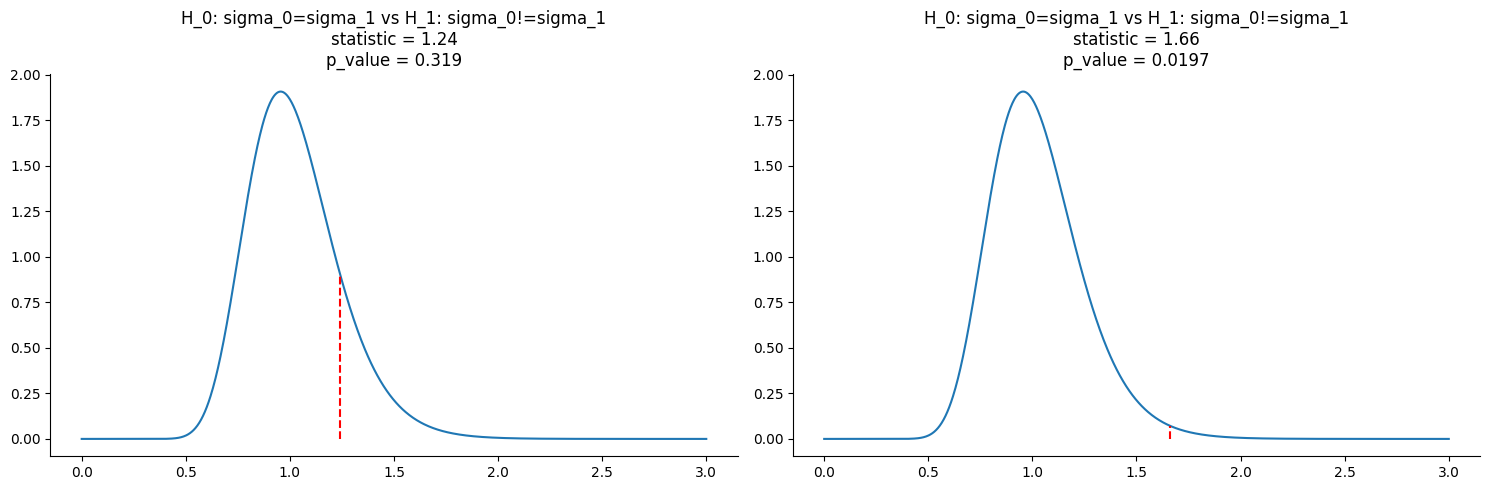

In [ ]:
def run_two_sample_variance_test_F(data_0, data_1, ax):
    statistic = data_0.var(ddof=1) / data_1.var(ddof=1)
    p_value = 2 * min(
        stats.f(data_0.shape[0]-1, data_1.shape[0]-1).cdf(statistic),
        stats.f(data_0.shape[0]-1, data_1.shape[0]-1).sf(statistic)
    )
    
    title0 = f"H_0: sigma_0=sigma_1 vs H_1: sigma_0!=sigma_1\n"
    title1 = f"{statistic = :.3}\n"
    title2 = f"{p_value = :.3}"
    title = title0 + title1 + title2 
    ax.set_title(title)
    
    pdf = stats.f(data_0.shape[0]-1, data_1.shape[0]-1).pdf
    x = np.linspace(0,3,1000)
    y = pdf(x)
    ax.plot(x,y)
    ax.plot([statistic,statistic], [0,pdf(statistic)], '--r')
    
    ax.spines['right'].set_visible(False)
    ax.spines['top'].set_visible(False)


def main():
    seed = 0
    np.random.seed(seed)

    fig, (ax0, ax1) = plt.subplots(1,2,figsize=(15,5))

    n_0, n_1 = 100, 80
    sigma_0, sigma_1 = 1.0, 0.9
    data_0 = np.random.normal(size=(n_0,), scale=sigma_0)
    data_1 = np.random.normal(size=(n_1,), scale=sigma_1)
    run_two_sample_variance_test_F(data_0, data_1, ax=ax0)

    n_0, n_1 = 100, 80
    sigma_0, sigma_1 = 1.0, 0.8
    data_0 = np.random.normal(size=(n_0,), scale=sigma_0)
    data_1 = np.random.normal(size=(n_1,), scale=sigma_1)
    run_two_sample_variance_test_F(data_0, data_1, ax=ax1)

    plt.tight_layout()
    plt.show()

    
if __name__ == "__main__":
    main()

#####**Two Sampe Variance Test - Bartlett Test**

Note that the F-test is extremely sensitive to non-normality of X and Y, so you're probably better off doing a more robust test such as Levene's test or Bartlett's test unless you're reasonably sure that X and Y are distributed normally. These tests can be found in the scipy api:

- [Bartlett's test](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.bartlett.html)
- [Levene's test](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.levene.html)

I would personally advised against using Bartlett's test for non-normal data as the statistic is is not reliable with "moderate" departures from normality. Better off with Levene's. – 
user1442363
 Aug 1, 2019 at 10:24

[How do I do a F-test in python](https://stackoverflow.com/questions/21494141/how-do-i-do-a-f-test-in-python/21503346)

$$
\text{F Test}
\quad<\quad
\text{Bartlett Test}
\quad<\quad
\text{Levene Test}
\quad<\quad
$$

In [ ]:
def main():
    seed = 0
    np.random.seed(seed)

    n_0, n_1 = 100, 80
    sigma_0, sigma_1 = 1.0, 0.9
    data_0 = np.random.normal(size=(n_0,), scale=sigma_0)
    data_1 = np.random.normal(size=(n_1,), scale=sigma_1)
    statistic, p_value = stats.bartlett(data_0, data_1)
    print(f"H_0: sigma_0=sigma_1 vs H_1: sigma_0!=sigma_1")
    print(f"{statistic = :.3}")
    print(f"{p_value = :.3}", end='\n\n')

    n_0, n_1 = 100, 80
    sigma_0, sigma_1 = 1.0, 0.8
    data_0 = np.random.normal(size=(n_0,), scale=sigma_0)
    data_1 = np.random.normal(size=(n_1,), scale=sigma_1)
    statistic, p_value = stats.bartlett(data_0, data_1)
    print(f"H_0: sigma_0=sigma_1 vs H_1: sigma_0!=sigma_1")
    print(f"{statistic = :.3}")
    print(f"{p_value = :.3}", end='\n\n')

if __name__ == "__main__":
    main()

H_0: sigma_0=sigma_1 vs H_1: sigma_0!=sigma_1
statistic = 1.01
p_value = 0.315

H_0: sigma_0=sigma_1 vs H_1: sigma_0!=sigma_1
statistic = 5.48
p_value = 0.0193



#####**Two Sampe Variance Test - Levene Test**

Note that the F-test is extremely sensitive to non-normality of X and Y, so you're probably better off doing a more robust test such as Levene's test or Bartlett's test unless you're reasonably sure that X and Y are distributed normally. These tests can be found in the scipy api:

- [Bartlett's test](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.bartlett.html)
- [Levene's test](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.levene.html)

I would personally advised against using Bartlett's test for non-normal data as the statistic is is not reliable with "moderate" departures from normality. Better off with Levene's. – 
user1442363
 Aug 1, 2019 at 10:24

[How do I do a F-test in python](https://stackoverflow.com/questions/21494141/how-do-i-do-a-f-test-in-python/21503346)

$$
\text{F Test}
\quad<\quad
\text{Bartlett Test}
\quad<\quad
\text{Levene Test}
\quad<\quad
$$

In [ ]:
def main():
    seed = 0
    np.random.seed(seed)

    n_0, n_1 = 100, 80
    sigma_0, sigma_1 = 1.0, 0.9
    data_0 = np.random.normal(size=(n_0,), scale=sigma_0)
    data_1 = np.random.normal(size=(n_1,), scale=sigma_1)
    statistic, p_value = stats.levene(data_0, data_1)
    print(f"H_0: sigma_0=sigma_1 vs H_1: sigma_0!=sigma_1")
    print(f"{statistic = :.3}")
    print(f"{p_value = :.3}", end='\n\n')

    n_0, n_1 = 100, 80
    sigma_0, sigma_1 = 1.0, 0.8
    data_0 = np.random.normal(size=(n_0,), scale=sigma_0)
    data_1 = np.random.normal(size=(n_1,), scale=sigma_1)
    statistic, p_value = stats.levene(data_0, data_1)
    print(f"H_0: sigma_0=sigma_1 vs H_1: sigma_0!=sigma_1")
    print(f"{statistic = :.3}")
    print(f"{p_value = :.3}", end='\n\n')

if __name__ == "__main__":
    main()

H_0: sigma_0=sigma_1 vs H_1: sigma_0!=sigma_1
statistic = 0.121
p_value = 0.729

H_0: sigma_0=sigma_1 vs H_1: sigma_0!=sigma_1
statistic = 3.86
p_value = 0.0511



####**Section 3 Many Sampe Variance Test**

#####**Many Sampe Variance Test - Bartlett Test**

Note that the F-test is extremely sensitive to non-normality of X and Y, so you're probably better off doing a more robust test such as Levene's test or Bartlett's test unless you're reasonably sure that X and Y are distributed normally. These tests can be found in the scipy api:

- [Bartlett's test](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.bartlett.html)
- [Levene's test](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.levene.html)

I would personally advised against using Bartlett's test for non-normal data as the statistic is is not reliable with "moderate" departures from normality. Better off with Levene's. – 
user1442363
 Aug 1, 2019 at 10:24

[How do I do a F-test in python](https://stackoverflow.com/questions/21494141/how-do-i-do-a-f-test-in-python/21503346)

$$
\text{F Test}
\quad<\quad
\text{Bartlett Test}
\quad<\quad
\text{Levene Test}
\quad<\quad
$$

In [ ]:
def main():
    seed = 0
    np.random.seed(seed)

    n_0, n_1, n_2 = 100, 80, 90
    sigma_0, sigma_1, sigma_2 = 1.0, 0.9, 1.1
    data_0 = np.random.normal(size=(n_0,), scale=sigma_0)
    data_1 = np.random.normal(size=(n_1,), scale=sigma_1)
    data_2 = np.random.normal(size=(n_1,), scale=sigma_2)
    statistic, p_value = stats.bartlett(data_0, data_1, data_2)
    print(f"H_0: all input variances are equal")
    print(f"{statistic = :.3}")
    print(f"{p_value = :.3}", end='\n\n')

    n_0, n_1, n_2 = 100, 80, 90
    sigma_0, sigma_1, sigma_2 = 1.0, 0.8, 1.2
    data_0 = np.random.normal(size=(n_0,), scale=sigma_0)
    data_1 = np.random.normal(size=(n_1,), scale=sigma_1)
    data_2 = np.random.normal(size=(n_1,), scale=sigma_2)
    statistic, p_value = stats.bartlett(data_0, data_1, data_2)
    print(f"H_0: all input variances are equal")
    print(f"{statistic = :.3}")
    print(f"{p_value = :.3}", end='\n\n')

if __name__ == "__main__":
    main()

H_0: all input variances are equal
statistic = 1.49
p_value = 0.475

H_0: all input variances are equal
statistic = 20.8
p_value = 3.07e-05



#####**Many Sampe Variance Test - Levene Test**

Note that the F-test is extremely sensitive to non-normality of X and Y, so you're probably better off doing a more robust test such as Levene's test or Bartlett's test unless you're reasonably sure that X and Y are distributed normally. These tests can be found in the scipy api:

- [Bartlett's test](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.bartlett.html)
- [Levene's test](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.levene.html)

I would personally advised against using Bartlett's test for non-normal data as the statistic is is not reliable with "moderate" departures from normality. Better off with Levene's. – 
user1442363
 Aug 1, 2019 at 10:24

[How do I do a F-test in python](https://stackoverflow.com/questions/21494141/how-do-i-do-a-f-test-in-python/21503346)

$$
\text{F Test}
\quad<\quad
\text{Bartlett Test}
\quad<\quad
\text{Levene Test}
\quad<\quad
$$

In [ ]:
def main():
    seed = 0
    np.random.seed(seed)

    n_0, n_1, n_2 = 100, 80, 90
    sigma_0, sigma_1, sigma_2 = 1.0, 0.9, 1.1
    data_0 = np.random.normal(size=(n_0,), scale=sigma_0)
    data_1 = np.random.normal(size=(n_1,), scale=sigma_1)
    data_2 = np.random.normal(size=(n_1,), scale=sigma_2)
    statistic, p_value = stats.levene(data_0, data_1, data_2)
    print(f"H_0: all input variances are equal")
    print(f"{statistic = :.3}")
    print(f"{p_value = :.3}", end='\n\n')

    n_0, n_1, n_2 = 100, 80, 90
    sigma_0, sigma_1, sigma_2 = 1.0, 0.8, 1.2
    data_0 = np.random.normal(size=(n_0,), scale=sigma_0)
    data_1 = np.random.normal(size=(n_1,), scale=sigma_1)
    data_2 = np.random.normal(size=(n_1,), scale=sigma_2)
    statistic, p_value = stats.levene(data_0, data_1, data_2)
    print(f"H_0: all input variances are equal")
    print(f"{statistic = :.3}")
    print(f"{p_value = :.3}", end='\n\n')

if __name__ == "__main__":
    main()

H_0: all input variances are equal
statistic = 0.16
p_value = 0.852

H_0: all input variances are equal
statistic = 8.72
p_value = 0.000217



###**Chapter 20 Wald-Wolfowitz Runs Test [eng](https://www.youtube.com/watch?v=0SUSwSDR0Ro) [wiki](https://en.wikipedia.org/wiki/Wald%E2%80%93Wolfowitz_runs_test)**

####**Section 1 Wald-Wolfowitz Runs Test**

#####**Null and Alternative**

$$\begin{array}{l}
H_0:\text{each binary element in the sequence is independently drawn from the same distribution}\\
\text{vs}\\
H_1:\text{not independently drawn}
\end{array}$$

#####**Wald-Wolfowitz Runs Test : statsmodels.sandbox.stats.runs.runstest_1samp [source_code](https://github.com/statsmodels/statsmodels/blob/main/statsmodels/sandbox/stats/runs.py#L106)**

In [24]:
import statsmodels.sandbox.stats.runs as runs

def main():
    seed = 0
    np.random.seed(seed)
    
    data = np.array([1,1,1,1,1,1,0,0,0,0,0,0,0,0,0,0,0])
    statistic, p_value = runs.runstest_1samp(data)
    print(f"{data = }")
    print(f"{statistic = :.4f}")
    print(f"{p_value = :.4f}", end="\n\n")
    
    data = np.array([1,1,0,1,0,1,0,0,1,0,1,0,1,0,1,1,0]) 
    statistic, p_value = runs.runstest_1samp(data)
    print(f"{data = }")
    print(f"{statistic = :.4f}")
    print(f"{p_value = :.4f}", end="\n\n")

    data = stats.binom(1,0.3).rvs(17)
    statistic, p_value = runs.runstest_1samp(data)
    print(f"{data = }")
    print(f"{statistic = :.4f}")
    print(f"{p_value = :.4f}", end="\n\n")

    data = stats.binom(1,0.3).rvs(17) * 2 - 1
    statistic, p_value = runs.runstest_1samp(data)
    print(f"{data = }")
    print(f"{statistic = :.4f}")
    print(f"{p_value = :.4f}", end="\n\n")
       
if __name__ == "__main__":
    main()

data = array([1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])
statistic = -3.4576
p_value = 0.0005

data = array([1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0])
statistic = 2.0261
p_value = 0.0428

data = array([0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0])
statistic = 0.2698
p_value = 0.7873

data = array([ 1,  1,  1,  1,  1, -1,  1, -1, -1, -1,  1, -1, -1, -1,  1, -1, -1])
statistic = -0.4880
p_value = 0.6255



#####**Wald-Wolfowitz Runs Test : wiki formula, differnt from statsmodels.sandbox.stats.runs.runstest_1samp based on SAS [wiki](https://en.wikipedia.org/wiki/Wald%E2%80%93Wolfowitz_runs_test)**

In [25]:
# TO DO : something wrong with outputs, especially last two dataset outputs are not what I expected
def run_Wald_Wolfowitz_Runs_Test(data):
    N = data.shape[0]
    N_plus = (data==1).sum()
    N_minus = N - N_plus

    mu = 2 * N_plus * N_minus / N + 1 
    sigma = np.sqrt( ( mu - 1 ) * ( mu - 2 ) / ( N - 1 ) )

    statistic = ( N - mu ) / sigma
    p_value = 2 * stats.norm().cdf(-abs(statistic))
    return statistic, p_value 

def main():
    seed = 0
    np.random.seed(seed)
    
    data = np.array([1,1,1,1,1,1,0,0,0,0,0,0,0,0,0,0,0])
    statistic, p_value = run_Wald_Wolfowitz_Runs_Test(data)
    print(f"{data = }")
    print(f"{statistic = :.4f}")
    print(f"{p_value = :.4f}", end="\n\n")
    
    data = np.array([1,1,0,1,0,1,0,0,1,0,1,0,1,0,1,1,0]) 
    statistic, p_value = run_Wald_Wolfowitz_Runs_Test(data)
    print(f"{data = }")
    print(f"{statistic = :.4f}")
    print(f"{p_value = :.4f}", end="\n\n")

    data = stats.binom(1,0.3).rvs(17)
    statistic, p_value = run_Wald_Wolfowitz_Runs_Test(data)
    print(f"{data = }")
    print(f"{statistic = :.4f}")
    print(f"{p_value = :.4f}", end="\n\n")

    data = stats.binom(1,0.3).rvs(17) * 2 - 1
    statistic, p_value = run_Wald_Wolfowitz_Runs_Test(data)
    print(f"{data = }")
    print(f"{statistic = :.4f}")
    print(f"{p_value = :.4f}", end="\n\n")
       
if __name__ == "__main__":
    main()

data = array([1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])
statistic = 4.5452
p_value = 0.0000

data = array([1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0])
statistic = 3.7861
p_value = 0.0002

data = array([0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0])
statistic = 5.4688
p_value = 0.0000

data = array([ 1,  1,  1,  1,  1, -1,  1, -1, -1, -1,  1, -1, -1, -1,  1, -1, -1])
statistic = 3.7861
p_value = 0.0002



###**Reference**

[Introduction to Statistics With Python](https://github.com/thomas-haslwanter/statsintro_python)

[ISLR-python](https://github.com/JWarmenhoven/ISLR-python)